### Please set the environment

In [11]:
import pickle
import matplotlib.pyplot as plt

environment = "cliff"  # among random_maze, Umaze, hole, cliff

if environment == "random_maze":  # select random maze
    from utils.training_utils import *
    from utils.learning_algorithms import *
    from environments.random_maze import *
    env_id = "RandomMaze-v0"
    gym.envs.register(id=env_id, entry_point=RandomMaze, max_episode_steps=100)
    env = gym.make(env_id)
elif environment == "cliff":  # select cliff
    from utils.training_utils import *
    from utils.learning_algorithms import *
    from environments.cliff import *
    env_id = "RandomCliff-v0"
    gym.envs.register(id=env_id, entry_point=RandomCliff, max_episode_steps=100)
    env = gym.make(env_id)
elif environment == "hole":  # select hole environment
    from utils.training_utils import *
    from utils.learning_algorithms import *
    from environments.hole import *
    env_id = "Hole-v0"
    gym.envs.register(id=env_id, entry_point=RandomHole, max_episode_steps=100)
    env = gym.make(env_id)
elif environment == "umaze":
    from utils.training_utils import *
    from utils.learning_algorithms import *
    from environments.umaze import *
    env_id = "Umaze-v0"
    gym.envs.register(id=env_id, entry_point=UMaze, max_episode_steps=100)
    env = gym.make(env_id)
else:
    raise ValueError("Please, select an available environment from the list in run.py")

C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment RandomCliff-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (6, 11)
  logger.warn(


C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be uint8, actual type: int32
  logger.warn(
C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation spac

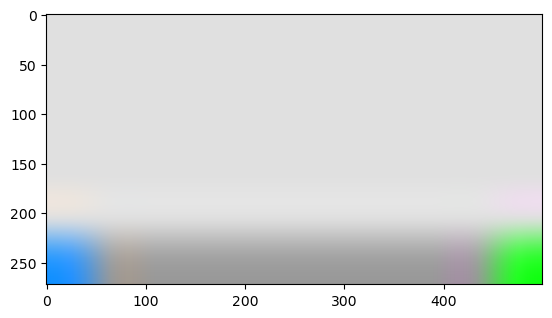

In [12]:
import matplotlib.pyplot as plt

train = True
test_freq = 50
num_episodes = 10000
num_avg = 10

env.reset()
img = env.render("rgb_array")
plt.imshow(img)

In [ ]:
if train:
    stats = {"SCRN": {}, "SPG": {}, "SPG Entropy": {}}
    for i in range(num_avg):
        print(f"========== TRAINING RUN {i} OUT OF {num_avg} ===========")
        print("********** TRAINING WITH SCRN **********")
        stats_SCRN = discrete_SCRN(env, num_episodes=num_episodes, test_freq=test_freq)
        stats["SCRN"].update({i: stats_SCRN})
        print("********** TRAINING WITH SPG ********")
        stats_DPG = discrete_policy_gradient(env, num_episodes=num_episodes, test_freq=test_freq)
        stats["SPG"].update({i: stats_DPG})
        print("********** TRAINING WITH regularized SPG ********")
        stats_DPG = discrete_policy_gradient(env, entropy_bonus=True, num_episodes=num_episodes, test_freq=test_freq)
        stats["SPG Entropy"].update({i: stats_DPG})
else:
    with open("results.pkl", "rb") as f:
        average_stats = pickle.load(f)

========== TRAINING RUN 0 OUT OF 10 ===========
********** TRAINING WITH SCRN **********
1 :  1.0
2 :  4.0
3 :  1.0
4 :  1.0
5 :  1.0
6 :  3.0
7 :  9.0
8 :  2.0
9 :  1.0
10 :  1.0
11 :  1.0
12 :  4.0
13 :  1.0
14 :  3.0
15 :  4.0
16 :  5.0
17 :  24.0
18 :  4.0
19 :  29.0
20 :  2.0
21 :  6.0
22 :  1.0
23 :  11.0
24 :  5.0
25 :  3.0
26 :  17.0
27 :  2.0
28 :  3.0
29 :  40.0
30 :  8.0
31 :  3.0


C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be uint8, actual type: int32
  logger.warn(
C:\Users\Federico Betti\anaconda3\envs\RL\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


32 :  4.0
33 :  2.0
34 :  28.0
35 :  4.0
36 :  52.0
37 :  3.0
38 :  9.0
39 :  63.0
40 :  12.0
41 :  12.0
42 :  46.0
43 :  14.0
44 :  1.0
45 :  18.0
46 :  21.0
47 :  18.0
48 :  3.0
49 :  21.0
50 :  11.0
51 :  21.0
52 :  17.0
53 :  7.0
54 :  34.0
55 :  28.0
56 :  1.0
57 :  27.0
58 :  3.0
59 :  19.0
60 :  11.0
61 :  60.0
62 :  99.0
63 :  7.0
64 :  69.0
65 :  32.0
66 :  30.0
67 :  26.0
68 :  12.0
69 :  3.0
70 :  21.0
71 :  12.0
72 :  6.0
73 :  20.0
74 :  30.0
75 :  63.0
76 :  12.0
77 :  96.0
78 :  21.0
79 :  32.0
80 :  60.0
81 :  25.0
82 :  29.0
83 :  35.0
84 :  21.0
85 :  20.0
86 :  3.0
87 :  30.0
88 :  9.0
89 :  57.0
90 :  39.0
91 :  40.0
92 :  26.0
93 :  31.0
94 :  80.0
95 :  38.0
96 :  32.0
97 :  15.0
98 :  23.0
99 :  68.0
100 :  15.0
101 :  73.0
102 :  78.0
103 :  36.0
104 :  52.0
105 :  34.0
106 :  21.0
107 :  6.0
108 :  69.0
109 :  93.0
110 :  65.0
111 :  100.0
112 :  15.0
113 :  91.0
114 :  52.0
115 :  66.0
116 :  100.0
117 :  20.0
118 :  55.0
119 :  1.0
120 :  81.0
121 :  17.0
122

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
301 :  18.0
==== Goal reached in 20 steps ====
302 :  20.0
==== Goal reached in 18 steps ====
303 :  18.0
==== Goal reached in 18 steps ====
304 :  18.0
==== Goal reached in 18 steps ====
305 :  18.0
==== Goal reached in 20 steps ====
306 :  20.0
==== Goal reached in 18 steps ====
307 :  18.0
==== Goal reached in 18 steps ====
308 :  18.0
==== Goal reached in 18 steps ====
309 :  18.0
==== Goal reached in 22 steps ====
310 :  22.0
==== 

405 :  18.0
==== Goal reached in 20 steps ====
406 :  20.0
==== Goal reached in 18 steps ====
407 :  18.0
==== Goal reached in 18 steps ====
408 :  18.0
==== Goal reached in 18 steps ====
409 :  18.0
==== Goal reached in 20 steps ====
410 :  20.0
==== Goal reached in 18 steps ====
411 :  18.0
==== Goal reached in 20 steps ====
412 :  20.0
==== Goal reached in 18 steps ====
413 :  18.0
==== Goal reached in 18 steps ====
414 :  18.0
==== Goal reached in 18 steps ====
415 :  18.0
==== Goal reached in 18 steps ====
416 :  18.0
==== Goal reached in 18 steps ====
417 :  18.0
==== Goal reached in 18 steps ====
418 :  18.0
==== Goal reached in 18 steps ====
419 :  18.0
==== Goal reached in 18 steps ====
420 :  18.0
==== Goal reached in 18 steps ====
421 :  18.0
==== Goal reached in 20 steps ====
422 :  20.0
==== Goal reached in 18 steps ====
423 :  18.0
==== Goal reached in 20 steps ====
424 :  20.0
==== Goal reached in 18 steps ====
425 :  18.0
==== Goal reached in 18 steps ====
426 :  18.0
=

==== Goal reached in 18 steps ====
521 :  18.0
==== Goal reached in 18 steps ====
522 :  18.0
==== Goal reached in 20 steps ====
523 :  20.0
==== Goal reached in 22 steps ====
524 :  22.0
==== Goal reached in 20 steps ====
525 :  20.0
==== Goal reached in 18 steps ====
526 :  18.0
==== Goal reached in 20 steps ====
527 :  20.0
==== Goal reached in 18 steps ====
528 :  18.0
==== Goal reached in 22 steps ====
529 :  22.0
==== Goal reached in 18 steps ====
530 :  18.0
==== Goal reached in 18 steps ====
531 :  18.0
==== Goal reached in 20 steps ====
532 :  20.0
==== Goal reached in 18 steps ====
533 :  18.0
==== Goal reached in 18 steps ====
534 :  18.0
==== Goal reached in 18 steps ====
535 :  18.0
==== Goal reached in 18 steps ====
536 :  18.0
==== Goal reached in 20 steps ====
537 :  20.0
==== Goal reached in 18 steps ====
538 :  18.0
==== Goal reached in 18 steps ====
539 :  18.0
==== Goal reached in 18 steps ====
540 :  18.0
==== Goal reached in 18 steps ====
541 :  18.0
==== Goal rea

626 :  18.0
==== Goal reached in 18 steps ====
627 :  18.0
==== Goal reached in 18 steps ====
628 :  18.0
==== Goal reached in 18 steps ====
629 :  18.0
==== Goal reached in 18 steps ====
630 :  18.0
==== Goal reached in 18 steps ====
631 :  18.0
==== Goal reached in 18 steps ====
632 :  18.0
==== Goal reached in 18 steps ====
633 :  18.0
==== Goal reached in 18 steps ====
634 :  18.0
==== Goal reached in 18 steps ====
635 :  18.0
==== Goal reached in 18 steps ====
636 :  18.0
==== Goal reached in 18 steps ====
637 :  18.0
==== Goal reached in 18 steps ====
638 :  18.0
==== Goal reached in 20 steps ====
639 :  20.0
==== Goal reached in 18 steps ====
640 :  18.0
==== Goal reached in 18 steps ====
641 :  18.0
==== Goal reached in 18 steps ====
642 :  18.0
==== Goal reached in 18 steps ====
643 :  18.0
==== Goal reached in 18 steps ====
644 :  18.0
==== Goal reached in 18 steps ====
645 :  18.0
==== Goal reached in 18 steps ====
646 :  18.0
==== Goal reached in 18 steps ====
647 :  18.0
=

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 26 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
1051 :  18.0
==== Goal reached in 18 steps ====
1052 :  18.0
==== Goal reached in 20 steps ====
1053 :  20.0
==== Goal reached in 22 steps ====
1054 :  22.0
==== Goal reached in 18 steps ====
1055 :  18.0
==== Goal reached in 20 steps ====
1056 :  20.0
==== Goal reached in 18 steps ====
1057 :  18.0

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
1151 :  18.0
==== Goal reached in 18 steps ====
1152 :  18.0
==== Goal reached in 18 steps ====
1153 :  18.0
==== Goal reached in 18 steps ====
1154 :  18.0
==== Goal reached in 18 steps ====
1155 :  18.0
==== Goal reached in 18 steps ====
1156 :  18.0
1157 :  4.0
==== Goal reached in 18 steps ====
1158 :  18.0
==== Goal reached in 18 steps ====
1159 :  18.0
==== Goal reached in 18 steps ====
1160 :  18.0
==== Goal reached in 18 steps ====
1161 :  18.0
==== Goal reached in 18 steps ====
1162 :  18.0
==== Goal reached in 18 steps ====
1163 :  18.0
==== Goal reached in 18 steps ====
1164 :  18.0
==== Goal reached in 18 steps ====
1165 :  18.0
==== Goal reached in 20 steps ====
1166 :  20.0
==== Goal reached in 18 steps ====
1167 :  18.0
==== Goal 

1265 :  20.0
==== Goal reached in 18 steps ====
1266 :  18.0
==== Goal reached in 18 steps ====
1267 :  18.0
==== Goal reached in 18 steps ====
1268 :  18.0
==== Goal reached in 18 steps ====
1269 :  18.0
==== Goal reached in 18 steps ====
1270 :  18.0
==== Goal reached in 18 steps ====
1271 :  18.0
==== Goal reached in 18 steps ====
1272 :  18.0
==== Goal reached in 18 steps ====
1273 :  18.0
==== Goal reached in 18 steps ====
1274 :  18.0
==== Goal reached in 18 steps ====
1275 :  18.0
==== Goal reached in 18 steps ====
1276 :  18.0
==== Goal reached in 20 steps ====
1277 :  20.0
==== Goal reached in 18 steps ====
1278 :  18.0
==== Goal reached in 18 steps ====
1279 :  18.0
==== Goal reached in 18 steps ====
1280 :  18.0
==== Goal reached in 18 steps ====
1281 :  18.0
==== Goal reached in 18 steps ====
1282 :  18.0
==== Goal reached in 18 steps ====
1283 :  18.0
==== Goal reached in 18 steps ====
1284 :  18.0
==== Goal reached in 22 steps ====
1285 :  22.0
==== Goal reached in 18 ste

1376 :  18.0
==== Goal reached in 20 steps ====
1377 :  20.0
==== Goal reached in 18 steps ====
1378 :  18.0
==== Goal reached in 18 steps ====
1379 :  18.0
==== Goal reached in 20 steps ====
1380 :  20.0
==== Goal reached in 18 steps ====
1381 :  18.0
==== Goal reached in 18 steps ====
1382 :  18.0
==== Goal reached in 18 steps ====
1383 :  18.0
==== Goal reached in 18 steps ====
1384 :  18.0
==== Goal reached in 18 steps ====
1385 :  18.0
==== Goal reached in 18 steps ====
1386 :  18.0
==== Goal reached in 18 steps ====
1387 :  18.0
==== Goal reached in 18 steps ====
1388 :  18.0
==== Goal reached in 18 steps ====
1389 :  18.0
==== Goal reached in 18 steps ====
1390 :  18.0
==== Goal reached in 18 steps ====
1391 :  18.0
==== Goal reached in 18 steps ====
1392 :  18.0
==== Goal reached in 18 steps ====
1393 :  18.0
==== Goal reached in 18 steps ====
1394 :  18.0
==== Goal reached in 18 steps ====
1395 :  18.0
==== Goal reached in 22 steps ====
1396 :  22.0
==== Goal reached in 18 ste

1495 :  26.0
==== Goal reached in 18 steps ====
1496 :  18.0
==== Goal reached in 18 steps ====
1497 :  18.0
==== Goal reached in 18 steps ====
1498 :  18.0
==== Goal reached in 18 steps ====
1499 :  18.0
==== Goal reached in 18 steps ====
1500 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
1701 :  18.0
==== Goal reached in 18 steps ====
1702 :  18.0
==== Goal reached in 18 steps ====
1703 :  18.0
==== Goal reached in 18 steps ====
1704 :  18.0
==== Goal reached in 18 steps ====
1705 :  18.0
==== Goal reached in 18 steps ====
1706 :  18.0
==== Goal reached in 20 steps ====
1707 :  20.0
==== Goal reached in 18 steps ====
1708 :  18.0
==== Goal reached in 20 steps ====
1709 :  20.0
==== Goa

1803 :  18.0
==== Goal reached in 18 steps ====
1804 :  18.0
==== Goal reached in 18 steps ====
1805 :  18.0
==== Goal reached in 18 steps ====
1806 :  18.0
==== Goal reached in 18 steps ====
1807 :  18.0
==== Goal reached in 20 steps ====
1808 :  20.0
==== Goal reached in 18 steps ====
1809 :  18.0
==== Goal reached in 18 steps ====
1810 :  18.0
==== Goal reached in 18 steps ====
1811 :  18.0
==== Goal reached in 18 steps ====
1812 :  18.0
==== Goal reached in 18 steps ====
1813 :  18.0
==== Goal reached in 18 steps ====
1814 :  18.0
==== Goal reached in 18 steps ====
1815 :  18.0
==== Goal reached in 18 steps ====
1816 :  18.0
==== Goal reached in 18 steps ====
1817 :  18.0
==== Goal reached in 18 steps ====
1818 :  18.0
==== Goal reached in 18 steps ====
1819 :  18.0
==== Goal reached in 18 steps ====
1820 :  18.0
==== Goal reached in 18 steps ====
1821 :  18.0
==== Goal reached in 20 steps ====
1822 :  20.0
==== Goal reached in 18 steps ====
1823 :  18.0
==== Goal reached in 18 ste

1913 :  18.0
==== Goal reached in 18 steps ====
1914 :  18.0
==== Goal reached in 18 steps ====
1915 :  18.0
==== Goal reached in 20 steps ====
1916 :  20.0
==== Goal reached in 18 steps ====
1917 :  18.0
==== Goal reached in 18 steps ====
1918 :  18.0
==== Goal reached in 18 steps ====
1919 :  18.0
==== Goal reached in 20 steps ====
1920 :  20.0
==== Goal reached in 18 steps ====
1921 :  18.0
==== Goal reached in 18 steps ====
1922 :  18.0
==== Goal reached in 18 steps ====
1923 :  18.0
==== Goal reached in 18 steps ====
1924 :  18.0
==== Goal reached in 18 steps ====
1925 :  18.0
==== Goal reached in 18 steps ====
1926 :  18.0
==== Goal reached in 18 steps ====
1927 :  18.0
==== Goal reached in 18 steps ====
1928 :  18.0
==== Goal reached in 18 steps ====
1929 :  18.0
==== Goal reached in 18 steps ====
1930 :  18.0
==== Goal reached in 18 steps ====
1931 :  18.0
==== Goal reached in 18 steps ====
1932 :  18.0
==== Goal reached in 18 steps ====
1933 :  18.0
==== Goal reached in 18 ste

2023 :  18.0
==== Goal reached in 18 steps ====
2024 :  18.0
==== Goal reached in 18 steps ====
2025 :  18.0
==== Goal reached in 20 steps ====
2026 :  20.0
==== Goal reached in 18 steps ====
2027 :  18.0
==== Goal reached in 18 steps ====
2028 :  18.0
==== Goal reached in 18 steps ====
2029 :  18.0
==== Goal reached in 18 steps ====
2030 :  18.0
2031 :  5.0
==== Goal reached in 18 steps ====
2032 :  18.0
==== Goal reached in 18 steps ====
2033 :  18.0
==== Goal reached in 18 steps ====
2034 :  18.0
==== Goal reached in 18 steps ====
2035 :  18.0
==== Goal reached in 18 steps ====
2036 :  18.0
==== Goal reached in 18 steps ====
2037 :  18.0
==== Goal reached in 18 steps ====
2038 :  18.0
==== Goal reached in 18 steps ====
2039 :  18.0
==== Goal reached in 18 steps ====
2040 :  18.0
==== Goal reached in 18 steps ====
2041 :  18.0
==== Goal reached in 18 steps ====
2042 :  18.0
==== Goal reached in 22 steps ====
2043 :  22.0
==== Goal reached in 18 steps ====
2044 :  18.0
==== Goal reach

==== Goal reached in 18 steps ====
2142 :  18.0
==== Goal reached in 18 steps ====
2143 :  18.0
==== Goal reached in 20 steps ====
2144 :  20.0
==== Goal reached in 18 steps ====
2145 :  18.0
==== Goal reached in 18 steps ====
2146 :  18.0
==== Goal reached in 18 steps ====
2147 :  18.0
==== Goal reached in 18 steps ====
2148 :  18.0
==== Goal reached in 18 steps ====
2149 :  18.0
==== Goal reached in 18 steps ====
2150 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goa

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
2351 :  18.0
==== Goal reached in 18 steps ====
2352 :  18.0
==== Goal reached in 18 steps ====
2353 :  18.0
==== Goal reached in 18 steps ====
2354 :  18.0
==== Goal reached in 18 steps ====
2355 :  18.0
==== Goal reached in 18 s

2453 :  18.0
==== Goal reached in 20 steps ====
2454 :  20.0
==== Goal reached in 20 steps ====
2455 :  20.0
==== Goal reached in 18 steps ====
2456 :  18.0
==== Goal reached in 18 steps ====
2457 :  18.0
==== Goal reached in 18 steps ====
2458 :  18.0
==== Goal reached in 18 steps ====
2459 :  18.0
==== Goal reached in 18 steps ====
2460 :  18.0
==== Goal reached in 18 steps ====
2461 :  18.0
==== Goal reached in 18 steps ====
2462 :  18.0
==== Goal reached in 18 steps ====
2463 :  18.0
==== Goal reached in 18 steps ====
2464 :  18.0
==== Goal reached in 18 steps ====
2465 :  18.0
==== Goal reached in 18 steps ====
2466 :  18.0
==== Goal reached in 18 steps ====
2467 :  18.0
==== Goal reached in 18 steps ====
2468 :  18.0
==== Goal reached in 18 steps ====
2469 :  18.0
==== Goal reached in 18 steps ====
2470 :  18.0
==== Goal reached in 18 steps ====
2471 :  18.0
==== Goal reached in 18 steps ====
2472 :  18.0
==== Goal reached in 18 steps ====
2473 :  18.0
==== Goal reached in 18 ste

2554 :  18.0
==== Goal reached in 18 steps ====
2555 :  18.0
==== Goal reached in 18 steps ====
2556 :  18.0
==== Goal reached in 18 steps ====
2557 :  18.0
==== Goal reached in 18 steps ====
2558 :  18.0
==== Goal reached in 18 steps ====
2559 :  18.0
==== Goal reached in 18 steps ====
2560 :  18.0
==== Goal reached in 18 steps ====
2561 :  18.0
==== Goal reached in 18 steps ====
2562 :  18.0
==== Goal reached in 20 steps ====
2563 :  20.0
==== Goal reached in 20 steps ====
2564 :  20.0
==== Goal reached in 18 steps ====
2565 :  18.0
==== Goal reached in 18 steps ====
2566 :  18.0
==== Goal reached in 18 steps ====
2567 :  18.0
==== Goal reached in 18 steps ====
2568 :  18.0
==== Goal reached in 18 steps ====
2569 :  18.0
==== Goal reached in 18 steps ====
2570 :  18.0
==== Goal reached in 18 steps ====
2571 :  18.0
==== Goal reached in 18 steps ====
2572 :  18.0
==== Goal reached in 18 steps ====
2573 :  18.0
==== Goal reached in 18 steps ====
2574 :  18.0
==== Goal reached in 24 ste

2662 :  18.0
==== Goal reached in 18 steps ====
2663 :  18.0
==== Goal reached in 18 steps ====
2664 :  18.0
==== Goal reached in 18 steps ====
2665 :  18.0
==== Goal reached in 20 steps ====
2666 :  20.0
==== Goal reached in 18 steps ====
2667 :  18.0
==== Goal reached in 18 steps ====
2668 :  18.0
==== Goal reached in 20 steps ====
2669 :  20.0
==== Goal reached in 18 steps ====
2670 :  18.0
==== Goal reached in 18 steps ====
2671 :  18.0
==== Goal reached in 18 steps ====
2672 :  18.0
==== Goal reached in 18 steps ====
2673 :  18.0
==== Goal reached in 18 steps ====
2674 :  18.0
==== Goal reached in 18 steps ====
2675 :  18.0
==== Goal reached in 20 steps ====
2676 :  20.0
==== Goal reached in 18 steps ====
2677 :  18.0
==== Goal reached in 20 steps ====
2678 :  20.0
==== Goal reached in 18 steps ====
2679 :  18.0
==== Goal reached in 18 steps ====
2680 :  18.0
==== Goal reached in 18 steps ====
2681 :  18.0
==== Goal reached in 18 steps ====
2682 :  18.0
==== Goal reached in 18 ste

2779 :  18.0
==== Goal reached in 18 steps ====
2780 :  18.0
==== Goal reached in 18 steps ====
2781 :  18.0
==== Goal reached in 18 steps ====
2782 :  18.0
==== Goal reached in 22 steps ====
2783 :  22.0
==== Goal reached in 18 steps ====
2784 :  18.0
==== Goal reached in 18 steps ====
2785 :  18.0
==== Goal reached in 18 steps ====
2786 :  18.0
==== Goal reached in 18 steps ====
2787 :  18.0
==== Goal reached in 18 steps ====
2788 :  18.0
==== Goal reached in 18 steps ====
2789 :  18.0
==== Goal reached in 18 steps ====
2790 :  18.0
==== Goal reached in 18 steps ====
2791 :  18.0
==== Goal reached in 18 steps ====
2792 :  18.0
==== Goal reached in 20 steps ====
2793 :  20.0
==== Goal reached in 18 steps ====
2794 :  18.0
==== Goal reached in 18 steps ====
2795 :  18.0
==== Goal reached in 20 steps ====
2796 :  20.0
==== Goal reached in 18 steps ====
2797 :  18.0
==== Goal reached in 18 steps ====
2798 :  18.0
==== Goal reached in 22 steps ====
2799 :  22.0
==== Goal reached in 18 ste

2892 :  18.0
==== Goal reached in 18 steps ====
2893 :  18.0
==== Goal reached in 18 steps ====
2894 :  18.0
==== Goal reached in 18 steps ====
2895 :  18.0
==== Goal reached in 18 steps ====
2896 :  18.0
==== Goal reached in 18 steps ====
2897 :  18.0
==== Goal reached in 18 steps ====
2898 :  18.0
==== Goal reached in 18 steps ====
2899 :  18.0
==== Goal reached in 20 steps ====
2900 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goa

2990 :  18.0
==== Goal reached in 18 steps ====
2991 :  18.0
==== Goal reached in 18 steps ====
2992 :  18.0
==== Goal reached in 20 steps ====
2993 :  20.0
==== Goal reached in 18 steps ====
2994 :  18.0
==== Goal reached in 18 steps ====
2995 :  18.0
==== Goal reached in 20 steps ====
2996 :  20.0
==== Goal reached in 18 steps ====
2997 :  18.0
==== Goal reached in 18 steps ====
2998 :  18.0
==== Goal reached in 20 steps ====
2999 :  20.0
==== Goal reached in 20 steps ====
3000 :  20.0
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached

3089 :  18.0
==== Goal reached in 18 steps ====
3090 :  18.0
==== Goal reached in 18 steps ====
3091 :  18.0
==== Goal reached in 18 steps ====
3092 :  18.0
==== Goal reached in 18 steps ====
3093 :  18.0
==== Goal reached in 18 steps ====
3094 :  18.0
==== Goal reached in 18 steps ====
3095 :  18.0
==== Goal reached in 18 steps ====
3096 :  18.0
==== Goal reached in 18 steps ====
3097 :  18.0
==== Goal reached in 18 steps ====
3098 :  18.0
==== Goal reached in 18 steps ====
3099 :  18.0
==== Goal reached in 18 steps ====
3100 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
====

3192 :  18.0
==== Goal reached in 18 steps ====
3193 :  18.0
==== Goal reached in 18 steps ====
3194 :  18.0
==== Goal reached in 18 steps ====
3195 :  18.0
==== Goal reached in 18 steps ====
3196 :  18.0
==== Goal reached in 18 steps ====
3197 :  18.0
==== Goal reached in 18 steps ====
3198 :  18.0
==== Goal reached in 18 steps ====
3199 :  18.0
==== Goal reached in 18 steps ====
3200 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goa

3298 :  18.0
==== Goal reached in 18 steps ====
3299 :  18.0
==== Goal reached in 18 steps ====
3300 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reache

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
3501 :  18.0
==== Goal reached in 18 steps ====
3502 :  18.0
==== Goal reached in 18 steps ====
3503 :  18.0
==== Goal reached in 18 steps ====
3504 :  18.0
===

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
3601 :  18.0
==== Goal reached in 18 steps ====
3602 :  18.0
==== Goal reached in 18 steps ====
3603 :  18.0
==== Goal reached in 18 steps ====
3604 :  18.0
==== Goal reached in 18 steps ====
3605 :  18.0
==== Goal reached in 18 steps ====
3606 :  18.0
==== Goal reached in 18 steps ====
3607 :  18.0
==== Goal reached in 18 steps ====
3608 :  18.0
==== Goal reached in 18 steps ====
3609 :  18.0
==== Goal reached in 18 steps ====
3610 :  18.0
==== Goal reached in 18 steps ====
3611 :  18.0
==== Goal reached in 20 steps ====
3612 :  20.0
====

3708 :  18.0
==== Goal reached in 18 steps ====
3709 :  18.0
==== Goal reached in 18 steps ====
3710 :  18.0
==== Goal reached in 18 steps ====
3711 :  18.0
==== Goal reached in 18 steps ====
3712 :  18.0
==== Goal reached in 18 steps ====
3713 :  18.0
==== Goal reached in 18 steps ====
3714 :  18.0
==== Goal reached in 18 steps ====
3715 :  18.0
==== Goal reached in 18 steps ====
3716 :  18.0
==== Goal reached in 18 steps ====
3717 :  18.0
==== Goal reached in 18 steps ====
3718 :  18.0
==== Goal reached in 18 steps ====
3719 :  18.0
==== Goal reached in 18 steps ====
3720 :  18.0
==== Goal reached in 18 steps ====
3721 :  18.0
==== Goal reached in 18 steps ====
3722 :  18.0
==== Goal reached in 18 steps ====
3723 :  18.0
==== Goal reached in 18 steps ====
3724 :  18.0
==== Goal reached in 18 steps ====
3725 :  18.0
==== Goal reached in 18 steps ====
3726 :  18.0
==== Goal reached in 18 steps ====
3727 :  18.0
==== Goal reached in 18 steps ====
3728 :  18.0
==== Goal reached in 18 ste

3825 :  18.0
==== Goal reached in 18 steps ====
3826 :  18.0
==== Goal reached in 18 steps ====
3827 :  18.0
==== Goal reached in 18 steps ====
3828 :  18.0
==== Goal reached in 18 steps ====
3829 :  18.0
==== Goal reached in 18 steps ====
3830 :  18.0
==== Goal reached in 18 steps ====
3831 :  18.0
==== Goal reached in 18 steps ====
3832 :  18.0
==== Goal reached in 18 steps ====
3833 :  18.0
==== Goal reached in 18 steps ====
3834 :  18.0
==== Goal reached in 18 steps ====
3835 :  18.0
==== Goal reached in 18 steps ====
3836 :  18.0
==== Goal reached in 18 steps ====
3837 :  18.0
==== Goal reached in 18 steps ====
3838 :  18.0
==== Goal reached in 18 steps ====
3839 :  18.0
==== Goal reached in 18 steps ====
3840 :  18.0
==== Goal reached in 18 steps ====
3841 :  18.0
==== Goal reached in 18 steps ====
3842 :  18.0
==== Goal reached in 18 steps ====
3843 :  18.0
==== Goal reached in 18 steps ====
3844 :  18.0
==== Goal reached in 18 steps ====
3845 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
3945 :  18.0
==== Goal reached in 18 steps ====
3946 :  18.0
==== Goal reached in 20 steps ====
3947 :  20.0
==== Goal reached in 18 steps ====
3948 :  18.0
==== Goal reached in 18 steps ====
3949 :  18.0
==== Goal reached in 18 steps ====
3950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
4451 :  18.0
==== Goal reached in 18 steps ====
4452 : 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
4551 :  18.0
==== Goal reached in 18 steps ====
4552 :  18.0
==== Goal reached in 18 steps ====
4553 :  18.0
==== Goal reached in 18 steps ====
4554 :  18.0
==== Goal reached in 18 steps ====
4555 :  18.0
==== Goal reached in 18 steps ====
4556 :  18.0
==== Goal reached in 18 steps ====
4557 :  18.0
==== Goal reached in 18 steps ====
4558 :  18.0
==== Goal reached in 18 steps ====
4559 :  18.0
==== Goal reached in 18 steps ====
4560 :  18.0
==== Goal reached in 18 steps ====
4561 :  18.0
==== Goal reached

4657 :  18.0
==== Goal reached in 18 steps ====
4658 :  18.0
==== Goal reached in 20 steps ====
4659 :  20.0
==== Goal reached in 18 steps ====
4660 :  18.0
==== Goal reached in 18 steps ====
4661 :  18.0
==== Goal reached in 18 steps ====
4662 :  18.0
==== Goal reached in 18 steps ====
4663 :  18.0
==== Goal reached in 18 steps ====
4664 :  18.0
==== Goal reached in 18 steps ====
4665 :  18.0
==== Goal reached in 18 steps ====
4666 :  18.0
==== Goal reached in 18 steps ====
4667 :  18.0
==== Goal reached in 18 steps ====
4668 :  18.0
==== Goal reached in 18 steps ====
4669 :  18.0
==== Goal reached in 18 steps ====
4670 :  18.0
==== Goal reached in 18 steps ====
4671 :  18.0
==== Goal reached in 18 steps ====
4672 :  18.0
==== Goal reached in 18 steps ====
4673 :  18.0
==== Goal reached in 18 steps ====
4674 :  18.0
==== Goal reached in 18 steps ====
4675 :  18.0
==== Goal reached in 20 steps ====
4676 :  20.0
==== Goal reached in 18 steps ====
4677 :  18.0
==== Goal reached in 20 ste

==== Goal reached in 18 steps ====
4774 :  18.0
==== Goal reached in 18 steps ====
4775 :  18.0
==== Goal reached in 18 steps ====
4776 :  18.0
==== Goal reached in 18 steps ====
4777 :  18.0
==== Goal reached in 20 steps ====
4778 :  20.0
==== Goal reached in 18 steps ====
4779 :  18.0
==== Goal reached in 18 steps ====
4780 :  18.0
==== Goal reached in 18 steps ====
4781 :  18.0
==== Goal reached in 18 steps ====
4782 :  18.0
==== Goal reached in 18 steps ====
4783 :  18.0
==== Goal reached in 18 steps ====
4784 :  18.0
==== Goal reached in 18 steps ====
4785 :  18.0
==== Goal reached in 18 steps ====
4786 :  18.0
==== Goal reached in 18 steps ====
4787 :  18.0
==== Goal reached in 18 steps ====
4788 :  18.0
==== Goal reached in 18 steps ====
4789 :  18.0
==== Goal reached in 18 steps ====
4790 :  18.0
==== Goal reached in 18 steps ====
4791 :  18.0
==== Goal reached in 18 steps ====
4792 :  18.0
==== Goal reached in 18 steps ====
4793 :  18.0
==== Goal reached in 18 steps ====
4794 

==== Goal reached in 20 steps ====
4895 :  20.0
==== Goal reached in 18 steps ====
4896 :  18.0
==== Goal reached in 18 steps ====
4897 :  18.0
==== Goal reached in 18 steps ====
4898 :  18.0
==== Goal reached in 18 steps ====
4899 :  18.0
==== Goal reached in 18 steps ====
4900 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5101 :  18.0
==== Goal reached in 18 steps ====
5102 : 

==== Goal reached in 18 steps ====
5203 :  18.0
==== Goal reached in 18 steps ====
5204 :  18.0
==== Goal reached in 18 steps ====
5205 :  18.0
==== Goal reached in 18 steps ====
5206 :  18.0
==== Goal reached in 18 steps ====
5207 :  18.0
==== Goal reached in 18 steps ====
5208 :  18.0
==== Goal reached in 18 steps ====
5209 :  18.0
==== Goal reached in 18 steps ====
5210 :  18.0
==== Goal reached in 18 steps ====
5211 :  18.0
==== Goal reached in 18 steps ====
5212 :  18.0
==== Goal reached in 18 steps ====
5213 :  18.0
==== Goal reached in 18 steps ====
5214 :  18.0
==== Goal reached in 18 steps ====
5215 :  18.0
==== Goal reached in 18 steps ====
5216 :  18.0
==== Goal reached in 18 steps ====
5217 :  18.0
==== Goal reached in 20 steps ====
5218 :  20.0
==== Goal reached in 18 steps ====
5219 :  18.0
==== Goal reached in 18 steps ====
5220 :  18.0
==== Goal reached in 18 steps ====
5221 :  18.0
==== Goal reached in 18 steps ====
5222 :  18.0
==== Goal reached in 18 steps ====
5223 

==== Goal reached in 18 steps ====
5309 :  18.0
==== Goal reached in 18 steps ====
5310 :  18.0
==== Goal reached in 18 steps ====
5311 :  18.0
==== Goal reached in 18 steps ====
5312 :  18.0
==== Goal reached in 18 steps ====
5313 :  18.0
==== Goal reached in 18 steps ====
5314 :  18.0
==== Goal reached in 18 steps ====
5315 :  18.0
==== Goal reached in 18 steps ====
5316 :  18.0
==== Goal reached in 18 steps ====
5317 :  18.0
==== Goal reached in 18 steps ====
5318 :  18.0
==== Goal reached in 18 steps ====
5319 :  18.0
==== Goal reached in 18 steps ====
5320 :  18.0
==== Goal reached in 18 steps ====
5321 :  18.0
==== Goal reached in 18 steps ====
5322 :  18.0
==== Goal reached in 18 steps ====
5323 :  18.0
==== Goal reached in 18 steps ====
5324 :  18.0
==== Goal reached in 18 steps ====
5325 :  18.0
==== Goal reached in 18 steps ====
5326 :  18.0
==== Goal reached in 18 steps ====
5327 :  18.0
==== Goal reached in 18 steps ====
5328 :  18.0
==== Goal reached in 18 steps ====
5329 

5423 :  18.0
==== Goal reached in 18 steps ====
5424 :  18.0
==== Goal reached in 18 steps ====
5425 :  18.0
==== Goal reached in 18 steps ====
5426 :  18.0
==== Goal reached in 18 steps ====
5427 :  18.0
==== Goal reached in 18 steps ====
5428 :  18.0
==== Goal reached in 18 steps ====
5429 :  18.0
==== Goal reached in 18 steps ====
5430 :  18.0
==== Goal reached in 18 steps ====
5431 :  18.0
==== Goal reached in 18 steps ====
5432 :  18.0
==== Goal reached in 18 steps ====
5433 :  18.0
==== Goal reached in 18 steps ====
5434 :  18.0
==== Goal reached in 18 steps ====
5435 :  18.0
==== Goal reached in 20 steps ====
5436 :  20.0
==== Goal reached in 18 steps ====
5437 :  18.0
==== Goal reached in 18 steps ====
5438 :  18.0
==== Goal reached in 18 steps ====
5439 :  18.0
==== Goal reached in 20 steps ====
5440 :  20.0
==== Goal reached in 18 steps ====
5441 :  18.0
==== Goal reached in 18 steps ====
5442 :  18.0
==== Goal reached in 18 steps ====
5443 :  18.0
==== Goal reached in 18 ste

5538 :  18.0
==== Goal reached in 18 steps ====
5539 :  18.0
==== Goal reached in 18 steps ====
5540 :  18.0
==== Goal reached in 18 steps ====
5541 :  18.0
==== Goal reached in 18 steps ====
5542 :  18.0
==== Goal reached in 18 steps ====
5543 :  18.0
==== Goal reached in 18 steps ====
5544 :  18.0
==== Goal reached in 18 steps ====
5545 :  18.0
==== Goal reached in 18 steps ====
5546 :  18.0
==== Goal reached in 18 steps ====
5547 :  18.0
==== Goal reached in 18 steps ====
5548 :  18.0
==== Goal reached in 18 steps ====
5549 :  18.0
==== Goal reached in 18 steps ====
5550 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 st

==== Goal reached in 18 steps ====
5643 :  18.0
==== Goal reached in 18 steps ====
5644 :  18.0
==== Goal reached in 18 steps ====
5645 :  18.0
==== Goal reached in 18 steps ====
5646 :  18.0
==== Goal reached in 18 steps ====
5647 :  18.0
==== Goal reached in 18 steps ====
5648 :  18.0
==== Goal reached in 18 steps ====
5649 :  18.0
==== Goal reached in 18 steps ====
5650 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5851 :  18.0
==== Goal reached in 18 steps ====
5852 :  18.0
==== Goal reached in 18 steps ====
5853 :  18.0
==== Goal reached in 18 steps ====
5854 :  18.0
==== Goal reached in 18 steps ====
5855 :  18.0
==== Goal reached in 18 steps ====
5856 :  18.0
==== Goal reached in 18 steps ====
5857 :  18.0
==== Goal reached in 18 steps ====
5858 :  18.0
==== Goal reached in 20 steps ====
5859 :  20.0
==== Goal reached in 18 steps ====
5860 :  18.0
==== Goal reached in 18 steps ====
5861 :  18.0
==== Goal reached in 18 steps ====
5862 :  18.0
==== Goal reached in 18 steps ====
5863 :  18.0
==== Goal reached in 18 steps ====
5864 :  18.0
==== Goal reached in 18 steps ====
5865 :  18.0
==== Goal reached in 18 steps ====
5866 :  18.0
==== Goal reached in 18 steps ====
5867 :  18.0
==== Goal reached in 18 steps ====
5868 :  1

==== Goal reached in 18 steps ====
5958 :  18.0
==== Goal reached in 18 steps ====
5959 :  18.0
==== Goal reached in 18 steps ====
5960 :  18.0
==== Goal reached in 18 steps ====
5961 :  18.0
==== Goal reached in 18 steps ====
5962 :  18.0
==== Goal reached in 18 steps ====
5963 :  18.0
==== Goal reached in 18 steps ====
5964 :  18.0
==== Goal reached in 18 steps ====
5965 :  18.0
==== Goal reached in 18 steps ====
5966 :  18.0
==== Goal reached in 18 steps ====
5967 :  18.0
==== Goal reached in 18 steps ====
5968 :  18.0
==== Goal reached in 18 steps ====
5969 :  18.0
==== Goal reached in 18 steps ====
5970 :  18.0
==== Goal reached in 18 steps ====
5971 :  18.0
==== Goal reached in 18 steps ====
5972 :  18.0
==== Goal reached in 18 steps ====
5973 :  18.0
==== Goal reached in 18 steps ====
5974 :  18.0
==== Goal reached in 18 steps ====
5975 :  18.0
==== Goal reached in 18 steps ====
5976 :  18.0
==== Goal reached in 18 steps ====
5977 :  18.0
==== Goal reached in 18 steps ====
5978 

6066 :  18.0
==== Goal reached in 18 steps ====
6067 :  18.0
==== Goal reached in 20 steps ====
6068 :  20.0
==== Goal reached in 18 steps ====
6069 :  18.0
==== Goal reached in 18 steps ====
6070 :  18.0
==== Goal reached in 18 steps ====
6071 :  18.0
==== Goal reached in 18 steps ====
6072 :  18.0
==== Goal reached in 18 steps ====
6073 :  18.0
==== Goal reached in 18 steps ====
6074 :  18.0
==== Goal reached in 20 steps ====
6075 :  20.0
==== Goal reached in 18 steps ====
6076 :  18.0
==== Goal reached in 18 steps ====
6077 :  18.0
==== Goal reached in 18 steps ====
6078 :  18.0
==== Goal reached in 18 steps ====
6079 :  18.0
==== Goal reached in 18 steps ====
6080 :  18.0
==== Goal reached in 18 steps ====
6081 :  18.0
==== Goal reached in 18 steps ====
6082 :  18.0
==== Goal reached in 18 steps ====
6083 :  18.0
==== Goal reached in 18 steps ====
6084 :  18.0
==== Goal reached in 18 steps ====
6085 :  18.0
==== Goal reached in 18 steps ====
6086 :  18.0
==== Goal reached in 18 ste

6169 :  18.0
==== Goal reached in 18 steps ====
6170 :  18.0
==== Goal reached in 18 steps ====
6171 :  18.0
==== Goal reached in 18 steps ====
6172 :  18.0
==== Goal reached in 18 steps ====
6173 :  18.0
==== Goal reached in 18 steps ====
6174 :  18.0
==== Goal reached in 18 steps ====
6175 :  18.0
==== Goal reached in 18 steps ====
6176 :  18.0
==== Goal reached in 18 steps ====
6177 :  18.0
==== Goal reached in 20 steps ====
6178 :  20.0
==== Goal reached in 20 steps ====
6179 :  20.0
==== Goal reached in 18 steps ====
6180 :  18.0
==== Goal reached in 18 steps ====
6181 :  18.0
==== Goal reached in 18 steps ====
6182 :  18.0
==== Goal reached in 18 steps ====
6183 :  18.0
==== Goal reached in 18 steps ====
6184 :  18.0
==== Goal reached in 18 steps ====
6185 :  18.0
==== Goal reached in 18 steps ====
6186 :  18.0
==== Goal reached in 18 steps ====
6187 :  18.0
==== Goal reached in 18 steps ====
6188 :  18.0
==== Goal reached in 18 steps ====
6189 :  18.0
==== Goal reached in 18 ste

6287 :  18.0
==== Goal reached in 18 steps ====
6288 :  18.0
==== Goal reached in 18 steps ====
6289 :  18.0
==== Goal reached in 18 steps ====
6290 :  18.0
==== Goal reached in 18 steps ====
6291 :  18.0
==== Goal reached in 18 steps ====
6292 :  18.0
==== Goal reached in 18 steps ====
6293 :  18.0
==== Goal reached in 18 steps ====
6294 :  18.0
==== Goal reached in 18 steps ====
6295 :  18.0
==== Goal reached in 18 steps ====
6296 :  18.0
==== Goal reached in 18 steps ====
6297 :  18.0
==== Goal reached in 18 steps ====
6298 :  18.0
==== Goal reached in 18 steps ====
6299 :  18.0
==== Goal reached in 18 steps ====
6300 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal rea

==== Goal reached in 18 steps ====
6386 :  18.0
==== Goal reached in 18 steps ====
6387 :  18.0
==== Goal reached in 18 steps ====
6388 :  18.0
==== Goal reached in 20 steps ====
6389 :  20.0
==== Goal reached in 18 steps ====
6390 :  18.0
==== Goal reached in 18 steps ====
6391 :  18.0
==== Goal reached in 18 steps ====
6392 :  18.0
==== Goal reached in 20 steps ====
6393 :  20.0
==== Goal reached in 18 steps ====
6394 :  18.0
==== Goal reached in 18 steps ====
6395 :  18.0
==== Goal reached in 20 steps ====
6396 :  20.0
==== Goal reached in 18 steps ====
6397 :  18.0
==== Goal reached in 18 steps ====
6398 :  18.0
==== Goal reached in 18 steps ====
6399 :  18.0
==== Goal reached in 18 steps ====
6400 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


6492 :  18.0
==== Goal reached in 18 steps ====
6493 :  18.0
==== Goal reached in 18 steps ====
6494 :  18.0
==== Goal reached in 18 steps ====
6495 :  18.0
==== Goal reached in 18 steps ====
6496 :  18.0
==== Goal reached in 20 steps ====
6497 :  20.0
==== Goal reached in 18 steps ====
6498 :  18.0
==== Goal reached in 18 steps ====
6499 :  18.0
==== Goal reached in 18 steps ====
6500 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goa

==== Goal reached in 18 steps ====
6600 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Go

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
6801 :  18.0
==== Goal reached in 18 steps ====
6802 :  18.0
==== Goal reached in 18 steps ====
6803 :  18.0
==== Goal reached in 18 steps ====
6804 :  18.0
==== Goal reached in 18 steps ====
6805 :  18.0
==== Goal reached in 18 steps ====
6806 :  18.0
==== Goal reached in 18 steps ====
6807 :  18.0
==== Goal reached in 18 steps ====
6808 :  18.0
==== Goal reached in 18 steps ====
6809 :  18.0
==== Goal reached in 20 steps ====
6810 :  20.0
==== Goal reached in 18 steps ====
6811 :  18.0
==== Goal reached in 18 steps ====
6812 :  18.0
==== Goal reached in 18 steps ====
6813 :  18.0
==== Goal reached in 18 steps ====
6814 :  18.0
==== Goal reached in 22 steps ====
6815 :  22.0
==== Goal reached in 18 steps ====


6903 :  18.0
==== Goal reached in 18 steps ====
6904 :  18.0
==== Goal reached in 18 steps ====
6905 :  18.0
==== Goal reached in 18 steps ====
6906 :  18.0
==== Goal reached in 18 steps ====
6907 :  18.0
==== Goal reached in 18 steps ====
6908 :  18.0
==== Goal reached in 18 steps ====
6909 :  18.0
==== Goal reached in 18 steps ====
6910 :  18.0
==== Goal reached in 18 steps ====
6911 :  18.0
==== Goal reached in 18 steps ====
6912 :  18.0
==== Goal reached in 18 steps ====
6913 :  18.0
==== Goal reached in 18 steps ====
6914 :  18.0
==== Goal reached in 18 steps ====
6915 :  18.0
==== Goal reached in 20 steps ====
6916 :  20.0
==== Goal reached in 18 steps ====
6917 :  18.0
==== Goal reached in 18 steps ====
6918 :  18.0
==== Goal reached in 18 steps ====
6919 :  18.0
==== Goal reached in 18 steps ====
6920 :  18.0
==== Goal reached in 18 steps ====
6921 :  18.0
==== Goal reached in 18 steps ====
6922 :  18.0
==== Goal reached in 18 steps ====
6923 :  18.0
==== Goal reached in 18 ste

7012 :  18.0
==== Goal reached in 18 steps ====
7013 :  18.0
==== Goal reached in 18 steps ====
7014 :  18.0
==== Goal reached in 18 steps ====
7015 :  18.0
==== Goal reached in 18 steps ====
7016 :  18.0
==== Goal reached in 18 steps ====
7017 :  18.0
==== Goal reached in 18 steps ====
7018 :  18.0
==== Goal reached in 18 steps ====
7019 :  18.0
==== Goal reached in 18 steps ====
7020 :  18.0
==== Goal reached in 18 steps ====
7021 :  18.0
==== Goal reached in 18 steps ====
7022 :  18.0
==== Goal reached in 18 steps ====
7023 :  18.0
==== Goal reached in 18 steps ====
7024 :  18.0
==== Goal reached in 18 steps ====
7025 :  18.0
==== Goal reached in 18 steps ====
7026 :  18.0
==== Goal reached in 18 steps ====
7027 :  18.0
==== Goal reached in 18 steps ====
7028 :  18.0
==== Goal reached in 18 steps ====
7029 :  18.0
==== Goal reached in 18 steps ====
7030 :  18.0
==== Goal reached in 18 steps ====
7031 :  18.0
==== Goal reached in 18 steps ====
7032 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
7115 :  18.0
==== Goal reached in 18 steps ====
7116 :  18.0
==== Goal reached in 18 steps ====
7117 :  18.0
==== Goal reached in 18 steps ====
7118 :  18.0
==== Goal reached in 18 steps ====
7119 :  18.0
==== Goal reached in 18 steps ====
7120 :  18.0
==== Goal reached in 18 steps ====
7121 :  18.0
==== Goal reached in 18 steps ====
7122 :  18.0
==== Goal reached in 18 steps ====
7123 :  18.0
==== Goal reached in 18 steps ====
7124 :  18.0
==== Goal reached in 18 steps ====
7125 :  18.0
==== Goal reached in 18 steps ====
7126 :  18.0
==== Goal reached in 18 steps ====
7127 :  18.0
==== Goal reached in 18 steps ====
7128 :  18.0
==== Goal reached in 18 steps ====
7129 :  18.0
==== Goal reached in 18 steps ====
7130 :  18.0
==== Goal reached in 18 steps ====
7131 :  18.0
==== Goal reached in 18 steps ====
7132 :  18.0
==== Goal reached in 18 steps ====
7133 :  18.0
==== Goal reached in 18 steps ====
7134 :  18.0
==== Goal reached in 18 steps ====
7135 

==== Goal reached in 18 steps ====
7213 :  18.0
==== Goal reached in 18 steps ====
7214 :  18.0
==== Goal reached in 18 steps ====
7215 :  18.0
==== Goal reached in 18 steps ====
7216 :  18.0
==== Goal reached in 18 steps ====
7217 :  18.0
==== Goal reached in 18 steps ====
7218 :  18.0
==== Goal reached in 18 steps ====
7219 :  18.0
==== Goal reached in 18 steps ====
7220 :  18.0
==== Goal reached in 18 steps ====
7221 :  18.0
==== Goal reached in 18 steps ====
7222 :  18.0
==== Goal reached in 18 steps ====
7223 :  18.0
==== Goal reached in 18 steps ====
7224 :  18.0
==== Goal reached in 18 steps ====
7225 :  18.0
==== Goal reached in 18 steps ====
7226 :  18.0
==== Goal reached in 18 steps ====
7227 :  18.0
==== Goal reached in 18 steps ====
7228 :  18.0
==== Goal reached in 18 steps ====
7229 :  18.0
==== Goal reached in 18 steps ====
7230 :  18.0
==== Goal reached in 18 steps ====
7231 :  18.0
==== Goal reached in 18 steps ====
7232 :  18.0
==== Goal reached in 18 steps ====
7233 

7332 :  18.0
==== Goal reached in 18 steps ====
7333 :  18.0
==== Goal reached in 18 steps ====
7334 :  18.0
==== Goal reached in 18 steps ====
7335 :  18.0
==== Goal reached in 18 steps ====
7336 :  18.0
==== Goal reached in 18 steps ====
7337 :  18.0
==== Goal reached in 18 steps ====
7338 :  18.0
==== Goal reached in 18 steps ====
7339 :  18.0
==== Goal reached in 18 steps ====
7340 :  18.0
==== Goal reached in 18 steps ====
7341 :  18.0
==== Goal reached in 18 steps ====
7342 :  18.0
==== Goal reached in 18 steps ====
7343 :  18.0
==== Goal reached in 18 steps ====
7344 :  18.0
==== Goal reached in 18 steps ====
7345 :  18.0
==== Goal reached in 18 steps ====
7346 :  18.0
==== Goal reached in 18 steps ====
7347 :  18.0
==== Goal reached in 18 steps ====
7348 :  18.0
==== Goal reached in 18 steps ====
7349 :  18.0
==== Goal reached in 18 steps ====
7350 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached 

==== Goal reached in 18 steps ====
7433 :  18.0
==== Goal reached in 18 steps ====
7434 :  18.0
==== Goal reached in 18 steps ====
7435 :  18.0
==== Goal reached in 18 steps ====
7436 :  18.0
==== Goal reached in 18 steps ====
7437 :  18.0
==== Goal reached in 18 steps ====
7438 :  18.0
==== Goal reached in 18 steps ====
7439 :  18.0
==== Goal reached in 18 steps ====
7440 :  18.0
==== Goal reached in 18 steps ====
7441 :  18.0
==== Goal reached in 18 steps ====
7442 :  18.0
==== Goal reached in 18 steps ====
7443 :  18.0
==== Goal reached in 18 steps ====
7444 :  18.0
==== Goal reached in 18 steps ====
7445 :  18.0
==== Goal reached in 18 steps ====
7446 :  18.0
==== Goal reached in 18 steps ====
7447 :  18.0
==== Goal reached in 18 steps ====
7448 :  18.0
==== Goal reached in 18 steps ====
7449 :  18.0
==== Goal reached in 18 steps ====
7450 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps =

==== Goal reached in 18 steps ====
7535 :  18.0
==== Goal reached in 18 steps ====
7536 :  18.0
==== Goal reached in 18 steps ====
7537 :  18.0
==== Goal reached in 18 steps ====
7538 :  18.0
==== Goal reached in 18 steps ====
7539 :  18.0
==== Goal reached in 18 steps ====
7540 :  18.0
==== Goal reached in 18 steps ====
7541 :  18.0
==== Goal reached in 18 steps ====
7542 :  18.0
==== Goal reached in 18 steps ====
7543 :  18.0
==== Goal reached in 18 steps ====
7544 :  18.0
==== Goal reached in 18 steps ====
7545 :  18.0
==== Goal reached in 18 steps ====
7546 :  18.0
==== Goal reached in 18 steps ====
7547 :  18.0
==== Goal reached in 18 steps ====
7548 :  18.0
==== Goal reached in 18 steps ====
7549 :  18.0
==== Goal reached in 18 steps ====
7550 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 1

==== Goal reached in 18 steps ====
7635 :  18.0
==== Goal reached in 18 steps ====
7636 :  18.0
==== Goal reached in 18 steps ====
7637 :  18.0
==== Goal reached in 18 steps ====
7638 :  18.0
==== Goal reached in 18 steps ====
7639 :  18.0
==== Goal reached in 18 steps ====
7640 :  18.0
==== Goal reached in 18 steps ====
7641 :  18.0
==== Goal reached in 18 steps ====
7642 :  18.0
==== Goal reached in 18 steps ====
7643 :  18.0
==== Goal reached in 18 steps ====
7644 :  18.0
==== Goal reached in 18 steps ====
7645 :  18.0
==== Goal reached in 18 steps ====
7646 :  18.0
==== Goal reached in 18 steps ====
7647 :  18.0
==== Goal reached in 18 steps ====
7648 :  18.0
==== Goal reached in 18 steps ====
7649 :  18.0
==== Goal reached in 18 steps ====
7650 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 1

7744 :  18.0
==== Goal reached in 18 steps ====
7745 :  18.0
==== Goal reached in 18 steps ====
7746 :  18.0
==== Goal reached in 18 steps ====
7747 :  18.0
==== Goal reached in 18 steps ====
7748 :  18.0
==== Goal reached in 18 steps ====
7749 :  18.0
==== Goal reached in 18 steps ====
7750 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
7951 :  18.0
==== Goal reached in 18 steps ====
7952 :  18.0
==== Goal reached in 18 steps ====
7953 :  18.0
==== Goal reached in 18 steps ====
7954 :  18.0
==== Goal reached in 18 steps ====
7955 :  18.0
==== Goal reached in 18 steps ====
7956 :  18.0
==== Goal re

8059 :  18.0
==== Goal reached in 18 steps ====
8060 :  18.0
==== Goal reached in 18 steps ====
8061 :  18.0
==== Goal reached in 18 steps ====
8062 :  18.0
==== Goal reached in 18 steps ====
8063 :  18.0
==== Goal reached in 18 steps ====
8064 :  18.0
==== Goal reached in 18 steps ====
8065 :  18.0
==== Goal reached in 18 steps ====
8066 :  18.0
==== Goal reached in 18 steps ====
8067 :  18.0
==== Goal reached in 18 steps ====
8068 :  18.0
==== Goal reached in 18 steps ====
8069 :  18.0
==== Goal reached in 18 steps ====
8070 :  18.0
==== Goal reached in 18 steps ====
8071 :  18.0
==== Goal reached in 18 steps ====
8072 :  18.0
==== Goal reached in 18 steps ====
8073 :  18.0
==== Goal reached in 18 steps ====
8074 :  18.0
==== Goal reached in 18 steps ====
8075 :  18.0
==== Goal reached in 18 steps ====
8076 :  18.0
==== Goal reached in 18 steps ====
8077 :  18.0
==== Goal reached in 18 steps ====
8078 :  18.0
==== Goal reached in 18 steps ====
8079 :  18.0
==== Goal reached in 18 ste

8169 :  18.0
==== Goal reached in 18 steps ====
8170 :  18.0
==== Goal reached in 18 steps ====
8171 :  18.0
==== Goal reached in 18 steps ====
8172 :  18.0
==== Goal reached in 18 steps ====
8173 :  18.0
==== Goal reached in 18 steps ====
8174 :  18.0
==== Goal reached in 18 steps ====
8175 :  18.0
==== Goal reached in 18 steps ====
8176 :  18.0
==== Goal reached in 18 steps ====
8177 :  18.0
==== Goal reached in 18 steps ====
8178 :  18.0
==== Goal reached in 18 steps ====
8179 :  18.0
==== Goal reached in 18 steps ====
8180 :  18.0
==== Goal reached in 18 steps ====
8181 :  18.0
==== Goal reached in 18 steps ====
8182 :  18.0
==== Goal reached in 18 steps ====
8183 :  18.0
==== Goal reached in 18 steps ====
8184 :  18.0
==== Goal reached in 18 steps ====
8185 :  18.0
==== Goal reached in 18 steps ====
8186 :  18.0
==== Goal reached in 18 steps ====
8187 :  18.0
==== Goal reached in 18 steps ====
8188 :  18.0
==== Goal reached in 18 steps ====
8189 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
8277 :  18.0
==== Goal reached in 18 steps ====
8278 :  18.0
==== Goal reached in 18 steps ====
8279 :  18.0
==== Goal reached in 18 steps ====
8280 :  18.0
==== Goal reached in 18 steps ====
8281 :  18.0
==== Goal reached in 18 steps ====
8282 :  18.0
==== Goal reached in 18 steps ====
8283 :  18.0
==== Goal reached in 18 steps ====
8284 :  18.0
==== Goal reached in 18 steps ====
8285 :  18.0
==== Goal reached in 18 steps ====
8286 :  18.0
==== Goal reached in 18 steps ====
8287 :  18.0
==== Goal reached in 18 steps ====
8288 :  18.0
==== Goal reached in 18 steps ====
8289 :  18.0
==== Goal reached in 18 steps ====
8290 :  18.0
==== Goal reached in 18 steps ====
8291 :  18.0
==== Goal reached in 18 steps ====
8292 :  18.0
==== Goal reached in 18 steps ====
8293 :  18.0
==== Goal reached in 18 steps ====
8294 :  18.0
==== Goal reached in 18 steps ====
8295 :  18.0
==== Goal reached in 18 steps ====
8296 :  18.0
==== Goal reached in 18 steps ====
8297 

8388 :  18.0
==== Goal reached in 18 steps ====
8389 :  18.0
==== Goal reached in 18 steps ====
8390 :  18.0
==== Goal reached in 18 steps ====
8391 :  18.0
==== Goal reached in 18 steps ====
8392 :  18.0
==== Goal reached in 20 steps ====
8393 :  20.0
==== Goal reached in 18 steps ====
8394 :  18.0
==== Goal reached in 18 steps ====
8395 :  18.0
==== Goal reached in 18 steps ====
8396 :  18.0
==== Goal reached in 18 steps ====
8397 :  18.0
==== Goal reached in 18 steps ====
8398 :  18.0
==== Goal reached in 18 steps ====
8399 :  18.0
==== Goal reached in 18 steps ====
8400 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 st

==== Goal reached in 18 steps ====
8490 :  18.0
==== Goal reached in 18 steps ====
8491 :  18.0
==== Goal reached in 18 steps ====
8492 :  18.0
==== Goal reached in 18 steps ====
8493 :  18.0
==== Goal reached in 18 steps ====
8494 :  18.0
==== Goal reached in 18 steps ====
8495 :  18.0
==== Goal reached in 18 steps ====
8496 :  18.0
==== Goal reached in 18 steps ====
8497 :  18.0
==== Goal reached in 18 steps ====
8498 :  18.0
==== Goal reached in 18 steps ====
8499 :  18.0
==== Goal reached in 18 steps ====
8500 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached

==== Goal reached in 18 steps ====
8592 :  18.0
==== Goal reached in 18 steps ====
8593 :  18.0
==== Goal reached in 18 steps ====
8594 :  18.0
==== Goal reached in 18 steps ====
8595 :  18.0
==== Goal reached in 18 steps ====
8596 :  18.0
==== Goal reached in 18 steps ====
8597 :  18.0
==== Goal reached in 18 steps ====
8598 :  18.0
==== Goal reached in 18 steps ====
8599 :  18.0
==== Goal reached in 18 steps ====
8600 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goa

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9001 :  20.0
==== Goal reached in 18 steps ====
9002 :  18.0
==== Goal reached in 18 steps ====
9003 :  18.0
==== Goal reached in 18 steps ====
9004 :  18.0
==== Goal reached in 18 steps ====
9005 :  18.0
==== Goal reached in 18 steps ====
9006 :  18.0
==== Goal reached in 18 steps ====
9007 :  18.0
==== Goal reached in 18 steps ====

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
9101 :  18.0
==== Goal reached in 18 steps ====
9102 :  18.0
==== Goal reached in 18 steps ====
9103 :  18.0
==== Goal reached in 18 steps ====
9104 :  18.0
==== Goal reached in 18 steps ====
9105 :  18.0
==== Goal reached in 18 steps ====
9106 :  18.0
==== Goal re

==== Goal reached in 18 steps ====
9201 :  18.0
==== Goal reached in 18 steps ====
9202 :  18.0
==== Goal reached in 18 steps ====
9203 :  18.0
==== Goal reached in 18 steps ====
9204 :  18.0
==== Goal reached in 18 steps ====
9205 :  18.0
==== Goal reached in 18 steps ====
9206 :  18.0
==== Goal reached in 18 steps ====
9207 :  18.0
==== Goal reached in 18 steps ====
9208 :  18.0
==== Goal reached in 18 steps ====
9209 :  18.0
==== Goal reached in 18 steps ====
9210 :  18.0
==== Goal reached in 18 steps ====
9211 :  18.0
==== Goal reached in 18 steps ====
9212 :  18.0
==== Goal reached in 18 steps ====
9213 :  18.0
==== Goal reached in 18 steps ====
9214 :  18.0
==== Goal reached in 18 steps ====
9215 :  18.0
==== Goal reached in 18 steps ====
9216 :  18.0
==== Goal reached in 18 steps ====
9217 :  18.0
==== Goal reached in 18 steps ====
9218 :  18.0
==== Goal reached in 18 steps ====
9219 :  18.0
==== Goal reached in 18 steps ====
9220 :  18.0
==== Goal reached in 18 steps ====
9221 

==== Goal reached in 18 steps ====
9304 :  18.0
==== Goal reached in 18 steps ====
9305 :  18.0
==== Goal reached in 18 steps ====
9306 :  18.0
==== Goal reached in 18 steps ====
9307 :  18.0
==== Goal reached in 18 steps ====
9308 :  18.0
==== Goal reached in 18 steps ====
9309 :  18.0
==== Goal reached in 18 steps ====
9310 :  18.0
==== Goal reached in 18 steps ====
9311 :  18.0
==== Goal reached in 18 steps ====
9312 :  18.0
==== Goal reached in 18 steps ====
9313 :  18.0
==== Goal reached in 18 steps ====
9314 :  18.0
==== Goal reached in 18 steps ====
9315 :  18.0
==== Goal reached in 18 steps ====
9316 :  18.0
==== Goal reached in 18 steps ====
9317 :  18.0
==== Goal reached in 18 steps ====
9318 :  18.0
==== Goal reached in 18 steps ====
9319 :  18.0
==== Goal reached in 18 steps ====
9320 :  18.0
==== Goal reached in 18 steps ====
9321 :  18.0
==== Goal reached in 18 steps ====
9322 :  18.0
==== Goal reached in 18 steps ====
9323 :  18.0
==== Goal reached in 18 steps ====
9324 

9403 :  18.0
==== Goal reached in 18 steps ====
9404 :  18.0
==== Goal reached in 18 steps ====
9405 :  18.0
==== Goal reached in 18 steps ====
9406 :  18.0
==== Goal reached in 18 steps ====
9407 :  18.0
==== Goal reached in 18 steps ====
9408 :  18.0
==== Goal reached in 18 steps ====
9409 :  18.0
==== Goal reached in 18 steps ====
9410 :  18.0
==== Goal reached in 18 steps ====
9411 :  18.0
==== Goal reached in 18 steps ====
9412 :  18.0
==== Goal reached in 18 steps ====
9413 :  18.0
==== Goal reached in 18 steps ====
9414 :  18.0
==== Goal reached in 18 steps ====
9415 :  18.0
==== Goal reached in 18 steps ====
9416 :  18.0
==== Goal reached in 18 steps ====
9417 :  18.0
==== Goal reached in 18 steps ====
9418 :  18.0
==== Goal reached in 18 steps ====
9419 :  18.0
==== Goal reached in 18 steps ====
9420 :  18.0
==== Goal reached in 18 steps ====
9421 :  18.0
==== Goal reached in 18 steps ====
9422 :  18.0
==== Goal reached in 18 steps ====
9423 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
9512 :  18.0
==== Goal reached in 18 steps ====
9513 :  18.0
==== Goal reached in 18 steps ====
9514 :  18.0
==== Goal reached in 18 steps ====
9515 :  18.0
==== Goal reached in 18 steps ====
9516 :  18.0
==== Goal reached in 18 steps ====
9517 :  18.0
==== Goal reached in 18 steps ====
9518 :  18.0
==== Goal reached in 18 steps ====
9519 :  18.0
==== Goal reached in 18 steps ====
9520 :  18.0
==== Goal reached in 18 steps ====
9521 :  18.0
==== Goal reached in 18 steps ====
9522 :  18.0
==== Goal reached in 18 steps ====
9523 :  18.0
==== Goal reached in 18 steps ====
9524 :  18.0
==== Goal reached in 18 steps ====
9525 :  18.0
==== Goal reached in 18 steps ====
9526 :  18.0
==== Goal reached in 18 steps ====
9527 :  18.0
==== Goal reached in 18 steps ====
9528 :  18.0
==== Goal reached in 18 steps ====
9529 :  18.0
==== Goal reached in 18 steps ====
9530 :  18.0
==== Goal reached in 18 steps ====
9531 :  18.0
==== Goal reached in 18 steps ====
9532 

9619 :  18.0
==== Goal reached in 18 steps ====
9620 :  18.0
==== Goal reached in 18 steps ====
9621 :  18.0
==== Goal reached in 18 steps ====
9622 :  18.0
==== Goal reached in 18 steps ====
9623 :  18.0
==== Goal reached in 18 steps ====
9624 :  18.0
==== Goal reached in 18 steps ====
9625 :  18.0
==== Goal reached in 18 steps ====
9626 :  18.0
==== Goal reached in 18 steps ====
9627 :  18.0
==== Goal reached in 18 steps ====
9628 :  18.0
==== Goal reached in 18 steps ====
9629 :  18.0
==== Goal reached in 18 steps ====
9630 :  18.0
==== Goal reached in 18 steps ====
9631 :  18.0
==== Goal reached in 18 steps ====
9632 :  18.0
==== Goal reached in 18 steps ====
9633 :  18.0
==== Goal reached in 18 steps ====
9634 :  18.0
==== Goal reached in 18 steps ====
9635 :  18.0
==== Goal reached in 18 steps ====
9636 :  18.0
==== Goal reached in 18 steps ====
9637 :  18.0
==== Goal reached in 18 steps ====
9638 :  18.0
==== Goal reached in 18 steps ====
9639 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
9719 :  18.0
==== Goal reached in 18 steps ====
9720 :  18.0
==== Goal reached in 18 steps ====
9721 :  18.0
==== Goal reached in 18 steps ====
9722 :  18.0
==== Goal reached in 18 steps ====
9723 :  18.0
==== Goal reached in 18 steps ====
9724 :  18.0
==== Goal reached in 18 steps ====
9725 :  18.0
==== Goal reached in 18 steps ====
9726 :  18.0
==== Goal reached in 18 steps ====
9727 :  18.0
==== Goal reached in 18 steps ====
9728 :  18.0
==== Goal reached in 18 steps ====
9729 :  18.0
==== Goal reached in 18 steps ====
9730 :  18.0
==== Goal reached in 18 steps ====
9731 :  18.0
==== Goal reached in 18 steps ====
9732 :  18.0
==== Goal reached in 18 steps ====
9733 :  18.0
==== Goal reached in 18 steps ====
9734 :  18.0
==== Goal reached in 18 steps ====
9735 :  18.0
==== Goal reached in 18 steps ====
9736 :  18.0
==== Goal reached in 18 steps ====
9737 :  18.0
==== Goal reached in 18 steps ====
9738 :  18.0
==== Goal reached in 18 steps ====
9739 

9820 :  18.0
==== Goal reached in 18 steps ====
9821 :  18.0
==== Goal reached in 18 steps ====
9822 :  18.0
==== Goal reached in 18 steps ====
9823 :  18.0
==== Goal reached in 18 steps ====
9824 :  18.0
==== Goal reached in 18 steps ====
9825 :  18.0
==== Goal reached in 18 steps ====
9826 :  18.0
==== Goal reached in 18 steps ====
9827 :  18.0
==== Goal reached in 18 steps ====
9828 :  18.0
==== Goal reached in 18 steps ====
9829 :  18.0
==== Goal reached in 18 steps ====
9830 :  18.0
==== Goal reached in 18 steps ====
9831 :  18.0
==== Goal reached in 18 steps ====
9832 :  18.0
==== Goal reached in 18 steps ====
9833 :  18.0
==== Goal reached in 18 steps ====
9834 :  18.0
==== Goal reached in 18 steps ====
9835 :  18.0
==== Goal reached in 18 steps ====
9836 :  18.0
==== Goal reached in 18 steps ====
9837 :  18.0
==== Goal reached in 18 steps ====
9838 :  18.0
==== Goal reached in 18 steps ====
9839 :  18.0
==== Goal reached in 18 steps ====
9840 :  18.0
==== Goal reached in 18 ste

9932 :  18.0
==== Goal reached in 18 steps ====
9933 :  18.0
==== Goal reached in 18 steps ====
9934 :  18.0
==== Goal reached in 18 steps ====
9935 :  18.0
==== Goal reached in 18 steps ====
9936 :  18.0
==== Goal reached in 18 steps ====
9937 :  18.0
==== Goal reached in 18 steps ====
9938 :  18.0
==== Goal reached in 18 steps ====
9939 :  18.0
==== Goal reached in 18 steps ====
9940 :  18.0
==== Goal reached in 18 steps ====
9941 :  18.0
==== Goal reached in 18 steps ====
9942 :  18.0
==== Goal reached in 18 steps ====
9943 :  18.0
==== Goal reached in 18 steps ====
9944 :  18.0
==== Goal reached in 18 steps ====
9945 :  18.0
==== Goal reached in 18 steps ====
9946 :  18.0
==== Goal reached in 18 steps ====
9947 :  18.0
==== Goal reached in 18 steps ====
9948 :  18.0
==== Goal reached in 18 steps ====
9949 :  18.0
==== Goal reached in 18 steps ====
9950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached 

260 :  100.0
261 :  100.0
262 :  100.0
263 :  100.0
264 :  100.0
265 :  100.0
266 :  100.0
267 :  100.0
268 :  100.0
269 :  100.0
270 :  100.0
271 :  100.0
272 :  100.0
273 :  100.0
274 :  100.0
275 :  100.0
276 :  100.0
277 :  100.0
278 :  100.0
279 :  100.0
280 :  100.0
281 :  100.0
282 :  100.0
283 :  100.0
284 :  100.0
285 :  100.0
286 :  100.0
287 :  100.0
288 :  100.0
289 :  100.0
290 :  100.0
291 :  100.0
292 :  100.0
293 :  100.0
294 :  100.0
295 :  100.0
296 :  100.0
297 :  100.0
298 :  100.0
299 :  100.0
300 :  100.0
301 :  100.0
302 :  100.0
303 :  100.0
304 :  100.0
305 :  100.0
306 :  100.0
307 :  100.0
308 :  100.0
309 :  100.0
310 :  100.0
311 :  100.0
312 :  85.0
313 :  100.0
314 :  100.0
315 :  100.0
316 :  100.0
317 :  100.0
318 :  100.0
319 :  100.0
320 :  100.0
321 :  100.0
322 :  100.0
323 :  100.0
324 :  100.0
325 :  100.0
326 :  100.0
327 :  100.0
328 :  100.0
329 :  100.0
330 :  100.0
331 :  100.0
332 :  100.0
333 :  100.0
334 :  100.0
335 :  100.0
336 :  100.0


893 :  100.0
894 :  100.0
895 :  100.0
896 :  100.0
897 :  100.0
898 :  100.0
899 :  100.0
900 :  100.0
901 :  100.0
902 :  100.0
903 :  100.0
904 :  100.0
905 :  100.0
906 :  100.0
907 :  100.0
908 :  100.0
909 :  100.0
910 :  100.0
911 :  100.0
912 :  100.0
913 :  100.0
914 :  100.0
915 :  100.0
916 :  100.0
917 :  100.0
918 :  100.0
919 :  100.0
920 :  100.0
921 :  100.0
922 :  100.0
923 :  100.0
924 :  100.0
925 :  100.0
926 :  100.0
927 :  100.0
928 :  100.0
929 :  100.0
930 :  100.0
931 :  100.0
932 :  100.0
933 :  100.0
934 :  100.0
935 :  100.0
936 :  100.0
937 :  100.0
938 :  100.0
939 :  100.0
940 :  100.0
941 :  100.0
942 :  100.0
943 :  100.0
944 :  100.0
945 :  100.0
946 :  100.0
947 :  100.0
948 :  100.0
949 :  100.0
950 :  100.0
951 :  100.0
952 :  100.0
953 :  100.0
954 :  100.0
955 :  100.0
956 :  100.0
957 :  100.0
958 :  100.0
959 :  100.0
960 :  100.0
961 :  100.0
962 :  100.0
963 :  100.0
964 :  100.0
965 :  100.0
966 :  100.0
967 :  100.0
968 :  100.0
969 :  100.0

1486 :  100.0
1487 :  100.0
1488 :  100.0
1489 :  100.0
1490 :  100.0
1491 :  100.0
1492 :  100.0
1493 :  100.0
1494 :  100.0
1495 :  100.0
1496 :  100.0
1497 :  100.0
1498 :  100.0
1499 :  100.0
1500 :  100.0
1501 :  100.0
1502 :  100.0
1503 :  100.0
1504 :  100.0
1505 :  100.0
1506 :  100.0
1507 :  100.0
1508 :  100.0
1509 :  100.0
1510 :  100.0
1511 :  100.0
1512 :  100.0
1513 :  100.0
1514 :  100.0
1515 :  100.0
1516 :  100.0
1517 :  100.0
1518 :  100.0
1519 :  100.0
1520 :  100.0
1521 :  100.0
1522 :  100.0
1523 :  100.0
1524 :  100.0
1525 :  100.0
1526 :  100.0
1527 :  100.0
1528 :  100.0
1529 :  100.0
1530 :  100.0
1531 :  100.0
1532 :  100.0
1533 :  100.0
1534 :  100.0
1535 :  100.0
1536 :  100.0
1537 :  100.0
1538 :  100.0
1539 :  100.0
1540 :  100.0
1541 :  100.0
1542 :  100.0
1543 :  100.0
1544 :  100.0
1545 :  100.0
1546 :  100.0
1547 :  100.0
1548 :  100.0
1549 :  100.0
1550 :  100.0
1551 :  100.0
1552 :  100.0
1553 :  100.0
1554 :  100.0
1555 :  100.0
1556 :  100.0
1557 :

2077 :  100.0
2078 :  100.0
2079 :  100.0
2080 :  100.0
2081 :  100.0
2082 :  100.0
2083 :  100.0
2084 :  100.0
2085 :  100.0
2086 :  100.0
2087 :  100.0
2088 :  100.0
2089 :  100.0
2090 :  100.0
2091 :  100.0
2092 :  100.0
2093 :  100.0
2094 :  100.0
2095 :  100.0
2096 :  100.0
2097 :  100.0
2098 :  100.0
2099 :  100.0
2100 :  100.0
2101 :  100.0
2102 :  100.0
2103 :  100.0
2104 :  100.0
2105 :  100.0
2106 :  100.0
2107 :  100.0
2108 :  100.0
2109 :  100.0
2110 :  100.0
2111 :  100.0
2112 :  100.0
2113 :  100.0
2114 :  100.0
2115 :  100.0
2116 :  100.0
2117 :  100.0
2118 :  100.0
2119 :  100.0
2120 :  100.0
2121 :  100.0
2122 :  100.0
2123 :  100.0
2124 :  100.0
2125 :  100.0
2126 :  100.0
2127 :  100.0
2128 :  100.0
2129 :  100.0
2130 :  100.0
2131 :  100.0
2132 :  100.0
2133 :  100.0
2134 :  100.0
2135 :  100.0
2136 :  100.0
2137 :  100.0
2138 :  100.0
2139 :  100.0
2140 :  100.0
2141 :  100.0
2142 :  100.0
2143 :  100.0
2144 :  100.0
2145 :  100.0
2146 :  100.0
2147 :  100.0
2148 :

2663 :  100.0
2664 :  100.0
2665 :  100.0
2666 :  100.0
2667 :  100.0
2668 :  100.0
2669 :  100.0
2670 :  100.0
2671 :  100.0
2672 :  100.0
2673 :  100.0
2674 :  100.0
2675 :  100.0
2676 :  100.0
2677 :  100.0
2678 :  100.0
2679 :  100.0
2680 :  100.0
2681 :  100.0
2682 :  100.0
2683 :  100.0
2684 :  100.0
2685 :  100.0
2686 :  100.0
2687 :  100.0
2688 :  100.0
2689 :  100.0
2690 :  100.0
2691 :  100.0
2692 :  100.0
2693 :  100.0
2694 :  100.0
2695 :  100.0
2696 :  100.0
2697 :  100.0
2698 :  100.0
2699 :  100.0
2700 :  100.0
2701 :  100.0
2702 :  100.0
2703 :  100.0
2704 :  100.0
2705 :  100.0
2706 :  100.0
2707 :  100.0
2708 :  100.0
2709 :  100.0
2710 :  100.0
2711 :  100.0
2712 :  100.0
2713 :  100.0
2714 :  100.0
2715 :  100.0
2716 :  100.0
2717 :  100.0
2718 :  100.0
2719 :  100.0
2720 :  100.0
2721 :  100.0
2722 :  100.0
2723 :  100.0
2724 :  100.0
2725 :  100.0
2726 :  100.0
2727 :  100.0
2728 :  100.0
2729 :  100.0
2730 :  100.0
2731 :  100.0
2732 :  100.0
2733 :  100.0
2734 :

3250 :  100.0
3251 :  100.0
3252 :  100.0
3253 :  100.0
3254 :  100.0
3255 :  100.0
3256 :  100.0
3257 :  100.0
3258 :  100.0
3259 :  100.0
3260 :  100.0
3261 :  100.0
3262 :  100.0
3263 :  100.0
3264 :  100.0
3265 :  100.0
3266 :  100.0
3267 :  100.0
3268 :  100.0
3269 :  100.0
3270 :  100.0
3271 :  100.0
3272 :  100.0
3273 :  100.0
3274 :  100.0
3275 :  100.0
3276 :  100.0
3277 :  100.0
3278 :  100.0
3279 :  100.0
3280 :  100.0
3281 :  100.0
3282 :  100.0
3283 :  100.0
3284 :  100.0
3285 :  100.0
3286 :  100.0
3287 :  100.0
3288 :  100.0
3289 :  100.0
3290 :  100.0
3291 :  100.0
3292 :  100.0
3293 :  100.0
3294 :  100.0
3295 :  100.0
3296 :  100.0
3297 :  100.0
3298 :  100.0
3299 :  100.0
3300 :  100.0
3301 :  100.0
3302 :  100.0
3303 :  100.0
3304 :  100.0
3305 :  100.0
3306 :  100.0
3307 :  100.0
3308 :  100.0
3309 :  100.0
3310 :  100.0
3311 :  100.0
3312 :  100.0
3313 :  100.0
3314 :  100.0
3315 :  100.0
3316 :  100.0
3317 :  100.0
3318 :  100.0
3319 :  100.0
3320 :  100.0
3321 :

3841 :  100.0
3842 :  100.0
3843 :  100.0
3844 :  100.0
3845 :  100.0
3846 :  100.0
3847 :  100.0
3848 :  100.0
3849 :  100.0
3850 :  100.0
3851 :  100.0
3852 :  100.0
3853 :  100.0
3854 :  100.0
3855 :  100.0
3856 :  100.0
3857 :  100.0
3858 :  100.0
3859 :  100.0
3860 :  100.0
3861 :  100.0
3862 :  100.0
3863 :  100.0
3864 :  100.0
3865 :  100.0
3866 :  100.0
3867 :  100.0
3868 :  100.0
3869 :  100.0
3870 :  100.0
3871 :  100.0
3872 :  100.0
3873 :  100.0
3874 :  100.0
3875 :  100.0
3876 :  100.0
3877 :  100.0
3878 :  100.0
3879 :  100.0
3880 :  100.0
3881 :  100.0
3882 :  100.0
3883 :  100.0
3884 :  100.0
3885 :  100.0
3886 :  100.0
3887 :  100.0
3888 :  100.0
3889 :  100.0
3890 :  100.0
3891 :  100.0
3892 :  100.0
3893 :  100.0
3894 :  100.0
3895 :  100.0
3896 :  100.0
3897 :  100.0
3898 :  100.0
3899 :  100.0
3900 :  100.0
3901 :  100.0
3902 :  100.0
3903 :  100.0
3904 :  100.0
3905 :  100.0
3906 :  100.0
3907 :  100.0
3908 :  100.0
3909 :  100.0
3910 :  100.0
3911 :  100.0
3912 :

4434 :  100.0
4435 :  100.0
4436 :  100.0
4437 :  100.0
4438 :  100.0
4439 :  100.0
4440 :  100.0
4441 :  100.0
4442 :  100.0
4443 :  100.0
4444 :  100.0
4445 :  100.0
4446 :  100.0
4447 :  100.0
4448 :  100.0
4449 :  100.0
4450 :  100.0
4451 :  100.0
4452 :  100.0
4453 :  100.0
4454 :  100.0
4455 :  100.0
4456 :  100.0
4457 :  100.0
4458 :  100.0
4459 :  100.0
4460 :  100.0
4461 :  100.0
4462 :  100.0
4463 :  100.0
4464 :  100.0
4465 :  100.0
4466 :  100.0
4467 :  100.0
4468 :  100.0
4469 :  100.0
4470 :  100.0
4471 :  100.0
4472 :  100.0
4473 :  100.0
4474 :  100.0
4475 :  100.0
4476 :  100.0
4477 :  100.0
4478 :  100.0
4479 :  100.0
4480 :  100.0
4481 :  100.0
4482 :  100.0
4483 :  100.0
4484 :  100.0
4485 :  100.0
4486 :  100.0
4487 :  100.0
4488 :  100.0
4489 :  100.0
4490 :  100.0
4491 :  100.0
4492 :  100.0
4493 :  100.0
4494 :  100.0
4495 :  100.0
4496 :  100.0
4497 :  100.0
4498 :  100.0
4499 :  100.0
4500 :  100.0
4501 :  100.0
4502 :  100.0
4503 :  100.0
4504 :  100.0
4505 :

5025 :  100.0
5026 :  100.0
5027 :  100.0
5028 :  100.0
5029 :  100.0
5030 :  100.0
5031 :  100.0
5032 :  100.0
5033 :  100.0
5034 :  100.0
5035 :  100.0
5036 :  100.0
5037 :  100.0
5038 :  100.0
5039 :  100.0
5040 :  100.0
5041 :  100.0
5042 :  100.0
5043 :  100.0
5044 :  100.0
5045 :  100.0
5046 :  100.0
5047 :  100.0
5048 :  100.0
5049 :  100.0
5050 :  100.0
5051 :  100.0
5052 :  100.0
5053 :  100.0
5054 :  100.0
5055 :  100.0
5056 :  100.0
5057 :  100.0
5058 :  100.0
5059 :  100.0
5060 :  100.0
5061 :  100.0
5062 :  100.0
5063 :  100.0
5064 :  100.0
5065 :  100.0
5066 :  100.0
5067 :  100.0
5068 :  100.0
5069 :  100.0
5070 :  100.0
5071 :  100.0
5072 :  100.0
5073 :  100.0
5074 :  100.0
5075 :  100.0
5076 :  100.0
5077 :  100.0
5078 :  100.0
5079 :  100.0
5080 :  100.0
5081 :  100.0
5082 :  100.0
5083 :  100.0
5084 :  100.0
5085 :  100.0
5086 :  100.0
5087 :  100.0
5088 :  100.0
5089 :  100.0
5090 :  100.0
5091 :  100.0
5092 :  100.0
5093 :  100.0
5094 :  100.0
5095 :  100.0
5096 :

5617 :  100.0
5618 :  100.0
5619 :  100.0
5620 :  100.0
5621 :  100.0
5622 :  100.0
5623 :  100.0
5624 :  100.0
5625 :  100.0
5626 :  100.0
5627 :  100.0
5628 :  100.0
5629 :  100.0
5630 :  100.0
5631 :  100.0
5632 :  100.0
5633 :  100.0
5634 :  100.0
5635 :  100.0
5636 :  100.0
5637 :  100.0
5638 :  100.0
5639 :  100.0
5640 :  100.0
5641 :  100.0
5642 :  100.0
5643 :  100.0
5644 :  100.0
5645 :  100.0
5646 :  100.0
5647 :  100.0
5648 :  100.0
5649 :  100.0
5650 :  100.0
5651 :  100.0
5652 :  100.0
5653 :  100.0
5654 :  100.0
5655 :  100.0
5656 :  100.0
5657 :  100.0
5658 :  100.0
5659 :  100.0
5660 :  100.0
5661 :  100.0
5662 :  100.0
5663 :  100.0
5664 :  100.0
5665 :  100.0
5666 :  100.0
5667 :  100.0
5668 :  100.0
5669 :  100.0
5670 :  100.0
5671 :  100.0
5672 :  100.0
5673 :  100.0
5674 :  100.0
5675 :  100.0
5676 :  100.0
5677 :  100.0
5678 :  100.0
5679 :  100.0
5680 :  100.0
5681 :  100.0
5682 :  100.0
5683 :  100.0
5684 :  100.0
5685 :  100.0
5686 :  100.0
5687 :  100.0
5688 :

6200 :  100.0
6201 :  100.0
6202 :  100.0
6203 :  100.0
6204 :  100.0
6205 :  100.0
6206 :  100.0
6207 :  98.0
6208 :  100.0
6209 :  100.0
6210 :  100.0
6211 :  100.0
6212 :  100.0
6213 :  100.0
6214 :  100.0
6215 :  100.0
6216 :  100.0
6217 :  100.0
6218 :  100.0
6219 :  100.0
6220 :  100.0
6221 :  100.0
6222 :  100.0
6223 :  100.0
6224 :  100.0
6225 :  100.0
6226 :  100.0
6227 :  100.0
6228 :  100.0
6229 :  100.0
6230 :  100.0
6231 :  100.0
6232 :  100.0
6233 :  100.0
6234 :  100.0
6235 :  100.0
6236 :  100.0
6237 :  100.0
6238 :  100.0
6239 :  100.0
6240 :  100.0
6241 :  100.0
6242 :  100.0
6243 :  100.0
6244 :  100.0
6245 :  100.0
6246 :  100.0
6247 :  100.0
6248 :  100.0
6249 :  100.0
6250 :  100.0
6251 :  100.0
6252 :  100.0
6253 :  100.0
6254 :  100.0
6255 :  100.0
6256 :  100.0
6257 :  100.0
6258 :  100.0
6259 :  100.0
6260 :  100.0
6261 :  100.0
6262 :  100.0
6263 :  100.0
6264 :  100.0
6265 :  100.0
6266 :  100.0
6267 :  100.0
6268 :  100.0
6269 :  100.0
6270 :  100.0
6271 : 

6784 :  100.0
6785 :  100.0
6786 :  100.0
6787 :  100.0
6788 :  100.0
6789 :  100.0
6790 :  100.0
6791 :  100.0
6792 :  100.0
6793 :  100.0
6794 :  100.0
6795 :  100.0
6796 :  100.0
6797 :  100.0
6798 :  100.0
6799 :  100.0
6800 :  100.0
6801 :  100.0
6802 :  100.0
6803 :  100.0
6804 :  100.0
6805 :  100.0
6806 :  100.0
6807 :  100.0
6808 :  100.0
6809 :  100.0
6810 :  100.0
6811 :  100.0
6812 :  100.0
6813 :  100.0
6814 :  100.0
6815 :  100.0
6816 :  100.0
6817 :  100.0
6818 :  100.0
6819 :  100.0
6820 :  100.0
6821 :  100.0
6822 :  100.0
6823 :  100.0
6824 :  100.0
6825 :  100.0
6826 :  100.0
6827 :  100.0
6828 :  100.0
6829 :  100.0
6830 :  100.0
6831 :  100.0
6832 :  100.0
6833 :  100.0
6834 :  100.0
6835 :  100.0
6836 :  100.0
6837 :  100.0
6838 :  100.0
6839 :  100.0
6840 :  100.0
6841 :  100.0
6842 :  100.0
6843 :  100.0
6844 :  100.0
6845 :  100.0
6846 :  100.0
6847 :  100.0
6848 :  100.0
6849 :  100.0
6850 :  100.0
6851 :  100.0
6852 :  100.0
6853 :  100.0
6854 :  100.0
6855 :

7374 :  100.0
7375 :  100.0
7376 :  100.0
7377 :  100.0
7378 :  100.0
7379 :  100.0
7380 :  100.0
7381 :  100.0
7382 :  100.0
7383 :  100.0
7384 :  100.0
7385 :  100.0
7386 :  100.0
7387 :  100.0
7388 :  100.0
7389 :  100.0
7390 :  100.0
7391 :  100.0
7392 :  100.0
7393 :  100.0
7394 :  100.0
7395 :  100.0
7396 :  100.0
7397 :  100.0
7398 :  100.0
7399 :  100.0
7400 :  100.0
7401 :  100.0
7402 :  100.0
7403 :  100.0
7404 :  100.0
7405 :  100.0
7406 :  100.0
7407 :  100.0
7408 :  100.0
7409 :  100.0
7410 :  100.0
7411 :  100.0
7412 :  100.0
7413 :  100.0
7414 :  100.0
7415 :  100.0
7416 :  100.0
7417 :  100.0
7418 :  100.0
7419 :  100.0
7420 :  100.0
7421 :  100.0
7422 :  100.0
7423 :  100.0
7424 :  100.0
7425 :  100.0
7426 :  100.0
7427 :  100.0
7428 :  100.0
7429 :  100.0
7430 :  100.0
7431 :  100.0
7432 :  100.0
7433 :  100.0
7434 :  100.0
7435 :  100.0
7436 :  100.0
7437 :  100.0
7438 :  100.0
7439 :  100.0
7440 :  100.0
7441 :  100.0
7442 :  100.0
7443 :  100.0
7444 :  100.0
7445 :

7960 :  100.0
7961 :  100.0
7962 :  100.0
7963 :  100.0
7964 :  100.0
7965 :  100.0
7966 :  100.0
7967 :  100.0
7968 :  100.0
7969 :  100.0
7970 :  100.0
7971 :  100.0
7972 :  100.0
7973 :  100.0
7974 :  100.0
7975 :  100.0
7976 :  100.0
7977 :  100.0
7978 :  100.0
7979 :  100.0
7980 :  100.0
7981 :  100.0
7982 :  100.0
7983 :  100.0
7984 :  100.0
7985 :  100.0
7986 :  100.0
7987 :  100.0
7988 :  100.0
7989 :  100.0
7990 :  100.0
7991 :  100.0
7992 :  100.0
7993 :  100.0
7994 :  100.0
7995 :  100.0
7996 :  100.0
7997 :  100.0
7998 :  100.0
7999 :  100.0
8000 :  100.0
8001 :  100.0
8002 :  100.0
8003 :  100.0
8004 :  100.0
8005 :  100.0
8006 :  100.0
8007 :  100.0
8008 :  100.0
8009 :  100.0
8010 :  100.0
8011 :  100.0
8012 :  100.0
8013 :  100.0
8014 :  100.0
8015 :  100.0
8016 :  100.0
8017 :  100.0
8018 :  100.0
8019 :  100.0
8020 :  100.0
8021 :  100.0
8022 :  100.0
8023 :  100.0
8024 :  100.0
8025 :  100.0
8026 :  100.0
8027 :  100.0
8028 :  100.0
8029 :  100.0
8030 :  100.0
8031 :

8551 :  100.0
8552 :  100.0
8553 :  100.0
8554 :  100.0
8555 :  100.0
8556 :  100.0
8557 :  100.0
8558 :  100.0
8559 :  100.0
8560 :  100.0
8561 :  100.0
8562 :  100.0
8563 :  100.0
8564 :  100.0
8565 :  100.0
8566 :  100.0
8567 :  100.0
8568 :  100.0
8569 :  100.0
8570 :  100.0
8571 :  100.0
8572 :  100.0
8573 :  100.0
8574 :  100.0
8575 :  100.0
8576 :  100.0
8577 :  100.0
8578 :  100.0
8579 :  100.0
8580 :  100.0
8581 :  100.0
8582 :  100.0
8583 :  100.0
8584 :  100.0
8585 :  100.0
8586 :  100.0
8587 :  100.0
8588 :  100.0
8589 :  100.0
8590 :  100.0
8591 :  100.0
8592 :  100.0
8593 :  100.0
8594 :  100.0
8595 :  100.0
8596 :  25.0
8597 :  100.0
8598 :  100.0
8599 :  100.0
8600 :  100.0
8601 :  100.0
8602 :  100.0
8603 :  100.0
8604 :  100.0
8605 :  100.0
8606 :  100.0
8607 :  100.0
8608 :  100.0
8609 :  100.0
8610 :  100.0
8611 :  100.0
8612 :  100.0
8613 :  100.0
8614 :  100.0
8615 :  100.0
8616 :  100.0
8617 :  100.0
8618 :  100.0
8619 :  100.0
8620 :  100.0
8621 :  100.0
8622 : 

9139 :  100.0
9140 :  100.0
9141 :  100.0
9142 :  100.0
9143 :  100.0
9144 :  100.0
9145 :  100.0
9146 :  100.0
9147 :  100.0
9148 :  100.0
9149 :  100.0
9150 :  100.0
9151 :  100.0
9152 :  100.0
9153 :  100.0
9154 :  100.0
9155 :  100.0
9156 :  100.0
9157 :  100.0
9158 :  100.0
9159 :  100.0
9160 :  100.0
9161 :  100.0
9162 :  100.0
9163 :  100.0
9164 :  100.0
9165 :  100.0
9166 :  100.0
9167 :  100.0
9168 :  100.0
9169 :  100.0
9170 :  100.0
9171 :  100.0
9172 :  100.0
9173 :  100.0
9174 :  100.0
9175 :  100.0
9176 :  100.0
9177 :  100.0
9178 :  100.0
9179 :  100.0
9180 :  100.0
9181 :  100.0
9182 :  100.0
9183 :  100.0
9184 :  100.0
9185 :  100.0
9186 :  100.0
9187 :  100.0
9188 :  100.0
9189 :  100.0
9190 :  100.0
9191 :  100.0
9192 :  100.0
9193 :  100.0
9194 :  100.0
9195 :  100.0
9196 :  100.0
9197 :  100.0
9198 :  100.0
9199 :  100.0
9200 :  100.0
9201 :  100.0
9202 :  100.0
9203 :  100.0
9204 :  100.0
9205 :  100.0
9206 :  100.0
9207 :  100.0
9208 :  100.0
9209 :  100.0
9210 :

9731 :  100.0
9732 :  100.0
9733 :  100.0
9734 :  100.0
9735 :  100.0
9736 :  100.0
9737 :  100.0
9738 :  100.0
9739 :  100.0
9740 :  100.0
9741 :  100.0
9742 :  100.0
9743 :  100.0
9744 :  100.0
9745 :  100.0
9746 :  100.0
9747 :  100.0
9748 :  100.0
9749 :  100.0
9750 :  100.0
9751 :  100.0
9752 :  100.0
9753 :  100.0
9754 :  100.0
9755 :  100.0
9756 :  100.0
9757 :  100.0
9758 :  100.0
9759 :  100.0
9760 :  100.0
9761 :  100.0
9762 :  100.0
9763 :  100.0
9764 :  100.0
9765 :  100.0
9766 :  100.0
9767 :  100.0
9768 :  100.0
9769 :  100.0
9770 :  100.0
9771 :  100.0
9772 :  100.0
9773 :  100.0
9774 :  100.0
9775 :  100.0
9776 :  100.0
9777 :  100.0
9778 :  100.0
9779 :  100.0
9780 :  100.0
9781 :  100.0
9782 :  100.0
9783 :  100.0
9784 :  100.0
9785 :  100.0
9786 :  100.0
9787 :  100.0
9788 :  100.0
9789 :  100.0
9790 :  100.0
9791 :  100.0
9792 :  100.0
9793 :  100.0
9794 :  100.0
9795 :  100.0
9796 :  100.0
9797 :  100.0
9798 :  100.0
9799 :  100.0
9800 :  100.0
9801 :  100.0
9802 :

257 :  100.0
258 :  100.0
259 :  100.0
==== Goal reached in 42 steps ====
260 :  42.0
261 :  100.0
==== Goal reached in 40 steps ====
262 :  40.0
==== Goal reached in 86 steps ====
263 :  86.0
264 :  100.0
265 :  100.0
==== Goal reached in 22 steps ====
266 :  22.0
==== Goal reached in 22 steps ====
267 :  22.0
268 :  100.0
269 :  100.0
270 :  100.0
==== Goal reached in 56 steps ====
271 :  56.0
272 :  100.0
273 :  100.0
274 :  100.0
==== Goal reached in 72 steps ====
275 :  72.0
==== Goal reached in 28 steps ====
276 :  28.0
==== Goal reached in 78 steps ====
277 :  78.0
==== Goal reached in 52 steps ====
278 :  52.0
279 :  100.0
==== Goal reached in 48 steps ====
280 :  48.0
==== Goal reached in 24 steps ====
281 :  24.0
==== Goal reached in 52 steps ====
282 :  52.0
==== Goal reached in 22 steps ====
283 :  22.0
==== Goal reached in 24 steps ====
284 :  24.0
==== Goal reached in 20 steps ====
285 :  20.0
==== Goal reached in 26 steps ====
286 :  26.0
==== Goal reached in 22 steps ==

369 :  22.0
==== Goal reached in 20 steps ====
370 :  20.0
==== Goal reached in 26 steps ====
371 :  26.0
==== Goal reached in 20 steps ====
372 :  20.0
==== Goal reached in 18 steps ====
373 :  18.0
==== Goal reached in 24 steps ====
374 :  24.0
==== Goal reached in 20 steps ====
375 :  20.0
==== Goal reached in 20 steps ====
376 :  20.0
==== Goal reached in 18 steps ====
377 :  18.0
==== Goal reached in 20 steps ====
378 :  20.0
==== Goal reached in 18 steps ====
379 :  18.0
==== Goal reached in 24 steps ====
380 :  24.0
==== Goal reached in 20 steps ====
381 :  20.0
==== Goal reached in 22 steps ====
382 :  22.0
==== Goal reached in 26 steps ====
383 :  26.0
==== Goal reached in 20 steps ====
384 :  20.0
==== Goal reached in 20 steps ====
385 :  20.0
==== Goal reached in 18 steps ====
386 :  18.0
==== Goal reached in 20 steps ====
387 :  20.0
==== Goal reached in 18 steps ====
388 :  18.0
==== Goal reached in 22 steps ====
389 :  22.0
==== Goal reached in 18 steps ====
390 :  18.0
=

==== Goal reached in 22 steps ====
481 :  22.0
==== Goal reached in 18 steps ====
482 :  18.0
==== Goal reached in 22 steps ====
483 :  22.0
==== Goal reached in 18 steps ====
484 :  18.0
==== Goal reached in 20 steps ====
485 :  20.0
==== Goal reached in 18 steps ====
486 :  18.0
==== Goal reached in 18 steps ====
487 :  18.0
==== Goal reached in 22 steps ====
488 :  22.0
==== Goal reached in 18 steps ====
489 :  18.0
==== Goal reached in 18 steps ====
490 :  18.0
==== Goal reached in 18 steps ====
491 :  18.0
==== Goal reached in 20 steps ====
492 :  20.0
==== Goal reached in 18 steps ====
493 :  18.0
==== Goal reached in 24 steps ====
494 :  24.0
==== Goal reached in 20 steps ====
495 :  20.0
==== Goal reached in 18 steps ====
496 :  18.0
==== Goal reached in 18 steps ====
497 :  18.0
==== Goal reached in 22 steps ====
498 :  22.0
==== Goal reached in 18 steps ====
499 :  18.0
==== Goal reached in 22 steps ====
500 :  22.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 s

586 :  18.0
==== Goal reached in 16 steps ====
587 :  16.0
==== Goal reached in 20 steps ====
588 :  20.0
==== Goal reached in 22 steps ====
589 :  22.0
==== Goal reached in 18 steps ====
590 :  18.0
==== Goal reached in 18 steps ====
591 :  18.0
==== Goal reached in 22 steps ====
592 :  22.0
==== Goal reached in 18 steps ====
593 :  18.0
==== Goal reached in 18 steps ====
594 :  18.0
==== Goal reached in 22 steps ====
595 :  22.0
==== Goal reached in 18 steps ====
596 :  18.0
==== Goal reached in 20 steps ====
597 :  20.0
==== Goal reached in 22 steps ====
598 :  22.0
==== Goal reached in 22 steps ====
599 :  22.0
==== Goal reached in 18 steps ====
600 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reach

698 :  24.0
==== Goal reached in 18 steps ====
699 :  18.0
==== Goal reached in 22 steps ====
700 :  22.0
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached i

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
901 :  20.0
==== Goal reached in 18 steps ====
902 :  18.0
==== Goal reached in 18 steps ====
903 :  18.0
==== Goal reached in 18 steps ====
904 :  18.0
==== Goal reached in 18 steps ====
905 :  18.0
==== Goal reached in 20 steps ====
906 :  20.0
==== Goal reached 

1002 :  18.0
==== Goal reached in 18 steps ====
1003 :  18.0
==== Goal reached in 18 steps ====
1004 :  18.0
==== Goal reached in 18 steps ====
1005 :  18.0
==== Goal reached in 18 steps ====
1006 :  18.0
==== Goal reached in 18 steps ====
1007 :  18.0
==== Goal reached in 18 steps ====
1008 :  18.0
==== Goal reached in 18 steps ====
1009 :  18.0
==== Goal reached in 18 steps ====
1010 :  18.0
==== Goal reached in 18 steps ====
1011 :  18.0
==== Goal reached in 18 steps ====
1012 :  18.0
==== Goal reached in 18 steps ====
1013 :  18.0
==== Goal reached in 18 steps ====
1014 :  18.0
==== Goal reached in 18 steps ====
1015 :  18.0
==== Goal reached in 20 steps ====
1016 :  20.0
==== Goal reached in 18 steps ====
1017 :  18.0
==== Goal reached in 20 steps ====
1018 :  20.0
==== Goal reached in 18 steps ====
1019 :  18.0
==== Goal reached in 18 steps ====
1020 :  18.0
==== Goal reached in 18 steps ====
1021 :  18.0
==== Goal reached in 18 steps ====
1022 :  18.0
==== Goal reached in 18 ste

1113 :  100.0
==== Goal reached in 68 steps ====
1114 :  68.0
==== Goal reached in 36 steps ====
1115 :  36.0
==== Goal reached in 34 steps ====
1116 :  34.0
1117 :  100.0
==== Goal reached in 36 steps ====
1118 :  36.0
==== Goal reached in 94 steps ====
1119 :  94.0
1120 :  100.0
==== Goal reached in 30 steps ====
1121 :  30.0
==== Goal reached in 40 steps ====
1122 :  40.0
==== Goal reached in 88 steps ====
1123 :  88.0
1124 :  100.0
1125 :  100.0
==== Goal reached in 90 steps ====
1126 :  90.0
1127 :  100.0
1128 :  100.0
==== Goal reached in 86 steps ====
1129 :  86.0
==== Goal reached in 86 steps ====
1130 :  86.0
==== Goal reached in 64 steps ====
1131 :  64.0
1132 :  100.0
1133 :  100.0
1134 :  100.0
==== Goal reached in 44 steps ====
1135 :  44.0
==== Goal reached in 36 steps ====
1136 :  36.0
1137 :  100.0
==== Goal reached in 72 steps ====
1138 :  72.0
==== Goal reached in 24 steps ====
1139 :  24.0
1140 :  100.0
==== Goal reached in 34 steps ====
1141 :  34.0
==== Goal reache

1239 :  20.0
==== Goal reached in 18 steps ====
1240 :  18.0
==== Goal reached in 18 steps ====
1241 :  18.0
==== Goal reached in 18 steps ====
1242 :  18.0
==== Goal reached in 18 steps ====
1243 :  18.0
==== Goal reached in 18 steps ====
1244 :  18.0
==== Goal reached in 18 steps ====
1245 :  18.0
==== Goal reached in 18 steps ====
1246 :  18.0
==== Goal reached in 18 steps ====
1247 :  18.0
==== Goal reached in 18 steps ====
1248 :  18.0
==== Goal reached in 18 steps ====
1249 :  18.0
==== Goal reached in 20 steps ====
1250 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 28 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
====

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
1551 :  18.0
==== Goal reached in 18 steps ====
1552 :  18.0
==== Goal reached in 20 steps ====
1553 :  20.0
==== Goal reached in 18 steps ====
1554 :  18.0
==== Goal reached in 18 steps ====
1555 :  18.0
==== Goal reached in 18 steps ====
1556 :  18.0
==== Goal reached in 18 steps ====
1557 :  18.0
==== Goal reached in 18 steps ====
1558 :  18.0
==== Goal reached in 18 steps ====
1559 :  18.0
==== Goal reached in 18 steps ====
1560 :  18.0
==== Goal reached in 18 steps ====
1561 :  18.0
==== Goal reached in 20 steps ====
1562 :  20.0
==== Goal reached in 20 steps ====
1563 :  20.0
==== Goal reached in 20 steps ====
1564 :  20.0
==== Goal reached in 18 steps ====
1565 :  18.0


1663 :  18.0
==== Goal reached in 18 steps ====
1664 :  18.0
==== Goal reached in 18 steps ====
1665 :  18.0
==== Goal reached in 18 steps ====
1666 :  18.0
==== Goal reached in 18 steps ====
1667 :  18.0
==== Goal reached in 20 steps ====
1668 :  20.0
==== Goal reached in 18 steps ====
1669 :  18.0
==== Goal reached in 18 steps ====
1670 :  18.0
==== Goal reached in 18 steps ====
1671 :  18.0
==== Goal reached in 18 steps ====
1672 :  18.0
==== Goal reached in 18 steps ====
1673 :  18.0
==== Goal reached in 22 steps ====
1674 :  22.0
==== Goal reached in 18 steps ====
1675 :  18.0
==== Goal reached in 18 steps ====
1676 :  18.0
==== Goal reached in 18 steps ====
1677 :  18.0
==== Goal reached in 18 steps ====
1678 :  18.0
==== Goal reached in 18 steps ====
1679 :  18.0
==== Goal reached in 18 steps ====
1680 :  18.0
==== Goal reached in 18 steps ====
1681 :  18.0
==== Goal reached in 18 steps ====
1682 :  18.0
==== Goal reached in 18 steps ====
1683 :  18.0
==== Goal reached in 18 ste

1774 :  18.0
==== Goal reached in 18 steps ====
1775 :  18.0
==== Goal reached in 18 steps ====
1776 :  18.0
==== Goal reached in 20 steps ====
1777 :  20.0
==== Goal reached in 18 steps ====
1778 :  18.0
==== Goal reached in 20 steps ====
1779 :  20.0
==== Goal reached in 18 steps ====
1780 :  18.0
==== Goal reached in 20 steps ====
1781 :  20.0
==== Goal reached in 18 steps ====
1782 :  18.0
==== Goal reached in 18 steps ====
1783 :  18.0
==== Goal reached in 18 steps ====
1784 :  18.0
==== Goal reached in 18 steps ====
1785 :  18.0
==== Goal reached in 18 steps ====
1786 :  18.0
==== Goal reached in 18 steps ====
1787 :  18.0
==== Goal reached in 18 steps ====
1788 :  18.0
==== Goal reached in 18 steps ====
1789 :  18.0
==== Goal reached in 20 steps ====
1790 :  20.0
==== Goal reached in 18 steps ====
1791 :  18.0
==== Goal reached in 18 steps ====
1792 :  18.0
==== Goal reached in 18 steps ====
1793 :  18.0
==== Goal reached in 18 steps ====
1794 :  18.0
==== Goal reached in 18 ste

1875 :  18.0
==== Goal reached in 22 steps ====
1876 :  22.0
==== Goal reached in 18 steps ====
1877 :  18.0
==== Goal reached in 18 steps ====
1878 :  18.0
==== Goal reached in 18 steps ====
1879 :  18.0
==== Goal reached in 18 steps ====
1880 :  18.0
==== Goal reached in 20 steps ====
1881 :  20.0
==== Goal reached in 20 steps ====
1882 :  20.0
==== Goal reached in 18 steps ====
1883 :  18.0
==== Goal reached in 18 steps ====
1884 :  18.0
==== Goal reached in 20 steps ====
1885 :  20.0
==== Goal reached in 18 steps ====
1886 :  18.0
==== Goal reached in 18 steps ====
1887 :  18.0
==== Goal reached in 22 steps ====
1888 :  22.0
==== Goal reached in 18 steps ====
1889 :  18.0
==== Goal reached in 18 steps ====
1890 :  18.0
==== Goal reached in 20 steps ====
1891 :  20.0
==== Goal reached in 22 steps ====
1892 :  22.0
==== Goal reached in 18 steps ====
1893 :  18.0
==== Goal reached in 20 steps ====
1894 :  20.0
==== Goal reached in 18 steps ====
1895 :  18.0
==== Goal reached in 18 ste

1981 :  18.0
==== Goal reached in 18 steps ====
1982 :  18.0
==== Goal reached in 18 steps ====
1983 :  18.0
==== Goal reached in 18 steps ====
1984 :  18.0
==== Goal reached in 20 steps ====
1985 :  20.0
==== Goal reached in 18 steps ====
1986 :  18.0
==== Goal reached in 18 steps ====
1987 :  18.0
==== Goal reached in 18 steps ====
1988 :  18.0
==== Goal reached in 18 steps ====
1989 :  18.0
==== Goal reached in 18 steps ====
1990 :  18.0
==== Goal reached in 18 steps ====
1991 :  18.0
==== Goal reached in 18 steps ====
1992 :  18.0
==== Goal reached in 18 steps ====
1993 :  18.0
==== Goal reached in 18 steps ====
1994 :  18.0
==== Goal reached in 18 steps ====
1995 :  18.0
==== Goal reached in 18 steps ====
1996 :  18.0
==== Goal reached in 18 steps ====
1997 :  18.0
==== Goal reached in 18 steps ====
1998 :  18.0
==== Goal reached in 18 steps ====
1999 :  18.0
==== Goal reached in 18 steps ====
2000 :  18.0
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== 

2083 :  18.0
==== Goal reached in 18 steps ====
2084 :  18.0
==== Goal reached in 18 steps ====
2085 :  18.0
==== Goal reached in 18 steps ====
2086 :  18.0
==== Goal reached in 18 steps ====
2087 :  18.0
==== Goal reached in 18 steps ====
2088 :  18.0
==== Goal reached in 18 steps ====
2089 :  18.0
==== Goal reached in 18 steps ====
2090 :  18.0
==== Goal reached in 18 steps ====
2091 :  18.0
==== Goal reached in 18 steps ====
2092 :  18.0
==== Goal reached in 18 steps ====
2093 :  18.0
==== Goal reached in 18 steps ====
2094 :  18.0
==== Goal reached in 18 steps ====
2095 :  18.0
==== Goal reached in 18 steps ====
2096 :  18.0
==== Goal reached in 20 steps ====
2097 :  20.0
==== Goal reached in 18 steps ====
2098 :  18.0
==== Goal reached in 18 steps ====
2099 :  18.0
==== Goal reached in 20 steps ====
2100 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps =

2186 :  18.0
==== Goal reached in 20 steps ====
2187 :  20.0
==== Goal reached in 20 steps ====
2188 :  20.0
==== Goal reached in 20 steps ====
2189 :  20.0
==== Goal reached in 20 steps ====
2190 :  20.0
==== Goal reached in 20 steps ====
2191 :  20.0
==== Goal reached in 20 steps ====
2192 :  20.0
==== Goal reached in 18 steps ====
2193 :  18.0
==== Goal reached in 24 steps ====
2194 :  24.0
==== Goal reached in 20 steps ====
2195 :  20.0
==== Goal reached in 18 steps ====
2196 :  18.0
==== Goal reached in 18 steps ====
2197 :  18.0
==== Goal reached in 20 steps ====
2198 :  20.0
==== Goal reached in 22 steps ====
2199 :  22.0
==== Goal reached in 20 steps ====
2200 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====


==== Goal reached in 20 steps ====
2298 :  20.0
==== Goal reached in 20 steps ====
2299 :  20.0
==== Goal reached in 20 steps ====
2300 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reache

==== Goal reached in 26 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 26 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 26 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
2901 :  20.0
==== Goal reached in 20 steps ====
2902 :  20.0
==== Goal reached in 18 steps ====
2903 :  18.0
==== Goal reached in 18 steps ====
2904 :  18.0
==== Goal reached in 20 steps ====
2905 :  20.0
==== Goal reached in 18 steps ====
2906 :  18.0
==== Goal reached in 18 steps ====
2907 :  18.0
==== Goal reached in 20 steps ====
2908 :  20.0
==== Goal reached in 20 steps ====
2909 :  20.0
==== Goal reached in 22 steps ====
2910 :  22.0
==== Goal reached in 20 steps ====
2911 :  20.0
==== Goal reached in 20 steps ====
2912 :  20.0
==== Goal reached in 18 steps ====
2913

3005 :  20.0
==== Goal reached in 20 steps ====
3006 :  20.0
==== Goal reached in 20 steps ====
3007 :  20.0
==== Goal reached in 18 steps ====
3008 :  18.0
==== Goal reached in 20 steps ====
3009 :  20.0
==== Goal reached in 20 steps ====
3010 :  20.0
==== Goal reached in 20 steps ====
3011 :  20.0
==== Goal reached in 20 steps ====
3012 :  20.0
==== Goal reached in 20 steps ====
3013 :  20.0
==== Goal reached in 18 steps ====
3014 :  18.0
==== Goal reached in 18 steps ====
3015 :  18.0
==== Goal reached in 18 steps ====
3016 :  18.0
==== Goal reached in 22 steps ====
3017 :  22.0
==== Goal reached in 20 steps ====
3018 :  20.0
==== Goal reached in 20 steps ====
3019 :  20.0
==== Goal reached in 18 steps ====
3020 :  18.0
==== Goal reached in 18 steps ====
3021 :  18.0
==== Goal reached in 20 steps ====
3022 :  20.0
==== Goal reached in 18 steps ====
3023 :  18.0
==== Goal reached in 20 steps ====
3024 :  20.0
==== Goal reached in 22 steps ====
3025 :  22.0
==== Goal reached in 20 ste

3109 :  20.0
3110 :  16.0
==== Goal reached in 18 steps ====
3111 :  18.0
==== Goal reached in 18 steps ====
3112 :  18.0
==== Goal reached in 20 steps ====
3113 :  20.0
==== Goal reached in 20 steps ====
3114 :  20.0
==== Goal reached in 20 steps ====
3115 :  20.0
==== Goal reached in 20 steps ====
3116 :  20.0
==== Goal reached in 22 steps ====
3117 :  22.0
==== Goal reached in 20 steps ====
3118 :  20.0
==== Goal reached in 20 steps ====
3119 :  20.0
==== Goal reached in 20 steps ====
3120 :  20.0
==== Goal reached in 20 steps ====
3121 :  20.0
==== Goal reached in 18 steps ====
3122 :  18.0
==== Goal reached in 18 steps ====
3123 :  18.0
==== Goal reached in 18 steps ====
3124 :  18.0
==== Goal reached in 18 steps ====
3125 :  18.0
==== Goal reached in 18 steps ====
3126 :  18.0
==== Goal reached in 20 steps ====
3127 :  20.0
==== Goal reached in 20 steps ====
3128 :  20.0
==== Goal reached in 18 steps ====
3129 :  18.0
==== Goal reached in 18 steps ====
3130 :  18.0
==== Goal reac

3208 :  20.0
==== Goal reached in 18 steps ====
3209 :  18.0
==== Goal reached in 18 steps ====
3210 :  18.0
==== Goal reached in 18 steps ====
3211 :  18.0
==== Goal reached in 18 steps ====
3212 :  18.0
==== Goal reached in 18 steps ====
3213 :  18.0
==== Goal reached in 20 steps ====
3214 :  20.0
==== Goal reached in 22 steps ====
3215 :  22.0
==== Goal reached in 18 steps ====
3216 :  18.0
==== Goal reached in 18 steps ====
3217 :  18.0
==== Goal reached in 18 steps ====
3218 :  18.0
==== Goal reached in 18 steps ====
3219 :  18.0
==== Goal reached in 18 steps ====
3220 :  18.0
==== Goal reached in 18 steps ====
3221 :  18.0
==== Goal reached in 20 steps ====
3222 :  20.0
==== Goal reached in 18 steps ====
3223 :  18.0
==== Goal reached in 20 steps ====
3224 :  20.0
==== Goal reached in 22 steps ====
3225 :  22.0
==== Goal reached in 18 steps ====
3226 :  18.0
==== Goal reached in 20 steps ====
3227 :  20.0
==== Goal reached in 20 steps ====
3228 :  20.0
==== Goal reached in 18 ste

3309 :  18.0
==== Goal reached in 18 steps ====
3310 :  18.0
==== Goal reached in 18 steps ====
3311 :  18.0
==== Goal reached in 18 steps ====
3312 :  18.0
==== Goal reached in 18 steps ====
3313 :  18.0
==== Goal reached in 22 steps ====
3314 :  22.0
==== Goal reached in 20 steps ====
3315 :  20.0
==== Goal reached in 22 steps ====
3316 :  22.0
==== Goal reached in 18 steps ====
3317 :  18.0
==== Goal reached in 18 steps ====
3318 :  18.0
==== Goal reached in 20 steps ====
3319 :  20.0
==== Goal reached in 18 steps ====
3320 :  18.0
==== Goal reached in 18 steps ====
3321 :  18.0
==== Goal reached in 20 steps ====
3322 :  20.0
==== Goal reached in 18 steps ====
3323 :  18.0
==== Goal reached in 18 steps ====
3324 :  18.0
==== Goal reached in 18 steps ====
3325 :  18.0
==== Goal reached in 20 steps ====
3326 :  20.0
==== Goal reached in 18 steps ====
3327 :  18.0
==== Goal reached in 18 steps ====
3328 :  18.0
==== Goal reached in 18 steps ====
3329 :  18.0
==== Goal reached in 18 ste

3410 :  18.0
==== Goal reached in 18 steps ====
3411 :  18.0
==== Goal reached in 22 steps ====
3412 :  22.0
==== Goal reached in 18 steps ====
3413 :  18.0
==== Goal reached in 18 steps ====
3414 :  18.0
==== Goal reached in 18 steps ====
3415 :  18.0
==== Goal reached in 18 steps ====
3416 :  18.0
==== Goal reached in 20 steps ====
3417 :  20.0
==== Goal reached in 18 steps ====
3418 :  18.0
==== Goal reached in 20 steps ====
3419 :  20.0
==== Goal reached in 20 steps ====
3420 :  20.0
==== Goal reached in 18 steps ====
3421 :  18.0
==== Goal reached in 18 steps ====
3422 :  18.0
==== Goal reached in 18 steps ====
3423 :  18.0
==== Goal reached in 20 steps ====
3424 :  20.0
==== Goal reached in 18 steps ====
3425 :  18.0
==== Goal reached in 20 steps ====
3426 :  20.0
==== Goal reached in 18 steps ====
3427 :  18.0
==== Goal reached in 20 steps ====
3428 :  20.0
==== Goal reached in 18 steps ====
3429 :  18.0
==== Goal reached in 18 steps ====
3430 :  18.0
==== Goal reached in 18 ste

3527 :  18.0
==== Goal reached in 18 steps ====
3528 :  18.0
==== Goal reached in 18 steps ====
3529 :  18.0
==== Goal reached in 18 steps ====
3530 :  18.0
==== Goal reached in 18 steps ====
3531 :  18.0
==== Goal reached in 18 steps ====
3532 :  18.0
==== Goal reached in 18 steps ====
3533 :  18.0
==== Goal reached in 18 steps ====
3534 :  18.0
==== Goal reached in 18 steps ====
3535 :  18.0
==== Goal reached in 18 steps ====
3536 :  18.0
==== Goal reached in 18 steps ====
3537 :  18.0
==== Goal reached in 18 steps ====
3538 :  18.0
==== Goal reached in 18 steps ====
3539 :  18.0
==== Goal reached in 18 steps ====
3540 :  18.0
==== Goal reached in 18 steps ====
3541 :  18.0
==== Goal reached in 18 steps ====
3542 :  18.0
==== Goal reached in 18 steps ====
3543 :  18.0
==== Goal reached in 20 steps ====
3544 :  20.0
==== Goal reached in 18 steps ====
3545 :  18.0
==== Goal reached in 18 steps ====
3546 :  18.0
==== Goal reached in 18 steps ====
3547 :  18.0
==== Goal reached in 18 ste

3641 :  18.0
==== Goal reached in 18 steps ====
3642 :  18.0
==== Goal reached in 18 steps ====
3643 :  18.0
==== Goal reached in 18 steps ====
3644 :  18.0
==== Goal reached in 18 steps ====
3645 :  18.0
==== Goal reached in 18 steps ====
3646 :  18.0
==== Goal reached in 18 steps ====
3647 :  18.0
==== Goal reached in 18 steps ====
3648 :  18.0
==== Goal reached in 18 steps ====
3649 :  18.0
==== Goal reached in 18 steps ====
3650 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps 

==== Goal reached in 18 steps ====
3740 :  18.0
==== Goal reached in 18 steps ====
3741 :  18.0
==== Goal reached in 20 steps ====
3742 :  20.0
==== Goal reached in 20 steps ====
3743 :  20.0
==== Goal reached in 18 steps ====
3744 :  18.0
==== Goal reached in 20 steps ====
3745 :  20.0
==== Goal reached in 18 steps ====
3746 :  18.0
==== Goal reached in 18 steps ====
3747 :  18.0
==== Goal reached in 18 steps ====
3748 :  18.0
==== Goal reached in 18 steps ====
3749 :  18.0
==== Goal reached in 18 steps ====
3750 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached

3844 :  18.0
==== Goal reached in 20 steps ====
3845 :  20.0
==== Goal reached in 18 steps ====
3846 :  18.0
==== Goal reached in 20 steps ====
3847 :  20.0
==== Goal reached in 18 steps ====
3848 :  18.0
==== Goal reached in 20 steps ====
3849 :  20.0
==== Goal reached in 20 steps ====
3850 :  20.0
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====

==== Goal reached in 18 steps ====
3948 :  18.0
==== Goal reached in 20 steps ====
3949 :  20.0
==== Goal reached in 20 steps ====
3950 :  20.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reache

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
4251 :  20.0
==== Goal reached in 20 steps ====
4252 :  20.0
==== Goal reached in 18 steps ====
4253 :  18.0
==== Goal reached in 20 steps ====
4254 :  20.0
==== Goal reached in 18 steps ====
4255 :  18.0
==== Goal reached in 22 steps ====
4256 :  22.0
==== Goal reached in 20 steps ====
4257 :  20.0
==== Goal reached in 18 steps ====
4258 :  18.0
==== Goal reached in 18 steps ====
4259 :  18.0
==== Goal reached in 20 steps ====
4260 :  20.0
==== Goal reached in 24 steps ====
4261 :  24.0
==== Goal reached

==== Goal reached in 18 steps ====
4353 :  18.0
==== Goal reached in 20 steps ====
4354 :  20.0
==== Goal reached in 20 steps ====
4355 :  20.0
==== Goal reached in 18 steps ====
4356 :  18.0
==== Goal reached in 18 steps ====
4357 :  18.0
==== Goal reached in 20 steps ====
4358 :  20.0
==== Goal reached in 18 steps ====
4359 :  18.0
==== Goal reached in 20 steps ====
4360 :  20.0
==== Goal reached in 20 steps ====
4361 :  20.0
==== Goal reached in 20 steps ====
4362 :  20.0
==== Goal reached in 18 steps ====
4363 :  18.0
==== Goal reached in 18 steps ====
4364 :  18.0
==== Goal reached in 20 steps ====
4365 :  20.0
==== Goal reached in 20 steps ====
4366 :  20.0
==== Goal reached in 20 steps ====
4367 :  20.0
==== Goal reached in 18 steps ====
4368 :  18.0
==== Goal reached in 20 steps ====
4369 :  20.0
==== Goal reached in 18 steps ====
4370 :  18.0
==== Goal reached in 18 steps ====
4371 :  18.0
==== Goal reached in 18 steps ====
4372 :  18.0
==== Goal reached in 18 steps ====
4373 

4458 :  18.0
==== Goal reached in 20 steps ====
4459 :  20.0
==== Goal reached in 18 steps ====
4460 :  18.0
==== Goal reached in 18 steps ====
4461 :  18.0
==== Goal reached in 18 steps ====
4462 :  18.0
==== Goal reached in 18 steps ====
4463 :  18.0
==== Goal reached in 18 steps ====
4464 :  18.0
==== Goal reached in 20 steps ====
4465 :  20.0
==== Goal reached in 20 steps ====
4466 :  20.0
==== Goal reached in 18 steps ====
4467 :  18.0
==== Goal reached in 18 steps ====
4468 :  18.0
==== Goal reached in 20 steps ====
4469 :  20.0
==== Goal reached in 18 steps ====
4470 :  18.0
==== Goal reached in 20 steps ====
4471 :  20.0
==== Goal reached in 18 steps ====
4472 :  18.0
==== Goal reached in 18 steps ====
4473 :  18.0
==== Goal reached in 20 steps ====
4474 :  20.0
==== Goal reached in 18 steps ====
4475 :  18.0
==== Goal reached in 18 steps ====
4476 :  18.0
==== Goal reached in 20 steps ====
4477 :  20.0
==== Goal reached in 20 steps ====
4478 :  20.0
==== Goal reached in 18 ste

4565 :  22.0
==== Goal reached in 20 steps ====
4566 :  20.0
==== Goal reached in 20 steps ====
4567 :  20.0
==== Goal reached in 18 steps ====
4568 :  18.0
==== Goal reached in 20 steps ====
4569 :  20.0
==== Goal reached in 20 steps ====
4570 :  20.0
==== Goal reached in 20 steps ====
4571 :  20.0
==== Goal reached in 20 steps ====
4572 :  20.0
==== Goal reached in 20 steps ====
4573 :  20.0
==== Goal reached in 22 steps ====
4574 :  22.0
==== Goal reached in 20 steps ====
4575 :  20.0
==== Goal reached in 18 steps ====
4576 :  18.0
==== Goal reached in 18 steps ====
4577 :  18.0
==== Goal reached in 18 steps ====
4578 :  18.0
==== Goal reached in 18 steps ====
4579 :  18.0
==== Goal reached in 20 steps ====
4580 :  20.0
==== Goal reached in 18 steps ====
4581 :  18.0
==== Goal reached in 18 steps ====
4582 :  18.0
==== Goal reached in 20 steps ====
4583 :  20.0
==== Goal reached in 18 steps ====
4584 :  18.0
==== Goal reached in 20 steps ====
4585 :  20.0
==== Goal reached in 20 ste

4672 :  18.0
==== Goal reached in 18 steps ====
4673 :  18.0
==== Goal reached in 18 steps ====
4674 :  18.0
==== Goal reached in 18 steps ====
4675 :  18.0
==== Goal reached in 18 steps ====
4676 :  18.0
==== Goal reached in 18 steps ====
4677 :  18.0
==== Goal reached in 18 steps ====
4678 :  18.0
==== Goal reached in 20 steps ====
4679 :  20.0
==== Goal reached in 22 steps ====
4680 :  22.0
==== Goal reached in 20 steps ====
4681 :  20.0
==== Goal reached in 20 steps ====
4682 :  20.0
==== Goal reached in 18 steps ====
4683 :  18.0
==== Goal reached in 18 steps ====
4684 :  18.0
==== Goal reached in 18 steps ====
4685 :  18.0
==== Goal reached in 18 steps ====
4686 :  18.0
==== Goal reached in 18 steps ====
4687 :  18.0
==== Goal reached in 18 steps ====
4688 :  18.0
==== Goal reached in 20 steps ====
4689 :  20.0
==== Goal reached in 18 steps ====
4690 :  18.0
==== Goal reached in 18 steps ====
4691 :  18.0
==== Goal reached in 18 steps ====
4692 :  18.0
==== Goal reached in 18 ste

4781 :  20.0
==== Goal reached in 18 steps ====
4782 :  18.0
==== Goal reached in 18 steps ====
4783 :  18.0
==== Goal reached in 18 steps ====
4784 :  18.0
==== Goal reached in 18 steps ====
4785 :  18.0
==== Goal reached in 18 steps ====
4786 :  18.0
==== Goal reached in 18 steps ====
4787 :  18.0
==== Goal reached in 18 steps ====
4788 :  18.0
==== Goal reached in 18 steps ====
4789 :  18.0
==== Goal reached in 18 steps ====
4790 :  18.0
==== Goal reached in 18 steps ====
4791 :  18.0
==== Goal reached in 20 steps ====
4792 :  20.0
==== Goal reached in 18 steps ====
4793 :  18.0
==== Goal reached in 18 steps ====
4794 :  18.0
==== Goal reached in 18 steps ====
4795 :  18.0
==== Goal reached in 18 steps ====
4796 :  18.0
==== Goal reached in 18 steps ====
4797 :  18.0
==== Goal reached in 18 steps ====
4798 :  18.0
==== Goal reached in 18 steps ====
4799 :  18.0
==== Goal reached in 18 steps ====
4800 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== 

4896 :  22.0
==== Goal reached in 18 steps ====
4897 :  18.0
==== Goal reached in 18 steps ====
4898 :  18.0
==== Goal reached in 18 steps ====
4899 :  18.0
==== Goal reached in 18 steps ====
4900 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 s

4997 :  18.0
==== Goal reached in 18 steps ====
4998 :  18.0
==== Goal reached in 18 steps ====
4999 :  18.0
==== Goal reached in 18 steps ====
5000 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
===

5100 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Go

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5501 :  18.0
==== Goal reached in 18 steps ====
5502 :  18.0
==== Goal reached in 18 steps ====
5503 :  18.0
==== Goal reached in 18 steps ====
5504 :  18.0
==== Goal reached in 18 steps ====
5505 :  18.0
==== Goal reached in 18 s

==== Goal reached in 18 steps ====
5605 :  18.0
==== Goal reached in 20 steps ====
5606 :  20.0
==== Goal reached in 18 steps ====
5607 :  18.0
==== Goal reached in 18 steps ====
5608 :  18.0
==== Goal reached in 18 steps ====
5609 :  18.0
==== Goal reached in 18 steps ====
5610 :  18.0
==== Goal reached in 18 steps ====
5611 :  18.0
==== Goal reached in 20 steps ====
5612 :  20.0
==== Goal reached in 18 steps ====
5613 :  18.0
==== Goal reached in 18 steps ====
5614 :  18.0
==== Goal reached in 18 steps ====
5615 :  18.0
==== Goal reached in 18 steps ====
5616 :  18.0
==== Goal reached in 20 steps ====
5617 :  20.0
==== Goal reached in 18 steps ====
5618 :  18.0
==== Goal reached in 18 steps ====
5619 :  18.0
==== Goal reached in 18 steps ====
5620 :  18.0
==== Goal reached in 18 steps ====
5621 :  18.0
==== Goal reached in 18 steps ====
5622 :  18.0
==== Goal reached in 18 steps ====
5623 :  18.0
==== Goal reached in 18 steps ====
5624 :  18.0
==== Goal reached in 18 steps ====
5625 

5717 :  18.0
==== Goal reached in 22 steps ====
5718 :  22.0
==== Goal reached in 18 steps ====
5719 :  18.0
==== Goal reached in 18 steps ====
5720 :  18.0
==== Goal reached in 18 steps ====
5721 :  18.0
==== Goal reached in 18 steps ====
5722 :  18.0
==== Goal reached in 18 steps ====
5723 :  18.0
==== Goal reached in 18 steps ====
5724 :  18.0
==== Goal reached in 18 steps ====
5725 :  18.0
==== Goal reached in 18 steps ====
5726 :  18.0
==== Goal reached in 18 steps ====
5727 :  18.0
==== Goal reached in 18 steps ====
5728 :  18.0
==== Goal reached in 18 steps ====
5729 :  18.0
==== Goal reached in 18 steps ====
5730 :  18.0
==== Goal reached in 18 steps ====
5731 :  18.0
==== Goal reached in 18 steps ====
5732 :  18.0
==== Goal reached in 18 steps ====
5733 :  18.0
==== Goal reached in 18 steps ====
5734 :  18.0
==== Goal reached in 18 steps ====
5735 :  18.0
==== Goal reached in 18 steps ====
5736 :  18.0
==== Goal reached in 18 steps ====
5737 :  18.0
==== Goal reached in 18 ste

5825 :  18.0
==== Goal reached in 18 steps ====
5826 :  18.0
==== Goal reached in 18 steps ====
5827 :  18.0
==== Goal reached in 18 steps ====
5828 :  18.0
==== Goal reached in 18 steps ====
5829 :  18.0
==== Goal reached in 18 steps ====
5830 :  18.0
==== Goal reached in 18 steps ====
5831 :  18.0
==== Goal reached in 18 steps ====
5832 :  18.0
==== Goal reached in 18 steps ====
5833 :  18.0
==== Goal reached in 18 steps ====
5834 :  18.0
==== Goal reached in 18 steps ====
5835 :  18.0
==== Goal reached in 18 steps ====
5836 :  18.0
==== Goal reached in 18 steps ====
5837 :  18.0
==== Goal reached in 18 steps ====
5838 :  18.0
==== Goal reached in 20 steps ====
5839 :  20.0
==== Goal reached in 18 steps ====
5840 :  18.0
==== Goal reached in 18 steps ====
5841 :  18.0
==== Goal reached in 18 steps ====
5842 :  18.0
==== Goal reached in 18 steps ====
5843 :  18.0
==== Goal reached in 18 steps ====
5844 :  18.0
==== Goal reached in 18 steps ====
5845 :  18.0
==== Goal reached in 18 ste

5947 :  18.0
==== Goal reached in 18 steps ====
5948 :  18.0
==== Goal reached in 18 steps ====
5949 :  18.0
==== Goal reached in 18 steps ====
5950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
===

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
6354 :  18.0
==== Goal reached in 18 steps ====
6355 :  18.0
==== Goal reached in 18 steps ====
6356 :  18.0
==== Goal reached in 18 steps ====
6357 :  18.0
==== Goal reached in 18 steps ====
6358 :  18.0
==== Goal reached in 18 steps ====
6359 :  18.0
==== Goal reached in 18 steps ====
6360 :  18.0
==== Goal reached in 18 steps ====
6361 :  18.0
==== Goal reached in 18 steps ====
6362 :  18.0
==== Goal reached in 18 steps ====
6363 :  18.0
==== Goal reached in 18 steps ====
6364 :  18.0
==== Goal reached in 18 steps ====
6365 :  18.0
==== Goal reached in 20 steps ====
6366 :  20.0
==== Goal reached in 18 steps ====
6367 :  18.0
==== Goal reached in 18 steps ====
6368 :  18.0
==== Goal reached in 18 steps ====
6369 :  18.0
==== Goal reached in 18 steps ====
6370 :  18.0
==== Goal reached in 18 steps ====
6371 :  18.0
==== Goal reached in 20 steps ====
6372 :  20.0
==== Goal reached in 18 steps ====
6373 :  18.0
==== Goal reached in 18 steps ====
6374 

==== Goal reached in 18 steps ====
6455 :  18.0
==== Goal reached in 20 steps ====
6456 :  20.0
==== Goal reached in 18 steps ====
6457 :  18.0
==== Goal reached in 20 steps ====
6458 :  20.0
==== Goal reached in 18 steps ====
6459 :  18.0
==== Goal reached in 18 steps ====
6460 :  18.0
==== Goal reached in 18 steps ====
6461 :  18.0
==== Goal reached in 18 steps ====
6462 :  18.0
==== Goal reached in 18 steps ====
6463 :  18.0
==== Goal reached in 18 steps ====
6464 :  18.0
==== Goal reached in 18 steps ====
6465 :  18.0
==== Goal reached in 20 steps ====
6466 :  20.0
==== Goal reached in 18 steps ====
6467 :  18.0
==== Goal reached in 18 steps ====
6468 :  18.0
==== Goal reached in 18 steps ====
6469 :  18.0
==== Goal reached in 18 steps ====
6470 :  18.0
==== Goal reached in 18 steps ====
6471 :  18.0
==== Goal reached in 18 steps ====
6472 :  18.0
==== Goal reached in 18 steps ====
6473 :  18.0
==== Goal reached in 18 steps ====
6474 :  18.0
==== Goal reached in 18 steps ====
6475 

==== Goal reached in 18 steps ====
6570 :  18.0
==== Goal reached in 18 steps ====
6571 :  18.0
==== Goal reached in 18 steps ====
6572 :  18.0
==== Goal reached in 18 steps ====
6573 :  18.0
==== Goal reached in 18 steps ====
6574 :  18.0
==== Goal reached in 20 steps ====
6575 :  20.0
==== Goal reached in 18 steps ====
6576 :  18.0
==== Goal reached in 18 steps ====
6577 :  18.0
==== Goal reached in 18 steps ====
6578 :  18.0
==== Goal reached in 18 steps ====
6579 :  18.0
==== Goal reached in 20 steps ====
6580 :  20.0
==== Goal reached in 18 steps ====
6581 :  18.0
==== Goal reached in 18 steps ====
6582 :  18.0
==== Goal reached in 18 steps ====
6583 :  18.0
==== Goal reached in 18 steps ====
6584 :  18.0
==== Goal reached in 18 steps ====
6585 :  18.0
==== Goal reached in 18 steps ====
6586 :  18.0
==== Goal reached in 18 steps ====
6587 :  18.0
==== Goal reached in 18 steps ====
6588 :  18.0
==== Goal reached in 18 steps ====
6589 :  18.0
==== Goal reached in 18 steps ====
6590 

==== Goal reached in 18 steps ====
6681 :  18.0
==== Goal reached in 18 steps ====
6682 :  18.0
==== Goal reached in 18 steps ====
6683 :  18.0
==== Goal reached in 18 steps ====
6684 :  18.0
==== Goal reached in 20 steps ====
6685 :  20.0
==== Goal reached in 18 steps ====
6686 :  18.0
==== Goal reached in 18 steps ====
6687 :  18.0
==== Goal reached in 18 steps ====
6688 :  18.0
==== Goal reached in 18 steps ====
6689 :  18.0
==== Goal reached in 18 steps ====
6690 :  18.0
==== Goal reached in 18 steps ====
6691 :  18.0
==== Goal reached in 18 steps ====
6692 :  18.0
==== Goal reached in 18 steps ====
6693 :  18.0
==== Goal reached in 18 steps ====
6694 :  18.0
==== Goal reached in 18 steps ====
6695 :  18.0
==== Goal reached in 18 steps ====
6696 :  18.0
==== Goal reached in 18 steps ====
6697 :  18.0
==== Goal reached in 18 steps ====
6698 :  18.0
==== Goal reached in 18 steps ====
6699 :  18.0
==== Goal reached in 20 steps ====
6700 :  20.0
==== Goal reached in 18 steps ====
==== 

6782 :  18.0
==== Goal reached in 18 steps ====
6783 :  18.0
==== Goal reached in 24 steps ====
6784 :  24.0
==== Goal reached in 18 steps ====
6785 :  18.0
==== Goal reached in 18 steps ====
6786 :  18.0
==== Goal reached in 18 steps ====
6787 :  18.0
==== Goal reached in 18 steps ====
6788 :  18.0
==== Goal reached in 18 steps ====
6789 :  18.0
==== Goal reached in 18 steps ====
6790 :  18.0
==== Goal reached in 18 steps ====
6791 :  18.0
==== Goal reached in 18 steps ====
6792 :  18.0
==== Goal reached in 18 steps ====
6793 :  18.0
==== Goal reached in 20 steps ====
6794 :  20.0
==== Goal reached in 18 steps ====
6795 :  18.0
==== Goal reached in 18 steps ====
6796 :  18.0
==== Goal reached in 18 steps ====
6797 :  18.0
==== Goal reached in 18 steps ====
6798 :  18.0
==== Goal reached in 18 steps ====
6799 :  18.0
==== Goal reached in 18 steps ====
6800 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached 

==== Goal reached in 20 steps ====
6886 :  20.0
==== Goal reached in 18 steps ====
6887 :  18.0
==== Goal reached in 18 steps ====
6888 :  18.0
==== Goal reached in 18 steps ====
6889 :  18.0
==== Goal reached in 18 steps ====
6890 :  18.0
==== Goal reached in 18 steps ====
6891 :  18.0
==== Goal reached in 18 steps ====
6892 :  18.0
==== Goal reached in 18 steps ====
6893 :  18.0
==== Goal reached in 18 steps ====
6894 :  18.0
==== Goal reached in 18 steps ====
6895 :  18.0
==== Goal reached in 18 steps ====
6896 :  18.0
==== Goal reached in 18 steps ====
6897 :  18.0
==== Goal reached in 18 steps ====
6898 :  18.0
==== Goal reached in 18 steps ====
6899 :  18.0
==== Goal reached in 18 steps ====
6900 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
7301 :  18.0
==== Goal reached in 18 steps ====
7302 :  18.0
==== Goal reached in 18 steps ====
7303 :  18.0
==== Goal reached in 18 steps ====
7304 :  18.0
==== Goal reached in 18 steps ====
7305 :  18.0
==== Goal reached in 18 steps ====
7306 :  18.0
==== Goal reached in 18 steps ====
7307 :  18.0
==== Goal reached in 18 steps ====
7308 :  18.0
==== Goal reached in 18 steps ====
7309 :  18.0
==== Goal reached in 18 steps ====
7310 :  

7404 :  20.0
==== Goal reached in 18 steps ====
7405 :  18.0
==== Goal reached in 20 steps ====
7406 :  20.0
==== Goal reached in 18 steps ====
7407 :  18.0
==== Goal reached in 18 steps ====
7408 :  18.0
==== Goal reached in 18 steps ====
7409 :  18.0
==== Goal reached in 18 steps ====
7410 :  18.0
==== Goal reached in 18 steps ====
7411 :  18.0
==== Goal reached in 22 steps ====
7412 :  22.0
==== Goal reached in 18 steps ====
7413 :  18.0
==== Goal reached in 18 steps ====
7414 :  18.0
==== Goal reached in 18 steps ====
7415 :  18.0
==== Goal reached in 18 steps ====
7416 :  18.0
==== Goal reached in 18 steps ====
7417 :  18.0
==== Goal reached in 18 steps ====
7418 :  18.0
==== Goal reached in 18 steps ====
7419 :  18.0
==== Goal reached in 18 steps ====
7420 :  18.0
==== Goal reached in 20 steps ====
7421 :  20.0
==== Goal reached in 20 steps ====
7422 :  20.0
==== Goal reached in 20 steps ====
7423 :  20.0
==== Goal reached in 18 steps ====
7424 :  18.0
==== Goal reached in 20 ste

7514 :  18.0
==== Goal reached in 18 steps ====
7515 :  18.0
==== Goal reached in 18 steps ====
7516 :  18.0
==== Goal reached in 18 steps ====
7517 :  18.0
==== Goal reached in 18 steps ====
7518 :  18.0
==== Goal reached in 18 steps ====
7519 :  18.0
==== Goal reached in 18 steps ====
7520 :  18.0
==== Goal reached in 18 steps ====
7521 :  18.0
==== Goal reached in 18 steps ====
7522 :  18.0
==== Goal reached in 18 steps ====
7523 :  18.0
==== Goal reached in 18 steps ====
7524 :  18.0
==== Goal reached in 18 steps ====
7525 :  18.0
==== Goal reached in 18 steps ====
7526 :  18.0
==== Goal reached in 18 steps ====
7527 :  18.0
==== Goal reached in 18 steps ====
7528 :  18.0
==== Goal reached in 18 steps ====
7529 :  18.0
==== Goal reached in 18 steps ====
7530 :  18.0
==== Goal reached in 20 steps ====
7531 :  20.0
==== Goal reached in 18 steps ====
7532 :  18.0
==== Goal reached in 18 steps ====
7533 :  18.0
==== Goal reached in 18 steps ====
7534 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 20 steps ====
7613 :  20.0
==== Goal reached in 18 steps ====
7614 :  18.0
==== Goal reached in 18 steps ====
7615 :  18.0
==== Goal reached in 18 steps ====
7616 :  18.0
==== Goal reached in 18 steps ====
7617 :  18.0
==== Goal reached in 18 steps ====
7618 :  18.0
==== Goal reached in 18 steps ====
7619 :  18.0
==== Goal reached in 18 steps ====
7620 :  18.0
==== Goal reached in 18 steps ====
7621 :  18.0
==== Goal reached in 18 steps ====
7622 :  18.0
==== Goal reached in 20 steps ====
7623 :  20.0
==== Goal reached in 18 steps ====
7624 :  18.0
==== Goal reached in 20 steps ====
7625 :  20.0
==== Goal reached in 20 steps ====
7626 :  20.0
==== Goal reached in 20 steps ====
7627 :  20.0
==== Goal reached in 18 steps ====
7628 :  18.0
==== Goal reached in 18 steps ====
7629 :  18.0
==== Goal reached in 18 steps ====
7630 :  18.0
==== Goal reached in 18 steps ====
7631 :  18.0
==== Goal reached in 20 steps ====
7632 :  20.0
==== Goal reached in 22 steps ====
7633 

7715 :  18.0
==== Goal reached in 20 steps ====
7716 :  20.0
==== Goal reached in 18 steps ====
7717 :  18.0
==== Goal reached in 18 steps ====
7718 :  18.0
==== Goal reached in 18 steps ====
7719 :  18.0
==== Goal reached in 18 steps ====
7720 :  18.0
==== Goal reached in 20 steps ====
7721 :  20.0
==== Goal reached in 18 steps ====
7722 :  18.0
==== Goal reached in 18 steps ====
7723 :  18.0
==== Goal reached in 18 steps ====
7724 :  18.0
==== Goal reached in 18 steps ====
7725 :  18.0
==== Goal reached in 18 steps ====
7726 :  18.0
==== Goal reached in 20 steps ====
7727 :  20.0
==== Goal reached in 18 steps ====
7728 :  18.0
==== Goal reached in 18 steps ====
7729 :  18.0
==== Goal reached in 18 steps ====
7730 :  18.0
==== Goal reached in 18 steps ====
7731 :  18.0
==== Goal reached in 18 steps ====
7732 :  18.0
==== Goal reached in 20 steps ====
7733 :  20.0
==== Goal reached in 18 steps ====
7734 :  18.0
==== Goal reached in 18 steps ====
7735 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
7818 :  18.0
==== Goal reached in 18 steps ====
7819 :  18.0
==== Goal reached in 20 steps ====
7820 :  20.0
==== Goal reached in 18 steps ====
7821 :  18.0
==== Goal reached in 18 steps ====
7822 :  18.0
==== Goal reached in 20 steps ====
7823 :  20.0
==== Goal reached in 18 steps ====
7824 :  18.0
==== Goal reached in 18 steps ====
7825 :  18.0
==== Goal reached in 18 steps ====
7826 :  18.0
==== Goal reached in 18 steps ====
7827 :  18.0
==== Goal reached in 18 steps ====
7828 :  18.0
==== Goal reached in 18 steps ====
7829 :  18.0
==== Goal reached in 20 steps ====
7830 :  20.0
==== Goal reached in 18 steps ====
7831 :  18.0
==== Goal reached in 18 steps ====
7832 :  18.0
==== Goal reached in 18 steps ====
7833 :  18.0
==== Goal reached in 18 steps ====
7834 :  18.0
==== Goal reached in 20 steps ====
7835 :  20.0
==== Goal reached in 18 steps ====
7836 :  18.0
==== Goal reached in 18 steps ====
7837 :  18.0
==== Goal reached in 18 steps ====
7838 

7934 :  18.0
==== Goal reached in 18 steps ====
7935 :  18.0
==== Goal reached in 18 steps ====
7936 :  18.0
==== Goal reached in 18 steps ====
7937 :  18.0
==== Goal reached in 18 steps ====
7938 :  18.0
==== Goal reached in 18 steps ====
7939 :  18.0
==== Goal reached in 18 steps ====
7940 :  18.0
==== Goal reached in 20 steps ====
7941 :  20.0
==== Goal reached in 18 steps ====
7942 :  18.0
==== Goal reached in 18 steps ====
7943 :  18.0
==== Goal reached in 18 steps ====
7944 :  18.0
==== Goal reached in 18 steps ====
7945 :  18.0
==== Goal reached in 18 steps ====
7946 :  18.0
==== Goal reached in 18 steps ====
7947 :  18.0
==== Goal reached in 18 steps ====
7948 :  18.0
==== Goal reached in 18 steps ====
7949 :  18.0
==== Goal reached in 18 steps ====
7950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal

==== Goal reached in 18 steps ====
8036 :  18.0
==== Goal reached in 18 steps ====
8037 :  18.0
==== Goal reached in 18 steps ====
8038 :  18.0
==== Goal reached in 20 steps ====
8039 :  20.0
==== Goal reached in 18 steps ====
8040 :  18.0
==== Goal reached in 18 steps ====
8041 :  18.0
==== Goal reached in 20 steps ====
8042 :  20.0
==== Goal reached in 18 steps ====
8043 :  18.0
==== Goal reached in 18 steps ====
8044 :  18.0
==== Goal reached in 20 steps ====
8045 :  20.0
==== Goal reached in 18 steps ====
8046 :  18.0
==== Goal reached in 18 steps ====
8047 :  18.0
==== Goal reached in 18 steps ====
8048 :  18.0
==== Goal reached in 20 steps ====
8049 :  20.0
==== Goal reached in 18 steps ====
8050 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


==== Goal reached in 18 steps ====
8150 :  18.0
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Go

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
8351 :  18.0
==== Goal reached in 18 steps ====
8352 :  18.0
==== Goal reached in 18 steps

8452 :  18.0
==== Goal reached in 18 steps ====
8453 :  18.0
==== Goal reached in 18 steps ====
8454 :  18.0
==== Goal reached in 18 steps ====
8455 :  18.0
==== Goal reached in 18 steps ====
8456 :  18.0
==== Goal reached in 18 steps ====
8457 :  18.0
==== Goal reached in 18 steps ====
8458 :  18.0
==== Goal reached in 18 steps ====
8459 :  18.0
==== Goal reached in 18 steps ====
8460 :  18.0
==== Goal reached in 20 steps ====
8461 :  20.0
==== Goal reached in 18 steps ====
8462 :  18.0
==== Goal reached in 18 steps ====
8463 :  18.0
==== Goal reached in 18 steps ====
8464 :  18.0
==== Goal reached in 18 steps ====
8465 :  18.0
==== Goal reached in 18 steps ====
8466 :  18.0
==== Goal reached in 18 steps ====
8467 :  18.0
==== Goal reached in 18 steps ====
8468 :  18.0
==== Goal reached in 18 steps ====
8469 :  18.0
==== Goal reached in 18 steps ====
8470 :  18.0
==== Goal reached in 18 steps ====
8471 :  18.0
==== Goal reached in 18 steps ====
8472 :  18.0
==== Goal reached in 18 ste

8568 :  18.0
==== Goal reached in 18 steps ====
8569 :  18.0
==== Goal reached in 18 steps ====
8570 :  18.0
==== Goal reached in 18 steps ====
8571 :  18.0
==== Goal reached in 18 steps ====
8572 :  18.0
==== Goal reached in 20 steps ====
8573 :  20.0
==== Goal reached in 18 steps ====
8574 :  18.0
==== Goal reached in 18 steps ====
8575 :  18.0
==== Goal reached in 18 steps ====
8576 :  18.0
==== Goal reached in 18 steps ====
8577 :  18.0
==== Goal reached in 18 steps ====
8578 :  18.0
==== Goal reached in 18 steps ====
8579 :  18.0
==== Goal reached in 18 steps ====
8580 :  18.0
==== Goal reached in 18 steps ====
8581 :  18.0
==== Goal reached in 18 steps ====
8582 :  18.0
==== Goal reached in 18 steps ====
8583 :  18.0
==== Goal reached in 18 steps ====
8584 :  18.0
==== Goal reached in 18 steps ====
8585 :  18.0
==== Goal reached in 18 steps ====
8586 :  18.0
==== Goal reached in 18 steps ====
8587 :  18.0
==== Goal reached in 20 steps ====
8588 :  20.0
==== Goal reached in 20 ste

8676 :  18.0
==== Goal reached in 18 steps ====
8677 :  18.0
==== Goal reached in 18 steps ====
8678 :  18.0
==== Goal reached in 18 steps ====
8679 :  18.0
==== Goal reached in 18 steps ====
8680 :  18.0
==== Goal reached in 18 steps ====
8681 :  18.0
==== Goal reached in 18 steps ====
8682 :  18.0
==== Goal reached in 18 steps ====
8683 :  18.0
==== Goal reached in 18 steps ====
8684 :  18.0
==== Goal reached in 18 steps ====
8685 :  18.0
==== Goal reached in 18 steps ====
8686 :  18.0
==== Goal reached in 18 steps ====
8687 :  18.0
==== Goal reached in 18 steps ====
8688 :  18.0
==== Goal reached in 18 steps ====
8689 :  18.0
==== Goal reached in 18 steps ====
8690 :  18.0
==== Goal reached in 18 steps ====
8691 :  18.0
==== Goal reached in 18 steps ====
8692 :  18.0
==== Goal reached in 20 steps ====
8693 :  20.0
==== Goal reached in 18 steps ====
8694 :  18.0
==== Goal reached in 18 steps ====
8695 :  18.0
==== Goal reached in 18 steps ====
8696 :  18.0
==== Goal reached in 18 ste

8776 :  18.0
==== Goal reached in 18 steps ====
8777 :  18.0
==== Goal reached in 18 steps ====
8778 :  18.0
==== Goal reached in 18 steps ====
8779 :  18.0
==== Goal reached in 18 steps ====
8780 :  18.0
==== Goal reached in 18 steps ====
8781 :  18.0
==== Goal reached in 18 steps ====
8782 :  18.0
==== Goal reached in 18 steps ====
8783 :  18.0
==== Goal reached in 18 steps ====
8784 :  18.0
==== Goal reached in 18 steps ====
8785 :  18.0
==== Goal reached in 18 steps ====
8786 :  18.0
==== Goal reached in 18 steps ====
8787 :  18.0
==== Goal reached in 18 steps ====
8788 :  18.0
==== Goal reached in 18 steps ====
8789 :  18.0
==== Goal reached in 18 steps ====
8790 :  18.0
==== Goal reached in 18 steps ====
8791 :  18.0
==== Goal reached in 18 steps ====
8792 :  18.0
==== Goal reached in 18 steps ====
8793 :  18.0
==== Goal reached in 18 steps ====
8794 :  18.0
==== Goal reached in 18 steps ====
8795 :  18.0
==== Goal reached in 18 steps ====
8796 :  18.0
==== Goal reached in 18 ste

8894 :  20.0
==== Goal reached in 18 steps ====
8895 :  18.0
==== Goal reached in 18 steps ====
8896 :  18.0
==== Goal reached in 18 steps ====
8897 :  18.0
==== Goal reached in 18 steps ====
8898 :  18.0
==== Goal reached in 18 steps ====
8899 :  18.0
==== Goal reached in 18 steps ====
8900 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9101 :  18.0
==== Goal reached in 18 steps ====
9102 :  18.0
==== Goal reached in 18 steps ====
9103 :  18.0
==== Goal reached in 18 steps ====
9104 :  18.0
==== Goal reached in 18 steps ====
9105 :  18.0
==== Goal reached in 18 steps ====
9106 :  18.0
==== Goal reached in 18 steps ====
9107 :  18.0
==== Goal reached in 18 steps ====

9207 :  18.0
==== Goal reached in 18 steps ====
9208 :  18.0
==== Goal reached in 18 steps ====
9209 :  18.0
==== Goal reached in 18 steps ====
9210 :  18.0
==== Goal reached in 20 steps ====
9211 :  20.0
==== Goal reached in 18 steps ====
9212 :  18.0
==== Goal reached in 18 steps ====
9213 :  18.0
==== Goal reached in 18 steps ====
9214 :  18.0
==== Goal reached in 18 steps ====
9215 :  18.0
==== Goal reached in 18 steps ====
9216 :  18.0
==== Goal reached in 18 steps ====
9217 :  18.0
==== Goal reached in 18 steps ====
9218 :  18.0
==== Goal reached in 18 steps ====
9219 :  18.0
==== Goal reached in 18 steps ====
9220 :  18.0
==== Goal reached in 18 steps ====
9221 :  18.0
==== Goal reached in 18 steps ====
9222 :  18.0
==== Goal reached in 18 steps ====
9223 :  18.0
==== Goal reached in 18 steps ====
9224 :  18.0
==== Goal reached in 18 steps ====
9225 :  18.0
==== Goal reached in 20 steps ====
9226 :  20.0
==== Goal reached in 18 steps ====
9227 :  18.0
==== Goal reached in 18 ste

9316 :  20.0
==== Goal reached in 18 steps ====
9317 :  18.0
==== Goal reached in 18 steps ====
9318 :  18.0
==== Goal reached in 18 steps ====
9319 :  18.0
==== Goal reached in 18 steps ====
9320 :  18.0
==== Goal reached in 18 steps ====
9321 :  18.0
==== Goal reached in 18 steps ====
9322 :  18.0
==== Goal reached in 18 steps ====
9323 :  18.0
==== Goal reached in 18 steps ====
9324 :  18.0
==== Goal reached in 18 steps ====
9325 :  18.0
==== Goal reached in 18 steps ====
9326 :  18.0
==== Goal reached in 18 steps ====
9327 :  18.0
==== Goal reached in 18 steps ====
9328 :  18.0
==== Goal reached in 18 steps ====
9329 :  18.0
==== Goal reached in 18 steps ====
9330 :  18.0
==== Goal reached in 18 steps ====
9331 :  18.0
==== Goal reached in 18 steps ====
9332 :  18.0
==== Goal reached in 18 steps ====
9333 :  18.0
==== Goal reached in 18 steps ====
9334 :  18.0
==== Goal reached in 18 steps ====
9335 :  18.0
==== Goal reached in 18 steps ====
9336 :  18.0
==== Goal reached in 18 ste

9425 :  18.0
==== Goal reached in 18 steps ====
9426 :  18.0
==== Goal reached in 18 steps ====
9427 :  18.0
==== Goal reached in 20 steps ====
9428 :  20.0
==== Goal reached in 18 steps ====
9429 :  18.0
==== Goal reached in 18 steps ====
9430 :  18.0
==== Goal reached in 18 steps ====
9431 :  18.0
==== Goal reached in 18 steps ====
9432 :  18.0
==== Goal reached in 18 steps ====
9433 :  18.0
==== Goal reached in 18 steps ====
9434 :  18.0
==== Goal reached in 18 steps ====
9435 :  18.0
==== Goal reached in 18 steps ====
9436 :  18.0
==== Goal reached in 18 steps ====
9437 :  18.0
==== Goal reached in 18 steps ====
9438 :  18.0
==== Goal reached in 18 steps ====
9439 :  18.0
==== Goal reached in 18 steps ====
9440 :  18.0
==== Goal reached in 18 steps ====
9441 :  18.0
==== Goal reached in 18 steps ====
9442 :  18.0
==== Goal reached in 20 steps ====
9443 :  20.0
==== Goal reached in 18 steps ====
9444 :  18.0
==== Goal reached in 18 steps ====
9445 :  18.0
==== Goal reached in 18 ste

9545 :  22.0
==== Goal reached in 18 steps ====
9546 :  18.0
==== Goal reached in 18 steps ====
9547 :  18.0
==== Goal reached in 18 steps ====
9548 :  18.0
==== Goal reached in 18 steps ====
9549 :  18.0
==== Goal reached in 18 steps ====
9550 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9851 :  18.0
==== Goal reached in 18 steps ====
9852 :  18.0
==== Goal reached in 18 steps ====
9853 :  18.0
==== Goal reached in 20 steps ====
9854 :  20.0
==== Goal reached in 18 steps ====
9855 :  18.0
==== Goal reached in 18 steps ====
9856 :  18.0
==== Goal reached in 20 steps ====
9857 :  20.0
==== Goal reached in 18 steps ====

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9951 :  18.0
==== Goal reached in 18 steps ====
9952 :  18.0
==== Goal reached in 18 steps ====
9953 :  18.0
==== Goal reached in 18 steps ====
9954 :  18.0
==== Goal reached in 18 steps ====
9955 :  18.0
==== Goal reached in 18 steps ====
9956 :  18.0
==== Goal reached in 18 steps ====
9957 :  18.0
==== Goal reached in 18 steps ====
9958 :  18.0
==== Goal reached in 18 steps ====
9959 :  18.0
==== Goal reached in 18 steps ====
9960 :  18.0
==== Goal reached in 18 steps ====
9961 :  18.0
==== Goal reached in 18 steps ====
9962 :  18.0
==== Goal reached in 18 steps ====
9963 :  18.0
==== Goal reached in 20 steps ====
9964 :  20.0
==== Goal reached in 18 steps ====
9965 :  18.0
==== Goal reached in 18 steps ====
9966 :  18.0
==== Goal reached in 18 steps ====
9967 :  18.0
==== Goal reached in 18 steps ====
9968 :  18.0
==== Goal reached in 18 steps =

==== Goal reached in 18 steps ====
230 :  18.0
==== Goal reached in 18 steps ====
231 :  18.0
==== Goal reached in 20 steps ====
232 :  20.0
==== Goal reached in 16 steps ====
233 :  16.0
==== Goal reached in 16 steps ====
234 :  16.0
==== Goal reached in 16 steps ====
235 :  16.0
==== Goal reached in 18 steps ====
236 :  18.0
==== Goal reached in 16 steps ====
237 :  16.0
==== Goal reached in 16 steps ====
238 :  16.0
==== Goal reached in 16 steps ====
239 :  16.0
==== Goal reached in 16 steps ====
240 :  16.0
==== Goal reached in 16 steps ====
241 :  16.0
==== Goal reached in 18 steps ====
242 :  18.0
==== Goal reached in 22 steps ====
243 :  22.0
==== Goal reached in 20 steps ====
244 :  20.0
==== Goal reached in 16 steps ====
245 :  16.0
==== Goal reached in 16 steps ====
246 :  16.0
==== Goal reached in 18 steps ====
247 :  18.0
248 :  8.0
==== Goal reached in 18 steps ====
249 :  18.0
==== Goal reached in 16 steps ====
250 :  16.0
==== Goal reached in 16 steps ====
==== Goal reac

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
451 :  18.0
==== Goal reached in 16 steps ====
452 :  16.0
==== Goal reached in 16 steps ====
453 :  16.0
==== Goal reached in 20 steps ====
454 :  20.0
==== Goal reached in 20 steps ====
455 :  20.0
==== Goal reached in 18 steps ====
456 :  18.0
==== Goal reached in 20 steps ====
457 :  20.0
==== Goal reached in 16 steps ====
458 :  16.0
==== Goal reached in 16 steps ====
459 :  16.0
==== Goal reached in 16 steps ====
460 :  16.0
==== Goal reached in 16 steps ====
461 :  16.0
==== Goal reached in 18 steps ====
462 :  18.0
==== Goal reached in 24 steps ====
463 :  24.0
==== Goal reached in 26 steps ====
464 :  26.0
==== Goal reached in 28 steps ====
465 :  28.0
==== Goal reached in 20 steps ====
466 :  20.0
==== Goal reached in 16 steps ====
467 :  16.0
==== Goal reached in 16 steps ====
468 :  16.0
==== Goal reached in 16 steps ====
469 :  16.0
==== Goal reached in 16 steps ====
47

==== Goal reached in 16 steps ====
555 :  16.0
==== Goal reached in 16 steps ====
556 :  16.0
==== Goal reached in 16 steps ====
557 :  16.0
==== Goal reached in 16 steps ====
558 :  16.0
==== Goal reached in 16 steps ====
559 :  16.0
==== Goal reached in 16 steps ====
560 :  16.0
==== Goal reached in 16 steps ====
561 :  16.0
==== Goal reached in 16 steps ====
562 :  16.0
==== Goal reached in 16 steps ====
563 :  16.0
==== Goal reached in 16 steps ====
564 :  16.0
==== Goal reached in 18 steps ====
565 :  18.0
==== Goal reached in 16 steps ====
566 :  16.0
567 :  1.0
==== Goal reached in 16 steps ====
568 :  16.0
==== Goal reached in 16 steps ====
569 :  16.0
==== Goal reached in 16 steps ====
570 :  16.0
==== Goal reached in 16 steps ====
571 :  16.0
==== Goal reached in 16 steps ====
572 :  16.0
==== Goal reached in 16 steps ====
573 :  16.0
==== Goal reached in 16 steps ====
574 :  16.0
==== Goal reached in 16 steps ====
575 :  16.0
==== Goal reached in 16 steps ====
576 :  16.0
==

677 :  16.0
==== Goal reached in 16 steps ====
678 :  16.0
==== Goal reached in 16 steps ====
679 :  16.0
==== Goal reached in 16 steps ====
680 :  16.0
==== Goal reached in 16 steps ====
681 :  16.0
==== Goal reached in 16 steps ====
682 :  16.0
==== Goal reached in 16 steps ====
683 :  16.0
==== Goal reached in 16 steps ====
684 :  16.0
==== Goal reached in 16 steps ====
685 :  16.0
==== Goal reached in 16 steps ====
686 :  16.0
==== Goal reached in 16 steps ====
687 :  16.0
==== Goal reached in 16 steps ====
688 :  16.0
==== Goal reached in 16 steps ====
689 :  16.0
==== Goal reached in 16 steps ====
690 :  16.0
==== Goal reached in 16 steps ====
691 :  16.0
==== Goal reached in 16 steps ====
692 :  16.0
==== Goal reached in 16 steps ====
693 :  16.0
==== Goal reached in 16 steps ====
694 :  16.0
==== Goal reached in 16 steps ====
695 :  16.0
==== Goal reached in 18 steps ====
696 :  18.0
==== Goal reached in 16 steps ====
697 :  16.0
==== Goal reached in 16 steps ====
698 :  16.0
=

782 :  16.0
==== Goal reached in 16 steps ====
783 :  16.0
==== Goal reached in 16 steps ====
784 :  16.0
==== Goal reached in 16 steps ====
785 :  16.0
==== Goal reached in 16 steps ====
786 :  16.0
==== Goal reached in 16 steps ====
787 :  16.0
==== Goal reached in 16 steps ====
788 :  16.0
==== Goal reached in 16 steps ====
789 :  16.0
==== Goal reached in 16 steps ====
790 :  16.0
==== Goal reached in 16 steps ====
791 :  16.0
==== Goal reached in 16 steps ====
792 :  16.0
==== Goal reached in 16 steps ====
793 :  16.0
==== Goal reached in 16 steps ====
794 :  16.0
==== Goal reached in 18 steps ====
795 :  18.0
==== Goal reached in 16 steps ====
796 :  16.0
==== Goal reached in 16 steps ====
797 :  16.0
==== Goal reached in 16 steps ====
798 :  16.0
==== Goal reached in 16 steps ====
799 :  16.0
==== Goal reached in 16 steps ====
800 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==

885 :  16.0
==== Goal reached in 16 steps ====
886 :  16.0
==== Goal reached in 16 steps ====
887 :  16.0
==== Goal reached in 16 steps ====
888 :  16.0
==== Goal reached in 16 steps ====
889 :  16.0
==== Goal reached in 16 steps ====
890 :  16.0
==== Goal reached in 20 steps ====
891 :  20.0
==== Goal reached in 16 steps ====
892 :  16.0
==== Goal reached in 16 steps ====
893 :  16.0
==== Goal reached in 16 steps ====
894 :  16.0
==== Goal reached in 16 steps ====
895 :  16.0
==== Goal reached in 16 steps ====
896 :  16.0
==== Goal reached in 18 steps ====
897 :  18.0
==== Goal reached in 18 steps ====
898 :  18.0
==== Goal reached in 16 steps ====
899 :  16.0
==== Goal reached in 16 steps ====
900 :  16.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
===

999 :  16.0
==== Goal reached in 16 steps ====
1000 :  16.0
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
1401 :  16.0
==== Go

==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
1601 :  16.0
==== Goal reached in 16 steps ====
1602 :  16.0
==== Goal reached in 16 steps ====
1603 :  16.0
==== Goal reached in 16 steps ====
1604 :  16.0
==== Goal reached in 18 steps ====
1605 :  18.0
==== Goal reached in 16 steps ====
1606 :  16.0
==== Goal reached in 16 steps ====
1607 :  16.0
==== Goal reached in 16 steps ====
1608 :  16.0
==== Goal reached in 16 steps ====
1609 :  16.0
==== Goal reached in 16 steps ====
1610 :  16.0
==== Goal reached in 18 steps ====
1611 :  18.0
==== Goal reached in 16 steps ====
1612 :  16.0
==== Goal reached in 16 steps ====
1613 :  16.0
==== Goal reached in 16 steps ====
1614 :  16.0
==== Goal reached in 16 steps ====
1615 :  16.0
==== Goal reached in 20 steps ====
1616 :  20.0
==== Goal reached in 22 steps ====
1617 :  22.0
==== Goal

1710 :  16.0
==== Goal reached in 16 steps ====
1711 :  16.0
==== Goal reached in 16 steps ====
1712 :  16.0
==== Goal reached in 16 steps ====
1713 :  16.0
==== Goal reached in 16 steps ====
1714 :  16.0
==== Goal reached in 16 steps ====
1715 :  16.0
==== Goal reached in 16 steps ====
1716 :  16.0
==== Goal reached in 18 steps ====
1717 :  18.0
==== Goal reached in 16 steps ====
1718 :  16.0
==== Goal reached in 16 steps ====
1719 :  16.0
==== Goal reached in 16 steps ====
1720 :  16.0
==== Goal reached in 16 steps ====
1721 :  16.0
==== Goal reached in 16 steps ====
1722 :  16.0
==== Goal reached in 16 steps ====
1723 :  16.0
==== Goal reached in 18 steps ====
1724 :  18.0
==== Goal reached in 16 steps ====
1725 :  16.0
==== Goal reached in 16 steps ====
1726 :  16.0
==== Goal reached in 16 steps ====
1727 :  16.0
==== Goal reached in 16 steps ====
1728 :  16.0
==== Goal reached in 18 steps ====
1729 :  18.0
==== Goal reached in 16 steps ====
1730 :  16.0
==== Goal reached in 18 ste

1819 :  16.0
==== Goal reached in 16 steps ====
1820 :  16.0
==== Goal reached in 16 steps ====
1821 :  16.0
==== Goal reached in 16 steps ====
1822 :  16.0
==== Goal reached in 16 steps ====
1823 :  16.0
==== Goal reached in 16 steps ====
1824 :  16.0
==== Goal reached in 16 steps ====
1825 :  16.0
==== Goal reached in 16 steps ====
1826 :  16.0
==== Goal reached in 16 steps ====
1827 :  16.0
==== Goal reached in 16 steps ====
1828 :  16.0
==== Goal reached in 16 steps ====
1829 :  16.0
==== Goal reached in 16 steps ====
1830 :  16.0
==== Goal reached in 16 steps ====
1831 :  16.0
==== Goal reached in 16 steps ====
1832 :  16.0
==== Goal reached in 16 steps ====
1833 :  16.0
==== Goal reached in 16 steps ====
1834 :  16.0
==== Goal reached in 16 steps ====
1835 :  16.0
==== Goal reached in 16 steps ====
1836 :  16.0
==== Goal reached in 16 steps ====
1837 :  16.0
==== Goal reached in 16 steps ====
1838 :  16.0
==== Goal reached in 16 steps ====
1839 :  16.0
==== Goal reached in 16 ste

1922 :  16.0
==== Goal reached in 16 steps ====
1923 :  16.0
==== Goal reached in 16 steps ====
1924 :  16.0
==== Goal reached in 16 steps ====
1925 :  16.0
==== Goal reached in 16 steps ====
1926 :  16.0
==== Goal reached in 16 steps ====
1927 :  16.0
==== Goal reached in 16 steps ====
1928 :  16.0
==== Goal reached in 16 steps ====
1929 :  16.0
==== Goal reached in 16 steps ====
1930 :  16.0
==== Goal reached in 16 steps ====
1931 :  16.0
==== Goal reached in 16 steps ====
1932 :  16.0
==== Goal reached in 16 steps ====
1933 :  16.0
==== Goal reached in 16 steps ====
1934 :  16.0
==== Goal reached in 16 steps ====
1935 :  16.0
==== Goal reached in 16 steps ====
1936 :  16.0
==== Goal reached in 16 steps ====
1937 :  16.0
==== Goal reached in 16 steps ====
1938 :  16.0
==== Goal reached in 16 steps ====
1939 :  16.0
==== Goal reached in 16 steps ====
1940 :  16.0
==== Goal reached in 16 steps ====
1941 :  16.0
==== Goal reached in 16 steps ====
1942 :  16.0
==== Goal reached in 16 ste

2029 :  16.0
==== Goal reached in 16 steps ====
2030 :  16.0
==== Goal reached in 16 steps ====
2031 :  16.0
==== Goal reached in 16 steps ====
2032 :  16.0
==== Goal reached in 16 steps ====
2033 :  16.0
==== Goal reached in 16 steps ====
2034 :  16.0
==== Goal reached in 16 steps ====
2035 :  16.0
==== Goal reached in 16 steps ====
2036 :  16.0
==== Goal reached in 16 steps ====
2037 :  16.0
==== Goal reached in 16 steps ====
2038 :  16.0
==== Goal reached in 18 steps ====
2039 :  18.0
==== Goal reached in 16 steps ====
2040 :  16.0
==== Goal reached in 16 steps ====
2041 :  16.0
==== Goal reached in 16 steps ====
2042 :  16.0
==== Goal reached in 16 steps ====
2043 :  16.0
==== Goal reached in 16 steps ====
2044 :  16.0
==== Goal reached in 16 steps ====
2045 :  16.0
==== Goal reached in 16 steps ====
2046 :  16.0
==== Goal reached in 16 steps ====
2047 :  16.0
==== Goal reached in 16 steps ====
2048 :  16.0
==== Goal reached in 16 steps ====
2049 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
2134 :  16.0
==== Goal reached in 20 steps ====
2135 :  20.0
==== Goal reached in 16 steps ====
2136 :  16.0
==== Goal reached in 16 steps ====
2137 :  16.0
==== Goal reached in 16 steps ====
2138 :  16.0
==== Goal reached in 16 steps ====
2139 :  16.0
==== Goal reached in 16 steps ====
2140 :  16.0
==== Goal reached in 16 steps ====
2141 :  16.0
==== Goal reached in 16 steps ====
2142 :  16.0
==== Goal reached in 16 steps ====
2143 :  16.0
==== Goal reached in 18 steps ====
2144 :  18.0
==== Goal reached in 16 steps ====
2145 :  16.0
==== Goal reached in 16 steps ====
2146 :  16.0
==== Goal reached in 18 steps ====
2147 :  18.0
==== Goal reached in 18 steps ====
2148 :  18.0
==== Goal reached in 16 steps ====
2149 :  16.0
==== Goal reached in 16 steps ====
2150 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal

2241 :  16.0
==== Goal reached in 16 steps ====
2242 :  16.0
==== Goal reached in 16 steps ====
2243 :  16.0
==== Goal reached in 16 steps ====
2244 :  16.0
==== Goal reached in 16 steps ====
2245 :  16.0
==== Goal reached in 16 steps ====
2246 :  16.0
==== Goal reached in 16 steps ====
2247 :  16.0
==== Goal reached in 16 steps ====
2248 :  16.0
==== Goal reached in 16 steps ====
2249 :  16.0
==== Goal reached in 16 steps ====
2250 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps 

==== Goal reached in 16 steps ====
2348 :  16.0
==== Goal reached in 16 steps ====
2349 :  16.0
==== Goal reached in 16 steps ====
2350 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reache

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
2651 :  16.0
==== Goal reached in 16 steps ====
2652 :  16.0
==== Goal reached in 16 steps ====
2653 :  16.0
==== Goal reached in 16 steps ====
2654 :  16.0
==== Goal reached in 16 steps ====
265

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
2751 :  16.0
==== Goal reached in 16 steps ====
2752 :  16.0
==== Goal reached in 16 steps ====
2753 :  16.0
==== Goal reached in 16 steps ====
2754 :  16.0
==== Goal reached in 16 steps ====
2755 :  16.0
==== Goal reached in 16 steps ====
2756 :  16.0
==== Goal reached in 16 steps ====
2757 :  16.0
==== Goal reached in 16 steps ====
2758 :  16.0
==== Goal reached in 16 steps ====
2759 :  16.0
==== Goal reached in 16 steps ====
2760 :  16.0
==== Goal reached in 16 steps ====
2761 :  16.0
==== Goal reached in 16 steps ====
2762 :  16.0
==== Goal reached in 16 steps ====
2763 :  16.0
==== Goal reached in 16 steps ====
2764 :  16.0
==== Goal reached in 16 steps ====
2765 :  16.0
==== Goal reached in 16 steps ====
2766 :  16.0
==== Goal reached in 16 steps ====
2767 :  16.0
==== Goal

==== Goal reached in 16 steps ====
2852 :  16.0
==== Goal reached in 16 steps ====
2853 :  16.0
==== Goal reached in 16 steps ====
2854 :  16.0
==== Goal reached in 16 steps ====
2855 :  16.0
==== Goal reached in 16 steps ====
2856 :  16.0
==== Goal reached in 16 steps ====
2857 :  16.0
==== Goal reached in 16 steps ====
2858 :  16.0
==== Goal reached in 16 steps ====
2859 :  16.0
==== Goal reached in 16 steps ====
2860 :  16.0
==== Goal reached in 16 steps ====
2861 :  16.0
==== Goal reached in 16 steps ====
2862 :  16.0
==== Goal reached in 16 steps ====
2863 :  16.0
==== Goal reached in 16 steps ====
2864 :  16.0
==== Goal reached in 16 steps ====
2865 :  16.0
==== Goal reached in 16 steps ====
2866 :  16.0
==== Goal reached in 16 steps ====
2867 :  16.0
==== Goal reached in 16 steps ====
2868 :  16.0
==== Goal reached in 16 steps ====
2869 :  16.0
==== Goal reached in 16 steps ====
2870 :  16.0
==== Goal reached in 16 steps ====
2871 :  16.0
==== Goal reached in 16 steps ====
2872 

==== Goal reached in 16 steps ====
2966 :  16.0
==== Goal reached in 16 steps ====
2967 :  16.0
==== Goal reached in 16 steps ====
2968 :  16.0
==== Goal reached in 16 steps ====
2969 :  16.0
==== Goal reached in 16 steps ====
2970 :  16.0
==== Goal reached in 16 steps ====
2971 :  16.0
==== Goal reached in 16 steps ====
2972 :  16.0
==== Goal reached in 16 steps ====
2973 :  16.0
==== Goal reached in 16 steps ====
2974 :  16.0
==== Goal reached in 16 steps ====
2975 :  16.0
==== Goal reached in 16 steps ====
2976 :  16.0
==== Goal reached in 16 steps ====
2977 :  16.0
==== Goal reached in 16 steps ====
2978 :  16.0
==== Goal reached in 16 steps ====
2979 :  16.0
==== Goal reached in 16 steps ====
2980 :  16.0
==== Goal reached in 16 steps ====
2981 :  16.0
==== Goal reached in 16 steps ====
2982 :  16.0
==== Goal reached in 16 steps ====
2983 :  16.0
==== Goal reached in 16 steps ====
2984 :  16.0
==== Goal reached in 16 steps ====
2985 :  16.0
==== Goal reached in 16 steps ====
2986 

3067 :  16.0
==== Goal reached in 16 steps ====
3068 :  16.0
==== Goal reached in 16 steps ====
3069 :  16.0
==== Goal reached in 16 steps ====
3070 :  16.0
==== Goal reached in 16 steps ====
3071 :  16.0
==== Goal reached in 16 steps ====
3072 :  16.0
==== Goal reached in 16 steps ====
3073 :  16.0
==== Goal reached in 16 steps ====
3074 :  16.0
==== Goal reached in 16 steps ====
3075 :  16.0
==== Goal reached in 16 steps ====
3076 :  16.0
==== Goal reached in 16 steps ====
3077 :  16.0
==== Goal reached in 16 steps ====
3078 :  16.0
==== Goal reached in 16 steps ====
3079 :  16.0
==== Goal reached in 16 steps ====
3080 :  16.0
==== Goal reached in 16 steps ====
3081 :  16.0
==== Goal reached in 16 steps ====
3082 :  16.0
==== Goal reached in 16 steps ====
3083 :  16.0
==== Goal reached in 16 steps ====
3084 :  16.0
==== Goal reached in 16 steps ====
3085 :  16.0
==== Goal reached in 16 steps ====
3086 :  16.0
==== Goal reached in 16 steps ====
3087 :  16.0
==== Goal reached in 16 ste

3189 :  16.0
==== Goal reached in 16 steps ====
3190 :  16.0
==== Goal reached in 16 steps ====
3191 :  16.0
==== Goal reached in 16 steps ====
3192 :  16.0
==== Goal reached in 16 steps ====
3193 :  16.0
==== Goal reached in 16 steps ====
3194 :  16.0
==== Goal reached in 16 steps ====
3195 :  16.0
==== Goal reached in 16 steps ====
3196 :  16.0
==== Goal reached in 16 steps ====
3197 :  16.0
==== Goal reached in 16 steps ====
3198 :  16.0
==== Goal reached in 16 steps ====
3199 :  16.0
==== Goal reached in 16 steps ====
3200 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
====

==== Goal reached in 16 steps ====
3298 :  16.0
==== Goal reached in 16 steps ====
3299 :  16.0
==== Goal reached in 16 steps ====
3300 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reache

3396 :  16.0
==== Goal reached in 16 steps ====
3397 :  16.0
==== Goal reached in 16 steps ====
3398 :  16.0
==== Goal reached in 16 steps ====
3399 :  16.0
==== Goal reached in 16 steps ====
3400 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 s

3500 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Go

==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
3801 :  16.0
==== Goal reached in 16 steps ====
3802 :  16.0
==== Goal reached in 16 steps ====
3803 :  16.0
==== Goal reached in 16 steps ====
3804 :  16.0
==== Goal reached in 16 steps ====
380

==== Goal reached in 16 steps ====
3913 :  16.0
==== Goal reached in 16 steps ====
3914 :  16.0
==== Goal reached in 16 steps ====
3915 :  16.0
==== Goal reached in 16 steps ====
3916 :  16.0
==== Goal reached in 16 steps ====
3917 :  16.0
==== Goal reached in 16 steps ====
3918 :  16.0
==== Goal reached in 16 steps ====
3919 :  16.0
==== Goal reached in 16 steps ====
3920 :  16.0
==== Goal reached in 16 steps ====
3921 :  16.0
==== Goal reached in 16 steps ====
3922 :  16.0
==== Goal reached in 16 steps ====
3923 :  16.0
==== Goal reached in 16 steps ====
3924 :  16.0
==== Goal reached in 16 steps ====
3925 :  16.0
==== Goal reached in 16 steps ====
3926 :  16.0
==== Goal reached in 16 steps ====
3927 :  16.0
==== Goal reached in 16 steps ====
3928 :  16.0
==== Goal reached in 16 steps ====
3929 :  16.0
==== Goal reached in 16 steps ====
3930 :  16.0
==== Goal reached in 16 steps ====
3931 :  16.0
==== Goal reached in 16 steps ====
3932 :  16.0
==== Goal reached in 16 steps ====
3933 

==== Goal reached in 16 steps ====
4027 :  16.0
==== Goal reached in 16 steps ====
4028 :  16.0
==== Goal reached in 16 steps ====
4029 :  16.0
==== Goal reached in 16 steps ====
4030 :  16.0
==== Goal reached in 16 steps ====
4031 :  16.0
==== Goal reached in 16 steps ====
4032 :  16.0
==== Goal reached in 16 steps ====
4033 :  16.0
==== Goal reached in 16 steps ====
4034 :  16.0
==== Goal reached in 16 steps ====
4035 :  16.0
==== Goal reached in 16 steps ====
4036 :  16.0
==== Goal reached in 16 steps ====
4037 :  16.0
==== Goal reached in 16 steps ====
4038 :  16.0
==== Goal reached in 16 steps ====
4039 :  16.0
==== Goal reached in 16 steps ====
4040 :  16.0
==== Goal reached in 16 steps ====
4041 :  16.0
==== Goal reached in 16 steps ====
4042 :  16.0
==== Goal reached in 16 steps ====
4043 :  16.0
==== Goal reached in 16 steps ====
4044 :  16.0
==== Goal reached in 16 steps ====
4045 :  16.0
==== Goal reached in 16 steps ====
4046 :  16.0
==== Goal reached in 16 steps ====
4047 

4129 :  16.0
==== Goal reached in 16 steps ====
4130 :  16.0
==== Goal reached in 16 steps ====
4131 :  16.0
==== Goal reached in 16 steps ====
4132 :  16.0
==== Goal reached in 16 steps ====
4133 :  16.0
==== Goal reached in 16 steps ====
4134 :  16.0
==== Goal reached in 16 steps ====
4135 :  16.0
==== Goal reached in 16 steps ====
4136 :  16.0
==== Goal reached in 16 steps ====
4137 :  16.0
==== Goal reached in 16 steps ====
4138 :  16.0
==== Goal reached in 16 steps ====
4139 :  16.0
==== Goal reached in 16 steps ====
4140 :  16.0
==== Goal reached in 16 steps ====
4141 :  16.0
==== Goal reached in 16 steps ====
4142 :  16.0
==== Goal reached in 16 steps ====
4143 :  16.0
==== Goal reached in 16 steps ====
4144 :  16.0
==== Goal reached in 16 steps ====
4145 :  16.0
==== Goal reached in 16 steps ====
4146 :  16.0
==== Goal reached in 16 steps ====
4147 :  16.0
==== Goal reached in 16 steps ====
4148 :  16.0
==== Goal reached in 16 steps ====
4149 :  16.0
==== Goal reached in 16 ste

4235 :  16.0
==== Goal reached in 16 steps ====
4236 :  16.0
==== Goal reached in 16 steps ====
4237 :  16.0
==== Goal reached in 16 steps ====
4238 :  16.0
==== Goal reached in 16 steps ====
4239 :  16.0
==== Goal reached in 16 steps ====
4240 :  16.0
==== Goal reached in 16 steps ====
4241 :  16.0
==== Goal reached in 16 steps ====
4242 :  16.0
==== Goal reached in 16 steps ====
4243 :  16.0
==== Goal reached in 16 steps ====
4244 :  16.0
==== Goal reached in 16 steps ====
4245 :  16.0
==== Goal reached in 18 steps ====
4246 :  18.0
==== Goal reached in 16 steps ====
4247 :  16.0
==== Goal reached in 16 steps ====
4248 :  16.0
==== Goal reached in 16 steps ====
4249 :  16.0
==== Goal reached in 16 steps ====
4250 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 1

==== Goal reached in 16 steps ====
4335 :  16.0
==== Goal reached in 16 steps ====
4336 :  16.0
==== Goal reached in 16 steps ====
4337 :  16.0
==== Goal reached in 16 steps ====
4338 :  16.0
==== Goal reached in 16 steps ====
4339 :  16.0
==== Goal reached in 16 steps ====
4340 :  16.0
==== Goal reached in 16 steps ====
4341 :  16.0
==== Goal reached in 16 steps ====
4342 :  16.0
==== Goal reached in 16 steps ====
4343 :  16.0
==== Goal reached in 16 steps ====
4344 :  16.0
==== Goal reached in 16 steps ====
4345 :  16.0
==== Goal reached in 16 steps ====
4346 :  16.0
==== Goal reached in 16 steps ====
4347 :  16.0
==== Goal reached in 16 steps ====
4348 :  16.0
==== Goal reached in 16 steps ====
4349 :  16.0
==== Goal reached in 16 steps ====
4350 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 1

4433 :  16.0
==== Goal reached in 16 steps ====
4434 :  16.0
==== Goal reached in 16 steps ====
4435 :  16.0
==== Goal reached in 16 steps ====
4436 :  16.0
==== Goal reached in 16 steps ====
4437 :  16.0
==== Goal reached in 16 steps ====
4438 :  16.0
==== Goal reached in 16 steps ====
4439 :  16.0
==== Goal reached in 16 steps ====
4440 :  16.0
==== Goal reached in 16 steps ====
4441 :  16.0
==== Goal reached in 16 steps ====
4442 :  16.0
==== Goal reached in 16 steps ====
4443 :  16.0
==== Goal reached in 16 steps ====
4444 :  16.0
==== Goal reached in 16 steps ====
4445 :  16.0
==== Goal reached in 16 steps ====
4446 :  16.0
==== Goal reached in 16 steps ====
4447 :  16.0
==== Goal reached in 16 steps ====
4448 :  16.0
==== Goal reached in 16 steps ====
4449 :  16.0
==== Goal reached in 16 steps ====
4450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps =

4531 :  16.0
==== Goal reached in 16 steps ====
4532 :  16.0
==== Goal reached in 16 steps ====
4533 :  16.0
==== Goal reached in 16 steps ====
4534 :  16.0
==== Goal reached in 16 steps ====
4535 :  16.0
==== Goal reached in 16 steps ====
4536 :  16.0
==== Goal reached in 16 steps ====
4537 :  16.0
==== Goal reached in 16 steps ====
4538 :  16.0
==== Goal reached in 16 steps ====
4539 :  16.0
==== Goal reached in 16 steps ====
4540 :  16.0
==== Goal reached in 16 steps ====
4541 :  16.0
==== Goal reached in 16 steps ====
4542 :  16.0
==== Goal reached in 16 steps ====
4543 :  16.0
==== Goal reached in 16 steps ====
4544 :  16.0
==== Goal reached in 16 steps ====
4545 :  16.0
==== Goal reached in 16 steps ====
4546 :  16.0
==== Goal reached in 16 steps ====
4547 :  16.0
==== Goal reached in 16 steps ====
4548 :  16.0
==== Goal reached in 16 steps ====
4549 :  16.0
==== Goal reached in 16 steps ====
4550 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== 

4632 :  16.0
==== Goal reached in 16 steps ====
4633 :  16.0
==== Goal reached in 16 steps ====
4634 :  16.0
==== Goal reached in 16 steps ====
4635 :  16.0
==== Goal reached in 16 steps ====
4636 :  16.0
==== Goal reached in 16 steps ====
4637 :  16.0
==== Goal reached in 16 steps ====
4638 :  16.0
==== Goal reached in 16 steps ====
4639 :  16.0
==== Goal reached in 16 steps ====
4640 :  16.0
==== Goal reached in 16 steps ====
4641 :  16.0
==== Goal reached in 16 steps ====
4642 :  16.0
==== Goal reached in 16 steps ====
4643 :  16.0
==== Goal reached in 16 steps ====
4644 :  16.0
==== Goal reached in 16 steps ====
4645 :  16.0
==== Goal reached in 16 steps ====
4646 :  16.0
==== Goal reached in 16 steps ====
4647 :  16.0
==== Goal reached in 16 steps ====
4648 :  16.0
==== Goal reached in 16 steps ====
4649 :  16.0
==== Goal reached in 16 steps ====
4650 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
4851 :  16.0
==== Goal reached in 16 steps ====
4852 :  16.0
==== Goal reached in 16 steps ====
4853 :  16.0
==== Goal reached in 16 steps ====
4854 :  16.0
==== Goal reached in 16 steps ====
4855 :  16.0
==== Goal reached in 16 steps ====
4856 :  16.0
==== Goal reached in 16 steps ====
4857 :  16.0
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
4951 :  16.0
==== Goal reached in 16 steps ====
4952 :  16.0
==== Goal reached in 16 steps ====
4953 :  16.0
==== Goal reached in 16 steps ====
4954 :  16.0
==== Goal reached in 16 steps ====
4955 :  16.0
==== Goal reached in 16 steps ====
4956 :  16.0
==== Goal reached in 16 steps ====
4957 :  16.0
==== Goal reached in 16 steps ====
4958 :  16.0
==== Goal reached in 16 steps ====
4959 :  16.0
==== Goal reached in 16 steps ====
4960 :  16.0
==== Goal reached in 16 steps ====
4961 :  16.0
==== Goal reached in 16 steps ====
4962 :  16.0
==== Goal reached in 16 steps ====
4963 :  16.0
==== Goal reached in 16 steps ====
4964 :  16.0
==== Goal reached in 16 steps ====
4965 :  16.0
==== Goal reached in 16 steps ====
4966 :  16.0
==== Goal reached in 16 steps ====
4967 :  16.0
==== Goal reached in 16 steps ====
4968 :  16.0
==== Goal reached in 16 steps =

5052 :  16.0
==== Goal reached in 16 steps ====
5053 :  16.0
==== Goal reached in 16 steps ====
5054 :  16.0
==== Goal reached in 16 steps ====
5055 :  16.0
==== Goal reached in 16 steps ====
5056 :  16.0
==== Goal reached in 16 steps ====
5057 :  16.0
==== Goal reached in 16 steps ====
5058 :  16.0
==== Goal reached in 16 steps ====
5059 :  16.0
==== Goal reached in 16 steps ====
5060 :  16.0
==== Goal reached in 16 steps ====
5061 :  16.0
==== Goal reached in 16 steps ====
5062 :  16.0
==== Goal reached in 16 steps ====
5063 :  16.0
==== Goal reached in 16 steps ====
5064 :  16.0
==== Goal reached in 16 steps ====
5065 :  16.0
==== Goal reached in 16 steps ====
5066 :  16.0
==== Goal reached in 16 steps ====
5067 :  16.0
==== Goal reached in 16 steps ====
5068 :  16.0
==== Goal reached in 16 steps ====
5069 :  16.0
==== Goal reached in 16 steps ====
5070 :  16.0
==== Goal reached in 16 steps ====
5071 :  16.0
==== Goal reached in 16 steps ====
5072 :  16.0
==== Goal reached in 16 ste

5171 :  16.0
==== Goal reached in 16 steps ====
5172 :  16.0
==== Goal reached in 16 steps ====
5173 :  16.0
==== Goal reached in 16 steps ====
5174 :  16.0
==== Goal reached in 16 steps ====
5175 :  16.0
==== Goal reached in 16 steps ====
5176 :  16.0
==== Goal reached in 16 steps ====
5177 :  16.0
==== Goal reached in 18 steps ====
5178 :  18.0
==== Goal reached in 16 steps ====
5179 :  16.0
==== Goal reached in 16 steps ====
5180 :  16.0
==== Goal reached in 16 steps ====
5181 :  16.0
==== Goal reached in 16 steps ====
5182 :  16.0
==== Goal reached in 16 steps ====
5183 :  16.0
==== Goal reached in 16 steps ====
5184 :  16.0
==== Goal reached in 16 steps ====
5185 :  16.0
==== Goal reached in 16 steps ====
5186 :  16.0
==== Goal reached in 16 steps ====
5187 :  16.0
==== Goal reached in 16 steps ====
5188 :  16.0
==== Goal reached in 16 steps ====
5189 :  16.0
==== Goal reached in 16 steps ====
5190 :  16.0
==== Goal reached in 16 steps ====
5191 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
5272 :  16.0
==== Goal reached in 16 steps ====
5273 :  16.0
==== Goal reached in 16 steps ====
5274 :  16.0
==== Goal reached in 16 steps ====
5275 :  16.0
==== Goal reached in 16 steps ====
5276 :  16.0
==== Goal reached in 16 steps ====
5277 :  16.0
==== Goal reached in 16 steps ====
5278 :  16.0
==== Goal reached in 16 steps ====
5279 :  16.0
==== Goal reached in 16 steps ====
5280 :  16.0
==== Goal reached in 16 steps ====
5281 :  16.0
==== Goal reached in 16 steps ====
5282 :  16.0
==== Goal reached in 16 steps ====
5283 :  16.0
==== Goal reached in 16 steps ====
5284 :  16.0
==== Goal reached in 16 steps ====
5285 :  16.0
==== Goal reached in 16 steps ====
5286 :  16.0
==== Goal reached in 16 steps ====
5287 :  16.0
==== Goal reached in 16 steps ====
5288 :  16.0
==== Goal reached in 16 steps ====
5289 :  16.0
==== Goal reached in 16 steps ====
5290 :  16.0
==== Goal reached in 16 steps ====
5291 :  16.0
==== Goal reached in 16 steps ====
5292 

5371 :  16.0
==== Goal reached in 16 steps ====
5372 :  16.0
==== Goal reached in 16 steps ====
5373 :  16.0
==== Goal reached in 16 steps ====
5374 :  16.0
==== Goal reached in 16 steps ====
5375 :  16.0
==== Goal reached in 16 steps ====
5376 :  16.0
==== Goal reached in 16 steps ====
5377 :  16.0
==== Goal reached in 16 steps ====
5378 :  16.0
==== Goal reached in 16 steps ====
5379 :  16.0
==== Goal reached in 16 steps ====
5380 :  16.0
==== Goal reached in 16 steps ====
5381 :  16.0
==== Goal reached in 16 steps ====
5382 :  16.0
==== Goal reached in 16 steps ====
5383 :  16.0
==== Goal reached in 16 steps ====
5384 :  16.0
==== Goal reached in 16 steps ====
5385 :  16.0
==== Goal reached in 16 steps ====
5386 :  16.0
==== Goal reached in 16 steps ====
5387 :  16.0
==== Goal reached in 16 steps ====
5388 :  16.0
==== Goal reached in 16 steps ====
5389 :  16.0
==== Goal reached in 16 steps ====
5390 :  16.0
==== Goal reached in 16 steps ====
5391 :  16.0
==== Goal reached in 16 ste

5488 :  16.0
==== Goal reached in 16 steps ====
5489 :  16.0
==== Goal reached in 16 steps ====
5490 :  16.0
==== Goal reached in 16 steps ====
5491 :  16.0
==== Goal reached in 16 steps ====
5492 :  16.0
==== Goal reached in 16 steps ====
5493 :  16.0
==== Goal reached in 16 steps ====
5494 :  16.0
==== Goal reached in 16 steps ====
5495 :  16.0
==== Goal reached in 16 steps ====
5496 :  16.0
==== Goal reached in 16 steps ====
5497 :  16.0
==== Goal reached in 16 steps ====
5498 :  16.0
==== Goal reached in 16 steps ====
5499 :  16.0
==== Goal reached in 16 steps ====
5500 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 st

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
5701 :  16.0
==== Goal reached in 16 steps ====
5702 :  16.0
==== Goal reached in 16 steps ====
5703 :  16.0
==== Goal reached in 16 steps ====
5704 :  16.0
==== Goal reached in 16 steps ====
5705 :  16.0
==== Goal reached in 16 steps ====
5706 :  16.0
==== Goal re

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
5801 :  16.0
==== Goal reached in 16 steps ====
5802 :  16.0
==== Goal reached in 16 steps ====
5803 :  16.0
==== Goal reached in 16 steps ====
5804 :  16.0
==== Goal reached in 16 steps ====
5805 :  16.0
==== Goal reached in 16 steps ====
5806 :  16.0
==== Goal reached in 16 steps ====
5807 :  16.0
==== Goal reached in 16 steps ====
5808 :  16.0
==== Goal reached in 16 steps ====
5809 :  16.0
==== Goal reached in 16 steps ====
5810 :  16.0
==== Goal reached in 16 steps ====
5811 :  16.0
==== Goal reached in 16 steps ====
5812 :  16.0
==== Goal reached in 16 steps ====
5813

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
5901 :  16.0
==== Goal reached in 16 steps ====
5902 :  16.0
==== Goal reached in 16 steps ====
5903 :  16.0
==== Goal reached in 16 steps ====
5904 :  16.0
==== Goal reached in 16 steps ====
5905 :  16.0
==== Goal reached in 16 steps ====
5906 :  16.0
==== Goal reached in 16 steps ====
5907 :  16.0
==== Goal reached in 16 steps ====
5908 :  16.0
==== Goal reached in 16 steps ====
5909 :  16.0
==== Goal reached in 16 steps ====
5910 :  16.0
==== Goal reached in 16 steps ====
5911 :  16.0
==== Goal reached in 16 steps ====
5912 :  16.0
==== Goal reached in 16 steps ====
5913 :  16.0
==== Goal reached in 16 steps ====
5914 :  16.0
==== Goal rea

==== Goal reached in 16 steps ====
6002 :  16.0
==== Goal reached in 16 steps ====
6003 :  16.0
==== Goal reached in 16 steps ====
6004 :  16.0
==== Goal reached in 16 steps ====
6005 :  16.0
==== Goal reached in 16 steps ====
6006 :  16.0
==== Goal reached in 16 steps ====
6007 :  16.0
==== Goal reached in 16 steps ====
6008 :  16.0
==== Goal reached in 16 steps ====
6009 :  16.0
==== Goal reached in 16 steps ====
6010 :  16.0
==== Goal reached in 16 steps ====
6011 :  16.0
==== Goal reached in 16 steps ====
6012 :  16.0
==== Goal reached in 16 steps ====
6013 :  16.0
==== Goal reached in 16 steps ====
6014 :  16.0
==== Goal reached in 16 steps ====
6015 :  16.0
==== Goal reached in 16 steps ====
6016 :  16.0
==== Goal reached in 16 steps ====
6017 :  16.0
==== Goal reached in 16 steps ====
6018 :  16.0
==== Goal reached in 16 steps ====
6019 :  16.0
==== Goal reached in 16 steps ====
6020 :  16.0
==== Goal reached in 16 steps ====
6021 :  16.0
==== Goal reached in 16 steps ====
6022 

==== Goal reached in 16 steps ====
6116 :  16.0
==== Goal reached in 16 steps ====
6117 :  16.0
==== Goal reached in 16 steps ====
6118 :  16.0
==== Goal reached in 16 steps ====
6119 :  16.0
==== Goal reached in 16 steps ====
6120 :  16.0
==== Goal reached in 16 steps ====
6121 :  16.0
==== Goal reached in 16 steps ====
6122 :  16.0
==== Goal reached in 16 steps ====
6123 :  16.0
==== Goal reached in 16 steps ====
6124 :  16.0
==== Goal reached in 16 steps ====
6125 :  16.0
==== Goal reached in 16 steps ====
6126 :  16.0
==== Goal reached in 16 steps ====
6127 :  16.0
==== Goal reached in 16 steps ====
6128 :  16.0
==== Goal reached in 16 steps ====
6129 :  16.0
==== Goal reached in 16 steps ====
6130 :  16.0
==== Goal reached in 16 steps ====
6131 :  16.0
==== Goal reached in 16 steps ====
6132 :  16.0
==== Goal reached in 16 steps ====
6133 :  16.0
==== Goal reached in 16 steps ====
6134 :  16.0
==== Goal reached in 16 steps ====
6135 :  16.0
==== Goal reached in 16 steps ====
6136 

6228 :  16.0
==== Goal reached in 16 steps ====
6229 :  16.0
==== Goal reached in 16 steps ====
6230 :  16.0
==== Goal reached in 16 steps ====
6231 :  16.0
==== Goal reached in 16 steps ====
6232 :  16.0
==== Goal reached in 16 steps ====
6233 :  16.0
==== Goal reached in 16 steps ====
6234 :  16.0
==== Goal reached in 16 steps ====
6235 :  16.0
==== Goal reached in 16 steps ====
6236 :  16.0
==== Goal reached in 16 steps ====
6237 :  16.0
==== Goal reached in 16 steps ====
6238 :  16.0
==== Goal reached in 16 steps ====
6239 :  16.0
==== Goal reached in 16 steps ====
6240 :  16.0
==== Goal reached in 16 steps ====
6241 :  16.0
==== Goal reached in 16 steps ====
6242 :  16.0
==== Goal reached in 16 steps ====
6243 :  16.0
==== Goal reached in 16 steps ====
6244 :  16.0
==== Goal reached in 16 steps ====
6245 :  16.0
==== Goal reached in 16 steps ====
6246 :  16.0
==== Goal reached in 16 steps ====
6247 :  16.0
==== Goal reached in 16 steps ====
6248 :  16.0
==== Goal reached in 16 ste

6327 :  16.0
==== Goal reached in 16 steps ====
6328 :  16.0
==== Goal reached in 16 steps ====
6329 :  16.0
==== Goal reached in 16 steps ====
6330 :  16.0
==== Goal reached in 16 steps ====
6331 :  16.0
==== Goal reached in 16 steps ====
6332 :  16.0
==== Goal reached in 16 steps ====
6333 :  16.0
==== Goal reached in 16 steps ====
6334 :  16.0
==== Goal reached in 16 steps ====
6335 :  16.0
==== Goal reached in 16 steps ====
6336 :  16.0
==== Goal reached in 16 steps ====
6337 :  16.0
==== Goal reached in 16 steps ====
6338 :  16.0
==== Goal reached in 16 steps ====
6339 :  16.0
==== Goal reached in 16 steps ====
6340 :  16.0
==== Goal reached in 16 steps ====
6341 :  16.0
==== Goal reached in 16 steps ====
6342 :  16.0
==== Goal reached in 16 steps ====
6343 :  16.0
==== Goal reached in 16 steps ====
6344 :  16.0
==== Goal reached in 16 steps ====
6345 :  16.0
==== Goal reached in 16 steps ====
6346 :  16.0
==== Goal reached in 16 steps ====
6347 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
6439 :  16.0
==== Goal reached in 16 steps ====
6440 :  16.0
==== Goal reached in 16 steps ====
6441 :  16.0
==== Goal reached in 16 steps ====
6442 :  16.0
==== Goal reached in 16 steps ====
6443 :  16.0
==== Goal reached in 16 steps ====
6444 :  16.0
==== Goal reached in 16 steps ====
6445 :  16.0
==== Goal reached in 16 steps ====
6446 :  16.0
==== Goal reached in 16 steps ====
6447 :  16.0
==== Goal reached in 16 steps ====
6448 :  16.0
==== Goal reached in 16 steps ====
6449 :  16.0
==== Goal reached in 16 steps ====
6450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
====

==== Goal reached in 16 steps ====
6549 :  16.0
==== Goal reached in 16 steps ====
6550 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6651 :  16.0
==== Goal reached in 16 steps ====
6652 :  16.0
==== Goal reached in 16 steps ====
6653 :  16.0
==== Goal reached in 16 steps ====
6654 :  16.0
==== Goal reached in 18 steps ====
6655 :  18.0
==== Goal reached in 16 steps ====
6656 :  16.0
==== Goal reached in 16 steps ====
6657 :  16.0
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6751 :  16.0
==== Goal reached in 16 steps ====
6752 :  16.0
==== Goal reached in 16 steps ====
6753 :  16.0
==== Goal reached in 16 steps ====
6754 :  16.0
==== Goal reached in 16 steps ====
6755 :  16.0
==== Goal reached in 16 steps ====
6756 :  16.0
==== Goal reached in 16 steps ====
6757 :  16.0
==== Goal reached in 16 steps ====
6758 :  16.0
==== Goal reached in 16 steps ====
6759 :  16.0
==== Goal reached in 16 steps ====
6760 :  16.0
==== Goal reached in 16 steps ====
6761 :  16.0
==== Goal reached in 16 steps ====
6762 :  16.0
====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6851 :  16.0
==== Goal reached in 16 steps ====
6852 :  16.0
==== Goal reached in 16 steps ====
6853 :  16.0
==== Goal reached in 16 steps ====
6854 :  16.0
==== Goal reached in 18 steps ====
6855 :  18.0
==== Goal reached in 16 steps ====
6856 :  16.0
==== Goal reached in 16 steps ====
6857 :  16.0
==== Goal reached in 16 steps ====
6858 :  16.0
==== Goal reached in 16 steps ====
6859 :  16.0
==== Goal reached in 16 steps ====
6860 :  16.0
==== Goal reached in 16 steps ====
6861 :  16.0
==== Goal reached in 16 steps ====
6862 :  16.0
====

==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6951 :  18.0
==== Goal reached in 16 steps ====
6952 :  16.0
==== Goal reached in 16 steps ====
6953 :  16.0
==== Goal reached in 16 steps ====
6954 :  16.0
==== Goal reached in 16 steps ====
6955 :  16.0
==== Goal reached in 16 steps ====
6956 :  16.0
==== Goal reached in 18 steps ====
6957 :  18.0
==== Goal reached in 16 steps ====
6958 :  16.0
6959 :  2.0
==== Goal reached in 16 steps ====
6960 :  16.0
==== Goal reached in 16 steps ====
6961 :  16.0
==== Goal reached in 16 steps ====
6962 :  16.0
==== Goal reached in 16 steps ====
6963 :  16.0
==== Goal reached in 16 steps ====
6964 :  16.0
==== Goal reached in 16 steps ====
6965 :  16.0
==== Goal reached in 16 steps ====
6

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
7051 :  16.0
==== Goal reached in 16 steps ====
7052 :  16.0
==== Goal reached in 16 steps ====
7053 :  16.0
==== Goal reached in 16 steps ====
7054 :  16.0
==== Goal reached in 16 steps ====
7055 :  16.0
==== Goal reached in 16 steps ====
7056 :  16.0
==== Goal reached in 16 steps ====
7057 :  16.0
==== Goal reached in 16 steps ====
7058 :  16.0
==== Goal reached in 16 steps ====
7059 :  16.0
==== Goal reached in 18 steps ====
7060 :  18.0
==== Goal reached in 16 steps ====
7061 :  16.0
==== Goal reached in 16 steps ====
7062 :  16.0
==== Goal reached in 16 steps ====
7063 :  16.0
==== Goal reached in 16 steps ====
7064 :  16.0
==== Goal reached in 16 steps ====
7065 :  16.0
==== Goal reached in 16 steps ====
7066 :  16.0
==== Goal reached in 16 steps ====
7067 :  16.0
==== Goal reached in 16 steps ====
7068 :  1

7167 :  16.0
==== Goal reached in 16 steps ====
7168 :  16.0
==== Goal reached in 16 steps ====
7169 :  16.0
==== Goal reached in 18 steps ====
7170 :  18.0
==== Goal reached in 16 steps ====
7171 :  16.0
==== Goal reached in 16 steps ====
7172 :  16.0
==== Goal reached in 16 steps ====
7173 :  16.0
==== Goal reached in 16 steps ====
7174 :  16.0
==== Goal reached in 16 steps ====
7175 :  16.0
==== Goal reached in 16 steps ====
7176 :  16.0
==== Goal reached in 16 steps ====
7177 :  16.0
==== Goal reached in 16 steps ====
7178 :  16.0
==== Goal reached in 16 steps ====
7179 :  16.0
==== Goal reached in 16 steps ====
7180 :  16.0
==== Goal reached in 16 steps ====
7181 :  16.0
==== Goal reached in 16 steps ====
7182 :  16.0
==== Goal reached in 16 steps ====
7183 :  16.0
==== Goal reached in 16 steps ====
7184 :  16.0
==== Goal reached in 16 steps ====
7185 :  16.0
==== Goal reached in 16 steps ====
7186 :  16.0
==== Goal reached in 16 steps ====
7187 :  16.0
==== Goal reached in 16 ste

7286 :  16.0
==== Goal reached in 16 steps ====
7287 :  16.0
==== Goal reached in 16 steps ====
7288 :  16.0
==== Goal reached in 16 steps ====
7289 :  16.0
==== Goal reached in 16 steps ====
7290 :  16.0
==== Goal reached in 16 steps ====
7291 :  16.0
==== Goal reached in 16 steps ====
7292 :  16.0
==== Goal reached in 18 steps ====
7293 :  18.0
==== Goal reached in 16 steps ====
7294 :  16.0
==== Goal reached in 16 steps ====
7295 :  16.0
==== Goal reached in 16 steps ====
7296 :  16.0
==== Goal reached in 16 steps ====
7297 :  16.0
==== Goal reached in 16 steps ====
7298 :  16.0
==== Goal reached in 16 steps ====
7299 :  16.0
==== Goal reached in 16 steps ====
7300 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====


==== Goal reached in 16 steps ====
7392 :  16.0
==== Goal reached in 16 steps ====
7393 :  16.0
==== Goal reached in 16 steps ====
7394 :  16.0
==== Goal reached in 16 steps ====
7395 :  16.0
==== Goal reached in 16 steps ====
7396 :  16.0
==== Goal reached in 16 steps ====
7397 :  16.0
==== Goal reached in 16 steps ====
7398 :  16.0
==== Goal reached in 16 steps ====
7399 :  16.0
==== Goal reached in 16 steps ====
7400 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goa

7490 :  16.0
==== Goal reached in 16 steps ====
7491 :  16.0
==== Goal reached in 16 steps ====
7492 :  16.0
==== Goal reached in 18 steps ====
7493 :  18.0
==== Goal reached in 16 steps ====
7494 :  16.0
==== Goal reached in 16 steps ====
7495 :  16.0
==== Goal reached in 16 steps ====
7496 :  16.0
==== Goal reached in 16 steps ====
7497 :  16.0
==== Goal reached in 16 steps ====
7498 :  16.0
==== Goal reached in 16 steps ====
7499 :  16.0
==== Goal reached in 16 steps ====
7500 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached

==== Goal reached in 16 steps ====
7598 :  16.0
==== Goal reached in 16 steps ====
7599 :  16.0
==== Goal reached in 16 steps ====
7600 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reache

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
7801 :  16.0
==== Goal reached in 16 steps ====
7802 :  16.0
==== Goal reached in 16 steps ====
7803 :  16.0
==== Goal reached in 16 steps ====
7804 :  16.0
==== Goal reached in 16 steps ====
7805 :  16.0
==== Goal reached in 16 steps ====
7806 :  16.0
==== Goal reached in 16 steps ====
7807 :  16.0
==== Goal reached in 16 steps ====

7907 :  16.0
==== Goal reached in 16 steps ====
7908 :  16.0
==== Goal reached in 16 steps ====
7909 :  16.0
==== Goal reached in 16 steps ====
7910 :  16.0
==== Goal reached in 16 steps ====
7911 :  16.0
==== Goal reached in 18 steps ====
7912 :  18.0
==== Goal reached in 18 steps ====
7913 :  18.0
==== Goal reached in 16 steps ====
7914 :  16.0
==== Goal reached in 16 steps ====
7915 :  16.0
==== Goal reached in 16 steps ====
7916 :  16.0
==== Goal reached in 16 steps ====
7917 :  16.0
==== Goal reached in 16 steps ====
7918 :  16.0
==== Goal reached in 16 steps ====
7919 :  16.0
==== Goal reached in 16 steps ====
7920 :  16.0
==== Goal reached in 16 steps ====
7921 :  16.0
==== Goal reached in 16 steps ====
7922 :  16.0
==== Goal reached in 16 steps ====
7923 :  16.0
==== Goal reached in 16 steps ====
7924 :  16.0
==== Goal reached in 16 steps ====
7925 :  16.0
==== Goal reached in 16 steps ====
7926 :  16.0
==== Goal reached in 16 steps ====
7927 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
8026 :  16.0
==== Goal reached in 16 steps ====
8027 :  16.0
==== Goal reached in 18 steps ====
8028 :  18.0
==== Goal reached in 16 steps ====
8029 :  16.0
==== Goal reached in 16 steps ====
8030 :  16.0
==== Goal reached in 16 steps ====
8031 :  16.0
==== Goal reached in 16 steps ====
8032 :  16.0
==== Goal reached in 16 steps ====
8033 :  16.0
==== Goal reached in 16 steps ====
8034 :  16.0
==== Goal reached in 16 steps ====
8035 :  16.0
==== Goal reached in 16 steps ====
8036 :  16.0
==== Goal reached in 16 steps ====
8037 :  16.0
==== Goal reached in 16 steps ====
8038 :  16.0
==== Goal reached in 16 steps ====
8039 :  16.0
==== Goal reached in 16 steps ====
8040 :  16.0
==== Goal reached in 16 steps ====
8041 :  16.0
==== Goal reached in 16 steps ====
8042 :  16.0
==== Goal reached in 16 steps ====
8043 :  16.0
==== Goal reached in 16 steps ====
8044 :  16.0
==== Goal reached in 16 steps ====
8045 :  16.0
==== Goal reached in 16 steps ====
8046 

8125 :  16.0
==== Goal reached in 16 steps ====
8126 :  16.0
==== Goal reached in 16 steps ====
8127 :  16.0
==== Goal reached in 16 steps ====
8128 :  16.0
==== Goal reached in 16 steps ====
8129 :  16.0
==== Goal reached in 16 steps ====
8130 :  16.0
==== Goal reached in 16 steps ====
8131 :  16.0
==== Goal reached in 16 steps ====
8132 :  16.0
==== Goal reached in 16 steps ====
8133 :  16.0
==== Goal reached in 16 steps ====
8134 :  16.0
==== Goal reached in 16 steps ====
8135 :  16.0
==== Goal reached in 16 steps ====
8136 :  16.0
==== Goal reached in 16 steps ====
8137 :  16.0
==== Goal reached in 16 steps ====
8138 :  16.0
==== Goal reached in 16 steps ====
8139 :  16.0
==== Goal reached in 16 steps ====
8140 :  16.0
==== Goal reached in 16 steps ====
8141 :  16.0
==== Goal reached in 16 steps ====
8142 :  16.0
==== Goal reached in 16 steps ====
8143 :  16.0
==== Goal reached in 16 steps ====
8144 :  16.0
==== Goal reached in 16 steps ====
8145 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
8239 :  16.0
==== Goal reached in 16 steps ====
8240 :  16.0
==== Goal reached in 16 steps ====
8241 :  16.0
==== Goal reached in 16 steps ====
8242 :  16.0
==== Goal reached in 16 steps ====
8243 :  16.0
==== Goal reached in 16 steps ====
8244 :  16.0
==== Goal reached in 16 steps ====
8245 :  16.0
==== Goal reached in 16 steps ====
8246 :  16.0
==== Goal reached in 16 steps ====
8247 :  16.0
==== Goal reached in 16 steps ====
8248 :  16.0
==== Goal reached in 16 steps ====
8249 :  16.0
==== Goal reached in 16 steps ====
8250 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
====

8347 :  16.0
==== Goal reached in 16 steps ====
8348 :  16.0
==== Goal reached in 16 steps ====
8349 :  16.0
==== Goal reached in 16 steps ====
8350 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
===

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
8651 :  16.0
==== Goal reached in 16 steps ====
8652 : 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
8751 :  16.0
==== Goal reached in 16 steps ====
8752 :  16.0
==== Goal reached in 16 steps ====
8753 :  16.0
==== Goal reached in 16 steps ====
8754 :  16.0
==== Goal reached in 16 steps ====
8755 :  16.0
==== Goal reached in 16 steps ====
8756 :  16.0
==== Goal reached in 16 steps ====
8757 :  16.0
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
8851 :  16.0
==== Goal reached in 16 steps ====
8852 :  16.0
==== Goal reached in 16 steps ====
8853 :  16.0
==== Goal reached in 16 steps ====
8854 :  16.0
==== Goal reached in 16 steps ====
8855 :  16.0
==== Goal reached in 16 steps ====
8856 :  16.0
==== Goal reached in 16 steps ====
8857 :  16.0
==== Goal reached in 16 steps ====
8858 :  16.0
==== Goal reached in 16 steps ====
8859 :  16.0
==== Goal reached in 16 steps ====
8860 :  16.0
==== Goal reached in 16 steps ====
8861 :  16.0
==== Goal reached in 16 steps ====
8862 :  16.0
==== Goal reached in 16 steps ====
8863 :  16.0
==== Goal reached in 16 steps ====
8864 :  16.0
==== Goal reached in 16 steps ====
8865 :  16.0


==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
8951 :  16.0
==== Goal reached in 16 steps ====
8952 :  16.0
==== Goal reached in 16 steps ====
8953 :  16.0
==== Goal reached in 16 steps ====
8954 :  16.0
==== Goal reached in 16 steps ====
8955 :  16.0
==== Goal reached in 16 steps ====
8956 :  16.0
==== Goal reached in 16 steps ====
8957 :  16.0
==== Goal reached in 16 steps ====
8958 :  16.0
==== Goal reached in 16 steps ====
8959 :  16.0
==== Goal reached in 16 steps ====
8960 :  16.0
==== Goal reached in 16 steps ====
8961 :  16.0
==== Goal reached in 16 steps ====
8962 :  16.0
==== Goal reached in 16 steps ====
8963 :  16.0
==== Goal reached in 16 steps ====
8964 :  16.0
==== Goal reached in 16 steps ====
8965 :  16.0


==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
9051 :  16.0
==== Goal reached in 16 steps ====
9052 :  16.0
==== Goal reached in 16 steps ====
9053 :  16.0
==== Goal reached in 16 steps ====
9054 :  16.0
==== Goal reached in 16 steps ====
9055 :  16.0
==== Goal reached in 16 steps ====
9056 :  16.0
==== Goal reached in 16 steps ====
9057 :  16.0
==== Goal reached in 16 steps ====
9058 :  16.0
==== Goal reached in 16 steps ====
9059 :  16.0
==== Goal reached in 16 steps ====
9060 :  16.0
==== Goal reached in 16 steps ====
9061 :  16.0
==== Goal reached in 16 steps ====
9062 :  16.0
==== Goal reached in 16 steps ====
9063

==== Goal reached in 16 steps ====
9165 :  16.0
==== Goal reached in 16 steps ====
9166 :  16.0
==== Goal reached in 16 steps ====
9167 :  16.0
==== Goal reached in 16 steps ====
9168 :  16.0
==== Goal reached in 16 steps ====
9169 :  16.0
==== Goal reached in 16 steps ====
9170 :  16.0
==== Goal reached in 16 steps ====
9171 :  16.0
==== Goal reached in 16 steps ====
9172 :  16.0
==== Goal reached in 16 steps ====
9173 :  16.0
==== Goal reached in 16 steps ====
9174 :  16.0
==== Goal reached in 16 steps ====
9175 :  16.0
==== Goal reached in 16 steps ====
9176 :  16.0
==== Goal reached in 16 steps ====
9177 :  16.0
==== Goal reached in 16 steps ====
9178 :  16.0
==== Goal reached in 16 steps ====
9179 :  16.0
==== Goal reached in 16 steps ====
9180 :  16.0
==== Goal reached in 16 steps ====
9181 :  16.0
==== Goal reached in 16 steps ====
9182 :  16.0
==== Goal reached in 16 steps ====
9183 :  16.0
==== Goal reached in 16 steps ====
9184 :  16.0
==== Goal reached in 16 steps ====
9185 

==== Goal reached in 16 steps ====
9268 :  16.0
==== Goal reached in 16 steps ====
9269 :  16.0
==== Goal reached in 16 steps ====
9270 :  16.0
==== Goal reached in 16 steps ====
9271 :  16.0
==== Goal reached in 16 steps ====
9272 :  16.0
==== Goal reached in 16 steps ====
9273 :  16.0
==== Goal reached in 16 steps ====
9274 :  16.0
==== Goal reached in 16 steps ====
9275 :  16.0
==== Goal reached in 16 steps ====
9276 :  16.0
==== Goal reached in 16 steps ====
9277 :  16.0
==== Goal reached in 16 steps ====
9278 :  16.0
==== Goal reached in 16 steps ====
9279 :  16.0
==== Goal reached in 16 steps ====
9280 :  16.0
==== Goal reached in 16 steps ====
9281 :  16.0
==== Goal reached in 16 steps ====
9282 :  16.0
==== Goal reached in 16 steps ====
9283 :  16.0
==== Goal reached in 16 steps ====
9284 :  16.0
==== Goal reached in 16 steps ====
9285 :  16.0
==== Goal reached in 16 steps ====
9286 :  16.0
==== Goal reached in 16 steps ====
9287 :  16.0
==== Goal reached in 16 steps ====
9288 

9369 :  16.0
==== Goal reached in 16 steps ====
9370 :  16.0
==== Goal reached in 16 steps ====
9371 :  16.0
==== Goal reached in 16 steps ====
9372 :  16.0
==== Goal reached in 16 steps ====
9373 :  16.0
==== Goal reached in 16 steps ====
9374 :  16.0
==== Goal reached in 16 steps ====
9375 :  16.0
==== Goal reached in 16 steps ====
9376 :  16.0
==== Goal reached in 16 steps ====
9377 :  16.0
==== Goal reached in 16 steps ====
9378 :  16.0
==== Goal reached in 16 steps ====
9379 :  16.0
==== Goal reached in 16 steps ====
9380 :  16.0
==== Goal reached in 16 steps ====
9381 :  16.0
==== Goal reached in 16 steps ====
9382 :  16.0
==== Goal reached in 16 steps ====
9383 :  16.0
==== Goal reached in 16 steps ====
9384 :  16.0
==== Goal reached in 16 steps ====
9385 :  16.0
==== Goal reached in 16 steps ====
9386 :  16.0
==== Goal reached in 16 steps ====
9387 :  16.0
==== Goal reached in 16 steps ====
9388 :  16.0
==== Goal reached in 16 steps ====
9389 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
9470 :  16.0
==== Goal reached in 16 steps ====
9471 :  16.0
==== Goal reached in 16 steps ====
9472 :  16.0
==== Goal reached in 16 steps ====
9473 :  16.0
==== Goal reached in 16 steps ====
9474 :  16.0
==== Goal reached in 16 steps ====
9475 :  16.0
==== Goal reached in 16 steps ====
9476 :  16.0
==== Goal reached in 16 steps ====
9477 :  16.0
==== Goal reached in 16 steps ====
9478 :  16.0
==== Goal reached in 16 steps ====
9479 :  16.0
==== Goal reached in 16 steps ====
9480 :  16.0
==== Goal reached in 16 steps ====
9481 :  16.0
==== Goal reached in 16 steps ====
9482 :  16.0
==== Goal reached in 16 steps ====
9483 :  16.0
==== Goal reached in 16 steps ====
9484 :  16.0
==== Goal reached in 16 steps ====
9485 :  16.0
==== Goal reached in 16 steps ====
9486 :  16.0
==== Goal reached in 16 steps ====
9487 :  16.0
==== Goal reached in 16 steps ====
9488 :  16.0
==== Goal reached in 16 steps ====
9489 :  16.0
==== Goal reached in 16 steps ====
9490 

==== Goal reached in 16 steps ====
9590 :  16.0
==== Goal reached in 16 steps ====
9591 :  16.0
==== Goal reached in 16 steps ====
9592 :  16.0
==== Goal reached in 16 steps ====
9593 :  16.0
==== Goal reached in 16 steps ====
9594 :  16.0
==== Goal reached in 16 steps ====
9595 :  16.0
==== Goal reached in 16 steps ====
9596 :  16.0
==== Goal reached in 16 steps ====
9597 :  16.0
==== Goal reached in 16 steps ====
9598 :  16.0
==== Goal reached in 16 steps ====
9599 :  16.0
==== Goal reached in 16 steps ====
9600 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
9801 :  16.0
==== Goal reached in 16 steps ====
9802 :  16.0
==== Goal reached in 16 steps ====
9803 :  16.0
==== Goal reached in 16 steps ====
9804 :  16.0
==== Goal reached in 16 steps ====
9805 :  16.0
==== Goal reached in 16 steps ====
9806 :  16.0
==== Goal reached in 16 steps ====
9807 :  16.0
==== Goal reached in 16 steps ====
9808 :  16.0
==== Goal reached in 16 steps ====
9809 :  16.0
==== Goal reached in 16 steps ====
9810 :  16.0
==== Goal reached in 16 steps ====
9811 :  16.0
==== Goal reached in 16 steps ====
9812 :  16.0
==== Goal reached in 16 steps ====
9813 :  16.0
==== Goal reached in 16 steps ====
9814 :  16.0
==== Goal reached in 16 steps ====
9815 :  16.0
==== Goal reached in 16 steps ====


==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
9901 :  16.0
==== Goal reached in 16 steps ====
9902 :  16.0
==== Goal reached in 16 steps ====
9903 :  16.0
==== Goal reached in 16 steps ====
9904 :  16.0
==== Goal reached in 16 steps ====
9905 :  16.0
==== Goal reached in 16 steps ====
9906 :  16.0
==== Goal reached in 16 steps ====
9907 :  16.0
==== Goal reached in 16 steps ====
9908 :  16.0
==== Goal reached in 16 steps ====
9909 :  16.0
==== Goal reached in 16 steps ====
9910 :  16.0
==== Goal reached in 16 steps ====
9911 :  16.0
==== Goal reached in 16 steps ====
9912 :  16.0
==== Goal reached in 16 steps ====
9913 :  16.0
==== Goal reached in 16 steps ====
9914 :  16.0
==== Goal rea

116 :  100.0
117 :  100.0
118 :  100.0
119 :  100.0
120 :  100.0
121 :  98.0
122 :  100.0
123 :  100.0
124 :  100.0
125 :  100.0
126 :  100.0
127 :  100.0
128 :  100.0
129 :  100.0
130 :  100.0
131 :  100.0
132 :  100.0
133 :  100.0
134 :  100.0
135 :  100.0
136 :  100.0
137 :  100.0
138 :  100.0
139 :  100.0
140 :  100.0
141 :  100.0
142 :  100.0
143 :  100.0
144 :  100.0
145 :  100.0
146 :  70.0
147 :  100.0
148 :  100.0
149 :  100.0
150 :  100.0
==== Goal reached in 58 steps ====
151 :  100.0
152 :  100.0
153 :  100.0
154 :  100.0
155 :  100.0
156 :  100.0
157 :  100.0
158 :  61.0
159 :  100.0
160 :  100.0
161 :  100.0
162 :  100.0
163 :  100.0
164 :  100.0
165 :  100.0
166 :  100.0
167 :  100.0
168 :  100.0
169 :  100.0
170 :  100.0
171 :  100.0
172 :  100.0
173 :  100.0
174 :  100.0
175 :  100.0
176 :  35.0
177 :  100.0
178 :  100.0
179 :  100.0
180 :  91.0
181 :  100.0
182 :  100.0
183 :  100.0
184 :  100.0
185 :  100.0
186 :  100.0
187 :  100.0
188 :  100.0
189 :  100.0
190 :  1

749 :  100.0
750 :  100.0
751 :  100.0
752 :  100.0
753 :  100.0
754 :  100.0
755 :  100.0
756 :  100.0
757 :  100.0
758 :  100.0
759 :  100.0
760 :  100.0
761 :  100.0
762 :  100.0
763 :  100.0
764 :  100.0
765 :  100.0
766 :  100.0
767 :  100.0
768 :  100.0
769 :  100.0
770 :  100.0
771 :  100.0
772 :  100.0
773 :  100.0
774 :  100.0
775 :  100.0
776 :  100.0
777 :  100.0
778 :  100.0
779 :  100.0
780 :  100.0
781 :  100.0
782 :  100.0
783 :  100.0
784 :  100.0
785 :  100.0
786 :  100.0
787 :  100.0
788 :  100.0
789 :  100.0
790 :  100.0
791 :  100.0
792 :  100.0
793 :  100.0
794 :  100.0
795 :  100.0
796 :  100.0
797 :  100.0
798 :  100.0
799 :  100.0
800 :  100.0
801 :  100.0
802 :  100.0
803 :  100.0
804 :  100.0
805 :  100.0
806 :  100.0
807 :  100.0
808 :  100.0
809 :  100.0
810 :  100.0
811 :  100.0
812 :  100.0
813 :  100.0
814 :  100.0
815 :  100.0
816 :  100.0
817 :  100.0
818 :  100.0
819 :  100.0
820 :  100.0
821 :  100.0
822 :  100.0
823 :  100.0
824 :  100.0
825 :  100.0

1357 :  100.0
1358 :  84.0
1359 :  100.0
1360 :  100.0
1361 :  100.0
1362 :  100.0
1363 :  100.0
1364 :  100.0
1365 :  100.0
1366 :  100.0
1367 :  100.0
1368 :  100.0
1369 :  100.0
1370 :  100.0
1371 :  100.0
1372 :  100.0
1373 :  100.0
1374 :  100.0
1375 :  100.0
1376 :  100.0
1377 :  100.0
1378 :  100.0
1379 :  100.0
1380 :  100.0
1381 :  100.0
1382 :  100.0
1383 :  100.0
1384 :  100.0
1385 :  100.0
1386 :  100.0
1387 :  100.0
1388 :  100.0
1389 :  100.0
1390 :  100.0
1391 :  100.0
1392 :  100.0
1393 :  100.0
1394 :  100.0
1395 :  100.0
1396 :  100.0
1397 :  100.0
1398 :  100.0
1399 :  100.0
1400 :  100.0
1401 :  100.0
1402 :  100.0
1403 :  100.0
1404 :  100.0
1405 :  100.0
1406 :  100.0
1407 :  100.0
1408 :  100.0
1409 :  100.0
1410 :  100.0
1411 :  100.0
1412 :  100.0
1413 :  100.0
1414 :  100.0
1415 :  100.0
1416 :  100.0
1417 :  100.0
1418 :  100.0
1419 :  100.0
1420 :  100.0
1421 :  100.0
1422 :  100.0
1423 :  100.0
1424 :  100.0
1425 :  100.0
1426 :  100.0
1427 :  100.0
1428 : 

1943 :  100.0
1944 :  100.0
1945 :  100.0
1946 :  100.0
1947 :  100.0
1948 :  100.0
1949 :  100.0
1950 :  100.0
1951 :  100.0
1952 :  100.0
1953 :  100.0
1954 :  100.0
1955 :  100.0
1956 :  100.0
1957 :  100.0
1958 :  100.0
1959 :  100.0
1960 :  100.0
1961 :  100.0
1962 :  100.0
1963 :  100.0
1964 :  100.0
1965 :  100.0
1966 :  100.0
1967 :  100.0
1968 :  100.0
1969 :  100.0
1970 :  100.0
1971 :  100.0
1972 :  100.0
1973 :  100.0
1974 :  100.0
1975 :  100.0
1976 :  100.0
1977 :  100.0
1978 :  100.0
1979 :  100.0
1980 :  100.0
1981 :  100.0
1982 :  100.0
1983 :  100.0
1984 :  100.0
1985 :  100.0
1986 :  100.0
1987 :  100.0
1988 :  100.0
1989 :  100.0
1990 :  100.0
1991 :  100.0
1992 :  100.0
1993 :  100.0
1994 :  100.0
1995 :  100.0
1996 :  100.0
1997 :  100.0
1998 :  100.0
1999 :  100.0
2000 :  100.0
2001 :  100.0
2002 :  100.0
2003 :  100.0
2004 :  100.0
2005 :  100.0
2006 :  100.0
2007 :  100.0
2008 :  100.0
2009 :  100.0
2010 :  64.0
2011 :  100.0
2012 :  100.0
2013 :  100.0
2014 : 

2527 :  100.0
2528 :  100.0
2529 :  100.0
2530 :  100.0
2531 :  100.0
2532 :  100.0
2533 :  100.0
2534 :  100.0
2535 :  100.0
2536 :  100.0
2537 :  100.0
2538 :  100.0
2539 :  100.0
2540 :  100.0
2541 :  100.0
2542 :  100.0
2543 :  100.0
2544 :  100.0
2545 :  100.0
2546 :  100.0
2547 :  100.0
2548 :  100.0
2549 :  100.0
2550 :  100.0
2551 :  100.0
2552 :  100.0
2553 :  100.0
2554 :  100.0
2555 :  100.0
2556 :  100.0
2557 :  100.0
2558 :  100.0
2559 :  100.0
2560 :  100.0
2561 :  100.0
2562 :  100.0
2563 :  100.0
2564 :  100.0
2565 :  100.0
2566 :  100.0
2567 :  100.0
2568 :  100.0
2569 :  100.0
2570 :  100.0
2571 :  100.0
2572 :  100.0
2573 :  100.0
2574 :  100.0
2575 :  100.0
2576 :  100.0
2577 :  100.0
2578 :  100.0
2579 :  100.0
2580 :  100.0
2581 :  100.0
2582 :  100.0
2583 :  100.0
2584 :  100.0
2585 :  100.0
2586 :  100.0
2587 :  100.0
2588 :  100.0
2589 :  100.0
2590 :  100.0
2591 :  100.0
2592 :  100.0
2593 :  100.0
2594 :  100.0
2595 :  100.0
2596 :  100.0
2597 :  100.0
2598 :

3115 :  100.0
3116 :  100.0
3117 :  100.0
3118 :  100.0
3119 :  100.0
3120 :  100.0
3121 :  100.0
3122 :  100.0
3123 :  100.0
3124 :  100.0
3125 :  100.0
3126 :  100.0
3127 :  100.0
3128 :  100.0
3129 :  100.0
3130 :  100.0
3131 :  100.0
3132 :  100.0
3133 :  100.0
3134 :  100.0
3135 :  100.0
3136 :  100.0
3137 :  100.0
3138 :  100.0
3139 :  100.0
3140 :  100.0
3141 :  100.0
3142 :  100.0
3143 :  100.0
3144 :  100.0
3145 :  100.0
3146 :  100.0
3147 :  100.0
3148 :  100.0
3149 :  100.0
3150 :  100.0
3151 :  100.0
3152 :  100.0
3153 :  100.0
3154 :  100.0
3155 :  100.0
3156 :  100.0
3157 :  100.0
3158 :  100.0
3159 :  100.0
3160 :  100.0
3161 :  100.0
3162 :  100.0
3163 :  100.0
3164 :  100.0
3165 :  100.0
3166 :  100.0
3167 :  100.0
3168 :  100.0
3169 :  100.0
3170 :  100.0
3171 :  100.0
3172 :  100.0
3173 :  100.0
3174 :  100.0
3175 :  100.0
3176 :  100.0
3177 :  100.0
3178 :  100.0
3179 :  100.0
3180 :  100.0
3181 :  100.0
3182 :  100.0
3183 :  100.0
3184 :  100.0
3185 :  100.0
3186 :

3698 :  100.0
3699 :  100.0
3700 :  100.0
3701 :  100.0
3702 :  100.0
3703 :  100.0
3704 :  100.0
3705 :  100.0
3706 :  100.0
3707 :  100.0
3708 :  100.0
3709 :  100.0
3710 :  100.0
3711 :  100.0
3712 :  100.0
3713 :  100.0
3714 :  100.0
3715 :  100.0
3716 :  100.0
3717 :  100.0
3718 :  100.0
3719 :  100.0
3720 :  100.0
3721 :  100.0
3722 :  100.0
3723 :  100.0
3724 :  100.0
3725 :  100.0
3726 :  100.0
3727 :  100.0
3728 :  100.0
3729 :  100.0
3730 :  100.0
3731 :  100.0
3732 :  100.0
3733 :  100.0
3734 :  100.0
3735 :  100.0
3736 :  100.0
3737 :  100.0
3738 :  100.0
3739 :  100.0
3740 :  100.0
3741 :  100.0
3742 :  100.0
3743 :  100.0
3744 :  100.0
3745 :  100.0
3746 :  100.0
3747 :  100.0
3748 :  100.0
3749 :  100.0
3750 :  100.0
3751 :  100.0
3752 :  100.0
3753 :  100.0
3754 :  100.0
3755 :  100.0
3756 :  100.0
3757 :  100.0
3758 :  100.0
3759 :  100.0
3760 :  100.0
3761 :  100.0
3762 :  100.0
3763 :  100.0
3764 :  100.0
3765 :  100.0
3766 :  100.0
3767 :  100.0
3768 :  100.0
3769 :

4286 :  100.0
4287 :  100.0
4288 :  100.0
4289 :  100.0
4290 :  100.0
4291 :  100.0
4292 :  100.0
4293 :  100.0
4294 :  100.0
4295 :  100.0
4296 :  100.0
4297 :  100.0
4298 :  100.0
4299 :  100.0
4300 :  100.0
4301 :  100.0
4302 :  100.0
4303 :  100.0
4304 :  100.0
4305 :  100.0
4306 :  100.0
4307 :  100.0
4308 :  100.0
4309 :  100.0
4310 :  100.0
4311 :  100.0
4312 :  100.0
4313 :  100.0
4314 :  100.0
4315 :  100.0
4316 :  100.0
4317 :  100.0
4318 :  100.0
4319 :  100.0
4320 :  100.0
4321 :  100.0
4322 :  100.0
4323 :  100.0
4324 :  100.0
4325 :  100.0
4326 :  100.0
4327 :  100.0
4328 :  100.0
4329 :  100.0
4330 :  100.0
4331 :  100.0
4332 :  100.0
4333 :  100.0
4334 :  100.0
4335 :  100.0
4336 :  100.0
4337 :  100.0
4338 :  100.0
4339 :  100.0
4340 :  100.0
4341 :  100.0
4342 :  100.0
4343 :  100.0
4344 :  100.0
4345 :  100.0
4346 :  100.0
4347 :  100.0
4348 :  100.0
4349 :  100.0
4350 :  100.0
4351 :  100.0
4352 :  100.0
4353 :  100.0
4354 :  100.0
4355 :  100.0
4356 :  100.0
4357 :

4877 :  100.0
4878 :  100.0
4879 :  100.0
4880 :  100.0
4881 :  100.0
4882 :  100.0
4883 :  100.0
4884 :  100.0
4885 :  100.0
4886 :  100.0
4887 :  100.0
4888 :  100.0
4889 :  100.0
4890 :  100.0
4891 :  100.0
4892 :  100.0
4893 :  100.0
4894 :  100.0
4895 :  100.0
4896 :  100.0
4897 :  100.0
4898 :  100.0
4899 :  100.0
4900 :  100.0
4901 :  100.0
4902 :  100.0
4903 :  100.0
4904 :  100.0
4905 :  100.0
4906 :  100.0
4907 :  100.0
4908 :  100.0
4909 :  100.0
4910 :  100.0
4911 :  100.0
4912 :  100.0
4913 :  100.0
4914 :  100.0
4915 :  100.0
4916 :  100.0
4917 :  100.0
4918 :  100.0
4919 :  100.0
4920 :  100.0
4921 :  100.0
4922 :  100.0
4923 :  100.0
4924 :  100.0
4925 :  100.0
4926 :  100.0
4927 :  100.0
4928 :  100.0
4929 :  100.0
4930 :  100.0
4931 :  100.0
4932 :  100.0
4933 :  100.0
4934 :  100.0
4935 :  100.0
4936 :  100.0
4937 :  100.0
4938 :  100.0
4939 :  100.0
4940 :  100.0
4941 :  100.0
4942 :  100.0
4943 :  100.0
4944 :  100.0
4945 :  100.0
4946 :  100.0
4947 :  100.0
4948 :

5466 :  100.0
5467 :  100.0
5468 :  100.0
5469 :  100.0
5470 :  100.0
5471 :  100.0
5472 :  100.0
5473 :  100.0
5474 :  100.0
5475 :  100.0
5476 :  100.0
5477 :  100.0
5478 :  100.0
5479 :  100.0
5480 :  100.0
5481 :  100.0
5482 :  100.0
5483 :  100.0
5484 :  100.0
5485 :  100.0
5486 :  100.0
5487 :  100.0
5488 :  100.0
5489 :  100.0
5490 :  100.0
5491 :  100.0
5492 :  100.0
5493 :  100.0
5494 :  100.0
5495 :  100.0
5496 :  100.0
5497 :  100.0
5498 :  100.0
5499 :  100.0
5500 :  100.0
5501 :  100.0
5502 :  100.0
5503 :  100.0
5504 :  100.0
5505 :  100.0
5506 :  100.0
5507 :  100.0
5508 :  100.0
5509 :  100.0
5510 :  100.0
5511 :  100.0
5512 :  100.0
5513 :  100.0
5514 :  100.0
5515 :  100.0
5516 :  100.0
5517 :  100.0
5518 :  100.0
5519 :  100.0
5520 :  100.0
5521 :  100.0
5522 :  100.0
5523 :  100.0
5524 :  100.0
5525 :  100.0
5526 :  100.0
5527 :  100.0
5528 :  100.0
5529 :  100.0
5530 :  100.0
5531 :  100.0
5532 :  100.0
5533 :  100.0
5534 :  100.0
5535 :  100.0
5536 :  100.0
5537 :

6051 :  100.0
6052 :  100.0
6053 :  100.0
6054 :  100.0
6055 :  100.0
6056 :  100.0
6057 :  100.0
6058 :  100.0
6059 :  100.0
6060 :  100.0
6061 :  100.0
6062 :  100.0
6063 :  100.0
6064 :  100.0
6065 :  100.0
6066 :  100.0
6067 :  100.0
6068 :  100.0
6069 :  100.0
6070 :  100.0
6071 :  100.0
6072 :  100.0
6073 :  100.0
6074 :  100.0
6075 :  100.0
6076 :  100.0
6077 :  100.0
6078 :  100.0
6079 :  100.0
6080 :  100.0
6081 :  100.0
6082 :  100.0
6083 :  100.0
6084 :  100.0
6085 :  100.0
6086 :  100.0
6087 :  100.0
6088 :  100.0
6089 :  100.0
6090 :  100.0
6091 :  100.0
6092 :  100.0
6093 :  100.0
6094 :  100.0
6095 :  100.0
6096 :  100.0
6097 :  100.0
6098 :  100.0
6099 :  100.0
6100 :  100.0
6101 :  100.0
6102 :  100.0
6103 :  100.0
6104 :  100.0
6105 :  100.0
6106 :  100.0
6107 :  100.0
6108 :  100.0
6109 :  100.0
6110 :  100.0
6111 :  100.0
6112 :  100.0
6113 :  100.0
6114 :  100.0
6115 :  100.0
6116 :  100.0
6117 :  100.0
6118 :  100.0
6119 :  100.0
6120 :  100.0
6121 :  100.0
6122 :

6643 :  100.0
6644 :  100.0
6645 :  100.0
6646 :  100.0
6647 :  100.0
6648 :  100.0
6649 :  100.0
6650 :  100.0
6651 :  100.0
6652 :  100.0
6653 :  100.0
6654 :  100.0
6655 :  100.0
6656 :  100.0
6657 :  100.0
6658 :  100.0
6659 :  100.0
6660 :  100.0
6661 :  100.0
6662 :  100.0
6663 :  100.0
6664 :  100.0
6665 :  100.0
6666 :  100.0
6667 :  100.0
6668 :  100.0
6669 :  100.0
6670 :  100.0
6671 :  100.0
6672 :  100.0
6673 :  100.0
6674 :  100.0
6675 :  100.0
6676 :  100.0
6677 :  100.0
6678 :  100.0
6679 :  100.0
6680 :  100.0
6681 :  100.0
6682 :  100.0
6683 :  100.0
6684 :  100.0
6685 :  100.0
6686 :  100.0
6687 :  100.0
6688 :  100.0
6689 :  100.0
6690 :  100.0
6691 :  100.0
6692 :  100.0
6693 :  100.0
6694 :  100.0
6695 :  100.0
6696 :  100.0
6697 :  100.0
6698 :  100.0
6699 :  100.0
6700 :  100.0
6701 :  100.0
6702 :  100.0
6703 :  100.0
6704 :  100.0
6705 :  100.0
6706 :  100.0
6707 :  100.0
6708 :  100.0
6709 :  100.0
6710 :  100.0
6711 :  100.0
6712 :  100.0
6713 :  100.0
6714 :

7232 :  100.0
7233 :  100.0
7234 :  100.0
7235 :  100.0
7236 :  100.0
7237 :  100.0
7238 :  100.0
7239 :  100.0
7240 :  100.0
7241 :  100.0
7242 :  100.0
7243 :  100.0
7244 :  100.0
7245 :  100.0
7246 :  100.0
7247 :  100.0
7248 :  100.0
7249 :  100.0
7250 :  100.0
7251 :  100.0
7252 :  100.0
7253 :  100.0
7254 :  100.0
7255 :  100.0
7256 :  100.0
7257 :  100.0
7258 :  100.0
7259 :  100.0
7260 :  100.0
7261 :  100.0
7262 :  100.0
7263 :  100.0
7264 :  100.0
7265 :  100.0
7266 :  100.0
7267 :  100.0
7268 :  100.0
7269 :  100.0
7270 :  100.0
7271 :  100.0
7272 :  100.0
7273 :  100.0
7274 :  100.0
7275 :  100.0
7276 :  100.0
7277 :  100.0
7278 :  100.0
7279 :  100.0
7280 :  100.0
7281 :  100.0
7282 :  100.0
7283 :  100.0
7284 :  100.0
7285 :  100.0
7286 :  100.0
7287 :  100.0
7288 :  100.0
7289 :  100.0
7290 :  100.0
7291 :  100.0
7292 :  100.0
7293 :  100.0
7294 :  100.0
7295 :  100.0
7296 :  100.0
7297 :  100.0
7298 :  100.0
7299 :  100.0
7300 :  100.0
7301 :  100.0
7302 :  100.0
7303 :

7823 :  100.0
7824 :  100.0
7825 :  100.0
7826 :  100.0
7827 :  100.0
7828 :  100.0
7829 :  100.0
7830 :  100.0
7831 :  100.0
7832 :  100.0
7833 :  100.0
7834 :  100.0
7835 :  100.0
7836 :  100.0
7837 :  100.0
7838 :  100.0
7839 :  100.0
7840 :  100.0
7841 :  100.0
7842 :  100.0
7843 :  100.0
7844 :  100.0
7845 :  100.0
7846 :  100.0
7847 :  100.0
7848 :  100.0
7849 :  100.0
7850 :  100.0
7851 :  100.0
7852 :  100.0
7853 :  100.0
7854 :  100.0
7855 :  100.0
7856 :  100.0
7857 :  100.0
7858 :  100.0
7859 :  100.0
7860 :  100.0
7861 :  100.0
7862 :  100.0
7863 :  100.0
7864 :  100.0
7865 :  100.0
7866 :  100.0
7867 :  100.0
7868 :  100.0
7869 :  100.0
7870 :  100.0
7871 :  100.0
7872 :  100.0
7873 :  100.0
7874 :  100.0
7875 :  100.0
7876 :  100.0
7877 :  100.0
7878 :  100.0
7879 :  100.0
7880 :  100.0
7881 :  100.0
7882 :  100.0
7883 :  100.0
7884 :  100.0
7885 :  100.0
7886 :  100.0
7887 :  100.0
7888 :  100.0
7889 :  100.0
7890 :  100.0
7891 :  100.0
7892 :  100.0
7893 :  100.0
7894 :

8417 :  100.0
8418 :  100.0
8419 :  100.0
8420 :  100.0
8421 :  100.0
8422 :  100.0
8423 :  100.0
8424 :  100.0
8425 :  100.0
8426 :  100.0
8427 :  100.0
8428 :  100.0
8429 :  100.0
8430 :  100.0
8431 :  100.0
8432 :  100.0
8433 :  100.0
8434 :  100.0
8435 :  100.0
8436 :  100.0
8437 :  100.0
8438 :  100.0
8439 :  100.0
8440 :  100.0
8441 :  100.0
8442 :  100.0
8443 :  100.0
8444 :  100.0
8445 :  100.0
8446 :  100.0
8447 :  100.0
8448 :  100.0
8449 :  100.0
8450 :  100.0
8451 :  100.0
8452 :  100.0
8453 :  100.0
8454 :  100.0
8455 :  100.0
8456 :  100.0
8457 :  100.0
8458 :  100.0
8459 :  100.0
8460 :  100.0
8461 :  100.0
8462 :  100.0
8463 :  100.0
8464 :  100.0
8465 :  100.0
8466 :  100.0
8467 :  100.0
8468 :  100.0
8469 :  100.0
8470 :  100.0
8471 :  100.0
8472 :  100.0
8473 :  100.0
8474 :  100.0
8475 :  100.0
8476 :  100.0
8477 :  100.0
8478 :  100.0
8479 :  100.0
8480 :  100.0
8481 :  100.0
8482 :  100.0
8483 :  100.0
8484 :  100.0
8485 :  100.0
8486 :  100.0
8487 :  100.0
8488 :

9001 :  100.0
9002 :  100.0
9003 :  100.0
9004 :  100.0
9005 :  100.0
9006 :  100.0
9007 :  100.0
9008 :  100.0
9009 :  100.0
9010 :  100.0
9011 :  100.0
9012 :  100.0
9013 :  100.0
9014 :  100.0
9015 :  100.0
9016 :  100.0
9017 :  100.0
9018 :  100.0
9019 :  100.0
9020 :  100.0
9021 :  100.0
9022 :  100.0
9023 :  100.0
9024 :  100.0
9025 :  100.0
9026 :  100.0
9027 :  100.0
9028 :  100.0
9029 :  100.0
9030 :  100.0
9031 :  100.0
9032 :  100.0
9033 :  100.0
9034 :  100.0
9035 :  100.0
9036 :  100.0
9037 :  100.0
9038 :  100.0
9039 :  100.0
9040 :  100.0
9041 :  100.0
9042 :  100.0
9043 :  100.0
9044 :  100.0
9045 :  100.0
9046 :  100.0
9047 :  100.0
9048 :  100.0
9049 :  100.0
9050 :  100.0
9051 :  100.0
9052 :  100.0
9053 :  100.0
9054 :  100.0
9055 :  100.0
9056 :  100.0
9057 :  100.0
9058 :  100.0
9059 :  100.0
9060 :  100.0
9061 :  100.0
9062 :  100.0
9063 :  100.0
9064 :  100.0
9065 :  100.0
9066 :  100.0
9067 :  100.0
9068 :  100.0
9069 :  100.0
9070 :  100.0
9071 :  100.0
9072 :

9593 :  100.0
9594 :  100.0
9595 :  100.0
9596 :  100.0
9597 :  100.0
9598 :  100.0
9599 :  100.0
9600 :  100.0
9601 :  100.0
9602 :  100.0
9603 :  100.0
9604 :  100.0
9605 :  100.0
9606 :  100.0
9607 :  100.0
9608 :  100.0
9609 :  100.0
9610 :  100.0
9611 :  100.0
9612 :  100.0
9613 :  100.0
9614 :  100.0
9615 :  100.0
9616 :  100.0
9617 :  100.0
9618 :  100.0
9619 :  100.0
9620 :  100.0
9621 :  100.0
9622 :  100.0
9623 :  100.0
9624 :  100.0
9625 :  100.0
9626 :  100.0
9627 :  100.0
9628 :  100.0
9629 :  100.0
9630 :  100.0
9631 :  100.0
9632 :  100.0
9633 :  100.0
9634 :  100.0
9635 :  100.0
9636 :  100.0
9637 :  100.0
9638 :  100.0
9639 :  100.0
9640 :  100.0
9641 :  100.0
9642 :  100.0
9643 :  100.0
9644 :  100.0
9645 :  100.0
9646 :  100.0
9647 :  100.0
9648 :  100.0
9649 :  100.0
9650 :  100.0
9651 :  100.0
9652 :  100.0
9653 :  100.0
9654 :  100.0
9655 :  100.0
9656 :  100.0
9657 :  100.0
9658 :  100.0
9659 :  100.0
9660 :  100.0
9661 :  100.0
9662 :  100.0
9663 :  100.0
9664 :

208 :  100.0
209 :  100.0
210 :  100.0
211 :  100.0
212 :  100.0
213 :  100.0
214 :  100.0
215 :  100.0
216 :  100.0
217 :  100.0
218 :  100.0
219 :  100.0
220 :  100.0
221 :  100.0
222 :  100.0
223 :  100.0
224 :  100.0
225 :  85.0
226 :  100.0
227 :  100.0
228 :  100.0
229 :  100.0
230 :  100.0
231 :  100.0
232 :  100.0
233 :  100.0
234 :  100.0
235 :  100.0
236 :  100.0
237 :  100.0
238 :  100.0
239 :  100.0
240 :  100.0
241 :  100.0
242 :  100.0
243 :  100.0
244 :  100.0
245 :  100.0
246 :  100.0
247 :  100.0
248 :  68.0
249 :  100.0
250 :  100.0
251 :  100.0
252 :  100.0
253 :  100.0
254 :  43.0
255 :  100.0
256 :  100.0
257 :  100.0
258 :  100.0
259 :  100.0
260 :  100.0
261 :  100.0
262 :  100.0
263 :  100.0
264 :  100.0
265 :  100.0
266 :  65.0
267 :  100.0
268 :  100.0
269 :  100.0
270 :  100.0
271 :  100.0
272 :  100.0
273 :  100.0
274 :  100.0
275 :  100.0
276 :  100.0
277 :  100.0
278 :  100.0
279 :  100.0
280 :  100.0
281 :  100.0
282 :  100.0
283 :  100.0
284 :  100.0
285

732 :  30.0
==== Goal reached in 26 steps ====
733 :  26.0
==== Goal reached in 22 steps ====
734 :  22.0
==== Goal reached in 20 steps ====
735 :  20.0
==== Goal reached in 26 steps ====
736 :  26.0
==== Goal reached in 24 steps ====
737 :  24.0
==== Goal reached in 22 steps ====
738 :  22.0
==== Goal reached in 18 steps ====
739 :  18.0
==== Goal reached in 26 steps ====
740 :  26.0
==== Goal reached in 30 steps ====
741 :  30.0
==== Goal reached in 46 steps ====
742 :  46.0
==== Goal reached in 30 steps ====
743 :  30.0
==== Goal reached in 24 steps ====
744 :  24.0
==== Goal reached in 20 steps ====
745 :  20.0
==== Goal reached in 22 steps ====
746 :  22.0
==== Goal reached in 18 steps ====
747 :  18.0
==== Goal reached in 20 steps ====
748 :  20.0
==== Goal reached in 28 steps ====
749 :  28.0
==== Goal reached in 20 steps ====
750 :  20.0
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==

==== Goal reached in 20 steps ====
843 :  20.0
==== Goal reached in 30 steps ====
844 :  30.0
==== Goal reached in 24 steps ====
845 :  24.0
==== Goal reached in 20 steps ====
846 :  20.0
==== Goal reached in 18 steps ====
847 :  18.0
==== Goal reached in 18 steps ====
848 :  18.0
==== Goal reached in 22 steps ====
849 :  22.0
==== Goal reached in 34 steps ====
850 :  34.0
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 26 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 28 steps ====
==== Goal reached in 30 steps ====
==== Goal reached in 34 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 30 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 24 steps

==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 28 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in

==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 30 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 24 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
1151 :  20.0
==== Goal reached in 22 steps ====
1152 :  22.0
==== Goal reached in 18 steps ====
1153 :  18.0
==== Goal reached in 22 steps ====
1154 :  22.0
==== Goal reached in 18 steps ====
1155 :  18.0
==== Goal reached in 18 s

1252 :  18.0
==== Goal reached in 18 steps ====
1253 :  18.0
==== Goal reached in 20 steps ====
1254 :  20.0
==== Goal reached in 20 steps ====
1255 :  20.0
==== Goal reached in 18 steps ====
1256 :  18.0
==== Goal reached in 18 steps ====
1257 :  18.0
==== Goal reached in 18 steps ====
1258 :  18.0
==== Goal reached in 18 steps ====
1259 :  18.0
==== Goal reached in 18 steps ====
1260 :  18.0
==== Goal reached in 18 steps ====
1261 :  18.0
==== Goal reached in 24 steps ====
1262 :  24.0
==== Goal reached in 20 steps ====
1263 :  20.0
==== Goal reached in 18 steps ====
1264 :  18.0
==== Goal reached in 22 steps ====
1265 :  22.0
==== Goal reached in 18 steps ====
1266 :  18.0
==== Goal reached in 20 steps ====
1267 :  20.0
==== Goal reached in 18 steps ====
1268 :  18.0
==== Goal reached in 18 steps ====
1269 :  18.0
==== Goal reached in 22 steps ====
1270 :  22.0
==== Goal reached in 24 steps ====
1271 :  24.0
==== Goal reached in 20 steps ====
1272 :  20.0
==== Goal reached in 18 ste

1355 :  20.0
==== Goal reached in 18 steps ====
1356 :  18.0
==== Goal reached in 22 steps ====
1357 :  22.0
==== Goal reached in 18 steps ====
1358 :  18.0
==== Goal reached in 18 steps ====
1359 :  18.0
==== Goal reached in 18 steps ====
1360 :  18.0
==== Goal reached in 18 steps ====
1361 :  18.0
==== Goal reached in 20 steps ====
1362 :  20.0
==== Goal reached in 20 steps ====
1363 :  20.0
==== Goal reached in 22 steps ====
1364 :  22.0
==== Goal reached in 22 steps ====
1365 :  22.0
==== Goal reached in 20 steps ====
1366 :  20.0
==== Goal reached in 18 steps ====
1367 :  18.0
==== Goal reached in 24 steps ====
1368 :  24.0
==== Goal reached in 20 steps ====
1369 :  20.0
==== Goal reached in 20 steps ====
1370 :  20.0
==== Goal reached in 20 steps ====
1371 :  20.0
==== Goal reached in 18 steps ====
1372 :  18.0
==== Goal reached in 18 steps ====
1373 :  18.0
==== Goal reached in 22 steps ====
1374 :  22.0
==== Goal reached in 18 steps ====
1375 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 20 steps ====
1459 :  20.0
==== Goal reached in 18 steps ====
1460 :  18.0
==== Goal reached in 20 steps ====
1461 :  20.0
==== Goal reached in 22 steps ====
1462 :  22.0
==== Goal reached in 20 steps ====
1463 :  20.0
==== Goal reached in 20 steps ====
1464 :  20.0
==== Goal reached in 20 steps ====
1465 :  20.0
==== Goal reached in 18 steps ====
1466 :  18.0
==== Goal reached in 18 steps ====
1467 :  18.0
==== Goal reached in 18 steps ====
1468 :  18.0
==== Goal reached in 18 steps ====
1469 :  18.0
==== Goal reached in 18 steps ====
1470 :  18.0
==== Goal reached in 18 steps ====
1471 :  18.0
==== Goal reached in 18 steps ====
1472 :  18.0
==== Goal reached in 18 steps ====
1473 :  18.0
==== Goal reached in 18 steps ====
1474 :  18.0
==== Goal reached in 18 steps ====
1475 :  18.0
==== Goal reached in 20 steps ====
1476 :  20.0
==== Goal reached in 18 steps ====
1477 :  18.0
==== Goal reached in 18 steps ====
1478 :  18.0
==== Goal reached in 20 steps ====
1479 

1557 :  18.0
==== Goal reached in 20 steps ====
1558 :  20.0
==== Goal reached in 18 steps ====
1559 :  18.0
==== Goal reached in 20 steps ====
1560 :  20.0
==== Goal reached in 20 steps ====
1561 :  20.0
==== Goal reached in 20 steps ====
1562 :  20.0
==== Goal reached in 18 steps ====
1563 :  18.0
==== Goal reached in 18 steps ====
1564 :  18.0
==== Goal reached in 18 steps ====
1565 :  18.0
==== Goal reached in 18 steps ====
1566 :  18.0
==== Goal reached in 20 steps ====
1567 :  20.0
==== Goal reached in 18 steps ====
1568 :  18.0
==== Goal reached in 16 steps ====
1569 :  16.0
==== Goal reached in 18 steps ====
1570 :  18.0
==== Goal reached in 18 steps ====
1571 :  18.0
==== Goal reached in 18 steps ====
1572 :  18.0
==== Goal reached in 18 steps ====
1573 :  18.0
==== Goal reached in 18 steps ====
1574 :  18.0
==== Goal reached in 18 steps ====
1575 :  18.0
==== Goal reached in 18 steps ====
1576 :  18.0
==== Goal reached in 22 steps ====
1577 :  22.0
==== Goal reached in 18 ste

1671 :  18.0
==== Goal reached in 18 steps ====
1672 :  18.0
==== Goal reached in 18 steps ====
1673 :  18.0
==== Goal reached in 18 steps ====
1674 :  18.0
==== Goal reached in 18 steps ====
1675 :  18.0
==== Goal reached in 18 steps ====
1676 :  18.0
==== Goal reached in 20 steps ====
1677 :  20.0
==== Goal reached in 16 steps ====
1678 :  16.0
==== Goal reached in 18 steps ====
1679 :  18.0
==== Goal reached in 22 steps ====
1680 :  22.0
==== Goal reached in 18 steps ====
1681 :  18.0
==== Goal reached in 18 steps ====
1682 :  18.0
==== Goal reached in 18 steps ====
1683 :  18.0
==== Goal reached in 18 steps ====
1684 :  18.0
==== Goal reached in 18 steps ====
1685 :  18.0
==== Goal reached in 18 steps ====
1686 :  18.0
==== Goal reached in 18 steps ====
1687 :  18.0
==== Goal reached in 18 steps ====
1688 :  18.0
==== Goal reached in 18 steps ====
1689 :  18.0
==== Goal reached in 18 steps ====
1690 :  18.0
==== Goal reached in 18 steps ====
1691 :  18.0
==== Goal reached in 18 ste

1783 :  18.0
==== Goal reached in 18 steps ====
1784 :  18.0
==== Goal reached in 18 steps ====
1785 :  18.0
==== Goal reached in 18 steps ====
1786 :  18.0
==== Goal reached in 18 steps ====
1787 :  18.0
==== Goal reached in 18 steps ====
1788 :  18.0
==== Goal reached in 18 steps ====
1789 :  18.0
==== Goal reached in 20 steps ====
1790 :  20.0
==== Goal reached in 18 steps ====
1791 :  18.0
==== Goal reached in 18 steps ====
1792 :  18.0
==== Goal reached in 22 steps ====
1793 :  22.0
==== Goal reached in 16 steps ====
1794 :  16.0
==== Goal reached in 18 steps ====
1795 :  18.0
==== Goal reached in 18 steps ====
1796 :  18.0
==== Goal reached in 18 steps ====
1797 :  18.0
==== Goal reached in 18 steps ====
1798 :  18.0
==== Goal reached in 18 steps ====
1799 :  18.0
==== Goal reached in 18 steps ====
1800 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps =

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

2203 :  18.0
==== Goal reached in 18 steps ====
2204 :  18.0
==== Goal reached in 18 steps ====
2205 :  18.0
==== Goal reached in 18 steps ====
2206 :  18.0
==== Goal reached in 18 steps ====
2207 :  18.0
==== Goal reached in 18 steps ====
2208 :  18.0
==== Goal reached in 16 steps ====
2209 :  16.0
==== Goal reached in 18 steps ====
2210 :  18.0
==== Goal reached in 18 steps ====
2211 :  18.0
==== Goal reached in 18 steps ====
2212 :  18.0
==== Goal reached in 18 steps ====
2213 :  18.0
==== Goal reached in 20 steps ====
2214 :  20.0
==== Goal reached in 18 steps ====
2215 :  18.0
==== Goal reached in 18 steps ====
2216 :  18.0
==== Goal reached in 18 steps ====
2217 :  18.0
==== Goal reached in 18 steps ====
2218 :  18.0
==== Goal reached in 18 steps ====
2219 :  18.0
==== Goal reached in 18 steps ====
2220 :  18.0
==== Goal reached in 18 steps ====
2221 :  18.0
==== Goal reached in 18 steps ====
2222 :  18.0
==== Goal reached in 18 steps ====
2223 :  18.0
==== Goal reached in 18 ste

2327 :  18.0
==== Goal reached in 20 steps ====
2328 :  20.0
==== Goal reached in 18 steps ====
2329 :  18.0
==== Goal reached in 18 steps ====
2330 :  18.0
==== Goal reached in 18 steps ====
2331 :  18.0
==== Goal reached in 18 steps ====
2332 :  18.0
==== Goal reached in 18 steps ====
2333 :  18.0
==== Goal reached in 18 steps ====
2334 :  18.0
==== Goal reached in 18 steps ====
2335 :  18.0
==== Goal reached in 18 steps ====
2336 :  18.0
==== Goal reached in 16 steps ====
2337 :  16.0
==== Goal reached in 18 steps ====
2338 :  18.0
==== Goal reached in 18 steps ====
2339 :  18.0
==== Goal reached in 18 steps ====
2340 :  18.0
==== Goal reached in 18 steps ====
2341 :  18.0
==== Goal reached in 18 steps ====
2342 :  18.0
==== Goal reached in 18 steps ====
2343 :  18.0
==== Goal reached in 18 steps ====
2344 :  18.0
==== Goal reached in 18 steps ====
2345 :  18.0
==== Goal reached in 20 steps ====
2346 :  20.0
==== Goal reached in 18 steps ====
2347 :  18.0
==== Goal reached in 18 ste

2434 :  18.0
==== Goal reached in 18 steps ====
2435 :  18.0
==== Goal reached in 18 steps ====
2436 :  18.0
==== Goal reached in 18 steps ====
2437 :  18.0
==== Goal reached in 18 steps ====
2438 :  18.0
==== Goal reached in 18 steps ====
2439 :  18.0
==== Goal reached in 16 steps ====
2440 :  16.0
==== Goal reached in 18 steps ====
2441 :  18.0
==== Goal reached in 18 steps ====
2442 :  18.0
==== Goal reached in 18 steps ====
2443 :  18.0
==== Goal reached in 18 steps ====
2444 :  18.0
==== Goal reached in 20 steps ====
2445 :  20.0
==== Goal reached in 18 steps ====
2446 :  18.0
==== Goal reached in 18 steps ====
2447 :  18.0
==== Goal reached in 18 steps ====
2448 :  18.0
==== Goal reached in 18 steps ====
2449 :  18.0
==== Goal reached in 16 steps ====
2450 :  16.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal

2536 :  20.0
==== Goal reached in 18 steps ====
2537 :  18.0
==== Goal reached in 18 steps ====
2538 :  18.0
==== Goal reached in 18 steps ====
2539 :  18.0
==== Goal reached in 18 steps ====
2540 :  18.0
==== Goal reached in 18 steps ====
2541 :  18.0
==== Goal reached in 20 steps ====
2542 :  20.0
==== Goal reached in 18 steps ====
2543 :  18.0
==== Goal reached in 18 steps ====
2544 :  18.0
==== Goal reached in 16 steps ====
2545 :  16.0
==== Goal reached in 18 steps ====
2546 :  18.0
==== Goal reached in 18 steps ====
2547 :  18.0
==== Goal reached in 18 steps ====
2548 :  18.0
==== Goal reached in 18 steps ====
2549 :  18.0
==== Goal reached in 18 steps ====
2550 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


2650 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Go

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
2951 :  18.0
==== Goal reached in 18 steps ====
2952 :  18.0
==== Goal reached in 18 steps ====
2953 :  18.0
==== Goal reached in 18 steps ====
2954 :  18.0
==== Goal reached in 18 steps ====
2955 :  18.0
==== Goal reached in 16 steps ====
2956 :  16.0
==== Goal reached in 18 steps ====
2957 :  18.0
==== Goal reached in 18 steps ====
2958 :  18.0
==== Goal reached in 18 steps ====
2959 :  18.0
==== Goal reached in 18 steps ====
2960 :  18.0
==== Goal reached in 18 steps 

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
3051 :  18.0
==== Goal reached in 18 steps ====
3052 :  18.0
==== Goal reached in 18 steps ====
3053 :  18.0
==== Goal reached in 18 steps ====
3054 :  18.0
==== Goal reached in 18 steps ====
3055 :  18.0
==== Goal reached in 18 steps ====
3056 :  18.0
==== Goal reached in 20 steps ====
3057 :  20.0
==== Goal reached in 18 steps ====
3058 :  18.0
==== Goal reached in 18 steps ====
3059 :  18.0
==== Goal reached in 20 steps ====
3060 :  

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
3151 :  18.0
==== Goal reached in 18 steps ====
3152 :  18.0
==== Goal reached in 20 steps ====
3153 :  20.0
==== Goal reached in 18 steps ====
3154 :  18.0
==== Goal reached in 18 steps ====
3155 :  18.0
==== Goal reached in 18 steps ====
3156 :  18.0
==== Goal reached in 18 steps ====
3157 :  18.0
==== Goal reached in 18 steps ====
3158 :  18.0
==== Goal reached in 18 steps ====
3159 :  18.0
==== Goal reached in 20 steps ====
3160 :  20.0
==== Goal reached in 18 steps ====
3161 :  18.0
==== Goal reached in 18 steps ====
3162 :  18.0
==== Goal reached in 20 steps ====
3163 :  20.0
==== Goal reached in 18 steps ====
3164 :  18.0
==== Goal reached in 18 steps ====
3165 :  18.0
==== Goal reached in 18 steps ====
3166 :  18.0
==== Goal reached in 18 steps ====
3167 :  18.0
==== Goal reached in 18 steps ====
3168 :  1

3257 :  18.0
==== Goal reached in 18 steps ====
3258 :  18.0
==== Goal reached in 18 steps ====
3259 :  18.0
==== Goal reached in 18 steps ====
3260 :  18.0
==== Goal reached in 20 steps ====
3261 :  20.0
==== Goal reached in 18 steps ====
3262 :  18.0
==== Goal reached in 18 steps ====
3263 :  18.0
==== Goal reached in 18 steps ====
3264 :  18.0
==== Goal reached in 18 steps ====
3265 :  18.0
==== Goal reached in 18 steps ====
3266 :  18.0
==== Goal reached in 18 steps ====
3267 :  18.0
==== Goal reached in 18 steps ====
3268 :  18.0
==== Goal reached in 18 steps ====
3269 :  18.0
==== Goal reached in 18 steps ====
3270 :  18.0
==== Goal reached in 18 steps ====
3271 :  18.0
==== Goal reached in 18 steps ====
3272 :  18.0
==== Goal reached in 18 steps ====
3273 :  18.0
==== Goal reached in 18 steps ====
3274 :  18.0
==== Goal reached in 18 steps ====
3275 :  18.0
==== Goal reached in 18 steps ====
3276 :  18.0
==== Goal reached in 18 steps ====
3277 :  18.0
==== Goal reached in 18 ste

3368 :  18.0
==== Goal reached in 18 steps ====
3369 :  18.0
==== Goal reached in 18 steps ====
3370 :  18.0
==== Goal reached in 18 steps ====
3371 :  18.0
==== Goal reached in 18 steps ====
3372 :  18.0
==== Goal reached in 18 steps ====
3373 :  18.0
==== Goal reached in 18 steps ====
3374 :  18.0
==== Goal reached in 16 steps ====
3375 :  16.0
==== Goal reached in 20 steps ====
3376 :  20.0
==== Goal reached in 18 steps ====
3377 :  18.0
==== Goal reached in 18 steps ====
3378 :  18.0
==== Goal reached in 18 steps ====
3379 :  18.0
==== Goal reached in 18 steps ====
3380 :  18.0
==== Goal reached in 18 steps ====
3381 :  18.0
==== Goal reached in 18 steps ====
3382 :  18.0
==== Goal reached in 18 steps ====
3383 :  18.0
==== Goal reached in 18 steps ====
3384 :  18.0
==== Goal reached in 18 steps ====
3385 :  18.0
==== Goal reached in 18 steps ====
3386 :  18.0
==== Goal reached in 18 steps ====
3387 :  18.0
==== Goal reached in 18 steps ====
3388 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
3468 :  18.0
==== Goal reached in 18 steps ====
3469 :  18.0
==== Goal reached in 18 steps ====
3470 :  18.0
==== Goal reached in 18 steps ====
3471 :  18.0
==== Goal reached in 18 steps ====
3472 :  18.0
==== Goal reached in 18 steps ====
3473 :  18.0
==== Goal reached in 18 steps ====
3474 :  18.0
==== Goal reached in 18 steps ====
3475 :  18.0
==== Goal reached in 18 steps ====
3476 :  18.0
==== Goal reached in 18 steps ====
3477 :  18.0
==== Goal reached in 18 steps ====
3478 :  18.0
==== Goal reached in 20 steps ====
3479 :  20.0
==== Goal reached in 18 steps ====
3480 :  18.0
==== Goal reached in 18 steps ====
3481 :  18.0
==== Goal reached in 18 steps ====
3482 :  18.0
==== Goal reached in 18 steps ====
3483 :  18.0
==== Goal reached in 18 steps ====
3484 :  18.0
==== Goal reached in 18 steps ====
3485 :  18.0
==== Goal reached in 18 steps ====
3486 :  18.0
==== Goal reached in 18 steps ====
3487 :  18.0
==== Goal reached in 18 steps ====
3488 

3569 :  18.0
==== Goal reached in 18 steps ====
3570 :  18.0
==== Goal reached in 18 steps ====
3571 :  18.0
==== Goal reached in 18 steps ====
3572 :  18.0
==== Goal reached in 18 steps ====
3573 :  18.0
==== Goal reached in 18 steps ====
3574 :  18.0
==== Goal reached in 18 steps ====
3575 :  18.0
==== Goal reached in 18 steps ====
3576 :  18.0
==== Goal reached in 18 steps ====
3577 :  18.0
==== Goal reached in 18 steps ====
3578 :  18.0
==== Goal reached in 18 steps ====
3579 :  18.0
==== Goal reached in 18 steps ====
3580 :  18.0
==== Goal reached in 18 steps ====
3581 :  18.0
==== Goal reached in 20 steps ====
3582 :  20.0
==== Goal reached in 18 steps ====
3583 :  18.0
==== Goal reached in 18 steps ====
3584 :  18.0
==== Goal reached in 18 steps ====
3585 :  18.0
==== Goal reached in 18 steps ====
3586 :  18.0
==== Goal reached in 18 steps ====
3587 :  18.0
==== Goal reached in 18 steps ====
3588 :  18.0
==== Goal reached in 18 steps ====
3589 :  18.0
==== Goal reached in 18 ste

3680 :  18.0
==== Goal reached in 16 steps ====
3681 :  16.0
==== Goal reached in 18 steps ====
3682 :  18.0
==== Goal reached in 18 steps ====
3683 :  18.0
==== Goal reached in 18 steps ====
3684 :  18.0
==== Goal reached in 18 steps ====
3685 :  18.0
==== Goal reached in 18 steps ====
3686 :  18.0
==== Goal reached in 18 steps ====
3687 :  18.0
==== Goal reached in 18 steps ====
3688 :  18.0
==== Goal reached in 18 steps ====
3689 :  18.0
==== Goal reached in 18 steps ====
3690 :  18.0
==== Goal reached in 18 steps ====
3691 :  18.0
==== Goal reached in 18 steps ====
3692 :  18.0
==== Goal reached in 18 steps ====
3693 :  18.0
==== Goal reached in 18 steps ====
3694 :  18.0
==== Goal reached in 18 steps ====
3695 :  18.0
==== Goal reached in 18 steps ====
3696 :  18.0
==== Goal reached in 18 steps ====
3697 :  18.0
==== Goal reached in 18 steps ====
3698 :  18.0
==== Goal reached in 16 steps ====
3699 :  16.0
==== Goal reached in 18 steps ====
3700 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
3784 :  18.0
==== Goal reached in 18 steps ====
3785 :  18.0
==== Goal reached in 18 steps ====
3786 :  18.0
==== Goal reached in 18 steps ====
3787 :  18.0
==== Goal reached in 18 steps ====
3788 :  18.0
==== Goal reached in 18 steps ====
3789 :  18.0
==== Goal reached in 18 steps ====
3790 :  18.0
==== Goal reached in 18 steps ====
3791 :  18.0
==== Goal reached in 18 steps ====
3792 :  18.0
==== Goal reached in 18 steps ====
3793 :  18.0
==== Goal reached in 18 steps ====
3794 :  18.0
==== Goal reached in 18 steps ====
3795 :  18.0
==== Goal reached in 18 steps ====
3796 :  18.0
==== Goal reached in 18 steps ====
3797 :  18.0
==== Goal reached in 16 steps ====
3798 :  16.0
==== Goal reached in 18 steps ====
3799 :  18.0
==== Goal reached in 18 steps ====
3800 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal

==== Goal reached in 18 steps ====
3888 :  18.0
==== Goal reached in 18 steps ====
3889 :  18.0
==== Goal reached in 18 steps ====
3890 :  18.0
==== Goal reached in 18 steps ====
3891 :  18.0
==== Goal reached in 18 steps ====
3892 :  18.0
==== Goal reached in 18 steps ====
3893 :  18.0
==== Goal reached in 18 steps ====
3894 :  18.0
==== Goal reached in 18 steps ====
3895 :  18.0
==== Goal reached in 18 steps ====
3896 :  18.0
==== Goal reached in 18 steps ====
3897 :  18.0
==== Goal reached in 18 steps ====
3898 :  18.0
==== Goal reached in 18 steps ====
3899 :  18.0
==== Goal reached in 18 steps ====
3900 :  18.0
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 st

==== Goal reached in 18 steps ====
3995 :  18.0
==== Goal reached in 18 steps ====
3996 :  18.0
==== Goal reached in 18 steps ====
3997 :  18.0
==== Goal reached in 18 steps ====
3998 :  18.0
==== Goal reached in 18 steps ====
3999 :  18.0
==== Goal reached in 18 steps ====
4000 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
4301 :  18.0
==== Goal reached in 18 steps ====
4302 :  18.0
==== Goal reached in 18 steps ====
4303 :  18.0
==== Goal reached in 18 steps ====
4304 :  18.0
==== Goal reached in 18 steps ====
4305 :  18.0
==== Goal reached in 18 steps ====
4306 :  18.0
==== Goal reached in 18 steps ====
4307 :  18.0
==== Goal reached in 18 steps ====
4308 :  18.0
==== Goal reached in 18 steps ====
4309 :  18.0
==== Goal reached in 18 steps ====
4310 :  18.0
==== Goal reached in 18 steps ====
4311 :  18.0
==== Goal reached in 18 steps ====
4312 :  18.0
==== Goal reached in 18 steps ====
4313 :  18.0
==== Goal reached in 18 steps ====
4314 :  18.0
==== Goal reached in 18 steps ====
4315 :  18.0
==== Goal reached in 18 steps ====
4316 :  18.0
==== Goal reached in 18 steps ====
4317 :  18.0
==== Goal reached in 18 steps ====
4318 :  18.0
==== Goal reached in 18 steps =

==== Goal reached in 18 steps ====
4401 :  18.0
==== Goal reached in 18 steps ====
4402 :  18.0
==== Goal reached in 18 steps ====
4403 :  18.0
==== Goal reached in 18 steps ====
4404 :  18.0
==== Goal reached in 18 steps ====
4405 :  18.0
==== Goal reached in 16 steps ====
4406 :  16.0
==== Goal reached in 18 steps ====
4407 :  18.0
==== Goal reached in 18 steps ====
4408 :  18.0
==== Goal reached in 20 steps ====
4409 :  20.0
==== Goal reached in 18 steps ====
4410 :  18.0
==== Goal reached in 18 steps ====
4411 :  18.0
==== Goal reached in 18 steps ====
4412 :  18.0
==== Goal reached in 20 steps ====
4413 :  20.0
==== Goal reached in 18 steps ====
4414 :  18.0
==== Goal reached in 18 steps ====
4415 :  18.0
==== Goal reached in 18 steps ====
4416 :  18.0
==== Goal reached in 18 steps ====
4417 :  18.0
==== Goal reached in 18 steps ====
4418 :  18.0
==== Goal reached in 18 steps ====
4419 :  18.0
==== Goal reached in 18 steps ====
4420 :  18.0
==== Goal reached in 18 steps ====
4421 

4501 :  20.0
==== Goal reached in 18 steps ====
4502 :  18.0
==== Goal reached in 18 steps ====
4503 :  18.0
==== Goal reached in 18 steps ====
4504 :  18.0
==== Goal reached in 18 steps ====
4505 :  18.0
==== Goal reached in 18 steps ====
4506 :  18.0
==== Goal reached in 18 steps ====
4507 :  18.0
==== Goal reached in 18 steps ====
4508 :  18.0
==== Goal reached in 18 steps ====
4509 :  18.0
==== Goal reached in 18 steps ====
4510 :  18.0
==== Goal reached in 18 steps ====
4511 :  18.0
==== Goal reached in 18 steps ====
4512 :  18.0
==== Goal reached in 18 steps ====
4513 :  18.0
==== Goal reached in 18 steps ====
4514 :  18.0
==== Goal reached in 20 steps ====
4515 :  20.0
==== Goal reached in 18 steps ====
4516 :  18.0
==== Goal reached in 18 steps ====
4517 :  18.0
==== Goal reached in 18 steps ====
4518 :  18.0
==== Goal reached in 18 steps ====
4519 :  18.0
==== Goal reached in 18 steps ====
4520 :  18.0
==== Goal reached in 18 steps ====
4521 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
4615 :  18.0
==== Goal reached in 18 steps ====
4616 :  18.0
==== Goal reached in 18 steps ====
4617 :  18.0
==== Goal reached in 18 steps ====
4618 :  18.0
==== Goal reached in 18 steps ====
4619 :  18.0
==== Goal reached in 18 steps ====
4620 :  18.0
==== Goal reached in 20 steps ====
4621 :  20.0
==== Goal reached in 18 steps ====
4622 :  18.0
==== Goal reached in 18 steps ====
4623 :  18.0
==== Goal reached in 18 steps ====
4624 :  18.0
==== Goal reached in 18 steps ====
4625 :  18.0
==== Goal reached in 18 steps ====
4626 :  18.0
==== Goal reached in 18 steps ====
4627 :  18.0
==== Goal reached in 18 steps ====
4628 :  18.0
==== Goal reached in 18 steps ====
4629 :  18.0
==== Goal reached in 18 steps ====
4630 :  18.0
==== Goal reached in 18 steps ====
4631 :  18.0
==== Goal reached in 18 steps ====
4632 :  18.0
==== Goal reached in 18 steps ====
4633 :  18.0
==== Goal reached in 18 steps ====
4634 :  18.0
==== Goal reached in 18 steps ====
4635 

==== Goal reached in 18 steps ====
4713 :  18.0
==== Goal reached in 18 steps ====
4714 :  18.0
==== Goal reached in 18 steps ====
4715 :  18.0
==== Goal reached in 18 steps ====
4716 :  18.0
==== Goal reached in 18 steps ====
4717 :  18.0
==== Goal reached in 18 steps ====
4718 :  18.0
==== Goal reached in 18 steps ====
4719 :  18.0
==== Goal reached in 18 steps ====
4720 :  18.0
==== Goal reached in 18 steps ====
4721 :  18.0
==== Goal reached in 18 steps ====
4722 :  18.0
==== Goal reached in 18 steps ====
4723 :  18.0
==== Goal reached in 18 steps ====
4724 :  18.0
==== Goal reached in 18 steps ====
4725 :  18.0
==== Goal reached in 18 steps ====
4726 :  18.0
==== Goal reached in 18 steps ====
4727 :  18.0
==== Goal reached in 18 steps ====
4728 :  18.0
==== Goal reached in 18 steps ====
4729 :  18.0
==== Goal reached in 18 steps ====
4730 :  18.0
==== Goal reached in 18 steps ====
4731 :  18.0
==== Goal reached in 18 steps ====
4732 :  18.0
==== Goal reached in 18 steps ====
4733 

4826 :  18.0
==== Goal reached in 18 steps ====
4827 :  18.0
==== Goal reached in 18 steps ====
4828 :  18.0
==== Goal reached in 18 steps ====
4829 :  18.0
==== Goal reached in 18 steps ====
4830 :  18.0
==== Goal reached in 18 steps ====
4831 :  18.0
==== Goal reached in 18 steps ====
4832 :  18.0
==== Goal reached in 18 steps ====
4833 :  18.0
==== Goal reached in 18 steps ====
4834 :  18.0
==== Goal reached in 18 steps ====
4835 :  18.0
==== Goal reached in 18 steps ====
4836 :  18.0
==== Goal reached in 18 steps ====
4837 :  18.0
==== Goal reached in 18 steps ====
4838 :  18.0
==== Goal reached in 18 steps ====
4839 :  18.0
==== Goal reached in 18 steps ====
4840 :  18.0
==== Goal reached in 18 steps ====
4841 :  18.0
==== Goal reached in 18 steps ====
4842 :  18.0
==== Goal reached in 18 steps ====
4843 :  18.0
==== Goal reached in 18 steps ====
4844 :  18.0
==== Goal reached in 18 steps ====
4845 :  18.0
==== Goal reached in 18 steps ====
4846 :  18.0
==== Goal reached in 18 ste

4943 :  18.0
==== Goal reached in 18 steps ====
4944 :  18.0
==== Goal reached in 18 steps ====
4945 :  18.0
==== Goal reached in 22 steps ====
4946 :  22.0
==== Goal reached in 18 steps ====
4947 :  18.0
==== Goal reached in 18 steps ====
4948 :  18.0
==== Goal reached in 18 steps ====
4949 :  18.0
==== Goal reached in 18 steps ====
4950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 26 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5151 :  18.0
==== Goal reached in 18 steps ====
5152 : 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5251 :  18.0
==== Goal reached in 18 steps ====
5252 :  18.0
==== Goal reached in 18 steps ====
5253 :  18.0
==== Goal reached in 18 steps ====
5254 :  18.0
==== Goal reached in 18 steps ====
5255 :  18.0
==== Goal reached in 18 steps ====
5256 :  18.0
==== Goal reached in 18 steps ====
5257 :  18.0

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
5351 :  18.0
==== Goal reached in 18 steps ====
5352 :  18.0
==== Goal reached in 18 steps ====
5353 :  18.0
==== Goal reached in 18 steps ====
5354 :  18.0
==== Goal reached in 18 steps ====
5355 :  18.0
==== Goal reached in 18 steps ====
5356 :  18.0
==== Goal reached in 18 steps ====
5357 :  18.0
==== Goal reached in 18 steps ====
5358 :  18.0
==== Goal reached in 18 steps ====
5359 :  18.0
==== Goal reached in 18 steps ====
5360 :  18.0
==== Goal reached in 18 steps ====
5361 :  18.0
==== Goal reached in 20 steps ====
5362 :  20.0
==== Goal reached in 18 steps ====
5363 :  18.0
==== Goal reached in 18 steps ====
5364 :  18.0
==== Goal reached in 18 steps ====
5365 :  18.0
==== Goal reached in 18 steps ====
5366 :  18.0
==== Goal reached in 18 steps ====
5367 :  18.0
==== Goal reached in 20 steps ====
5368 :  20.0
==== Goal reached in 18 steps ====
5369 :  18.0
==== Goal reached 

==== Goal reached in 18 steps ====
5461 :  18.0
==== Goal reached in 18 steps ====
5462 :  18.0
==== Goal reached in 18 steps ====
5463 :  18.0
==== Goal reached in 20 steps ====
5464 :  20.0
==== Goal reached in 18 steps ====
5465 :  18.0
==== Goal reached in 18 steps ====
5466 :  18.0
==== Goal reached in 18 steps ====
5467 :  18.0
==== Goal reached in 18 steps ====
5468 :  18.0
==== Goal reached in 18 steps ====
5469 :  18.0
==== Goal reached in 18 steps ====
5470 :  18.0
==== Goal reached in 18 steps ====
5471 :  18.0
==== Goal reached in 18 steps ====
5472 :  18.0
==== Goal reached in 18 steps ====
5473 :  18.0
==== Goal reached in 18 steps ====
5474 :  18.0
==== Goal reached in 18 steps ====
5475 :  18.0
==== Goal reached in 18 steps ====
5476 :  18.0
==== Goal reached in 18 steps ====
5477 :  18.0
==== Goal reached in 18 steps ====
5478 :  18.0
==== Goal reached in 18 steps ====
5479 :  18.0
==== Goal reached in 18 steps ====
5480 :  18.0
==== Goal reached in 18 steps ====
5481 

5561 :  18.0
==== Goal reached in 20 steps ====
5562 :  20.0
==== Goal reached in 18 steps ====
5563 :  18.0
==== Goal reached in 18 steps ====
5564 :  18.0
==== Goal reached in 18 steps ====
5565 :  18.0
==== Goal reached in 18 steps ====
5566 :  18.0
==== Goal reached in 18 steps ====
5567 :  18.0
==== Goal reached in 18 steps ====
5568 :  18.0
==== Goal reached in 18 steps ====
5569 :  18.0
==== Goal reached in 18 steps ====
5570 :  18.0
==== Goal reached in 18 steps ====
5571 :  18.0
==== Goal reached in 18 steps ====
5572 :  18.0
==== Goal reached in 18 steps ====
5573 :  18.0
==== Goal reached in 18 steps ====
5574 :  18.0
==== Goal reached in 18 steps ====
5575 :  18.0
==== Goal reached in 18 steps ====
5576 :  18.0
==== Goal reached in 18 steps ====
5577 :  18.0
==== Goal reached in 18 steps ====
5578 :  18.0
==== Goal reached in 18 steps ====
5579 :  18.0
==== Goal reached in 18 steps ====
5580 :  18.0
==== Goal reached in 18 steps ====
5581 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
5677 :  18.0
==== Goal reached in 18 steps ====
5678 :  18.0
==== Goal reached in 18 steps ====
5679 :  18.0
==== Goal reached in 18 steps ====
5680 :  18.0
==== Goal reached in 18 steps ====
5681 :  18.0
==== Goal reached in 18 steps ====
5682 :  18.0
==== Goal reached in 18 steps ====
5683 :  18.0
==== Goal reached in 18 steps ====
5684 :  18.0
==== Goal reached in 18 steps ====
5685 :  18.0
==== Goal reached in 18 steps ====
5686 :  18.0
==== Goal reached in 18 steps ====
5687 :  18.0
==== Goal reached in 18 steps ====
5688 :  18.0
==== Goal reached in 18 steps ====
5689 :  18.0
==== Goal reached in 18 steps ====
5690 :  18.0
==== Goal reached in 18 steps ====
5691 :  18.0
==== Goal reached in 18 steps ====
5692 :  18.0
==== Goal reached in 18 steps ====
5693 :  18.0
==== Goal reached in 18 steps ====
5694 :  18.0
==== Goal reached in 18 steps ====
5695 :  18.0
==== Goal reached in 18 steps ====
5696 :  18.0
==== Goal reached in 18 steps ====
5697 

5792 :  18.0
==== Goal reached in 18 steps ====
5793 :  18.0
==== Goal reached in 18 steps ====
5794 :  18.0
==== Goal reached in 20 steps ====
5795 :  20.0
==== Goal reached in 16 steps ====
5796 :  16.0
==== Goal reached in 18 steps ====
5797 :  18.0
==== Goal reached in 18 steps ====
5798 :  18.0
==== Goal reached in 18 steps ====
5799 :  18.0
==== Goal reached in 18 steps ====
5800 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goa

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
6301 :  18.0
==== Goal reached in 18 steps ====
6302 :  18.0
==== Goal reached in 18 steps ====
6303 :  18.0
==== Goal reached in 18 steps ====
6304 :  18.0
==== Goal reached in 18 steps ====
6305 :  18.0
==== Goal reached in 18 steps ====
6306 :  18.0
==== Goal reached in 18 steps ====
6307 :  18.0
==== Goal reached in 18 steps ====
6308 :  18.0
==== Goal reached in 18 steps ====
6309 :  18.0
==== Goal reached in 18 steps ====
6310 :  18.0
==== Goal reached in 18 steps ====
6311 :  18.0
==== Goal reached in 18 steps ====
6312 :  18.0
==== Goal reached in 18 steps ====
6313 :  18.0
==== Goal reached in 18 steps ====
6314 :  18.0
==== Goal reached in 18 steps ====
6315 :  18.0


==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
6401 :  18.0
==== Goal reached in 18 steps ====
6402 :  18.0
==== Goal reached in 18 steps ====
6403 :  18.0
==== Goal reached in 18 steps ====
6404 :  18.0
==== Goal reached in 18 steps ====
6405 :  18.0
==== Goal reached in 18 steps ====
6406 :  18.0
==== Goal reached in 18 steps ====
6407 :  18.0
==== Goal reached in 18 steps ====
6408 :  18.0
==== Goal reached in 18 steps ====
6409 :  18.0
==== Goal reached in 18 steps ====
6410 :  18.0
==== Goal reached in 18 steps ====
6411 :  18.0
==== Goal reached in 20 steps ====
6412 :  20.0
==== Goal reached in 18 steps ====
6413 :  18.0
==== Goal reached in 18 steps ====
6414 :  18.0
==== Goal reached in 18 steps ====
6415 :  18.0
==== Goal reached in 18 steps ====
6416 :  18.0
==== Goal reached in 18 steps ====
6417 :  18.0
==== Goal reached in 20 steps ====
6418 :  20.0
==== Goal reached in 18 steps =

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
6501 :  18.0
==== Goal reached in 18 steps ====
6502 :  18.0
==== Goal reached in 18 steps ====
6503 :  18.0
==== Goal reached in 18 steps ====
6504 :  18.0
==== Goal reached in 18 steps ====
6505 :  18.0
==== Goal reached in 18 steps ====
6506 :  18.0
==== Goal reached in 18 steps ====
6507 :  18.0
==== Goal reached in 18 steps ====
6508 :  18.0
==== Goal reached in 18 steps ====
6509 :  18.0
==== Goal reached in 20 steps ====
6510 :  20.0
==== Goal reached in 18 steps ====
6511 :  18.0
==== Goal reached in 18 steps ====
6512 :  18.0
==== Goal reached in 18 steps ====
6513 :  18.0
==== Goal reached in 18 steps ====
6514 :  18.0
==== Goal reached in 18 steps ====
6515 :  18.0
==== Goal reached in 18 steps ====
6516 :  18.0
==== Goal reached in 18 steps ====
6517 :  18.0
==== Goal reached in 18 steps ====
6518 :  18.0
==== Goal reached in 18 steps ====
6519 :  18.0
==== Goal reached 

6611 :  18.0
==== Goal reached in 18 steps ====
6612 :  18.0
==== Goal reached in 20 steps ====
6613 :  20.0
==== Goal reached in 18 steps ====
6614 :  18.0
==== Goal reached in 18 steps ====
6615 :  18.0
==== Goal reached in 20 steps ====
6616 :  20.0
==== Goal reached in 18 steps ====
6617 :  18.0
==== Goal reached in 18 steps ====
6618 :  18.0
==== Goal reached in 18 steps ====
6619 :  18.0
==== Goal reached in 18 steps ====
6620 :  18.0
==== Goal reached in 18 steps ====
6621 :  18.0
==== Goal reached in 18 steps ====
6622 :  18.0
==== Goal reached in 18 steps ====
6623 :  18.0
==== Goal reached in 18 steps ====
6624 :  18.0
==== Goal reached in 18 steps ====
6625 :  18.0
==== Goal reached in 18 steps ====
6626 :  18.0
==== Goal reached in 20 steps ====
6627 :  20.0
==== Goal reached in 18 steps ====
6628 :  18.0
==== Goal reached in 18 steps ====
6629 :  18.0
==== Goal reached in 18 steps ====
6630 :  18.0
==== Goal reached in 18 steps ====
6631 :  18.0
==== Goal reached in 18 ste

6714 :  18.0
==== Goal reached in 18 steps ====
6715 :  18.0
==== Goal reached in 18 steps ====
6716 :  18.0
==== Goal reached in 18 steps ====
6717 :  18.0
==== Goal reached in 18 steps ====
6718 :  18.0
==== Goal reached in 18 steps ====
6719 :  18.0
==== Goal reached in 18 steps ====
6720 :  18.0
==== Goal reached in 18 steps ====
6721 :  18.0
==== Goal reached in 18 steps ====
6722 :  18.0
==== Goal reached in 18 steps ====
6723 :  18.0
==== Goal reached in 18 steps ====
6724 :  18.0
==== Goal reached in 18 steps ====
6725 :  18.0
==== Goal reached in 18 steps ====
6726 :  18.0
==== Goal reached in 18 steps ====
6727 :  18.0
==== Goal reached in 20 steps ====
6728 :  20.0
==== Goal reached in 18 steps ====
6729 :  18.0
==== Goal reached in 18 steps ====
6730 :  18.0
==== Goal reached in 18 steps ====
6731 :  18.0
==== Goal reached in 18 steps ====
6732 :  18.0
==== Goal reached in 18 steps ====
6733 :  18.0
==== Goal reached in 18 steps ====
6734 :  18.0
==== Goal reached in 18 ste

6820 :  18.0
==== Goal reached in 18 steps ====
6821 :  18.0
==== Goal reached in 18 steps ====
6822 :  18.0
==== Goal reached in 18 steps ====
6823 :  18.0
==== Goal reached in 18 steps ====
6824 :  18.0
==== Goal reached in 18 steps ====
6825 :  18.0
==== Goal reached in 18 steps ====
6826 :  18.0
==== Goal reached in 18 steps ====
6827 :  18.0
==== Goal reached in 18 steps ====
6828 :  18.0
==== Goal reached in 18 steps ====
6829 :  18.0
==== Goal reached in 18 steps ====
6830 :  18.0
==== Goal reached in 18 steps ====
6831 :  18.0
==== Goal reached in 20 steps ====
6832 :  20.0
==== Goal reached in 18 steps ====
6833 :  18.0
==== Goal reached in 18 steps ====
6834 :  18.0
==== Goal reached in 18 steps ====
6835 :  18.0
==== Goal reached in 18 steps ====
6836 :  18.0
==== Goal reached in 18 steps ====
6837 :  18.0
==== Goal reached in 18 steps ====
6838 :  18.0
==== Goal reached in 18 steps ====
6839 :  18.0
==== Goal reached in 18 steps ====
6840 :  18.0
==== Goal reached in 18 ste

6931 :  18.0
==== Goal reached in 20 steps ====
6932 :  20.0
==== Goal reached in 18 steps ====
6933 :  18.0
==== Goal reached in 18 steps ====
6934 :  18.0
==== Goal reached in 18 steps ====
6935 :  18.0
==== Goal reached in 18 steps ====
6936 :  18.0
==== Goal reached in 18 steps ====
6937 :  18.0
==== Goal reached in 18 steps ====
6938 :  18.0
==== Goal reached in 18 steps ====
6939 :  18.0
==== Goal reached in 18 steps ====
6940 :  18.0
==== Goal reached in 18 steps ====
6941 :  18.0
==== Goal reached in 18 steps ====
6942 :  18.0
==== Goal reached in 18 steps ====
6943 :  18.0
==== Goal reached in 18 steps ====
6944 :  18.0
==== Goal reached in 18 steps ====
6945 :  18.0
==== Goal reached in 18 steps ====
6946 :  18.0
==== Goal reached in 18 steps ====
6947 :  18.0
==== Goal reached in 18 steps ====
6948 :  18.0
==== Goal reached in 18 steps ====
6949 :  18.0
==== Goal reached in 18 steps ====
6950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== 

7035 :  18.0
==== Goal reached in 18 steps ====
7036 :  18.0
==== Goal reached in 18 steps ====
7037 :  18.0
==== Goal reached in 20 steps ====
7038 :  20.0
==== Goal reached in 18 steps ====
7039 :  18.0
==== Goal reached in 18 steps ====
7040 :  18.0
==== Goal reached in 18 steps ====
7041 :  18.0
==== Goal reached in 18 steps ====
7042 :  18.0
==== Goal reached in 18 steps ====
7043 :  18.0
==== Goal reached in 20 steps ====
7044 :  20.0
==== Goal reached in 18 steps ====
7045 :  18.0
==== Goal reached in 20 steps ====
7046 :  20.0
==== Goal reached in 18 steps ====
7047 :  18.0
==== Goal reached in 18 steps ====
7048 :  18.0
==== Goal reached in 18 steps ====
7049 :  18.0
==== Goal reached in 18 steps ====
7050 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 1

7136 :  20.0
==== Goal reached in 18 steps ====
7137 :  18.0
==== Goal reached in 18 steps ====
7138 :  18.0
==== Goal reached in 18 steps ====
7139 :  18.0
==== Goal reached in 18 steps ====
7140 :  18.0
==== Goal reached in 18 steps ====
7141 :  18.0
==== Goal reached in 18 steps ====
7142 :  18.0
==== Goal reached in 18 steps ====
7143 :  18.0
==== Goal reached in 18 steps ====
7144 :  18.0
==== Goal reached in 18 steps ====
7145 :  18.0
==== Goal reached in 18 steps ====
7146 :  18.0
==== Goal reached in 18 steps ====
7147 :  18.0
==== Goal reached in 18 steps ====
7148 :  18.0
==== Goal reached in 18 steps ====
7149 :  18.0
==== Goal reached in 18 steps ====
7150 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
7451 :  18.0
==== Goal reached in 18 steps ====
7452 :  18.0
==== Goal reached in 18 steps

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
7551 :  18.0
==== Goal reached in 18 steps ====
7552 :  18.0
==== Goal reached in 18 steps ====
7553 :  18.0
==== Goal reached in 18 steps ====
7554 :  18.0
==== Goal reached in 18 steps ====
7555 :  18.0
==== Goal reached in 18 steps ====
7556 :  18.0
==== Goal re

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
7651 :  18.0
==== Goal reached in 22 steps ====
7652 :  22.0
==== Goal reached in 18 steps ====
7653 :  18.0
==== Goal reached in 18 steps ====
7654 :  18.0
==== Goal reached in 18 steps ====
7655 :  18.0
==== Goal reached in 18 steps ====
7656 :  18.0
==== Goal reached in 18 steps ====
7657 :  18.0
==== Goal reached in 18 steps ====
7658 :  18.0
==== Goal reached in 18 steps ====
7659 :  18.0
==== Goal reached in 18 steps ====
7660 :  18.0
==== Goal reached in 18 steps ====
7661 :  18.0
==== Goal reached in 18 steps ====
7662 :  18.0
==== Goal reached in 18 steps ====
7663 :  18.0
==== Goal reached in 18 steps ====
7664 :  18.0
==== Goal reached in 18 steps ====
7665 :  18.0
==== Goal reached in 18 steps ====
7666 :  18.0
==== Goal reached in 18 steps ====
7667 :  18.0
==== Goal reached in 18 steps ====
7668 :  18.0
==== Goal reached in 18 steps =

==== Goal reached in 18 steps ====
7759 :  18.0
==== Goal reached in 18 steps ====
7760 :  18.0
==== Goal reached in 18 steps ====
7761 :  18.0
==== Goal reached in 18 steps ====
7762 :  18.0
==== Goal reached in 18 steps ====
7763 :  18.0
==== Goal reached in 16 steps ====
7764 :  16.0
==== Goal reached in 18 steps ====
7765 :  18.0
==== Goal reached in 18 steps ====
7766 :  18.0
==== Goal reached in 18 steps ====
7767 :  18.0
==== Goal reached in 18 steps ====
7768 :  18.0
==== Goal reached in 18 steps ====
7769 :  18.0
==== Goal reached in 18 steps ====
7770 :  18.0
==== Goal reached in 18 steps ====
7771 :  18.0
==== Goal reached in 18 steps ====
7772 :  18.0
==== Goal reached in 18 steps ====
7773 :  18.0
==== Goal reached in 18 steps ====
7774 :  18.0
==== Goal reached in 18 steps ====
7775 :  18.0
==== Goal reached in 18 steps ====
7776 :  18.0
==== Goal reached in 18 steps ====
7777 :  18.0
==== Goal reached in 18 steps ====
7778 :  18.0
==== Goal reached in 18 steps ====
7779 

7872 :  18.0
==== Goal reached in 18 steps ====
7873 :  18.0
==== Goal reached in 18 steps ====
7874 :  18.0
==== Goal reached in 18 steps ====
7875 :  18.0
==== Goal reached in 18 steps ====
7876 :  18.0
==== Goal reached in 18 steps ====
7877 :  18.0
==== Goal reached in 18 steps ====
7878 :  18.0
==== Goal reached in 18 steps ====
7879 :  18.0
==== Goal reached in 18 steps ====
7880 :  18.0
==== Goal reached in 18 steps ====
7881 :  18.0
==== Goal reached in 18 steps ====
7882 :  18.0
==== Goal reached in 18 steps ====
7883 :  18.0
==== Goal reached in 18 steps ====
7884 :  18.0
==== Goal reached in 18 steps ====
7885 :  18.0
==== Goal reached in 18 steps ====
7886 :  18.0
==== Goal reached in 18 steps ====
7887 :  18.0
==== Goal reached in 18 steps ====
7888 :  18.0
==== Goal reached in 18 steps ====
7889 :  18.0
==== Goal reached in 18 steps ====
7890 :  18.0
==== Goal reached in 18 steps ====
7891 :  18.0
==== Goal reached in 18 steps ====
7892 :  18.0
==== Goal reached in 18 ste

==== Goal reached in 18 steps ====
7989 :  18.0
==== Goal reached in 18 steps ====
7990 :  18.0
==== Goal reached in 18 steps ====
7991 :  18.0
==== Goal reached in 18 steps ====
7992 :  18.0
==== Goal reached in 18 steps ====
7993 :  18.0
==== Goal reached in 18 steps ====
7994 :  18.0
==== Goal reached in 18 steps ====
7995 :  18.0
==== Goal reached in 18 steps ====
7996 :  18.0
==== Goal reached in 18 steps ====
7997 :  18.0
==== Goal reached in 18 steps ====
7998 :  18.0
==== Goal reached in 18 steps ====
7999 :  18.0
==== Goal reached in 18 steps ====
8000 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
====

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
8401 :  18.0
==== Goal reached in 18 steps ====
8402 :  18.0
==== Goal reached in 18 steps ====
8403 :  18.0
==== Goal reached in 18 steps ====
8404 :  18.0
==== Goal reached in 18 steps ====
8405 :  18.0
==== Goal reached in 18 steps ====
8406 :  18.0
==== Goal reached in 18 steps ====
8407 :  18.0
==== Goal reached in 18 steps ====
8408 :  18.0
==== Goal reached in 18 steps ====
8409 :  18.0
==== Goal reached in 18 steps ====
8410 :  

8502 :  18.0
==== Goal reached in 18 steps ====
8503 :  18.0
==== Goal reached in 18 steps ====
8504 :  18.0
==== Goal reached in 18 steps ====
8505 :  18.0
==== Goal reached in 18 steps ====
8506 :  18.0
==== Goal reached in 18 steps ====
8507 :  18.0
==== Goal reached in 18 steps ====
8508 :  18.0
==== Goal reached in 18 steps ====
8509 :  18.0
==== Goal reached in 18 steps ====
8510 :  18.0
==== Goal reached in 20 steps ====
8511 :  20.0
==== Goal reached in 18 steps ====
8512 :  18.0
==== Goal reached in 18 steps ====
8513 :  18.0
==== Goal reached in 18 steps ====
8514 :  18.0
==== Goal reached in 18 steps ====
8515 :  18.0
==== Goal reached in 18 steps ====
8516 :  18.0
==== Goal reached in 18 steps ====
8517 :  18.0
==== Goal reached in 22 steps ====
8518 :  22.0
==== Goal reached in 18 steps ====
8519 :  18.0
==== Goal reached in 18 steps ====
8520 :  18.0
==== Goal reached in 20 steps ====
8521 :  20.0
==== Goal reached in 18 steps ====
8522 :  18.0
==== Goal reached in 20 ste

8603 :  18.0
==== Goal reached in 18 steps ====
8604 :  18.0
==== Goal reached in 18 steps ====
8605 :  18.0
==== Goal reached in 18 steps ====
8606 :  18.0
==== Goal reached in 18 steps ====
8607 :  18.0
==== Goal reached in 18 steps ====
8608 :  18.0
==== Goal reached in 18 steps ====
8609 :  18.0
==== Goal reached in 18 steps ====
8610 :  18.0
==== Goal reached in 18 steps ====
8611 :  18.0
==== Goal reached in 18 steps ====
8612 :  18.0
==== Goal reached in 18 steps ====
8613 :  18.0
==== Goal reached in 18 steps ====
8614 :  18.0
==== Goal reached in 18 steps ====
8615 :  18.0
==== Goal reached in 18 steps ====
8616 :  18.0
==== Goal reached in 18 steps ====
8617 :  18.0
==== Goal reached in 18 steps ====
8618 :  18.0
==== Goal reached in 18 steps ====
8619 :  18.0
==== Goal reached in 18 steps ====
8620 :  18.0
==== Goal reached in 18 steps ====
8621 :  18.0
==== Goal reached in 18 steps ====
8622 :  18.0
==== Goal reached in 18 steps ====
8623 :  18.0
==== Goal reached in 18 ste

8716 :  18.0
==== Goal reached in 18 steps ====
8717 :  18.0
==== Goal reached in 18 steps ====
8718 :  18.0
==== Goal reached in 18 steps ====
8719 :  18.0
==== Goal reached in 18 steps ====
8720 :  18.0
==== Goal reached in 18 steps ====
8721 :  18.0
==== Goal reached in 18 steps ====
8722 :  18.0
==== Goal reached in 18 steps ====
8723 :  18.0
==== Goal reached in 18 steps ====
8724 :  18.0
==== Goal reached in 18 steps ====
8725 :  18.0
==== Goal reached in 18 steps ====
8726 :  18.0
==== Goal reached in 18 steps ====
8727 :  18.0
==== Goal reached in 18 steps ====
8728 :  18.0
==== Goal reached in 18 steps ====
8729 :  18.0
==== Goal reached in 18 steps ====
8730 :  18.0
==== Goal reached in 18 steps ====
8731 :  18.0
==== Goal reached in 18 steps ====
8732 :  18.0
==== Goal reached in 18 steps ====
8733 :  18.0
==== Goal reached in 18 steps ====
8734 :  18.0
==== Goal reached in 20 steps ====
8735 :  20.0
==== Goal reached in 18 steps ====
8736 :  18.0
==== Goal reached in 18 ste

8836 :  18.0
==== Goal reached in 18 steps ====
8837 :  18.0
==== Goal reached in 18 steps ====
8838 :  18.0
==== Goal reached in 18 steps ====
8839 :  18.0
==== Goal reached in 18 steps ====
8840 :  18.0
==== Goal reached in 18 steps ====
8841 :  18.0
==== Goal reached in 18 steps ====
8842 :  18.0
==== Goal reached in 20 steps ====
8843 :  20.0
==== Goal reached in 18 steps ====
8844 :  18.0
==== Goal reached in 18 steps ====
8845 :  18.0
==== Goal reached in 18 steps ====
8846 :  18.0
==== Goal reached in 18 steps ====
8847 :  18.0
==== Goal reached in 18 steps ====
8848 :  18.0
==== Goal reached in 18 steps ====
8849 :  18.0
==== Goal reached in 18 steps ====
8850 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====


8943 :  18.0
==== Goal reached in 18 steps ====
8944 :  18.0
==== Goal reached in 18 steps ====
8945 :  18.0
==== Goal reached in 18 steps ====
8946 :  18.0
==== Goal reached in 18 steps ====
8947 :  18.0
==== Goal reached in 18 steps ====
8948 :  18.0
==== Goal reached in 18 steps ====
8949 :  18.0
==== Goal reached in 18 steps ====
8950 :  18.0
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9151 :  18.0
==== Goal reached in 18 steps ====
9152 : 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
9651 :  18.0
==== Goal reached in 18 steps ====
9652 :  18.0
==== Goal reached in 18 steps ====
9653 :  18.0
==== Goal reache

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
9751 :  18.0
==== Goal reached in 18 steps ====
9752 :  18.0
==== Goal reached in 18 steps ====
9753 :  18.0
==== Goal reached in 18 steps ====
9754 :  18.0
==== Goal reached in 20 steps ====
9755 :  20.0
==== Goal reached in 18 steps ====
9756 :  18.0
==== Goal reached in 18 steps ====
9757 :  18.0
==== Goal reached in 18 steps ====
9758 :  18.0
==== Goal reached in 18 steps ====
9759 :  18.0
==== Goal reached in 18 steps ====
9760 :  18.0
==== Goal reached in 18 steps ====
9761 :  18.0
==== Goal reached in 18 steps ====
9762 :  18.0
==== Goal reached in 18 steps ====
9763 :  18.0
==== Goal reached in 18 steps ====
9764 :  18.0
==== Goal reached in 18 steps ====
9765 :  18.0
==== Goal reached in 18 steps ====
9766 :  18.0
==== Goal reached in 18 steps ====
9767 :  18.0
==== Goal reached in 18 steps ====
9768 :  1

==== Goal reached in 18 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
9851 :  18.0
==== Goal reached in 18 steps ====
9852 :  18.0
==== Goal reached in 18 steps ====
9853 :  18.0
==== Goal reached in 18 steps ====
9854 :  18.0
==== Goal reached in 18 steps ====
9855 :  18.0
==== Goal reached in 18 steps ====
9856 :  18.0
==== Goal reached in 18 steps ====
9857 :  18.0
==== Goal reached in 18 steps ====
9858 :  18.0
==== Goal reached in 18 steps ====
9859 :  18.0
==== Goal reached in 18 steps ====
9860 :  18.0
==== Goal reached in 18 steps ====
9861 :  18.0
==== Goal reached in 18 steps ====
9862 :  18.0
==== Goal reached in 18 steps ====
9863 :  18.0
==== Goal reached in 18 steps ====
9864 :  18.0
==== Goal reached in 18 steps ====
9865 :  18.0
==== Goal reached in 18 steps ====


==== Goal reached in 18 steps ====
9953 :  18.0
==== Goal reached in 18 steps ====
9954 :  18.0
==== Goal reached in 18 steps ====
9955 :  18.0
==== Goal reached in 18 steps ====
9956 :  18.0
==== Goal reached in 18 steps ====
9957 :  18.0
==== Goal reached in 18 steps ====
9958 :  18.0
==== Goal reached in 18 steps ====
9959 :  18.0
==== Goal reached in 18 steps ====
9960 :  18.0
==== Goal reached in 18 steps ====
9961 :  18.0
==== Goal reached in 18 steps ====
9962 :  18.0
==== Goal reached in 18 steps ====
9963 :  18.0
==== Goal reached in 18 steps ====
9964 :  18.0
==== Goal reached in 18 steps ====
9965 :  18.0
==== Goal reached in 18 steps ====
9966 :  18.0
==== Goal reached in 18 steps ====
9967 :  18.0
==== Goal reached in 18 steps ====
9968 :  18.0
==== Goal reached in 18 steps ====
9969 :  18.0
==== Goal reached in 20 steps ====
9970 :  20.0
==== Goal reached in 18 steps ====
9971 :  18.0
==== Goal reached in 18 steps ====
9972 :  18.0
==== Goal reached in 18 steps ====
9973 

474 :  100.0
475 :  59.0
476 :  100.0
477 :  87.0
478 :  100.0
479 :  100.0
480 :  100.0
481 :  100.0
482 :  100.0
483 :  100.0
484 :  100.0
485 :  66.0
486 :  100.0
487 :  100.0
488 :  100.0
489 :  100.0
490 :  100.0
491 :  100.0
492 :  100.0
493 :  63.0
494 :  100.0
495 :  100.0
496 :  100.0
497 :  100.0
498 :  100.0
499 :  100.0
500 :  100.0
==== Goal reached in 84 steps ====
501 :  100.0
502 :  100.0
503 :  100.0
504 :  100.0
505 :  100.0
506 :  100.0
507 :  100.0
508 :  100.0
509 :  53.0
510 :  100.0
511 :  100.0
512 :  38.0
513 :  76.0
514 :  100.0
515 :  100.0
516 :  42.0
517 :  100.0
518 :  100.0
519 :  100.0
520 :  100.0
521 :  66.0
522 :  41.0
523 :  98.0
524 :  37.0
525 :  100.0
526 :  100.0
527 :  100.0
528 :  100.0
529 :  100.0
530 :  100.0
531 :  70.0
532 :  100.0
533 :  100.0
534 :  61.0
535 :  100.0
536 :  100.0
537 :  100.0
538 :  88.0
539 :  91.0
540 :  100.0
541 :  100.0
542 :  100.0
543 :  100.0
544 :  100.0
545 :  100.0
546 :  100.0
547 :  100.0
548 :  100.0
549 : 

==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 22 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in

==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
1001 :  16.0
1002 :  6.0
==== Goal reached in 16 steps ====
1003 :  16.0
==== Goal reached in 16 steps ====
1004 :  16.0
==== Goal reached in 16 steps ====
1005 :  16.0
==== Goal reached in 16 steps ====
1006 :  16.0
==== Goal reached in 16 steps ====
1007 :  16.0
==== Goal reached in 16 steps ====
1008 :  16.0
==== Goal reached in 16 steps ====
1009 :  16.0
==== Goal reached in 16 steps ====
1010 :  1

==== Goal reached in 16 steps ====
1102 :  16.0
==== Goal reached in 16 steps ====
1103 :  16.0
==== Goal reached in 20 steps ====
1104 :  20.0
1105 :  3.0
==== Goal reached in 16 steps ====
1106 :  16.0
==== Goal reached in 16 steps ====
1107 :  16.0
==== Goal reached in 16 steps ====
1108 :  16.0
==== Goal reached in 16 steps ====
1109 :  16.0
==== Goal reached in 16 steps ====
1110 :  16.0
==== Goal reached in 16 steps ====
1111 :  16.0
==== Goal reached in 18 steps ====
1112 :  18.0
==== Goal reached in 16 steps ====
1113 :  16.0
==== Goal reached in 16 steps ====
1114 :  16.0
==== Goal reached in 16 steps ====
1115 :  16.0
==== Goal reached in 16 steps ====
1116 :  16.0
==== Goal reached in 18 steps ====
1117 :  18.0
==== Goal reached in 16 steps ====
1118 :  16.0
==== Goal reached in 18 steps ====
1119 :  18.0
==== Goal reached in 16 steps ====
1120 :  16.0
==== Goal reached in 16 steps ====
1121 :  16.0
==== Goal reached in 16 steps ====
1122 :  16.0
==== Goal reached in 16 step

==== Goal reached in 16 steps ====
1218 :  16.0
==== Goal reached in 16 steps ====
1219 :  16.0
==== Goal reached in 16 steps ====
1220 :  16.0
==== Goal reached in 16 steps ====
1221 :  16.0
==== Goal reached in 16 steps ====
1222 :  16.0
==== Goal reached in 16 steps ====
1223 :  16.0
==== Goal reached in 16 steps ====
1224 :  16.0
==== Goal reached in 16 steps ====
1225 :  16.0
==== Goal reached in 16 steps ====
1226 :  16.0
==== Goal reached in 16 steps ====
1227 :  16.0
==== Goal reached in 16 steps ====
1228 :  16.0
==== Goal reached in 16 steps ====
1229 :  16.0
==== Goal reached in 16 steps ====
1230 :  16.0
==== Goal reached in 16 steps ====
1231 :  16.0
==== Goal reached in 16 steps ====
1232 :  16.0
==== Goal reached in 16 steps ====
1233 :  16.0
==== Goal reached in 16 steps ====
1234 :  16.0
==== Goal reached in 16 steps ====
1235 :  16.0
==== Goal reached in 16 steps ====
1236 :  16.0
==== Goal reached in 16 steps ====
1237 :  16.0
==== Goal reached in 16 steps ====
1238 

==== Goal reached in 16 steps ====
1328 :  16.0
==== Goal reached in 16 steps ====
1329 :  16.0
==== Goal reached in 16 steps ====
1330 :  16.0
==== Goal reached in 16 steps ====
1331 :  16.0
==== Goal reached in 16 steps ====
1332 :  16.0
==== Goal reached in 16 steps ====
1333 :  16.0
==== Goal reached in 16 steps ====
1334 :  16.0
==== Goal reached in 16 steps ====
1335 :  16.0
==== Goal reached in 16 steps ====
1336 :  16.0
==== Goal reached in 16 steps ====
1337 :  16.0
==== Goal reached in 16 steps ====
1338 :  16.0
==== Goal reached in 16 steps ====
1339 :  16.0
==== Goal reached in 16 steps ====
1340 :  16.0
==== Goal reached in 16 steps ====
1341 :  16.0
==== Goal reached in 16 steps ====
1342 :  16.0
==== Goal reached in 16 steps ====
1343 :  16.0
==== Goal reached in 16 steps ====
1344 :  16.0
==== Goal reached in 16 steps ====
1345 :  16.0
==== Goal reached in 16 steps ====
1346 :  16.0
==== Goal reached in 16 steps ====
1347 :  16.0
==== Goal reached in 18 steps ====
1348 

==== Goal reached in 16 steps ====
1439 :  16.0
==== Goal reached in 16 steps ====
1440 :  16.0
==== Goal reached in 16 steps ====
1441 :  16.0
==== Goal reached in 16 steps ====
1442 :  16.0
==== Goal reached in 16 steps ====
1443 :  16.0
==== Goal reached in 16 steps ====
1444 :  16.0
==== Goal reached in 16 steps ====
1445 :  16.0
==== Goal reached in 16 steps ====
1446 :  16.0
==== Goal reached in 16 steps ====
1447 :  16.0
==== Goal reached in 16 steps ====
1448 :  16.0
==== Goal reached in 16 steps ====
1449 :  16.0
==== Goal reached in 16 steps ====
1450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
====

1541 :  16.0
==== Goal reached in 16 steps ====
1542 :  16.0
==== Goal reached in 18 steps ====
1543 :  18.0
==== Goal reached in 16 steps ====
1544 :  16.0
==== Goal reached in 16 steps ====
1545 :  16.0
==== Goal reached in 16 steps ====
1546 :  16.0
==== Goal reached in 16 steps ====
1547 :  16.0
==== Goal reached in 16 steps ====
1548 :  16.0
==== Goal reached in 16 steps ====
1549 :  16.0
==== Goal reached in 16 steps ====
1550 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 20 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
1751 :  16.0
==== Goal reached in 16 steps ====
1752 :  16.0
==== Goal reached in 16 steps ====
1753 :  16.0
==== Goal reached in 16 steps ====
1754 :  16.0
==== Goal reached in 16 steps ====
1755 :  16.0
==== Goal reached in 16 steps ====
1756 :  16.0
==== Goal reached in 16 steps ====
1757 :  16.0

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
1851 :  16.0
==== Goal reached in 16 steps ====
1852 :  16.0
==== Goal reached in 16 steps ====
1853 :  16.0
==== Goal reached in 16 steps ====
1854 :  16.0
==== Goal reached in 16 steps ====
1855 :  16.0
==== Goal reached in 16 steps ====
1856 :  16.0
==== Goal reached in 16 steps ====
1857 :  16.0
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
1951 :  16.0
==== Goal reached in 16 steps ====
1952 :  16.0
==== Goal reached in 16 steps ====
1953 :  16.0
==== Goal reached in 16 steps ====
1954 :  16.0
==== Goal reached in 16 steps ====
1955 :  16.0
==== Goal reached in 16 steps ====
1956 :  16.0
==== Goal reached in 16 steps ====
1957 :  16.0
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
2051 :  16.0
==== Goal reached in 16 steps ====
2052 :  16.0
==== Goal reached in 16 steps ====
2053 :  16.0
==== Goal reached in 16 steps ====
2054 :  16.0
==== Goal reached in 16 steps ====
2055 :  16.0
==== Goal reached in 16 steps ====
2056 :  16.0
==== Goal reached in 16 steps ====
2057 :  16.0
==== Goal reached in 16 steps ====
2058 :  16.0
==== Goal reached in 16 steps ====
2059 :  16.0
==== Goal reached in 16 steps ====
2060 :  16.0
==== Goal reached in 16 steps ====
2061 :  16.0
==== Goal reached in 16 steps ====
2062 :  16.0
====

==== Goal reached in 16 steps ====
2153 :  16.0
==== Goal reached in 16 steps ====
2154 :  16.0
==== Goal reached in 16 steps ====
2155 :  16.0
==== Goal reached in 16 steps ====
2156 :  16.0
==== Goal reached in 16 steps ====
2157 :  16.0
==== Goal reached in 16 steps ====
2158 :  16.0
==== Goal reached in 16 steps ====
2159 :  16.0
==== Goal reached in 16 steps ====
2160 :  16.0
==== Goal reached in 16 steps ====
2161 :  16.0
==== Goal reached in 16 steps ====
2162 :  16.0
==== Goal reached in 16 steps ====
2163 :  16.0
==== Goal reached in 16 steps ====
2164 :  16.0
==== Goal reached in 16 steps ====
2165 :  16.0
==== Goal reached in 16 steps ====
2166 :  16.0
==== Goal reached in 16 steps ====
2167 :  16.0
==== Goal reached in 16 steps ====
2168 :  16.0
==== Goal reached in 16 steps ====
2169 :  16.0
==== Goal reached in 16 steps ====
2170 :  16.0
==== Goal reached in 16 steps ====
2171 :  16.0
==== Goal reached in 16 steps ====
2172 :  16.0
==== Goal reached in 16 steps ====
2173 

==== Goal reached in 16 steps ====
2255 :  16.0
==== Goal reached in 16 steps ====
2256 :  16.0
==== Goal reached in 16 steps ====
2257 :  16.0
==== Goal reached in 16 steps ====
2258 :  16.0
==== Goal reached in 16 steps ====
2259 :  16.0
==== Goal reached in 16 steps ====
2260 :  16.0
==== Goal reached in 16 steps ====
2261 :  16.0
==== Goal reached in 16 steps ====
2262 :  16.0
==== Goal reached in 16 steps ====
2263 :  16.0
==== Goal reached in 16 steps ====
2264 :  16.0
==== Goal reached in 16 steps ====
2265 :  16.0
==== Goal reached in 16 steps ====
2266 :  16.0
==== Goal reached in 16 steps ====
2267 :  16.0
==== Goal reached in 16 steps ====
2268 :  16.0
==== Goal reached in 16 steps ====
2269 :  16.0
==== Goal reached in 16 steps ====
2270 :  16.0
==== Goal reached in 16 steps ====
2271 :  16.0
==== Goal reached in 16 steps ====
2272 :  16.0
==== Goal reached in 16 steps ====
2273 :  16.0
==== Goal reached in 16 steps ====
2274 :  16.0
==== Goal reached in 16 steps ====
2275 

2355 :  18.0
==== Goal reached in 16 steps ====
2356 :  16.0
==== Goal reached in 16 steps ====
2357 :  16.0
==== Goal reached in 16 steps ====
2358 :  16.0
==== Goal reached in 16 steps ====
2359 :  16.0
==== Goal reached in 16 steps ====
2360 :  16.0
==== Goal reached in 16 steps ====
2361 :  16.0
==== Goal reached in 16 steps ====
2362 :  16.0
==== Goal reached in 16 steps ====
2363 :  16.0
==== Goal reached in 16 steps ====
2364 :  16.0
==== Goal reached in 16 steps ====
2365 :  16.0
==== Goal reached in 16 steps ====
2366 :  16.0
==== Goal reached in 16 steps ====
2367 :  16.0
==== Goal reached in 16 steps ====
2368 :  16.0
==== Goal reached in 16 steps ====
2369 :  16.0
==== Goal reached in 16 steps ====
2370 :  16.0
==== Goal reached in 18 steps ====
2371 :  18.0
==== Goal reached in 16 steps ====
2372 :  16.0
==== Goal reached in 16 steps ====
2373 :  16.0
==== Goal reached in 16 steps ====
2374 :  16.0
==== Goal reached in 16 steps ====
2375 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
2462 :  16.0
==== Goal reached in 16 steps ====
2463 :  16.0
==== Goal reached in 16 steps ====
2464 :  16.0
==== Goal reached in 16 steps ====
2465 :  16.0
==== Goal reached in 16 steps ====
2466 :  16.0
==== Goal reached in 16 steps ====
2467 :  16.0
==== Goal reached in 16 steps ====
2468 :  16.0
==== Goal reached in 16 steps ====
2469 :  16.0
==== Goal reached in 16 steps ====
2470 :  16.0
==== Goal reached in 16 steps ====
2471 :  16.0
==== Goal reached in 16 steps ====
2472 :  16.0
==== Goal reached in 18 steps ====
2473 :  18.0
==== Goal reached in 16 steps ====
2474 :  16.0
==== Goal reached in 16 steps ====
2475 :  16.0
==== Goal reached in 16 steps ====
2476 :  16.0
==== Goal reached in 16 steps ====
2477 :  16.0
==== Goal reached in 16 steps ====
2478 :  16.0
==== Goal reached in 16 steps ====
2479 :  16.0
==== Goal reached in 16 steps ====
2480 :  16.0
==== Goal reached in 16 steps ====
2481 :  16.0
==== Goal reached in 16 steps ====
2482 

2580 :  16.0
==== Goal reached in 16 steps ====
2581 :  16.0
==== Goal reached in 18 steps ====
2582 :  18.0
==== Goal reached in 16 steps ====
2583 :  16.0
==== Goal reached in 16 steps ====
2584 :  16.0
==== Goal reached in 16 steps ====
2585 :  16.0
==== Goal reached in 16 steps ====
2586 :  16.0
==== Goal reached in 16 steps ====
2587 :  16.0
==== Goal reached in 16 steps ====
2588 :  16.0
==== Goal reached in 16 steps ====
2589 :  16.0
==== Goal reached in 16 steps ====
2590 :  16.0
==== Goal reached in 16 steps ====
2591 :  16.0
==== Goal reached in 16 steps ====
2592 :  16.0
==== Goal reached in 16 steps ====
2593 :  16.0
==== Goal reached in 16 steps ====
2594 :  16.0
==== Goal reached in 16 steps ====
2595 :  16.0
==== Goal reached in 16 steps ====
2596 :  16.0
==== Goal reached in 16 steps ====
2597 :  16.0
==== Goal reached in 16 steps ====
2598 :  16.0
==== Goal reached in 16 steps ====
2599 :  16.0
==== Goal reached in 16 steps ====
2600 :  16.0
==== Goal reached in 16 ste

2681 :  16.0
==== Goal reached in 16 steps ====
2682 :  16.0
==== Goal reached in 16 steps ====
2683 :  16.0
==== Goal reached in 18 steps ====
2684 :  18.0
==== Goal reached in 40 steps ====
2685 :  40.0
==== Goal reached in 16 steps ====
2686 :  16.0
==== Goal reached in 16 steps ====
2687 :  16.0
==== Goal reached in 16 steps ====
2688 :  16.0
==== Goal reached in 18 steps ====
2689 :  18.0
==== Goal reached in 18 steps ====
2690 :  18.0
==== Goal reached in 16 steps ====
2691 :  16.0
==== Goal reached in 16 steps ====
2692 :  16.0
==== Goal reached in 16 steps ====
2693 :  16.0
==== Goal reached in 16 steps ====
2694 :  16.0
==== Goal reached in 16 steps ====
2695 :  16.0
==== Goal reached in 16 steps ====
2696 :  16.0
==== Goal reached in 16 steps ====
2697 :  16.0
==== Goal reached in 16 steps ====
2698 :  16.0
==== Goal reached in 16 steps ====
2699 :  16.0
==== Goal reached in 16 steps ====
2700 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== 

2784 :  16.0
==== Goal reached in 16 steps ====
2785 :  16.0
==== Goal reached in 16 steps ====
2786 :  16.0
==== Goal reached in 16 steps ====
2787 :  16.0
==== Goal reached in 16 steps ====
2788 :  16.0
==== Goal reached in 16 steps ====
2789 :  16.0
==== Goal reached in 16 steps ====
2790 :  16.0
==== Goal reached in 16 steps ====
2791 :  16.0
==== Goal reached in 16 steps ====
2792 :  16.0
==== Goal reached in 16 steps ====
2793 :  16.0
==== Goal reached in 16 steps ====
2794 :  16.0
==== Goal reached in 16 steps ====
2795 :  16.0
==== Goal reached in 16 steps ====
2796 :  16.0
==== Goal reached in 16 steps ====
2797 :  16.0
==== Goal reached in 16 steps ====
2798 :  16.0
==== Goal reached in 16 steps ====
2799 :  16.0
==== Goal reached in 16 steps ====
2800 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal

2885 :  16.0
==== Goal reached in 16 steps ====
2886 :  16.0
==== Goal reached in 16 steps ====
2887 :  16.0
==== Goal reached in 16 steps ====
2888 :  16.0
==== Goal reached in 16 steps ====
2889 :  16.0
==== Goal reached in 16 steps ====
2890 :  16.0
==== Goal reached in 16 steps ====
2891 :  16.0
==== Goal reached in 16 steps ====
2892 :  16.0
==== Goal reached in 16 steps ====
2893 :  16.0
==== Goal reached in 16 steps ====
2894 :  16.0
==== Goal reached in 16 steps ====
2895 :  16.0
==== Goal reached in 16 steps ====
2896 :  16.0
==== Goal reached in 16 steps ====
2897 :  16.0
==== Goal reached in 16 steps ====
2898 :  16.0
==== Goal reached in 16 steps ====
2899 :  16.0
==== Goal reached in 16 steps ====
2900 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 1

==== Goal reached in 16 steps ====
2998 :  16.0
==== Goal reached in 16 steps ====
2999 :  16.0
==== Goal reached in 16 steps ====
3000 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reache

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
3101 :  16.0
==== Goal reached in 16 steps ====
3102 : 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
3201 :  16.0
==== Goal reached in 16 steps ====
3202 :  16.0
==== Goal reached in 16 steps ====
3203 :  16.0
==== Goal reached in 16 steps ====
3204 :  16.0
==== Goal reached in 16 steps ====
3205 :  16.0
==== Goal reached in 16 steps ====
3206 :  16.0
==== Goal reached in 16 steps ====
3207 :  16.0
==== Goal reached in 16 steps ====
3208 :  16.0
==== Goal reached in 16 steps ====
3209 :  16.0
==== Goal reached in 16 steps ====
3210 :  16.0
==== Goal reached in 16 steps ====
3211 :  16.0
==== Goal reached in 16 steps ====
3212 :  16.0
==== Goal reached in 16 steps ====
3213 :  16.0
==== Goal reached in 16 steps ====
3214 :  16.0
==== Goal reached in 16 steps ====
3215 :  16.0
==== Goal reached in 16 steps ====
3216 :  16.0
==== Goal reached in 16 steps ====
3217 :  16.0
==== Goal reached in 16 steps ====
3218 :  16.0
==== Goal reached in 16 steps ====
3219 :  16.0
==== Goal reached in 16 steps ====
3220 :  16.0
==== 

3304 :  16.0
==== Goal reached in 16 steps ====
3305 :  16.0
==== Goal reached in 16 steps ====
3306 :  16.0
==== Goal reached in 16 steps ====
3307 :  16.0
==== Goal reached in 16 steps ====
3308 :  16.0
==== Goal reached in 16 steps ====
3309 :  16.0
==== Goal reached in 16 steps ====
3310 :  16.0
==== Goal reached in 16 steps ====
3311 :  16.0
==== Goal reached in 16 steps ====
3312 :  16.0
==== Goal reached in 16 steps ====
3313 :  16.0
==== Goal reached in 16 steps ====
3314 :  16.0
==== Goal reached in 16 steps ====
3315 :  16.0
==== Goal reached in 16 steps ====
3316 :  16.0
==== Goal reached in 16 steps ====
3317 :  16.0
==== Goal reached in 16 steps ====
3318 :  16.0
==== Goal reached in 16 steps ====
3319 :  16.0
==== Goal reached in 16 steps ====
3320 :  16.0
==== Goal reached in 16 steps ====
3321 :  16.0
==== Goal reached in 16 steps ====
3322 :  16.0
==== Goal reached in 16 steps ====
3323 :  16.0
==== Goal reached in 16 steps ====
3324 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
3409 :  16.0
==== Goal reached in 16 steps ====
3410 :  16.0
==== Goal reached in 16 steps ====
3411 :  16.0
==== Goal reached in 16 steps ====
3412 :  16.0
==== Goal reached in 16 steps ====
3413 :  16.0
==== Goal reached in 16 steps ====
3414 :  16.0
==== Goal reached in 16 steps ====
3415 :  16.0
==== Goal reached in 16 steps ====
3416 :  16.0
==== Goal reached in 18 steps ====
3417 :  18.0
==== Goal reached in 16 steps ====
3418 :  16.0
==== Goal reached in 16 steps ====
3419 :  16.0
==== Goal reached in 16 steps ====
3420 :  16.0
==== Goal reached in 16 steps ====
3421 :  16.0
==== Goal reached in 16 steps ====
3422 :  16.0
==== Goal reached in 16 steps ====
3423 :  16.0
==== Goal reached in 16 steps ====
3424 :  16.0
==== Goal reached in 16 steps ====
3425 :  16.0
==== Goal reached in 18 steps ====
3426 :  18.0
==== Goal reached in 16 steps ====
3427 :  16.0
==== Goal reached in 16 steps ====
3428 :  16.0
==== Goal reached in 16 steps ====
3429 

3528 :  16.0
==== Goal reached in 16 steps ====
3529 :  16.0
==== Goal reached in 16 steps ====
3530 :  16.0
==== Goal reached in 16 steps ====
3531 :  16.0
==== Goal reached in 16 steps ====
3532 :  16.0
==== Goal reached in 16 steps ====
3533 :  16.0
==== Goal reached in 16 steps ====
3534 :  16.0
==== Goal reached in 16 steps ====
3535 :  16.0
==== Goal reached in 16 steps ====
3536 :  16.0
==== Goal reached in 16 steps ====
3537 :  16.0
==== Goal reached in 16 steps ====
3538 :  16.0
==== Goal reached in 16 steps ====
3539 :  16.0
==== Goal reached in 16 steps ====
3540 :  16.0
==== Goal reached in 16 steps ====
3541 :  16.0
==== Goal reached in 16 steps ====
3542 :  16.0
==== Goal reached in 16 steps ====
3543 :  16.0
==== Goal reached in 16 steps ====
3544 :  16.0
==== Goal reached in 16 steps ====
3545 :  16.0
==== Goal reached in 16 steps ====
3546 :  16.0
==== Goal reached in 16 steps ====
3547 :  16.0
==== Goal reached in 16 steps ====
3548 :  16.0
==== Goal reached in 16 ste

3644 :  16.0
==== Goal reached in 16 steps ====
3645 :  16.0
==== Goal reached in 16 steps ====
3646 :  16.0
==== Goal reached in 16 steps ====
3647 :  16.0
==== Goal reached in 16 steps ====
3648 :  16.0
==== Goal reached in 16 steps ====
3649 :  16.0
==== Goal reached in 16 steps ====
3650 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
3744 :  16.0
==== Goal reached in 16 steps ====
3745 :  16.0
==== Goal reached in 16 steps ====
3746 :  16.0
==== Goal reached in 16 steps ====
3747 :  16.0
==== Goal reached in 16 steps ====
3748 :  16.0
==== Goal reached in 16 steps ====
3749 :  16.0
==== Goal reached in 16 steps ====
3750 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
3849 :  16.0
==== Goal reached in 16 steps ====
3850 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
4051 :  16.0
==== Goal reached in 16 steps ====
4052 :  16.0
==== Goal reached in 16 steps ====
4053 :  16.0
==== Goal reached in 16 steps ====
4054 :  16.0
==== Goal reached in 16 steps ====
4055 :  16.0
==== Goal reached in 16 steps ====
4056 :  16.0
==== Goal reached in 16 steps ====
4057 :  16.0
==== Goal reached in 16 steps ====
4058 :  16.0
==== Goal reached in 16 steps ====
4059 :  16.0
==== Goal reached in 16 steps ====
4060 :  16.0
==== Goal reached in 16 steps ====
4061 :  16.0
==== Goal reached in 16 steps ====
4062 :  16.0
==== Goal reached in 16 steps ====
4063 :  16.0
==== Goal reached in 16 steps ====
4064 :  16.0
==== Goal rea

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
4151 :  16.0
==== Goal reached in 16 steps ====
4152 :  16.0
==== Goal reached in 16 steps ====
4153 :  16.0
==== Goal reached in 16 steps ====
4154 :  16.0
==== Goal reached in 16 steps ====
4155 :  16.0
==== Goal reached in 16 steps ====
4156 :  16.0
==== Goal reached in 16 steps ====
4157 :  16.0
==== Goal reached in 16 steps ====
4158 :  16.0
==== Goal reached in 16 steps ====
4159 :  16.0
==== Goal reached in 16 steps ====
4160 :  16.0
==== Goal reached in 16 steps ====
4161 :  16.0
==== Goal reached in 16 steps ====
4162 :  16.0
==== Goal reached in 16 steps ====
4163 :  16.0
==== Goal reached in 16 st

4253 :  16.0
==== Goal reached in 16 steps ====
4254 :  16.0
==== Goal reached in 16 steps ====
4255 :  16.0
==== Goal reached in 16 steps ====
4256 :  16.0
==== Goal reached in 16 steps ====
4257 :  16.0
==== Goal reached in 16 steps ====
4258 :  16.0
==== Goal reached in 16 steps ====
4259 :  16.0
==== Goal reached in 16 steps ====
4260 :  16.0
==== Goal reached in 16 steps ====
4261 :  16.0
==== Goal reached in 16 steps ====
4262 :  16.0
==== Goal reached in 16 steps ====
4263 :  16.0
==== Goal reached in 16 steps ====
4264 :  16.0
==== Goal reached in 16 steps ====
4265 :  16.0
==== Goal reached in 16 steps ====
4266 :  16.0
==== Goal reached in 16 steps ====
4267 :  16.0
==== Goal reached in 16 steps ====
4268 :  16.0
==== Goal reached in 16 steps ====
4269 :  16.0
==== Goal reached in 16 steps ====
4270 :  16.0
==== Goal reached in 16 steps ====
4271 :  16.0
==== Goal reached in 16 steps ====
4272 :  16.0
==== Goal reached in 16 steps ====
4273 :  16.0
==== Goal reached in 16 ste

4357 :  16.0
==== Goal reached in 16 steps ====
4358 :  16.0
==== Goal reached in 16 steps ====
4359 :  16.0
==== Goal reached in 16 steps ====
4360 :  16.0
==== Goal reached in 16 steps ====
4361 :  16.0
==== Goal reached in 16 steps ====
4362 :  16.0
==== Goal reached in 16 steps ====
4363 :  16.0
==== Goal reached in 16 steps ====
4364 :  16.0
==== Goal reached in 16 steps ====
4365 :  16.0
==== Goal reached in 16 steps ====
4366 :  16.0
==== Goal reached in 16 steps ====
4367 :  16.0
==== Goal reached in 16 steps ====
4368 :  16.0
==== Goal reached in 16 steps ====
4369 :  16.0
==== Goal reached in 16 steps ====
4370 :  16.0
==== Goal reached in 16 steps ====
4371 :  16.0
==== Goal reached in 16 steps ====
4372 :  16.0
==== Goal reached in 16 steps ====
4373 :  16.0
==== Goal reached in 16 steps ====
4374 :  16.0
==== Goal reached in 16 steps ====
4375 :  16.0
==== Goal reached in 16 steps ====
4376 :  16.0
==== Goal reached in 16 steps ====
4377 :  16.0
==== Goal reached in 16 ste

4469 :  16.0
==== Goal reached in 16 steps ====
4470 :  16.0
==== Goal reached in 16 steps ====
4471 :  16.0
==== Goal reached in 16 steps ====
4472 :  16.0
==== Goal reached in 16 steps ====
4473 :  16.0
==== Goal reached in 16 steps ====
4474 :  16.0
==== Goal reached in 16 steps ====
4475 :  16.0
==== Goal reached in 16 steps ====
4476 :  16.0
==== Goal reached in 16 steps ====
4477 :  16.0
==== Goal reached in 16 steps ====
4478 :  16.0
==== Goal reached in 16 steps ====
4479 :  16.0
==== Goal reached in 16 steps ====
4480 :  16.0
==== Goal reached in 16 steps ====
4481 :  16.0
==== Goal reached in 16 steps ====
4482 :  16.0
==== Goal reached in 16 steps ====
4483 :  16.0
==== Goal reached in 16 steps ====
4484 :  16.0
==== Goal reached in 16 steps ====
4485 :  16.0
==== Goal reached in 16 steps ====
4486 :  16.0
==== Goal reached in 16 steps ====
4487 :  16.0
==== Goal reached in 16 steps ====
4488 :  16.0
==== Goal reached in 16 steps ====
4489 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
4587 :  16.0
==== Goal reached in 16 steps ====
4588 :  16.0
==== Goal reached in 16 steps ====
4589 :  16.0
==== Goal reached in 16 steps ====
4590 :  16.0
==== Goal reached in 16 steps ====
4591 :  16.0
==== Goal reached in 16 steps ====
4592 :  16.0
==== Goal reached in 16 steps ====
4593 :  16.0
==== Goal reached in 16 steps ====
4594 :  16.0
==== Goal reached in 16 steps ====
4595 :  16.0
==== Goal reached in 16 steps ====
4596 :  16.0
==== Goal reached in 16 steps ====
4597 :  16.0
==== Goal reached in 16 steps ====
4598 :  16.0
==== Goal reached in 16 steps ====
4599 :  16.0
==== Goal reached in 16 steps ====
4600 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal rea

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
4801 :  16.0
==== Goal reached in 18 steps ====
4802 :  18.0
==== Goal reached in 16 steps ====
4803 :  16.0
==== Goal reached in 16 steps ====
4804 :  16.0
==== Goal reached in 16 steps ====
4805 :  16.0
==== Goal reached in 16 steps ====
4806 :  16.0
==== Goal reached in 16 steps ====
4807 :  16.0
==== Goal reached in 16 steps ====
4808 :  16.0
==== Goal reached in 16 steps ====
4809 :  16.0
==== Goal reached in 16 steps ====
4810 :  16.0
==== Goal reached in 16 steps ====
4811 :  16.0
==== Goal reached in 16 steps ====
4812 :  16.0
==== Goal reached in 16 steps ====
4813 :  16.0
==== Goal reached in 16 steps ====
4814 :  16.0
==== Goal reached in 16 steps ====
4815 :  16.0
==== Goal reached in 16 steps ====
4816 :  16.0
==== Goal reached in 1

==== Goal reached in 16 steps ====
4901 :  16.0
==== Goal reached in 16 steps ====
4902 :  16.0
==== Goal reached in 16 steps ====
4903 :  16.0
==== Goal reached in 16 steps ====
4904 :  16.0
==== Goal reached in 16 steps ====
4905 :  16.0
==== Goal reached in 16 steps ====
4906 :  16.0
==== Goal reached in 16 steps ====
4907 :  16.0
==== Goal reached in 16 steps ====
4908 :  16.0
==== Goal reached in 16 steps ====
4909 :  16.0
==== Goal reached in 16 steps ====
4910 :  16.0
==== Goal reached in 16 steps ====
4911 :  16.0
==== Goal reached in 16 steps ====
4912 :  16.0
==== Goal reached in 16 steps ====
4913 :  16.0
==== Goal reached in 16 steps ====
4914 :  16.0
==== Goal reached in 16 steps ====
4915 :  16.0
==== Goal reached in 16 steps ====
4916 :  16.0
==== Goal reached in 16 steps ====
4917 :  16.0
==== Goal reached in 16 steps ====
4918 :  16.0
==== Goal reached in 16 steps ====
4919 :  16.0
==== Goal reached in 16 steps ====
4920 :  16.0
==== Goal reached in 16 steps ====
4921 

==== Goal reached in 16 steps ====
5006 :  16.0
==== Goal reached in 16 steps ====
5007 :  16.0
==== Goal reached in 16 steps ====
5008 :  16.0
==== Goal reached in 16 steps ====
5009 :  16.0
==== Goal reached in 16 steps ====
5010 :  16.0
==== Goal reached in 16 steps ====
5011 :  16.0
==== Goal reached in 16 steps ====
5012 :  16.0
==== Goal reached in 16 steps ====
5013 :  16.0
==== Goal reached in 16 steps ====
5014 :  16.0
==== Goal reached in 16 steps ====
5015 :  16.0
==== Goal reached in 16 steps ====
5016 :  16.0
==== Goal reached in 16 steps ====
5017 :  16.0
==== Goal reached in 16 steps ====
5018 :  16.0
==== Goal reached in 16 steps ====
5019 :  16.0
==== Goal reached in 16 steps ====
5020 :  16.0
==== Goal reached in 16 steps ====
5021 :  16.0
==== Goal reached in 16 steps ====
5022 :  16.0
==== Goal reached in 16 steps ====
5023 :  16.0
==== Goal reached in 16 steps ====
5024 :  16.0
==== Goal reached in 16 steps ====
5025 :  16.0
==== Goal reached in 16 steps ====
5026 

5107 :  16.0
==== Goal reached in 16 steps ====
5108 :  16.0
==== Goal reached in 16 steps ====
5109 :  16.0
==== Goal reached in 16 steps ====
5110 :  16.0
==== Goal reached in 16 steps ====
5111 :  16.0
==== Goal reached in 16 steps ====
5112 :  16.0
==== Goal reached in 16 steps ====
5113 :  16.0
==== Goal reached in 16 steps ====
5114 :  16.0
==== Goal reached in 16 steps ====
5115 :  16.0
==== Goal reached in 16 steps ====
5116 :  16.0
==== Goal reached in 16 steps ====
5117 :  16.0
==== Goal reached in 16 steps ====
5118 :  16.0
==== Goal reached in 16 steps ====
5119 :  16.0
==== Goal reached in 16 steps ====
5120 :  16.0
==== Goal reached in 16 steps ====
5121 :  16.0
==== Goal reached in 16 steps ====
5122 :  16.0
==== Goal reached in 16 steps ====
5123 :  16.0
==== Goal reached in 18 steps ====
5124 :  18.0
==== Goal reached in 16 steps ====
5125 :  16.0
==== Goal reached in 16 steps ====
5126 :  16.0
==== Goal reached in 16 steps ====
5127 :  16.0
==== Goal reached in 16 ste

5219 :  16.0
==== Goal reached in 16 steps ====
5220 :  16.0
==== Goal reached in 16 steps ====
5221 :  16.0
==== Goal reached in 16 steps ====
5222 :  16.0
==== Goal reached in 16 steps ====
5223 :  16.0
==== Goal reached in 16 steps ====
5224 :  16.0
==== Goal reached in 16 steps ====
5225 :  16.0
==== Goal reached in 16 steps ====
5226 :  16.0
==== Goal reached in 16 steps ====
5227 :  16.0
==== Goal reached in 16 steps ====
5228 :  16.0
==== Goal reached in 16 steps ====
5229 :  16.0
==== Goal reached in 16 steps ====
5230 :  16.0
==== Goal reached in 16 steps ====
5231 :  16.0
==== Goal reached in 16 steps ====
5232 :  16.0
==== Goal reached in 16 steps ====
5233 :  16.0
==== Goal reached in 16 steps ====
5234 :  16.0
==== Goal reached in 16 steps ====
5235 :  16.0
==== Goal reached in 16 steps ====
5236 :  16.0
==== Goal reached in 16 steps ====
5237 :  16.0
==== Goal reached in 16 steps ====
5238 :  16.0
==== Goal reached in 16 steps ====
5239 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
5327 :  16.0
==== Goal reached in 16 steps ====
5328 :  16.0
==== Goal reached in 16 steps ====
5329 :  16.0
==== Goal reached in 16 steps ====
5330 :  16.0
==== Goal reached in 16 steps ====
5331 :  16.0
==== Goal reached in 16 steps ====
5332 :  16.0
==== Goal reached in 16 steps ====
5333 :  16.0
==== Goal reached in 16 steps ====
5334 :  16.0
==== Goal reached in 16 steps ====
5335 :  16.0
==== Goal reached in 16 steps ====
5336 :  16.0
==== Goal reached in 16 steps ====
5337 :  16.0
==== Goal reached in 16 steps ====
5338 :  16.0
==== Goal reached in 16 steps ====
5339 :  16.0
==== Goal reached in 16 steps ====
5340 :  16.0
==== Goal reached in 16 steps ====
5341 :  16.0
==== Goal reached in 16 steps ====
5342 :  16.0
==== Goal reached in 16 steps ====
5343 :  16.0
==== Goal reached in 16 steps ====
5344 :  16.0
==== Goal reached in 16 steps ====
5345 :  16.0
==== Goal reached in 16 steps ====
5346 :  16.0
==== Goal reached in 16 steps ====
5347 

5434 :  16.0
==== Goal reached in 16 steps ====
5435 :  16.0
==== Goal reached in 16 steps ====
5436 :  16.0
==== Goal reached in 16 steps ====
5437 :  16.0
==== Goal reached in 16 steps ====
5438 :  16.0
==== Goal reached in 16 steps ====
5439 :  16.0
==== Goal reached in 16 steps ====
5440 :  16.0
==== Goal reached in 16 steps ====
5441 :  16.0
==== Goal reached in 16 steps ====
5442 :  16.0
==== Goal reached in 16 steps ====
5443 :  16.0
==== Goal reached in 16 steps ====
5444 :  16.0
==== Goal reached in 16 steps ====
5445 :  16.0
==== Goal reached in 16 steps ====
5446 :  16.0
==== Goal reached in 16 steps ====
5447 :  16.0
==== Goal reached in 16 steps ====
5448 :  16.0
==== Goal reached in 16 steps ====
5449 :  16.0
==== Goal reached in 16 steps ====
5450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal

==== Goal reached in 18 steps ====
5543 :  18.0
==== Goal reached in 18 steps ====
5544 :  18.0
==== Goal reached in 16 steps ====
5545 :  16.0
==== Goal reached in 16 steps ====
5546 :  16.0
==== Goal reached in 16 steps ====
5547 :  16.0
==== Goal reached in 16 steps ====
5548 :  16.0
==== Goal reached in 16 steps ====
5549 :  16.0
==== Goal reached in 16 steps ====
5550 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 

5642 :  16.0
==== Goal reached in 16 steps ====
5643 :  16.0
==== Goal reached in 16 steps ====
5644 :  16.0
==== Goal reached in 16 steps ====
5645 :  16.0
==== Goal reached in 16 steps ====
5646 :  16.0
==== Goal reached in 16 steps ====
5647 :  16.0
==== Goal reached in 16 steps ====
5648 :  16.0
==== Goal reached in 16 steps ====
5649 :  16.0
==== Goal reached in 16 steps ====
5650 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goa

==== Goal reached in 16 steps ====
5748 :  16.0
==== Goal reached in 16 steps ====
5749 :  16.0
==== Goal reached in 16 steps ====
5750 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reache

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
5851 :  16.0
==== Goal reached in 16 steps ====
5852 :  16.0
==== Goal reached in 16 steps ====
5853 :  16.0
==== Goal reached in 16 steps ====
5854 :  16.0
==== Goal reached in 16 steps ====
5855 :  16.0
==== Goal reached in 16 steps ====
5856 :  16.0
==== Goal reached in 16 steps ====
5857 :  16.0

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
5951 :  16.0
==== Goal reached in 16 steps ====
5952 :  16.0
==== Goal reached in 16 steps ====
5953 :  16.0
==== Goal reached in 16 steps ====
5954 :  16.0
==== Goal reached in 16 steps ====
595

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6051 :  16.0
==== Goal reached in 16 steps ====
6052 :  16.0
==== Goal reached in 16 steps ====
6053 :  16.0
==== Goal reached in 16 steps ====
6054 :  16.0
==== Goal reached in 16 steps ====
6055 :  16.0
==== Goal reached in 16 steps ====
6056 :  16.0
==== Goal reached in 16 steps ====
6057 :  16.0
==== Goal reached in 16 steps ====
6058 :  16.0
==== Goal reached in 16 steps ====
6059 :  16.0
==== Goal reached in 16 steps ====
6060 :  16.0
==== Goal reached in 16 steps ====
6061 :  16.0
==== Goal reached in 16 steps ====
6062 :  16.0
==== Goal reached in 16 steps ====
6063 :  16.0
==== Goal reached in 16 steps ====
6064 :  16.0
==== Goal rea

6159 :  16.0
==== Goal reached in 16 steps ====
6160 :  16.0
==== Goal reached in 16 steps ====
6161 :  16.0
==== Goal reached in 16 steps ====
6162 :  16.0
==== Goal reached in 16 steps ====
6163 :  16.0
==== Goal reached in 16 steps ====
6164 :  16.0
==== Goal reached in 16 steps ====
6165 :  16.0
==== Goal reached in 16 steps ====
6166 :  16.0
==== Goal reached in 16 steps ====
6167 :  16.0
==== Goal reached in 16 steps ====
6168 :  16.0
==== Goal reached in 16 steps ====
6169 :  16.0
==== Goal reached in 16 steps ====
6170 :  16.0
==== Goal reached in 16 steps ====
6171 :  16.0
==== Goal reached in 16 steps ====
6172 :  16.0
==== Goal reached in 16 steps ====
6173 :  16.0
==== Goal reached in 16 steps ====
6174 :  16.0
==== Goal reached in 16 steps ====
6175 :  16.0
==== Goal reached in 16 steps ====
6176 :  16.0
==== Goal reached in 16 steps ====
6177 :  16.0
==== Goal reached in 16 steps ====
6178 :  16.0
==== Goal reached in 16 steps ====
6179 :  16.0
==== Goal reached in 16 ste

6257 :  16.0
==== Goal reached in 16 steps ====
6258 :  16.0
==== Goal reached in 16 steps ====
6259 :  16.0
==== Goal reached in 16 steps ====
6260 :  16.0
==== Goal reached in 16 steps ====
6261 :  16.0
==== Goal reached in 16 steps ====
6262 :  16.0
==== Goal reached in 16 steps ====
6263 :  16.0
==== Goal reached in 16 steps ====
6264 :  16.0
==== Goal reached in 16 steps ====
6265 :  16.0
==== Goal reached in 16 steps ====
6266 :  16.0
==== Goal reached in 16 steps ====
6267 :  16.0
==== Goal reached in 16 steps ====
6268 :  16.0
==== Goal reached in 16 steps ====
6269 :  16.0
==== Goal reached in 16 steps ====
6270 :  16.0
==== Goal reached in 16 steps ====
6271 :  16.0
==== Goal reached in 16 steps ====
6272 :  16.0
==== Goal reached in 18 steps ====
6273 :  18.0
==== Goal reached in 16 steps ====
6274 :  16.0
==== Goal reached in 16 steps ====
6275 :  16.0
==== Goal reached in 16 steps ====
6276 :  16.0
==== Goal reached in 16 steps ====
6277 :  16.0
==== Goal reached in 16 ste

6363 :  16.0
==== Goal reached in 16 steps ====
6364 :  16.0
==== Goal reached in 16 steps ====
6365 :  16.0
==== Goal reached in 16 steps ====
6366 :  16.0
==== Goal reached in 16 steps ====
6367 :  16.0
==== Goal reached in 16 steps ====
6368 :  16.0
==== Goal reached in 16 steps ====
6369 :  16.0
==== Goal reached in 16 steps ====
6370 :  16.0
==== Goal reached in 16 steps ====
6371 :  16.0
==== Goal reached in 16 steps ====
6372 :  16.0
==== Goal reached in 16 steps ====
6373 :  16.0
==== Goal reached in 16 steps ====
6374 :  16.0
==== Goal reached in 16 steps ====
6375 :  16.0
==== Goal reached in 16 steps ====
6376 :  16.0
==== Goal reached in 16 steps ====
6377 :  16.0
==== Goal reached in 16 steps ====
6378 :  16.0
==== Goal reached in 16 steps ====
6379 :  16.0
==== Goal reached in 16 steps ====
6380 :  16.0
==== Goal reached in 16 steps ====
6381 :  16.0
==== Goal reached in 16 steps ====
6382 :  16.0
==== Goal reached in 16 steps ====
6383 :  16.0
==== Goal reached in 16 ste

6477 :  16.0
==== Goal reached in 16 steps ====
6478 :  16.0
==== Goal reached in 16 steps ====
6479 :  16.0
==== Goal reached in 16 steps ====
6480 :  16.0
==== Goal reached in 16 steps ====
6481 :  16.0
==== Goal reached in 16 steps ====
6482 :  16.0
==== Goal reached in 16 steps ====
6483 :  16.0
==== Goal reached in 16 steps ====
6484 :  16.0
==== Goal reached in 16 steps ====
6485 :  16.0
==== Goal reached in 16 steps ====
6486 :  16.0
==== Goal reached in 16 steps ====
6487 :  16.0
==== Goal reached in 16 steps ====
6488 :  16.0
==== Goal reached in 16 steps ====
6489 :  16.0
==== Goal reached in 16 steps ====
6490 :  16.0
==== Goal reached in 16 steps ====
6491 :  16.0
==== Goal reached in 16 steps ====
6492 :  16.0
==== Goal reached in 16 steps ====
6493 :  16.0
==== Goal reached in 16 steps ====
6494 :  16.0
==== Goal reached in 16 steps ====
6495 :  16.0
==== Goal reached in 16 steps ====
6496 :  16.0
==== Goal reached in 16 steps ====
6497 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 16 steps ====
6593 :  16.0
==== Goal reached in 16 steps ====
6594 :  16.0
==== Goal reached in 16 steps ====
6595 :  16.0
==== Goal reached in 16 steps ====
6596 :  16.0
==== Goal reached in 16 steps ====
6597 :  16.0
==== Goal reached in 16 steps ====
6598 :  16.0
==== Goal reached in 16 steps ====
6599 :  16.0
==== Goal reached in 16 steps ====
6600 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
6901 :  16.0
==== Goal reached in 16 steps ====
6902 :  16.0
==== Goal reached in 16 steps ====
6903 :  16.0
==== Goal reached in 16 steps ====
6904 :  16.0
==== Goal reached in 16 steps ====
6905 :  16.0
==== Goal reached in 16 steps ====
6906 :  16.0
==== Goal reached in 16 steps ====
6907 :  16.0
==== Goal reached in 16 steps ====
6908 :  16.0
==== Goal reached in 16 steps ====
6909 :  16.0
==== Goal reached in 16 steps ====
6910 :  16.0
==== Goal reached in 16 steps ====
6911 :  16.0
==== Goal reached in 16 steps ====
6912 :  16.0
==== Goal reached in 16 steps ====
6913 :  16.0
==== Goal reached in 16 steps ====
6914 :  16.0
==== Goal reached in 16 steps ====
6915 :  16.0
==== Goal reached in 16 steps ====
6916 :  16.0
==== Goal reached in 16 steps ====
6917 :  16.0
==== Goal reached in 16 steps ====
6918 :  16.0
==== Goal reached in 16 steps =

==== Goal reached in 16 steps ====
7017 :  16.0
==== Goal reached in 16 steps ====
7018 :  16.0
==== Goal reached in 16 steps ====
7019 :  16.0
==== Goal reached in 16 steps ====
7020 :  16.0
==== Goal reached in 16 steps ====
7021 :  16.0
==== Goal reached in 16 steps ====
7022 :  16.0
==== Goal reached in 16 steps ====
7023 :  16.0
==== Goal reached in 16 steps ====
7024 :  16.0
==== Goal reached in 16 steps ====
7025 :  16.0
==== Goal reached in 16 steps ====
7026 :  16.0
==== Goal reached in 16 steps ====
7027 :  16.0
==== Goal reached in 16 steps ====
7028 :  16.0
==== Goal reached in 16 steps ====
7029 :  16.0
==== Goal reached in 16 steps ====
7030 :  16.0
==== Goal reached in 16 steps ====
7031 :  16.0
==== Goal reached in 16 steps ====
7032 :  16.0
==== Goal reached in 16 steps ====
7033 :  16.0
==== Goal reached in 16 steps ====
7034 :  16.0
==== Goal reached in 16 steps ====
7035 :  16.0
==== Goal reached in 16 steps ====
7036 :  16.0
==== Goal reached in 16 steps ====
7037 

==== Goal reached in 16 steps ====
7117 :  16.0
==== Goal reached in 16 steps ====
7118 :  16.0
==== Goal reached in 16 steps ====
7119 :  16.0
==== Goal reached in 16 steps ====
7120 :  16.0
==== Goal reached in 16 steps ====
7121 :  16.0
==== Goal reached in 16 steps ====
7122 :  16.0
==== Goal reached in 16 steps ====
7123 :  16.0
==== Goal reached in 16 steps ====
7124 :  16.0
==== Goal reached in 16 steps ====
7125 :  16.0
==== Goal reached in 16 steps ====
7126 :  16.0
==== Goal reached in 16 steps ====
7127 :  16.0
==== Goal reached in 16 steps ====
7128 :  16.0
==== Goal reached in 16 steps ====
7129 :  16.0
==== Goal reached in 16 steps ====
7130 :  16.0
==== Goal reached in 16 steps ====
7131 :  16.0
==== Goal reached in 16 steps ====
7132 :  16.0
==== Goal reached in 16 steps ====
7133 :  16.0
==== Goal reached in 16 steps ====
7134 :  16.0
==== Goal reached in 16 steps ====
7135 :  16.0
==== Goal reached in 16 steps ====
7136 :  16.0
==== Goal reached in 16 steps ====
7137 

==== Goal reached in 16 steps ====
7218 :  16.0
==== Goal reached in 16 steps ====
7219 :  16.0
==== Goal reached in 16 steps ====
7220 :  16.0
==== Goal reached in 16 steps ====
7221 :  16.0
==== Goal reached in 16 steps ====
7222 :  16.0
==== Goal reached in 16 steps ====
7223 :  16.0
==== Goal reached in 16 steps ====
7224 :  16.0
==== Goal reached in 16 steps ====
7225 :  16.0
==== Goal reached in 16 steps ====
7226 :  16.0
==== Goal reached in 16 steps ====
7227 :  16.0
==== Goal reached in 16 steps ====
7228 :  16.0
==== Goal reached in 16 steps ====
7229 :  16.0
==== Goal reached in 16 steps ====
7230 :  16.0
==== Goal reached in 18 steps ====
7231 :  18.0
==== Goal reached in 16 steps ====
7232 :  16.0
==== Goal reached in 16 steps ====
7233 :  16.0
==== Goal reached in 16 steps ====
7234 :  16.0
==== Goal reached in 16 steps ====
7235 :  16.0
==== Goal reached in 16 steps ====
7236 :  16.0
==== Goal reached in 16 steps ====
7237 :  16.0
==== Goal reached in 16 steps ====
7238 

==== Goal reached in 16 steps ====
7336 :  16.0
==== Goal reached in 16 steps ====
7337 :  16.0
==== Goal reached in 16 steps ====
7338 :  16.0
==== Goal reached in 16 steps ====
7339 :  16.0
==== Goal reached in 16 steps ====
7340 :  16.0
==== Goal reached in 16 steps ====
7341 :  16.0
==== Goal reached in 16 steps ====
7342 :  16.0
==== Goal reached in 16 steps ====
7343 :  16.0
==== Goal reached in 16 steps ====
7344 :  16.0
==== Goal reached in 16 steps ====
7345 :  16.0
==== Goal reached in 16 steps ====
7346 :  16.0
==== Goal reached in 16 steps ====
7347 :  16.0
==== Goal reached in 16 steps ====
7348 :  16.0
==== Goal reached in 16 steps ====
7349 :  16.0
==== Goal reached in 16 steps ====
7350 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====


7444 :  16.0
==== Goal reached in 16 steps ====
7445 :  16.0
==== Goal reached in 16 steps ====
7446 :  16.0
==== Goal reached in 16 steps ====
7447 :  16.0
==== Goal reached in 16 steps ====
7448 :  16.0
==== Goal reached in 16 steps ====
7449 :  16.0
==== Goal reached in 16 steps ====
7450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
7751 :  16.0
==== Goal reached in 16 steps ====
7752 :  16.0
==== Goal reached in 16 steps ====
7753 :  16.0
==== Goal reached in 16 steps ====
7754 :  16.0
==== Goal reached in 16 steps ====
7755 :  16.0
==== Goal reached in 16 s

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
7851 :  16.0
==== Goal reached in 16 steps ====
7852 :  16.0
==== Goal reached in 16 steps ====
7853 :  16.0
==== Goal reached in 16 steps ====
7854 :  16.0
==== Goal reached in 16 steps ====
785

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
7951 :  16.0
==== Goal reached in 16 steps ====
7952 :  16.0
==== Goal reached in 16 steps ====
7953 :  16.0
==== Goal reached in 16 steps ====
7954 :  16.0
==== Goal reached in 16 steps ====
7955 :  16.0
==== Goal reached in 16 steps ====
7956 :  16.0
==== Goal reached in 16 steps ====
7957 :  16.0

==== Goal reached in 16 steps ====
8060 :  16.0
==== Goal reached in 16 steps ====
8061 :  16.0
==== Goal reached in 16 steps ====
8062 :  16.0
==== Goal reached in 16 steps ====
8063 :  16.0
==== Goal reached in 16 steps ====
8064 :  16.0
==== Goal reached in 16 steps ====
8065 :  16.0
==== Goal reached in 16 steps ====
8066 :  16.0
==== Goal reached in 16 steps ====
8067 :  16.0
==== Goal reached in 16 steps ====
8068 :  16.0
==== Goal reached in 16 steps ====
8069 :  16.0
==== Goal reached in 16 steps ====
8070 :  16.0
==== Goal reached in 16 steps ====
8071 :  16.0
==== Goal reached in 16 steps ====
8072 :  16.0
==== Goal reached in 16 steps ====
8073 :  16.0
==== Goal reached in 16 steps ====
8074 :  16.0
==== Goal reached in 16 steps ====
8075 :  16.0
==== Goal reached in 16 steps ====
8076 :  16.0
==== Goal reached in 16 steps ====
8077 :  16.0
==== Goal reached in 16 steps ====
8078 :  16.0
==== Goal reached in 16 steps ====
8079 :  16.0
==== Goal reached in 16 steps ====
8080 

==== Goal reached in 16 steps ====
8170 :  16.0
==== Goal reached in 16 steps ====
8171 :  16.0
==== Goal reached in 16 steps ====
8172 :  16.0
==== Goal reached in 16 steps ====
8173 :  16.0
==== Goal reached in 16 steps ====
8174 :  16.0
==== Goal reached in 16 steps ====
8175 :  16.0
==== Goal reached in 16 steps ====
8176 :  16.0
==== Goal reached in 16 steps ====
8177 :  16.0
==== Goal reached in 16 steps ====
8178 :  16.0
==== Goal reached in 16 steps ====
8179 :  16.0
==== Goal reached in 16 steps ====
8180 :  16.0
==== Goal reached in 16 steps ====
8181 :  16.0
==== Goal reached in 16 steps ====
8182 :  16.0
==== Goal reached in 16 steps ====
8183 :  16.0
==== Goal reached in 16 steps ====
8184 :  16.0
==== Goal reached in 16 steps ====
8185 :  16.0
==== Goal reached in 16 steps ====
8186 :  16.0
==== Goal reached in 16 steps ====
8187 :  16.0
==== Goal reached in 16 steps ====
8188 :  16.0
==== Goal reached in 16 steps ====
8189 :  16.0
==== Goal reached in 16 steps ====
8190 

==== Goal reached in 18 steps ====
8268 :  18.0
==== Goal reached in 16 steps ====
8269 :  16.0
==== Goal reached in 16 steps ====
8270 :  16.0
==== Goal reached in 16 steps ====
8271 :  16.0
==== Goal reached in 16 steps ====
8272 :  16.0
==== Goal reached in 16 steps ====
8273 :  16.0
==== Goal reached in 16 steps ====
8274 :  16.0
==== Goal reached in 16 steps ====
8275 :  16.0
==== Goal reached in 16 steps ====
8276 :  16.0
==== Goal reached in 16 steps ====
8277 :  16.0
==== Goal reached in 16 steps ====
8278 :  16.0
==== Goal reached in 16 steps ====
8279 :  16.0
==== Goal reached in 16 steps ====
8280 :  16.0
==== Goal reached in 16 steps ====
8281 :  16.0
==== Goal reached in 16 steps ====
8282 :  16.0
==== Goal reached in 16 steps ====
8283 :  16.0
==== Goal reached in 16 steps ====
8284 :  16.0
==== Goal reached in 16 steps ====
8285 :  16.0
==== Goal reached in 16 steps ====
8286 :  16.0
==== Goal reached in 16 steps ====
8287 :  16.0
==== Goal reached in 16 steps ====
8288 

8373 :  16.0
==== Goal reached in 16 steps ====
8374 :  16.0
==== Goal reached in 16 steps ====
8375 :  16.0
==== Goal reached in 16 steps ====
8376 :  16.0
==== Goal reached in 16 steps ====
8377 :  16.0
==== Goal reached in 16 steps ====
8378 :  16.0
==== Goal reached in 16 steps ====
8379 :  16.0
==== Goal reached in 16 steps ====
8380 :  16.0
==== Goal reached in 16 steps ====
8381 :  16.0
==== Goal reached in 16 steps ====
8382 :  16.0
==== Goal reached in 16 steps ====
8383 :  16.0
==== Goal reached in 16 steps ====
8384 :  16.0
==== Goal reached in 16 steps ====
8385 :  16.0
==== Goal reached in 16 steps ====
8386 :  16.0
==== Goal reached in 16 steps ====
8387 :  16.0
==== Goal reached in 16 steps ====
8388 :  16.0
==== Goal reached in 16 steps ====
8389 :  16.0
==== Goal reached in 16 steps ====
8390 :  16.0
==== Goal reached in 16 steps ====
8391 :  16.0
==== Goal reached in 16 steps ====
8392 :  16.0
==== Goal reached in 16 steps ====
8393 :  16.0
==== Goal reached in 16 ste

8490 :  18.0
==== Goal reached in 16 steps ====
8491 :  16.0
==== Goal reached in 18 steps ====
8492 :  18.0
==== Goal reached in 16 steps ====
8493 :  16.0
==== Goal reached in 16 steps ====
8494 :  16.0
==== Goal reached in 18 steps ====
8495 :  18.0
==== Goal reached in 16 steps ====
8496 :  16.0
==== Goal reached in 16 steps ====
8497 :  16.0
==== Goal reached in 16 steps ====
8498 :  16.0
==== Goal reached in 20 steps ====
8499 :  20.0
==== Goal reached in 16 steps ====
8500 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
8901 :  16.0
==== Goal reached in 16 steps ====
8902 :  16.0
==== Goal reached in 16 steps ====
8903 :  16.0
==== Goal reached in 20 steps ====
8904 :  20.0
==== Goal reached in 16 steps ====
8905 :  16.0
==== Goal reached in 16 steps ====
8906 :  16.0
==== Goal reached in 16 steps ====
8907 :  16.0
==== Goal reached in 16 steps ====
8908 :  16.0
==== Goal reached in 18 steps ====
8909 :  18.0
==== Goal reached in 18 steps ====
8910 :  18.0
==== Goal reached in 18 steps ====
8911 :  18.0
==== Goal reached in 18 steps ====
8912 :  18.0
==== Goal reached in 18 steps ====
8913

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
9001 :  16.0
==== Goal reached in 16 steps ====
9002 :  16.0
==== Goal reached in 18 steps ====
9003 :  18.0
==== Goal reached in 16 steps ====
9004 :  16.0
==== Goal reached in 20 steps ====
9005 :  20.0
==== Goal reached in 16 steps ====
9006 :  16.0
==== Goal reached in 18 steps ====
9007 :  18.0
==== Goal reached in 18 steps ====
9008 :  18.0
==== Goal reached in 16 steps ====
9009 :  16.0
==== Goal reached in 18 steps ====
9010 :  18.0
==== Goal reached in 18 steps ====
9011 :  18.0
==== Goal reached in 16 steps ====
9012 :  16.0
==== Goal reached in 16 steps ====
9013 :  16.0
==== Goal reached in 16 steps ====
9014 :  16.0
==== Goal reached in 18 steps ====
9015 :  18.0
==== Goal reached in 16 steps ====
9016 :  16.0
==== Goal reached in 16 steps ====
9017 :  16.0
==== Goal reached in 16 steps ====
9018 :  1

==== Goal reached in 16 steps ====
9111 :  16.0
==== Goal reached in 16 steps ====
9112 :  16.0
==== Goal reached in 18 steps ====
9113 :  18.0
==== Goal reached in 16 steps ====
9114 :  16.0
==== Goal reached in 18 steps ====
9115 :  18.0
==== Goal reached in 16 steps ====
9116 :  16.0
==== Goal reached in 16 steps ====
9117 :  16.0
==== Goal reached in 16 steps ====
9118 :  16.0
==== Goal reached in 16 steps ====
9119 :  16.0
==== Goal reached in 16 steps ====
9120 :  16.0
==== Goal reached in 18 steps ====
9121 :  18.0
==== Goal reached in 16 steps ====
9122 :  16.0
==== Goal reached in 16 steps ====
9123 :  16.0
==== Goal reached in 16 steps ====
9124 :  16.0
==== Goal reached in 16 steps ====
9125 :  16.0
==== Goal reached in 18 steps ====
9126 :  18.0
==== Goal reached in 16 steps ====
9127 :  16.0
==== Goal reached in 16 steps ====
9128 :  16.0
==== Goal reached in 16 steps ====
9129 :  16.0
==== Goal reached in 16 steps ====
9130 :  16.0
==== Goal reached in 16 steps ====
9131 

9224 :  16.0
==== Goal reached in 16 steps ====
9225 :  16.0
==== Goal reached in 16 steps ====
9226 :  16.0
==== Goal reached in 16 steps ====
9227 :  16.0
==== Goal reached in 16 steps ====
9228 :  16.0
==== Goal reached in 16 steps ====
9229 :  16.0
==== Goal reached in 16 steps ====
9230 :  16.0
==== Goal reached in 16 steps ====
9231 :  16.0
==== Goal reached in 16 steps ====
9232 :  16.0
==== Goal reached in 16 steps ====
9233 :  16.0
==== Goal reached in 16 steps ====
9234 :  16.0
==== Goal reached in 16 steps ====
9235 :  16.0
==== Goal reached in 16 steps ====
9236 :  16.0
==== Goal reached in 16 steps ====
9237 :  16.0
==== Goal reached in 16 steps ====
9238 :  16.0
==== Goal reached in 18 steps ====
9239 :  18.0
==== Goal reached in 16 steps ====
9240 :  16.0
==== Goal reached in 16 steps ====
9241 :  16.0
==== Goal reached in 16 steps ====
9242 :  16.0
==== Goal reached in 16 steps ====
9243 :  16.0
==== Goal reached in 16 steps ====
9244 :  16.0
==== Goal reached in 16 ste

9335 :  16.0
==== Goal reached in 16 steps ====
9336 :  16.0
==== Goal reached in 16 steps ====
9337 :  16.0
==== Goal reached in 16 steps ====
9338 :  16.0
==== Goal reached in 16 steps ====
9339 :  16.0
==== Goal reached in 16 steps ====
9340 :  16.0
==== Goal reached in 16 steps ====
9341 :  16.0
==== Goal reached in 16 steps ====
9342 :  16.0
==== Goal reached in 16 steps ====
9343 :  16.0
==== Goal reached in 16 steps ====
9344 :  16.0
==== Goal reached in 16 steps ====
9345 :  16.0
==== Goal reached in 16 steps ====
9346 :  16.0
==== Goal reached in 16 steps ====
9347 :  16.0
==== Goal reached in 16 steps ====
9348 :  16.0
==== Goal reached in 16 steps ====
9349 :  16.0
==== Goal reached in 16 steps ====
9350 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 1

9436 :  16.0
==== Goal reached in 16 steps ====
9437 :  16.0
==== Goal reached in 16 steps ====
9438 :  16.0
==== Goal reached in 16 steps ====
9439 :  16.0
==== Goal reached in 16 steps ====
9440 :  16.0
==== Goal reached in 16 steps ====
9441 :  16.0
==== Goal reached in 16 steps ====
9442 :  16.0
==== Goal reached in 16 steps ====
9443 :  16.0
==== Goal reached in 16 steps ====
9444 :  16.0
==== Goal reached in 16 steps ====
9445 :  16.0
==== Goal reached in 16 steps ====
9446 :  16.0
==== Goal reached in 16 steps ====
9447 :  16.0
==== Goal reached in 16 steps ====
9448 :  16.0
==== Goal reached in 16 steps ====
9449 :  16.0
==== Goal reached in 16 steps ====
9450 :  16.0
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====


9541 :  16.0
==== Goal reached in 16 steps ====
9542 :  16.0
==== Goal reached in 16 steps ====
9543 :  16.0
==== Goal reached in 16 steps ====
9544 :  16.0
==== Goal reached in 16 steps ====
9545 :  16.0
==== Goal reached in 16 steps ====
9546 :  16.0
==== Goal reached in 16 steps ====
9547 :  16.0
==== Goal reached in 16 steps ====
9548 :  16.0
==== Goal reached in 16 steps ====
9549 :  16.0
==== Goal reached in 16 steps ====
9550 :  16.0
==== Goal reached in 18 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps 

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in

370 :  100.0
371 :  100.0
372 :  100.0
373 :  100.0
374 :  100.0
375 :  100.0
376 :  100.0
377 :  100.0
378 :  100.0
379 :  100.0
380 :  100.0
381 :  100.0
382 :  100.0
383 :  100.0
384 :  100.0
385 :  85.0
386 :  100.0
387 :  100.0
388 :  100.0
389 :  100.0
390 :  100.0
391 :  100.0
392 :  100.0
393 :  100.0
394 :  100.0
395 :  100.0
396 :  100.0
397 :  100.0
398 :  100.0
399 :  100.0
400 :  100.0
401 :  100.0
402 :  100.0
403 :  100.0
404 :  100.0
405 :  100.0
406 :  100.0
407 :  100.0
408 :  100.0
409 :  100.0
410 :  100.0
411 :  100.0
412 :  100.0
413 :  100.0
414 :  100.0
415 :  100.0
416 :  100.0
417 :  100.0
418 :  100.0
419 :  100.0
420 :  100.0
421 :  100.0
422 :  100.0
423 :  100.0
424 :  100.0
425 :  100.0
426 :  100.0
427 :  100.0
428 :  100.0
429 :  100.0
430 :  100.0
431 :  100.0
432 :  100.0
433 :  100.0
434 :  100.0
435 :  100.0
436 :  100.0
437 :  100.0
438 :  100.0
439 :  100.0
440 :  100.0
441 :  100.0
442 :  100.0
443 :  100.0
444 :  100.0
445 :  100.0
446 :  100.0


1000 :  100.0
1001 :  100.0
1002 :  100.0
1003 :  100.0
1004 :  100.0
1005 :  100.0
1006 :  100.0
1007 :  100.0
1008 :  100.0
1009 :  100.0
1010 :  100.0
1011 :  100.0
1012 :  100.0
1013 :  100.0
1014 :  100.0
1015 :  100.0
1016 :  100.0
1017 :  100.0
1018 :  100.0
1019 :  100.0
1020 :  100.0
1021 :  100.0
1022 :  100.0
1023 :  100.0
1024 :  100.0
1025 :  100.0
1026 :  100.0
1027 :  100.0
1028 :  100.0
1029 :  100.0
1030 :  100.0
1031 :  100.0
1032 :  100.0
1033 :  100.0
1034 :  100.0
1035 :  100.0
1036 :  100.0
1037 :  100.0
1038 :  100.0
1039 :  100.0
1040 :  100.0
1041 :  100.0
1042 :  100.0
1043 :  100.0
1044 :  100.0
1045 :  100.0
1046 :  100.0
1047 :  100.0
1048 :  100.0
1049 :  100.0
1050 :  100.0
==== Goal reached in 88 steps ====
1051 :  100.0
1052 :  100.0
1053 :  100.0
1054 :  100.0
1055 :  100.0
1056 :  100.0
1057 :  100.0
1058 :  100.0
1059 :  100.0
1060 :  100.0
1061 :  100.0
1062 :  100.0
1063 :  100.0
1064 :  100.0
1065 :  100.0
1066 :  100.0
1067 :  100.0
1068 :  100.0

1583 :  100.0
1584 :  100.0
1585 :  100.0
1586 :  100.0
1587 :  100.0
1588 :  100.0
1589 :  100.0
1590 :  100.0
1591 :  100.0
1592 :  100.0
1593 :  100.0
1594 :  100.0
1595 :  100.0
1596 :  100.0
1597 :  100.0
1598 :  100.0
1599 :  100.0
1600 :  100.0
1601 :  100.0
1602 :  100.0
1603 :  100.0
1604 :  100.0
1605 :  100.0
1606 :  100.0
1607 :  100.0
1608 :  100.0
1609 :  100.0
1610 :  100.0
1611 :  100.0
1612 :  100.0
1613 :  100.0
1614 :  100.0
1615 :  100.0
1616 :  100.0
1617 :  100.0
1618 :  100.0
1619 :  100.0
1620 :  100.0
1621 :  100.0
1622 :  100.0
1623 :  100.0
1624 :  100.0
1625 :  100.0
1626 :  100.0
1627 :  100.0
1628 :  100.0
1629 :  100.0
1630 :  100.0
1631 :  100.0
1632 :  100.0
1633 :  100.0
1634 :  100.0
1635 :  100.0
1636 :  100.0
1637 :  100.0
1638 :  100.0
1639 :  100.0
1640 :  100.0
1641 :  100.0
1642 :  100.0
1643 :  100.0
1644 :  100.0
1645 :  100.0
1646 :  100.0
1647 :  82.0
1648 :  100.0
1649 :  100.0
1650 :  100.0
1651 :  100.0
1652 :  100.0
1653 :  100.0
1654 : 

2173 :  100.0
2174 :  100.0
2175 :  100.0
2176 :  100.0
2177 :  100.0
2178 :  100.0
2179 :  100.0
2180 :  100.0
2181 :  100.0
2182 :  100.0
2183 :  100.0
2184 :  100.0
2185 :  100.0
2186 :  100.0
2187 :  100.0
2188 :  100.0
2189 :  100.0
2190 :  100.0
2191 :  100.0
2192 :  99.0
2193 :  100.0
2194 :  100.0
2195 :  100.0
2196 :  100.0
2197 :  100.0
2198 :  100.0
2199 :  100.0
2200 :  100.0
2201 :  100.0
2202 :  100.0
2203 :  100.0
2204 :  100.0
2205 :  100.0
2206 :  100.0
2207 :  100.0
2208 :  100.0
2209 :  100.0
2210 :  100.0
2211 :  100.0
2212 :  100.0
2213 :  100.0
2214 :  100.0
2215 :  100.0
2216 :  100.0
2217 :  100.0
2218 :  100.0
2219 :  100.0
2220 :  100.0
2221 :  100.0
2222 :  100.0
2223 :  100.0
2224 :  100.0
2225 :  100.0
2226 :  100.0
2227 :  100.0
2228 :  100.0
2229 :  100.0
2230 :  100.0
2231 :  100.0
2232 :  100.0
2233 :  100.0
2234 :  100.0
2235 :  100.0
2236 :  100.0
2237 :  100.0
2238 :  100.0
2239 :  100.0
2240 :  100.0
2241 :  100.0
2242 :  100.0
2243 :  100.0
2244 : 

2767 :  100.0
2768 :  100.0
2769 :  100.0
2770 :  100.0
2771 :  100.0
2772 :  100.0
2773 :  100.0
2774 :  100.0
2775 :  100.0
2776 :  100.0
2777 :  100.0
2778 :  100.0
2779 :  100.0
2780 :  100.0
2781 :  100.0
2782 :  100.0
2783 :  100.0
2784 :  100.0
2785 :  100.0
2786 :  100.0
2787 :  100.0
2788 :  100.0
2789 :  100.0
2790 :  100.0
2791 :  100.0
2792 :  100.0
2793 :  100.0
2794 :  100.0
2795 :  100.0
2796 :  100.0
2797 :  100.0
2798 :  100.0
2799 :  100.0
2800 :  100.0
2801 :  100.0
2802 :  100.0
2803 :  100.0
2804 :  100.0
2805 :  100.0
2806 :  100.0
2807 :  100.0
2808 :  100.0
2809 :  100.0
2810 :  100.0
2811 :  100.0
2812 :  100.0
2813 :  100.0
2814 :  100.0
2815 :  100.0
2816 :  100.0
2817 :  100.0
2818 :  100.0
2819 :  100.0
2820 :  100.0
2821 :  100.0
2822 :  100.0
2823 :  100.0
2824 :  100.0
2825 :  100.0
2826 :  100.0
2827 :  100.0
2828 :  100.0
2829 :  100.0
2830 :  100.0
2831 :  100.0
2832 :  100.0
2833 :  100.0
2834 :  100.0
2835 :  100.0
2836 :  100.0
2837 :  100.0
2838 :

3358 :  100.0
3359 :  100.0
3360 :  100.0
3361 :  100.0
3362 :  100.0
3363 :  100.0
3364 :  100.0
3365 :  100.0
3366 :  100.0
3367 :  100.0
3368 :  100.0
3369 :  100.0
3370 :  100.0
3371 :  100.0
3372 :  100.0
3373 :  100.0
3374 :  100.0
3375 :  100.0
3376 :  100.0
3377 :  100.0
3378 :  100.0
3379 :  100.0
3380 :  100.0
3381 :  100.0
3382 :  100.0
3383 :  100.0
3384 :  100.0
3385 :  100.0
3386 :  100.0
3387 :  100.0
3388 :  100.0
3389 :  100.0
3390 :  100.0
3391 :  100.0
3392 :  100.0
3393 :  100.0
3394 :  100.0
3395 :  100.0
3396 :  100.0
3397 :  100.0
3398 :  100.0
3399 :  100.0
3400 :  100.0
3401 :  100.0
3402 :  100.0
3403 :  100.0
3404 :  100.0
3405 :  100.0
3406 :  100.0
3407 :  100.0
3408 :  100.0
3409 :  100.0
3410 :  100.0
3411 :  100.0
3412 :  100.0
3413 :  100.0
3414 :  100.0
3415 :  100.0
3416 :  100.0
3417 :  100.0
3418 :  100.0
3419 :  100.0
3420 :  100.0
3421 :  100.0
3422 :  100.0
3423 :  100.0
3424 :  100.0
3425 :  100.0
3426 :  100.0
3427 :  100.0
3428 :  100.0
3429 :

3951 :  100.0
3952 :  100.0
3953 :  100.0
3954 :  100.0
3955 :  100.0
3956 :  100.0
3957 :  100.0
3958 :  100.0
3959 :  100.0
3960 :  100.0
3961 :  100.0
3962 :  100.0
3963 :  100.0
3964 :  100.0
3965 :  100.0
3966 :  100.0
3967 :  100.0
3968 :  100.0
3969 :  100.0
3970 :  100.0
3971 :  100.0
3972 :  100.0
3973 :  100.0
3974 :  100.0
3975 :  100.0
3976 :  100.0
3977 :  100.0
3978 :  100.0
3979 :  100.0
3980 :  100.0
3981 :  100.0
3982 :  100.0
3983 :  100.0
3984 :  100.0
3985 :  100.0
3986 :  100.0
3987 :  100.0
3988 :  100.0
3989 :  100.0
3990 :  100.0
3991 :  100.0
3992 :  100.0
3993 :  100.0
3994 :  100.0
3995 :  100.0
3996 :  100.0
3997 :  100.0
3998 :  100.0
3999 :  100.0
4000 :  100.0
4001 :  100.0
4002 :  100.0
4003 :  100.0
4004 :  100.0
4005 :  100.0
4006 :  100.0
4007 :  100.0
4008 :  100.0
4009 :  100.0
4010 :  100.0
4011 :  100.0
4012 :  100.0
4013 :  100.0
4014 :  100.0
4015 :  100.0
4016 :  100.0
4017 :  100.0
4018 :  100.0
4019 :  100.0
4020 :  100.0
4021 :  100.0
4022 :

4537 :  100.0
4538 :  100.0
4539 :  100.0
4540 :  100.0
4541 :  100.0
4542 :  100.0
4543 :  100.0
4544 :  100.0
4545 :  100.0
4546 :  100.0
4547 :  100.0
4548 :  100.0
4549 :  100.0
4550 :  100.0
4551 :  100.0
4552 :  100.0
4553 :  100.0
4554 :  100.0
4555 :  100.0
4556 :  100.0
4557 :  100.0
4558 :  100.0
4559 :  100.0
4560 :  100.0
4561 :  100.0
4562 :  100.0
4563 :  100.0
4564 :  100.0
4565 :  100.0
4566 :  100.0
4567 :  100.0
4568 :  100.0
4569 :  100.0
4570 :  100.0
4571 :  100.0
4572 :  100.0
4573 :  100.0
4574 :  100.0
4575 :  100.0
4576 :  100.0
4577 :  100.0
4578 :  100.0
4579 :  100.0
4580 :  100.0
4581 :  100.0
4582 :  100.0
4583 :  100.0
4584 :  100.0
4585 :  100.0
4586 :  100.0
4587 :  100.0
4588 :  100.0
4589 :  100.0
4590 :  100.0
4591 :  100.0
4592 :  100.0
4593 :  100.0
4594 :  100.0
4595 :  100.0
4596 :  100.0
4597 :  100.0
4598 :  100.0
4599 :  100.0
4600 :  100.0
4601 :  100.0
4602 :  100.0
4603 :  100.0
4604 :  100.0
4605 :  100.0
4606 :  100.0
4607 :  100.0
4608 :

5130 :  100.0
5131 :  100.0
5132 :  100.0
5133 :  100.0
5134 :  100.0
5135 :  100.0
5136 :  100.0
5137 :  100.0
5138 :  100.0
5139 :  100.0
5140 :  100.0
5141 :  100.0
5142 :  100.0
5143 :  100.0
5144 :  100.0
5145 :  100.0
5146 :  100.0
5147 :  100.0
5148 :  100.0
5149 :  100.0
5150 :  100.0
5151 :  100.0
5152 :  100.0
5153 :  100.0
5154 :  100.0
5155 :  100.0
5156 :  100.0
5157 :  100.0
5158 :  100.0
5159 :  100.0
5160 :  100.0
5161 :  100.0
5162 :  100.0
5163 :  100.0
5164 :  100.0
5165 :  100.0
5166 :  100.0
5167 :  100.0
5168 :  100.0
5169 :  100.0
5170 :  100.0
5171 :  100.0
5172 :  100.0
5173 :  100.0
5174 :  100.0
5175 :  100.0
5176 :  100.0
5177 :  100.0
5178 :  100.0
5179 :  100.0
5180 :  100.0
5181 :  100.0
5182 :  100.0
5183 :  100.0
5184 :  100.0
5185 :  100.0
5186 :  100.0
5187 :  100.0
5188 :  100.0
5189 :  100.0
5190 :  100.0
5191 :  100.0
5192 :  100.0
5193 :  100.0
5194 :  100.0
5195 :  100.0
5196 :  100.0
5197 :  100.0
5198 :  100.0
5199 :  100.0
5200 :  100.0
5201 :

5723 :  100.0
5724 :  100.0
5725 :  100.0
5726 :  100.0
5727 :  100.0
5728 :  100.0
5729 :  100.0
5730 :  100.0
5731 :  100.0
5732 :  100.0
5733 :  100.0
5734 :  100.0
5735 :  100.0
5736 :  100.0
5737 :  100.0
5738 :  100.0
5739 :  100.0
5740 :  100.0
5741 :  100.0
5742 :  100.0
5743 :  100.0
5744 :  100.0
5745 :  100.0
5746 :  100.0
5747 :  100.0
5748 :  100.0
5749 :  100.0
5750 :  100.0
5751 :  100.0
5752 :  100.0
5753 :  100.0
5754 :  100.0
5755 :  100.0
5756 :  100.0
5757 :  100.0
5758 :  100.0
5759 :  100.0
5760 :  100.0
5761 :  100.0
5762 :  100.0
5763 :  100.0
5764 :  100.0
5765 :  100.0
5766 :  100.0
5767 :  100.0
5768 :  100.0
5769 :  100.0
5770 :  100.0
5771 :  100.0
5772 :  100.0
5773 :  100.0
5774 :  100.0
5775 :  100.0
5776 :  100.0
5777 :  100.0
5778 :  69.0
5779 :  100.0
5780 :  100.0
5781 :  100.0
5782 :  100.0
5783 :  100.0
5784 :  100.0
5785 :  100.0
5786 :  100.0
5787 :  100.0
5788 :  100.0
5789 :  100.0
5790 :  100.0
5791 :  100.0
5792 :  100.0
5793 :  100.0
5794 : 

6315 :  100.0
6316 :  100.0
6317 :  100.0
6318 :  100.0
6319 :  100.0
6320 :  100.0
6321 :  100.0
6322 :  100.0
6323 :  100.0
6324 :  100.0
6325 :  100.0
6326 :  100.0
6327 :  100.0
6328 :  100.0
6329 :  100.0
6330 :  100.0
6331 :  100.0
6332 :  100.0
6333 :  100.0
6334 :  100.0
6335 :  100.0
6336 :  100.0
6337 :  100.0
6338 :  100.0
6339 :  100.0
6340 :  100.0
6341 :  100.0
6342 :  100.0
6343 :  100.0
6344 :  100.0
6345 :  100.0
6346 :  100.0
6347 :  100.0
6348 :  100.0
6349 :  100.0
6350 :  100.0
6351 :  100.0
6352 :  100.0
6353 :  100.0
6354 :  100.0
6355 :  100.0
6356 :  100.0
6357 :  100.0
6358 :  100.0
6359 :  100.0
6360 :  100.0
6361 :  100.0
6362 :  100.0
6363 :  100.0
6364 :  100.0
6365 :  100.0
6366 :  100.0
6367 :  100.0
6368 :  100.0
6369 :  100.0
6370 :  100.0
6371 :  100.0
6372 :  100.0
6373 :  100.0
6374 :  100.0
6375 :  100.0
6376 :  100.0
6377 :  100.0
6378 :  100.0
6379 :  100.0
6380 :  100.0
6381 :  100.0
6382 :  100.0
6383 :  100.0
6384 :  100.0
6385 :  100.0
6386 :

6901 :  100.0
6902 :  100.0
6903 :  100.0
6904 :  100.0
6905 :  100.0
6906 :  100.0
6907 :  100.0
6908 :  100.0
6909 :  100.0
6910 :  100.0
6911 :  100.0
6912 :  100.0
6913 :  100.0
6914 :  100.0
6915 :  100.0
6916 :  100.0
6917 :  100.0
6918 :  100.0
6919 :  100.0
6920 :  100.0
6921 :  100.0
6922 :  100.0
6923 :  100.0
6924 :  100.0
6925 :  100.0
6926 :  100.0
6927 :  100.0
6928 :  100.0
6929 :  100.0
6930 :  100.0
6931 :  100.0
6932 :  100.0
6933 :  100.0
6934 :  100.0
6935 :  100.0
6936 :  100.0
6937 :  100.0
6938 :  100.0
6939 :  100.0
6940 :  100.0
6941 :  100.0
6942 :  100.0
6943 :  100.0
6944 :  100.0
6945 :  100.0
6946 :  100.0
6947 :  100.0
6948 :  100.0
6949 :  100.0
6950 :  100.0
6951 :  100.0
6952 :  100.0
6953 :  100.0
6954 :  100.0
6955 :  100.0
6956 :  100.0
6957 :  100.0
6958 :  100.0
6959 :  100.0
6960 :  100.0
6961 :  100.0
6962 :  100.0
6963 :  100.0
6964 :  100.0
6965 :  100.0
6966 :  100.0
6967 :  100.0
6968 :  100.0
6969 :  100.0
6970 :  100.0
6971 :  100.0
6972 :

7494 :  100.0
7495 :  100.0
7496 :  100.0
7497 :  100.0
7498 :  100.0
7499 :  100.0
7500 :  100.0
7501 :  100.0
7502 :  100.0
7503 :  100.0
7504 :  100.0
7505 :  100.0
7506 :  100.0
7507 :  100.0
7508 :  100.0
7509 :  100.0
7510 :  100.0
7511 :  100.0
7512 :  100.0
7513 :  100.0
7514 :  100.0
7515 :  100.0
7516 :  100.0
7517 :  100.0
7518 :  100.0
7519 :  100.0
7520 :  100.0
7521 :  100.0
7522 :  100.0
7523 :  100.0
7524 :  100.0
7525 :  100.0
7526 :  100.0
7527 :  100.0
7528 :  100.0
7529 :  100.0
7530 :  100.0
7531 :  100.0
7532 :  100.0
7533 :  100.0
7534 :  100.0
7535 :  100.0
7536 :  100.0
7537 :  100.0
7538 :  100.0
7539 :  100.0
7540 :  100.0
7541 :  100.0
7542 :  100.0
7543 :  100.0
7544 :  100.0
7545 :  100.0
7546 :  100.0
7547 :  100.0
7548 :  100.0
7549 :  100.0
7550 :  100.0
7551 :  100.0
7552 :  100.0
7553 :  100.0
7554 :  100.0
7555 :  100.0
7556 :  100.0
7557 :  100.0
7558 :  100.0
7559 :  100.0
7560 :  100.0
7561 :  100.0
7562 :  100.0
7563 :  100.0
7564 :  100.0
7565 :

8085 :  100.0
8086 :  100.0
8087 :  100.0
8088 :  100.0
8089 :  100.0
8090 :  100.0
8091 :  100.0
8092 :  100.0
8093 :  100.0
8094 :  100.0
8095 :  100.0
8096 :  100.0
8097 :  100.0
8098 :  100.0
8099 :  100.0
8100 :  100.0
8101 :  100.0
8102 :  100.0
8103 :  100.0
8104 :  100.0
8105 :  100.0
8106 :  100.0
8107 :  100.0
8108 :  100.0
8109 :  100.0
8110 :  100.0
8111 :  100.0
8112 :  100.0
8113 :  100.0
8114 :  100.0
8115 :  100.0
8116 :  100.0
8117 :  100.0
8118 :  100.0
8119 :  100.0
8120 :  100.0
8121 :  100.0
8122 :  100.0
8123 :  100.0
8124 :  100.0
8125 :  100.0
8126 :  100.0
8127 :  100.0
8128 :  100.0
8129 :  100.0
8130 :  100.0
8131 :  100.0
8132 :  100.0
8133 :  100.0
8134 :  100.0
8135 :  100.0
8136 :  100.0
8137 :  100.0
8138 :  100.0
8139 :  100.0
8140 :  100.0
8141 :  100.0
8142 :  100.0
8143 :  100.0
8144 :  100.0
8145 :  100.0
8146 :  100.0
8147 :  100.0
8148 :  100.0
8149 :  100.0
8150 :  100.0
8151 :  100.0
8152 :  100.0
8153 :  100.0
8154 :  100.0
8155 :  100.0
8156 :

8671 :  100.0
8672 :  100.0
8673 :  100.0
8674 :  100.0
8675 :  100.0
8676 :  100.0
8677 :  100.0
8678 :  100.0
8679 :  100.0
8680 :  100.0
8681 :  100.0
8682 :  100.0
8683 :  100.0
8684 :  100.0
8685 :  100.0
8686 :  100.0
8687 :  100.0
8688 :  100.0
8689 :  100.0
8690 :  100.0
8691 :  100.0
8692 :  100.0
8693 :  100.0
8694 :  100.0
8695 :  100.0
8696 :  100.0
8697 :  100.0
8698 :  100.0
8699 :  100.0
8700 :  100.0
8701 :  100.0
8702 :  100.0
8703 :  100.0
8704 :  100.0
8705 :  100.0
8706 :  100.0
8707 :  100.0
8708 :  100.0
8709 :  100.0
8710 :  100.0
8711 :  100.0
8712 :  100.0
8713 :  100.0
8714 :  100.0
8715 :  100.0
8716 :  100.0
8717 :  100.0
8718 :  100.0
8719 :  100.0
8720 :  100.0
8721 :  100.0
8722 :  100.0
8723 :  100.0
8724 :  100.0
8725 :  100.0
8726 :  100.0
8727 :  100.0
8728 :  100.0
8729 :  100.0
8730 :  100.0
8731 :  100.0
8732 :  100.0
8733 :  100.0
8734 :  100.0
8735 :  100.0
8736 :  100.0
8737 :  100.0
8738 :  100.0
8739 :  100.0
8740 :  100.0
8741 :  100.0
8742 :

9259 :  100.0
9260 :  100.0
9261 :  100.0
9262 :  100.0
9263 :  100.0
9264 :  100.0
9265 :  100.0
9266 :  100.0
9267 :  100.0
9268 :  100.0
9269 :  100.0
9270 :  100.0
9271 :  100.0
9272 :  100.0
9273 :  100.0
9274 :  100.0
9275 :  100.0
9276 :  100.0
9277 :  100.0
9278 :  100.0
9279 :  100.0
9280 :  100.0
9281 :  100.0
9282 :  100.0
9283 :  100.0
9284 :  100.0
9285 :  100.0
9286 :  100.0
9287 :  100.0
9288 :  100.0
9289 :  100.0
9290 :  100.0
9291 :  100.0
9292 :  100.0
9293 :  100.0
9294 :  100.0
9295 :  100.0
9296 :  100.0
9297 :  100.0
9298 :  100.0
9299 :  100.0
9300 :  100.0
9301 :  100.0
9302 :  100.0
9303 :  100.0
9304 :  100.0
9305 :  100.0
9306 :  100.0
9307 :  100.0
9308 :  100.0
9309 :  100.0
9310 :  100.0
9311 :  100.0
9312 :  100.0
9313 :  100.0
9314 :  100.0
9315 :  100.0
9316 :  100.0
9317 :  100.0
9318 :  100.0
9319 :  100.0
9320 :  100.0
9321 :  100.0
9322 :  100.0
9323 :  100.0
9324 :  100.0
9325 :  100.0
9326 :  100.0
9327 :  100.0
9328 :  100.0
9329 :  100.0
9330 :

9849 :  100.0
9850 :  100.0
9851 :  100.0
9852 :  100.0
9853 :  100.0
9854 :  100.0
9855 :  100.0
9856 :  100.0
9857 :  100.0
9858 :  100.0
9859 :  100.0
9860 :  100.0
9861 :  100.0
9862 :  100.0
9863 :  100.0
9864 :  100.0
9865 :  100.0
9866 :  100.0
9867 :  100.0
9868 :  100.0
9869 :  100.0
9870 :  100.0
9871 :  100.0
9872 :  100.0
9873 :  100.0
9874 :  100.0
9875 :  100.0
9876 :  100.0
9877 :  100.0
9878 :  100.0
9879 :  100.0
9880 :  100.0
9881 :  100.0
9882 :  100.0
9883 :  100.0
9884 :  100.0
9885 :  100.0
9886 :  100.0
9887 :  100.0
9888 :  100.0
9889 :  100.0
9890 :  100.0
9891 :  100.0
9892 :  100.0
9893 :  100.0
9894 :  100.0
9895 :  100.0
9896 :  100.0
9897 :  100.0
9898 :  100.0
9899 :  100.0
9900 :  100.0
9901 :  100.0
9902 :  100.0
9903 :  100.0
9904 :  100.0
9905 :  100.0
9906 :  100.0
9907 :  100.0
9908 :  100.0
9909 :  100.0
9910 :  100.0
9911 :  100.0
9912 :  100.0
9913 :  100.0
9914 :  100.0
9915 :  100.0
9916 :  100.0
9917 :  100.0
9918 :  100.0
9919 :  100.0
9920 :

482 :  100.0
483 :  100.0
484 :  100.0
485 :  100.0
486 :  100.0
487 :  19.0
488 :  100.0
489 :  100.0
490 :  100.0
491 :  100.0
492 :  100.0
493 :  100.0
494 :  100.0
495 :  100.0
496 :  100.0
497 :  100.0
498 :  100.0
499 :  100.0
500 :  100.0
501 :  100.0
502 :  100.0
503 :  100.0
504 :  100.0
505 :  100.0
506 :  100.0
507 :  100.0
508 :  100.0
509 :  100.0
510 :  100.0
511 :  100.0
512 :  100.0
513 :  100.0
514 :  100.0
515 :  100.0
516 :  100.0
517 :  74.0
518 :  100.0
519 :  100.0
520 :  100.0
521 :  100.0
522 :  100.0
523 :  100.0
524 :  100.0
525 :  100.0
526 :  100.0
527 :  100.0
528 :  100.0
529 :  100.0
530 :  100.0
531 :  100.0
532 :  100.0
533 :  100.0
534 :  100.0
535 :  100.0
536 :  100.0
537 :  100.0
538 :  100.0
539 :  100.0
540 :  100.0
541 :  100.0
542 :  100.0
543 :  100.0
544 :  100.0
545 :  100.0
546 :  100.0
547 :  100.0
548 :  100.0
549 :  100.0
550 :  100.0
551 :  100.0
552 :  100.0
553 :  100.0
554 :  100.0
555 :  100.0
556 :  100.0
557 :  100.0
558 :  100.0
5

1107 :  100.0
1108 :  100.0
1109 :  100.0
1110 :  100.0
1111 :  100.0
1112 :  100.0
1113 :  100.0
1114 :  100.0
1115 :  100.0
1116 :  100.0
1117 :  100.0
1118 :  100.0
1119 :  100.0
1120 :  100.0
1121 :  100.0
1122 :  100.0
1123 :  100.0
1124 :  100.0
1125 :  100.0
1126 :  100.0
1127 :  100.0
1128 :  100.0
1129 :  100.0
1130 :  100.0
1131 :  100.0
1132 :  100.0
1133 :  100.0
1134 :  100.0
1135 :  100.0
1136 :  100.0
1137 :  100.0
1138 :  100.0
1139 :  100.0
1140 :  100.0
1141 :  100.0
1142 :  100.0
1143 :  100.0
1144 :  100.0
1145 :  100.0
1146 :  100.0
1147 :  100.0
1148 :  100.0
1149 :  100.0
1150 :  100.0
1151 :  100.0
1152 :  100.0
1153 :  100.0
1154 :  100.0
1155 :  100.0
1156 :  100.0
1157 :  100.0
1158 :  100.0
1159 :  100.0
1160 :  100.0
1161 :  100.0
1162 :  100.0
1163 :  100.0
1164 :  100.0
1165 :  100.0
1166 :  100.0
1167 :  100.0
1168 :  100.0
1169 :  100.0
1170 :  100.0
1171 :  100.0
1172 :  100.0
1173 :  100.0
1174 :  100.0
1175 :  100.0
1176 :  100.0
1177 :  100.0
1178 :

1696 :  100.0
1697 :  100.0
1698 :  100.0
1699 :  100.0
1700 :  100.0
1701 :  100.0
1702 :  100.0
1703 :  100.0
1704 :  100.0
1705 :  100.0
1706 :  100.0
1707 :  100.0
1708 :  100.0
1709 :  100.0
1710 :  100.0
1711 :  100.0
1712 :  100.0
1713 :  100.0
1714 :  100.0
1715 :  100.0
1716 :  100.0
1717 :  100.0
1718 :  100.0
1719 :  100.0
1720 :  100.0
1721 :  100.0
1722 :  100.0
1723 :  100.0
1724 :  100.0
1725 :  100.0
1726 :  100.0
1727 :  100.0
1728 :  100.0
1729 :  100.0
1730 :  100.0
1731 :  100.0
1732 :  100.0
1733 :  100.0
1734 :  100.0
1735 :  100.0
1736 :  100.0
1737 :  100.0
1738 :  100.0
1739 :  100.0
1740 :  100.0
1741 :  100.0
1742 :  100.0
1743 :  100.0
1744 :  100.0
1745 :  100.0
1746 :  100.0
1747 :  100.0
1748 :  100.0
1749 :  100.0
1750 :  100.0
1751 :  100.0
1752 :  100.0
1753 :  100.0
1754 :  100.0
1755 :  100.0
1756 :  100.0
1757 :  100.0
1758 :  100.0
1759 :  100.0
1760 :  100.0
1761 :  100.0
1762 :  100.0
1763 :  100.0
1764 :  100.0
1765 :  100.0
1766 :  100.0
1767 :

2282 :  100.0
2283 :  100.0
2284 :  100.0
2285 :  100.0
2286 :  100.0
2287 :  100.0
2288 :  100.0
2289 :  100.0
2290 :  100.0
2291 :  100.0
2292 :  100.0
2293 :  100.0
2294 :  100.0
2295 :  100.0
2296 :  100.0
2297 :  100.0
2298 :  100.0
2299 :  100.0
2300 :  100.0
2301 :  100.0
2302 :  100.0
2303 :  100.0
2304 :  100.0
2305 :  100.0
2306 :  100.0
2307 :  100.0
2308 :  100.0
2309 :  100.0
2310 :  100.0
2311 :  100.0
2312 :  100.0
2313 :  100.0
2314 :  100.0
2315 :  100.0
2316 :  100.0
2317 :  100.0
2318 :  100.0
2319 :  100.0
2320 :  100.0
2321 :  100.0
2322 :  100.0
2323 :  100.0
2324 :  100.0
2325 :  100.0
2326 :  100.0
2327 :  100.0
2328 :  100.0
2329 :  100.0
2330 :  100.0
2331 :  100.0
2332 :  100.0
2333 :  100.0
2334 :  100.0
2335 :  100.0
2336 :  100.0
2337 :  100.0
2338 :  100.0
2339 :  100.0
2340 :  100.0
2341 :  100.0
2342 :  100.0
2343 :  100.0
2344 :  100.0
2345 :  100.0
2346 :  100.0
2347 :  100.0
2348 :  100.0
2349 :  100.0
2350 :  100.0
2351 :  100.0
2352 :  100.0
2353 :

2869 :  100.0
2870 :  100.0
2871 :  100.0
2872 :  100.0
2873 :  100.0
2874 :  100.0
2875 :  100.0
2876 :  100.0
2877 :  100.0
2878 :  100.0
2879 :  100.0
2880 :  100.0
2881 :  100.0
2882 :  100.0
2883 :  100.0
2884 :  100.0
2885 :  100.0
2886 :  100.0
2887 :  100.0
2888 :  100.0
2889 :  100.0
2890 :  100.0
2891 :  100.0
2892 :  100.0
2893 :  100.0
2894 :  100.0
2895 :  100.0
2896 :  100.0
2897 :  100.0
2898 :  100.0
2899 :  100.0
2900 :  100.0
2901 :  100.0
2902 :  100.0
2903 :  100.0
2904 :  100.0
2905 :  100.0
2906 :  100.0
2907 :  100.0
2908 :  100.0
2909 :  100.0
2910 :  100.0
2911 :  100.0
2912 :  100.0
2913 :  100.0
2914 :  100.0
2915 :  100.0
2916 :  100.0
2917 :  100.0
2918 :  100.0
2919 :  100.0
2920 :  100.0
2921 :  100.0
2922 :  100.0
2923 :  100.0
2924 :  100.0
2925 :  100.0
2926 :  100.0
2927 :  100.0
2928 :  100.0
2929 :  100.0
2930 :  100.0
2931 :  100.0
2932 :  100.0
2933 :  100.0
2934 :  100.0
2935 :  100.0
2936 :  100.0
2937 :  100.0
2938 :  100.0
2939 :  100.0
2940 :

3456 :  100.0
3457 :  100.0
3458 :  100.0
3459 :  100.0
3460 :  100.0
3461 :  100.0
3462 :  100.0
3463 :  100.0
3464 :  100.0
3465 :  100.0
3466 :  100.0
3467 :  100.0
3468 :  100.0
3469 :  100.0
3470 :  100.0
3471 :  100.0
3472 :  100.0
3473 :  100.0
3474 :  100.0
3475 :  100.0
3476 :  100.0
3477 :  100.0
3478 :  100.0
3479 :  100.0
3480 :  100.0
3481 :  100.0
3482 :  100.0
3483 :  100.0
3484 :  100.0
3485 :  100.0
3486 :  100.0
3487 :  100.0
3488 :  100.0
3489 :  100.0
3490 :  100.0
3491 :  100.0
3492 :  100.0
3493 :  100.0
3494 :  100.0
3495 :  100.0
3496 :  100.0
3497 :  100.0
3498 :  100.0
3499 :  100.0
3500 :  100.0
3501 :  100.0
3502 :  100.0
3503 :  100.0
3504 :  100.0
3505 :  100.0
3506 :  100.0
3507 :  100.0
3508 :  100.0
3509 :  100.0
3510 :  100.0
3511 :  100.0
3512 :  100.0
3513 :  100.0
3514 :  100.0
3515 :  100.0
3516 :  100.0
3517 :  100.0
3518 :  100.0
3519 :  100.0
3520 :  100.0
3521 :  100.0
3522 :  100.0
3523 :  100.0
3524 :  100.0
3525 :  100.0
3526 :  100.0
3527 :

4043 :  100.0
4044 :  100.0
4045 :  100.0
4046 :  100.0
4047 :  100.0
4048 :  100.0
4049 :  100.0
4050 :  100.0
4051 :  100.0
4052 :  100.0
4053 :  100.0
4054 :  100.0
4055 :  100.0
4056 :  100.0
4057 :  100.0
4058 :  100.0
4059 :  100.0
4060 :  100.0
4061 :  100.0
4062 :  100.0
4063 :  100.0
4064 :  100.0
4065 :  100.0
4066 :  100.0
4067 :  100.0
4068 :  100.0
4069 :  100.0
4070 :  100.0
4071 :  100.0
4072 :  100.0
4073 :  100.0
4074 :  100.0
4075 :  100.0
4076 :  100.0
4077 :  100.0
4078 :  100.0
4079 :  100.0
4080 :  100.0
4081 :  100.0
4082 :  100.0
4083 :  100.0
4084 :  100.0
4085 :  100.0
4086 :  100.0
4087 :  100.0
4088 :  100.0
4089 :  100.0
4090 :  100.0
4091 :  100.0
4092 :  100.0
4093 :  100.0
4094 :  100.0
4095 :  100.0
4096 :  100.0
4097 :  100.0
4098 :  100.0
4099 :  100.0
4100 :  100.0
4101 :  100.0
4102 :  100.0
4103 :  100.0
4104 :  100.0
4105 :  100.0
4106 :  100.0
4107 :  100.0
4108 :  100.0
4109 :  100.0
4110 :  100.0
4111 :  100.0
4112 :  100.0
4113 :  100.0
4114 :

4633 :  100.0
4634 :  100.0
4635 :  100.0
4636 :  100.0
4637 :  100.0
4638 :  100.0
4639 :  100.0
4640 :  100.0
4641 :  100.0
4642 :  100.0
4643 :  100.0
4644 :  100.0
4645 :  100.0
4646 :  100.0
4647 :  100.0
4648 :  100.0
4649 :  100.0
4650 :  100.0
4651 :  100.0
4652 :  100.0
4653 :  100.0
4654 :  100.0
4655 :  100.0
4656 :  100.0
4657 :  100.0
4658 :  100.0
4659 :  100.0
4660 :  100.0
4661 :  100.0
4662 :  100.0
4663 :  100.0
4664 :  100.0
4665 :  100.0
4666 :  100.0
4667 :  100.0
4668 :  100.0
4669 :  100.0
4670 :  100.0
4671 :  100.0
4672 :  100.0
4673 :  100.0
4674 :  100.0
4675 :  100.0
4676 :  100.0
4677 :  100.0
4678 :  100.0
4679 :  100.0
4680 :  100.0
4681 :  100.0
4682 :  100.0
4683 :  100.0
4684 :  100.0
4685 :  100.0
4686 :  100.0
4687 :  100.0
4688 :  100.0
4689 :  100.0
4690 :  100.0
4691 :  100.0
4692 :  100.0
4693 :  100.0
4694 :  100.0
4695 :  100.0
4696 :  100.0
4697 :  100.0
4698 :  100.0
4699 :  100.0
4700 :  100.0
4701 :  100.0
4702 :  100.0
4703 :  100.0
4704 :

5221 :  100.0
5222 :  100.0
5223 :  100.0
5224 :  100.0
5225 :  100.0
5226 :  100.0
5227 :  100.0
5228 :  100.0
5229 :  100.0
5230 :  100.0
5231 :  100.0
5232 :  100.0
5233 :  100.0
5234 :  100.0
5235 :  100.0
5236 :  100.0
5237 :  100.0
5238 :  100.0
5239 :  100.0
5240 :  100.0
5241 :  100.0
5242 :  100.0
5243 :  100.0
5244 :  100.0
5245 :  100.0
5246 :  100.0
5247 :  100.0
5248 :  100.0
5249 :  100.0
5250 :  100.0
5251 :  100.0
5252 :  100.0
5253 :  100.0
5254 :  100.0
5255 :  100.0
5256 :  100.0
5257 :  100.0
5258 :  100.0
5259 :  100.0
5260 :  100.0
5261 :  100.0
5262 :  100.0
5263 :  100.0
5264 :  100.0
5265 :  100.0
5266 :  100.0
5267 :  100.0
5268 :  100.0
5269 :  100.0
5270 :  100.0
5271 :  100.0
5272 :  100.0
5273 :  100.0
5274 :  100.0
5275 :  100.0
5276 :  100.0
5277 :  100.0
5278 :  100.0
5279 :  100.0
5280 :  100.0
5281 :  100.0
5282 :  100.0
5283 :  100.0
5284 :  100.0
5285 :  100.0
5286 :  100.0
5287 :  100.0
5288 :  100.0
5289 :  100.0
5290 :  100.0
5291 :  100.0
5292 :

5807 :  100.0
5808 :  100.0
5809 :  100.0
5810 :  100.0
5811 :  100.0
5812 :  100.0
5813 :  100.0
5814 :  100.0
5815 :  100.0
5816 :  100.0
5817 :  100.0
5818 :  100.0
5819 :  100.0
5820 :  100.0
5821 :  100.0
5822 :  100.0
5823 :  100.0
5824 :  100.0
5825 :  100.0
5826 :  100.0
5827 :  100.0
5828 :  100.0
5829 :  100.0
5830 :  100.0
5831 :  100.0
5832 :  100.0
5833 :  100.0
5834 :  100.0
5835 :  100.0
5836 :  100.0
5837 :  100.0
5838 :  100.0
5839 :  100.0
5840 :  100.0
5841 :  100.0
5842 :  100.0
5843 :  100.0
5844 :  100.0
5845 :  100.0
5846 :  100.0
5847 :  100.0
5848 :  100.0
5849 :  100.0
5850 :  100.0
5851 :  100.0
5852 :  100.0
5853 :  100.0
5854 :  100.0
5855 :  100.0
5856 :  100.0
5857 :  100.0
5858 :  100.0
5859 :  100.0
5860 :  100.0
5861 :  100.0
5862 :  100.0
5863 :  100.0
5864 :  100.0
5865 :  100.0
5866 :  100.0
5867 :  100.0
5868 :  100.0
5869 :  100.0
5870 :  100.0
5871 :  100.0
5872 :  100.0
5873 :  100.0
5874 :  100.0
5875 :  100.0
5876 :  100.0
5877 :  100.0
5878 :

6394 :  100.0
6395 :  100.0
6396 :  100.0
6397 :  100.0
6398 :  100.0
6399 :  100.0
6400 :  100.0
6401 :  100.0
6402 :  100.0
6403 :  100.0
6404 :  100.0
6405 :  100.0
6406 :  100.0
6407 :  100.0
6408 :  100.0
6409 :  100.0
6410 :  100.0
6411 :  100.0
6412 :  100.0
6413 :  100.0
6414 :  100.0
6415 :  100.0
6416 :  100.0
6417 :  100.0
6418 :  100.0
6419 :  100.0
6420 :  100.0
6421 :  100.0
6422 :  100.0
6423 :  100.0
6424 :  100.0
6425 :  100.0
6426 :  100.0
6427 :  100.0
6428 :  100.0
6429 :  100.0
6430 :  100.0
6431 :  100.0
6432 :  100.0
6433 :  100.0
6434 :  100.0
6435 :  100.0
6436 :  100.0
6437 :  100.0
6438 :  100.0
6439 :  100.0
6440 :  100.0
6441 :  100.0
6442 :  100.0
6443 :  100.0
6444 :  100.0
6445 :  100.0
6446 :  100.0
6447 :  100.0
6448 :  100.0
6449 :  100.0
6450 :  100.0
6451 :  100.0
6452 :  100.0
6453 :  100.0
6454 :  100.0
6455 :  100.0
6456 :  100.0
6457 :  100.0
6458 :  100.0
6459 :  100.0
6460 :  100.0
6461 :  100.0
6462 :  100.0
6463 :  100.0
6464 :  100.0
6465 :

6984 :  100.0
6985 :  100.0
6986 :  100.0
6987 :  100.0
6988 :  100.0
6989 :  100.0
6990 :  100.0
6991 :  100.0
6992 :  100.0
6993 :  100.0
6994 :  100.0
6995 :  100.0
6996 :  100.0
6997 :  100.0
6998 :  100.0
6999 :  100.0
7000 :  100.0
7001 :  100.0
7002 :  100.0
7003 :  100.0
7004 :  100.0
7005 :  100.0
7006 :  100.0
7007 :  100.0
7008 :  100.0
7009 :  100.0
7010 :  100.0
7011 :  100.0
7012 :  100.0
7013 :  100.0
7014 :  100.0
7015 :  100.0
7016 :  100.0
7017 :  100.0
7018 :  100.0
7019 :  100.0
7020 :  100.0
7021 :  100.0
7022 :  100.0
7023 :  100.0
7024 :  100.0
7025 :  100.0
7026 :  100.0
7027 :  100.0
7028 :  100.0
7029 :  100.0
7030 :  100.0
7031 :  100.0
7032 :  100.0
7033 :  100.0
7034 :  100.0
7035 :  100.0
7036 :  100.0
7037 :  100.0
7038 :  100.0
7039 :  100.0
7040 :  100.0
7041 :  100.0
7042 :  100.0
7043 :  100.0
7044 :  100.0
7045 :  100.0
7046 :  100.0
7047 :  100.0
7048 :  100.0
7049 :  100.0
7050 :  100.0
7051 :  100.0
7052 :  100.0
7053 :  100.0
7054 :  100.0
7055 :

7571 :  100.0
7572 :  100.0
7573 :  100.0
7574 :  100.0
7575 :  100.0
7576 :  100.0
7577 :  100.0
7578 :  100.0
7579 :  100.0
7580 :  100.0
7581 :  100.0
7582 :  100.0
7583 :  100.0
7584 :  100.0
7585 :  100.0
7586 :  100.0
7587 :  100.0
7588 :  100.0
7589 :  100.0
7590 :  100.0
7591 :  100.0
7592 :  100.0
7593 :  100.0
7594 :  100.0
7595 :  100.0
7596 :  100.0
7597 :  100.0
7598 :  100.0
7599 :  100.0
7600 :  100.0
7601 :  100.0
7602 :  100.0
7603 :  100.0
7604 :  100.0
7605 :  100.0
7606 :  100.0
7607 :  100.0
7608 :  100.0
7609 :  100.0
7610 :  100.0
7611 :  100.0
7612 :  100.0
7613 :  100.0
7614 :  100.0
7615 :  100.0
7616 :  100.0
7617 :  100.0
7618 :  100.0
7619 :  100.0
7620 :  100.0
7621 :  100.0
7622 :  100.0
7623 :  100.0
7624 :  100.0
7625 :  100.0
7626 :  100.0
7627 :  100.0
7628 :  100.0
7629 :  100.0
7630 :  100.0
7631 :  100.0
7632 :  100.0
7633 :  100.0
7634 :  100.0
7635 :  100.0
7636 :  100.0
7637 :  100.0
7638 :  100.0
7639 :  100.0
7640 :  100.0
7641 :  100.0
7642 :

8161 :  100.0
8162 :  100.0
8163 :  100.0
8164 :  100.0
8165 :  100.0
8166 :  100.0
8167 :  100.0
8168 :  100.0
8169 :  100.0
8170 :  100.0
8171 :  100.0
8172 :  100.0
8173 :  100.0
8174 :  100.0
8175 :  100.0
8176 :  100.0
8177 :  100.0
8178 :  100.0
8179 :  100.0
8180 :  100.0
8181 :  100.0
8182 :  100.0
8183 :  100.0
8184 :  100.0
8185 :  100.0
8186 :  100.0
8187 :  100.0
8188 :  100.0
8189 :  100.0
8190 :  100.0
8191 :  100.0
8192 :  100.0
8193 :  100.0
8194 :  100.0
8195 :  100.0
8196 :  100.0
8197 :  100.0
8198 :  100.0
8199 :  100.0
8200 :  100.0
8201 :  100.0
8202 :  100.0
8203 :  100.0
8204 :  100.0
8205 :  100.0
8206 :  100.0
8207 :  100.0
8208 :  100.0
8209 :  100.0
8210 :  100.0
8211 :  100.0
8212 :  100.0
8213 :  100.0
8214 :  100.0
8215 :  100.0
8216 :  100.0
8217 :  100.0
8218 :  100.0
8219 :  100.0
8220 :  100.0
8221 :  100.0
8222 :  100.0
8223 :  100.0
8224 :  100.0
8225 :  100.0
8226 :  100.0
8227 :  100.0
8228 :  100.0
8229 :  100.0
8230 :  100.0
8231 :  100.0
8232 :

8748 :  100.0
8749 :  100.0
8750 :  100.0
8751 :  100.0
8752 :  100.0
8753 :  100.0
8754 :  100.0
8755 :  100.0
8756 :  100.0
8757 :  100.0
8758 :  100.0
8759 :  100.0
8760 :  100.0
8761 :  100.0
8762 :  100.0
8763 :  100.0
8764 :  100.0
8765 :  100.0
8766 :  100.0
8767 :  100.0
8768 :  100.0
8769 :  100.0
8770 :  100.0
8771 :  100.0
8772 :  100.0
8773 :  100.0
8774 :  100.0
8775 :  100.0
8776 :  100.0
8777 :  100.0
8778 :  100.0
8779 :  100.0
8780 :  100.0
8781 :  100.0
8782 :  100.0
8783 :  100.0
8784 :  100.0
8785 :  100.0
8786 :  100.0
8787 :  100.0
8788 :  100.0
8789 :  100.0
8790 :  100.0
8791 :  100.0
8792 :  100.0
8793 :  100.0
8794 :  100.0
8795 :  100.0
8796 :  100.0
8797 :  100.0
8798 :  100.0
8799 :  100.0
8800 :  100.0
8801 :  100.0
8802 :  100.0
8803 :  100.0
8804 :  100.0
8805 :  100.0
8806 :  100.0
8807 :  100.0
8808 :  100.0
8809 :  100.0
8810 :  100.0
8811 :  100.0
8812 :  100.0
8813 :  100.0
8814 :  100.0
8815 :  100.0
8816 :  100.0
8817 :  100.0
8818 :  100.0
8819 :

9337 :  100.0
9338 :  100.0
9339 :  100.0
9340 :  100.0
9341 :  100.0
9342 :  100.0
9343 :  100.0
9344 :  100.0
9345 :  100.0
9346 :  100.0
9347 :  100.0
9348 :  100.0
9349 :  100.0
9350 :  100.0
9351 :  100.0
9352 :  100.0
9353 :  100.0
9354 :  100.0
9355 :  100.0
9356 :  100.0
9357 :  100.0
9358 :  100.0
9359 :  100.0
9360 :  100.0
9361 :  100.0
9362 :  100.0
9363 :  100.0
9364 :  100.0
9365 :  100.0
9366 :  100.0
9367 :  100.0
9368 :  100.0
9369 :  100.0
9370 :  100.0
9371 :  100.0
9372 :  100.0
9373 :  100.0
9374 :  100.0
9375 :  100.0
9376 :  100.0
9377 :  100.0
9378 :  100.0
9379 :  100.0
9380 :  100.0
9381 :  100.0
9382 :  100.0
9383 :  100.0
9384 :  100.0
9385 :  100.0
9386 :  100.0
9387 :  100.0
9388 :  100.0
9389 :  100.0
9390 :  100.0
9391 :  100.0
9392 :  100.0
9393 :  100.0
9394 :  100.0
9395 :  100.0
9396 :  100.0
9397 :  100.0
9398 :  100.0
9399 :  100.0
9400 :  100.0
9401 :  100.0
9402 :  100.0
9403 :  100.0
9404 :  100.0
9405 :  100.0
9406 :  100.0
9407 :  100.0
9408 :

9926 :  100.0
9927 :  100.0
9928 :  100.0
9929 :  100.0
9930 :  100.0
9931 :  100.0
9932 :  100.0
9933 :  100.0
9934 :  100.0
9935 :  100.0
9936 :  100.0
9937 :  100.0
9938 :  100.0
9939 :  100.0
9940 :  100.0
9941 :  100.0
9942 :  100.0
9943 :  100.0
9944 :  100.0
9945 :  100.0
9946 :  100.0
9947 :  100.0
9948 :  100.0
9949 :  100.0
9950 :  100.0
9951 :  100.0
9952 :  100.0
9953 :  100.0
9954 :  100.0
9955 :  100.0
9956 :  100.0
9957 :  100.0
9958 :  100.0
9959 :  100.0
9960 :  100.0
9961 :  100.0
9962 :  100.0
9963 :  100.0
9964 :  100.0
9965 :  100.0
9966 :  100.0
9967 :  100.0
9968 :  100.0
9969 :  100.0
9970 :  100.0
9971 :  100.0
9972 :  100.0
9973 :  100.0
9974 :  100.0
9975 :  100.0
9976 :  100.0
9977 :  100.0
9978 :  100.0
9979 :  100.0
9980 :  100.0
9981 :  100.0
9982 :  100.0
9983 :  100.0
9984 :  100.0
9985 :  100.0
9986 :  100.0
9987 :  100.0
9988 :  100.0
9989 :  100.0
9990 :  100.0
9991 :  100.0
9992 :  100.0
9993 :  100.0
9994 :  100.0
9995 :  100.0
9996 :  100.0
9997 :

563 :  100.0
564 :  100.0
565 :  100.0
566 :  100.0
567 :  100.0
568 :  100.0
569 :  100.0
570 :  100.0
571 :  100.0
572 :  100.0
573 :  100.0
574 :  100.0
575 :  100.0
576 :  100.0
577 :  100.0
578 :  100.0
579 :  100.0
580 :  100.0
581 :  100.0
582 :  38.0
583 :  100.0
584 :  100.0
585 :  100.0
586 :  100.0
587 :  100.0
588 :  100.0
589 :  100.0
590 :  100.0
591 :  100.0
592 :  100.0
593 :  32.0
594 :  100.0
595 :  100.0
596 :  28.0
597 :  100.0
598 :  100.0
599 :  100.0
600 :  100.0
601 :  100.0
602 :  100.0
603 :  100.0
604 :  100.0
605 :  100.0
606 :  100.0
607 :  100.0
608 :  100.0
609 :  100.0
610 :  100.0
611 :  100.0
612 :  100.0
613 :  100.0
614 :  100.0
615 :  100.0
616 :  100.0
617 :  100.0
618 :  100.0
619 :  100.0
620 :  100.0
621 :  100.0
622 :  100.0
623 :  100.0
624 :  5.0
625 :  69.0
626 :  100.0
627 :  100.0
628 :  100.0
629 :  100.0
630 :  100.0
631 :  100.0
632 :  32.0
633 :  100.0
634 :  100.0
635 :  100.0
636 :  100.0
637 :  100.0
638 :  100.0
639 :  100.0
640 : 

1187 :  100.0
1188 :  100.0
1189 :  100.0
1190 :  100.0
1191 :  100.0
1192 :  100.0
1193 :  100.0
1194 :  100.0
1195 :  63.0
1196 :  100.0
1197 :  59.0
1198 :  100.0
1199 :  100.0
1200 :  100.0
1201 :  100.0
1202 :  100.0
1203 :  100.0
1204 :  100.0
1205 :  100.0
1206 :  100.0
1207 :  100.0
1208 :  100.0
1209 :  100.0
1210 :  100.0
1211 :  100.0
1212 :  100.0
1213 :  100.0
1214 :  100.0
1215 :  100.0
1216 :  100.0
1217 :  100.0
1218 :  100.0
1219 :  100.0
1220 :  100.0
1221 :  100.0
1222 :  100.0
1223 :  100.0
1224 :  100.0
1225 :  100.0
1226 :  100.0
1227 :  100.0
1228 :  63.0
1229 :  75.0
1230 :  100.0
1231 :  100.0
1232 :  100.0
1233 :  100.0
1234 :  100.0
1235 :  100.0
1236 :  100.0
1237 :  100.0
1238 :  100.0
1239 :  100.0
1240 :  100.0
1241 :  100.0
1242 :  100.0
1243 :  91.0
1244 :  100.0
1245 :  80.0
1246 :  100.0
1247 :  100.0
1248 :  100.0
1249 :  100.0
1250 :  100.0
1251 :  100.0
1252 :  100.0
1253 :  100.0
1254 :  100.0
1255 :  100.0
1256 :  100.0
1257 :  100.0
1258 :  100.

1562 :  16.0
==== Goal reached in 14 steps ====
1563 :  14.0
==== Goal reached in 16 steps ====
1564 :  16.0
==== Goal reached in 14 steps ====
1565 :  14.0
==== Goal reached in 14 steps ====
1566 :  14.0
==== Goal reached in 16 steps ====
1567 :  16.0
==== Goal reached in 14 steps ====
1568 :  14.0
==== Goal reached in 16 steps ====
1569 :  16.0
==== Goal reached in 14 steps ====
1570 :  14.0
==== Goal reached in 14 steps ====
1571 :  14.0
==== Goal reached in 14 steps ====
1572 :  14.0
==== Goal reached in 16 steps ====
1573 :  16.0
==== Goal reached in 14 steps ====
1574 :  14.0
==== Goal reached in 14 steps ====
1575 :  14.0
==== Goal reached in 18 steps ====
1576 :  18.0
==== Goal reached in 14 steps ====
1577 :  14.0
==== Goal reached in 16 steps ====
1578 :  16.0
==== Goal reached in 16 steps ====
1579 :  16.0
==== Goal reached in 16 steps ====
1580 :  16.0
==== Goal reached in 18 steps ====
1581 :  18.0
==== Goal reached in 16 steps ====
1582 :  16.0
==== Goal reached in 16 ste

==== Goal reached in 18 steps ====
1664 :  18.0
==== Goal reached in 16 steps ====
1665 :  16.0
==== Goal reached in 16 steps ====
1666 :  16.0
==== Goal reached in 16 steps ====
1667 :  16.0
==== Goal reached in 16 steps ====
1668 :  16.0
==== Goal reached in 16 steps ====
1669 :  16.0
==== Goal reached in 16 steps ====
1670 :  16.0
==== Goal reached in 18 steps ====
1671 :  18.0
==== Goal reached in 14 steps ====
1672 :  14.0
==== Goal reached in 14 steps ====
1673 :  14.0
==== Goal reached in 14 steps ====
1674 :  14.0
==== Goal reached in 14 steps ====
1675 :  14.0
==== Goal reached in 14 steps ====
1676 :  14.0
==== Goal reached in 16 steps ====
1677 :  16.0
==== Goal reached in 18 steps ====
1678 :  18.0
==== Goal reached in 14 steps ====
1679 :  14.0
==== Goal reached in 16 steps ====
1680 :  16.0
==== Goal reached in 24 steps ====
1681 :  24.0
==== Goal reached in 14 steps ====
1682 :  14.0
==== Goal reached in 14 steps ====
1683 :  14.0
==== Goal reached in 14 steps ====
1684 

==== Goal reached in 16 steps ====
1765 :  16.0
==== Goal reached in 14 steps ====
1766 :  14.0
==== Goal reached in 14 steps ====
1767 :  14.0
==== Goal reached in 16 steps ====
1768 :  16.0
==== Goal reached in 14 steps ====
1769 :  14.0
==== Goal reached in 14 steps ====
1770 :  14.0
==== Goal reached in 16 steps ====
1771 :  16.0
==== Goal reached in 14 steps ====
1772 :  14.0
==== Goal reached in 16 steps ====
1773 :  16.0
==== Goal reached in 16 steps ====
1774 :  16.0
==== Goal reached in 14 steps ====
1775 :  14.0
==== Goal reached in 14 steps ====
1776 :  14.0
==== Goal reached in 14 steps ====
1777 :  14.0
==== Goal reached in 14 steps ====
1778 :  14.0
==== Goal reached in 14 steps ====
1779 :  14.0
==== Goal reached in 16 steps ====
1780 :  16.0
==== Goal reached in 14 steps ====
1781 :  14.0
==== Goal reached in 14 steps ====
1782 :  14.0
==== Goal reached in 14 steps ====
1783 :  14.0
==== Goal reached in 14 steps ====
1784 :  14.0
==== Goal reached in 14 steps ====
1785 

1864 :  14.0
==== Goal reached in 14 steps ====
1865 :  14.0
==== Goal reached in 16 steps ====
1866 :  16.0
==== Goal reached in 14 steps ====
1867 :  14.0
==== Goal reached in 14 steps ====
1868 :  14.0
==== Goal reached in 14 steps ====
1869 :  14.0
==== Goal reached in 14 steps ====
1870 :  14.0
==== Goal reached in 14 steps ====
1871 :  14.0
==== Goal reached in 14 steps ====
1872 :  14.0
==== Goal reached in 14 steps ====
1873 :  14.0
==== Goal reached in 14 steps ====
1874 :  14.0
==== Goal reached in 14 steps ====
1875 :  14.0
==== Goal reached in 14 steps ====
1876 :  14.0
==== Goal reached in 14 steps ====
1877 :  14.0
==== Goal reached in 16 steps ====
1878 :  16.0
==== Goal reached in 14 steps ====
1879 :  14.0
==== Goal reached in 14 steps ====
1880 :  14.0
==== Goal reached in 14 steps ====
1881 :  14.0
==== Goal reached in 14 steps ====
1882 :  14.0
==== Goal reached in 14 steps ====
1883 :  14.0
==== Goal reached in 14 steps ====
1884 :  14.0
==== Goal reached in 14 ste

1973 :  14.0
==== Goal reached in 14 steps ====
1974 :  14.0
==== Goal reached in 16 steps ====
1975 :  16.0
==== Goal reached in 16 steps ====
1976 :  16.0
==== Goal reached in 16 steps ====
1977 :  16.0
==== Goal reached in 14 steps ====
1978 :  14.0
==== Goal reached in 14 steps ====
1979 :  14.0
==== Goal reached in 14 steps ====
1980 :  14.0
==== Goal reached in 14 steps ====
1981 :  14.0
==== Goal reached in 14 steps ====
1982 :  14.0
==== Goal reached in 14 steps ====
1983 :  14.0
==== Goal reached in 14 steps ====
1984 :  14.0
==== Goal reached in 14 steps ====
1985 :  14.0
==== Goal reached in 14 steps ====
1986 :  14.0
==== Goal reached in 14 steps ====
1987 :  14.0
==== Goal reached in 14 steps ====
1988 :  14.0
==== Goal reached in 14 steps ====
1989 :  14.0
==== Goal reached in 14 steps ====
1990 :  14.0
==== Goal reached in 14 steps ====
1991 :  14.0
==== Goal reached in 14 steps ====
1992 :  14.0
==== Goal reached in 14 steps ====
1993 :  14.0
==== Goal reached in 14 ste

2082 :  14.0
==== Goal reached in 14 steps ====
2083 :  14.0
==== Goal reached in 14 steps ====
2084 :  14.0
==== Goal reached in 14 steps ====
2085 :  14.0
==== Goal reached in 18 steps ====
2086 :  18.0
==== Goal reached in 14 steps ====
2087 :  14.0
==== Goal reached in 14 steps ====
2088 :  14.0
==== Goal reached in 16 steps ====
2089 :  16.0
==== Goal reached in 18 steps ====
2090 :  18.0
==== Goal reached in 14 steps ====
2091 :  14.0
==== Goal reached in 18 steps ====
2092 :  18.0
==== Goal reached in 14 steps ====
2093 :  14.0
==== Goal reached in 18 steps ====
2094 :  18.0
==== Goal reached in 16 steps ====
2095 :  16.0
==== Goal reached in 14 steps ====
2096 :  14.0
==== Goal reached in 14 steps ====
2097 :  14.0
==== Goal reached in 14 steps ====
2098 :  14.0
==== Goal reached in 14 steps ====
2099 :  14.0
==== Goal reached in 14 steps ====
2100 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached 

==== Goal reached in 14 steps ====
2198 :  14.0
==== Goal reached in 14 steps ====
2199 :  14.0
==== Goal reached in 14 steps ====
2200 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reache

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
2401 :  14.0
==== Goal reached in 14 steps ====
2402 :  14.0
==== Goal reached in 14 steps ====
2403 :  14.0
==== Goal reached in 14 steps ====
2404 :  14.0
==== Goal reached in 14 steps ====
2405 :  14.0
==== Goal reached in 14 steps ====
2406 :  14.0
==== Goal reached in 14 steps ====
2407 :  14.0
==== Goal reached in 14 steps ====
2408 :  14.0
==== Goal reached in 14 steps ====
2409 :  14.0
==== Goal reached in 14 steps ====
2410 :  14.0
==== Goal reached in 14 steps ====
2411 :  14.0
==== Goal reached in 14 steps ====
2412 :  14.0
==== Goal reached in 14 steps ====
2413 :  14.0
==== Goal reached in 14 steps ====
2414 :  14.0
==== Goal reached in 14 steps ====
2415 :  14.0


==== Goal reached in 14 steps ====
2508 :  14.0
==== Goal reached in 14 steps ====
2509 :  14.0
==== Goal reached in 14 steps ====
2510 :  14.0
==== Goal reached in 14 steps ====
2511 :  14.0
==== Goal reached in 14 steps ====
2512 :  14.0
==== Goal reached in 14 steps ====
2513 :  14.0
==== Goal reached in 14 steps ====
2514 :  14.0
==== Goal reached in 14 steps ====
2515 :  14.0
==== Goal reached in 14 steps ====
2516 :  14.0
==== Goal reached in 14 steps ====
2517 :  14.0
==== Goal reached in 14 steps ====
2518 :  14.0
==== Goal reached in 14 steps ====
2519 :  14.0
==== Goal reached in 14 steps ====
2520 :  14.0
==== Goal reached in 14 steps ====
2521 :  14.0
==== Goal reached in 14 steps ====
2522 :  14.0
==== Goal reached in 14 steps ====
2523 :  14.0
==== Goal reached in 14 steps ====
2524 :  14.0
==== Goal reached in 14 steps ====
2525 :  14.0
==== Goal reached in 14 steps ====
2526 :  14.0
==== Goal reached in 14 steps ====
2527 :  14.0
==== Goal reached in 14 steps ====
2528 

2611 :  14.0
==== Goal reached in 14 steps ====
2612 :  14.0
==== Goal reached in 14 steps ====
2613 :  14.0
==== Goal reached in 14 steps ====
2614 :  14.0
==== Goal reached in 14 steps ====
2615 :  14.0
==== Goal reached in 14 steps ====
2616 :  14.0
==== Goal reached in 14 steps ====
2617 :  14.0
==== Goal reached in 14 steps ====
2618 :  14.0
==== Goal reached in 14 steps ====
2619 :  14.0
==== Goal reached in 14 steps ====
2620 :  14.0
==== Goal reached in 14 steps ====
2621 :  14.0
==== Goal reached in 14 steps ====
2622 :  14.0
==== Goal reached in 14 steps ====
2623 :  14.0
==== Goal reached in 14 steps ====
2624 :  14.0
==== Goal reached in 14 steps ====
2625 :  14.0
==== Goal reached in 14 steps ====
2626 :  14.0
==== Goal reached in 14 steps ====
2627 :  14.0
==== Goal reached in 14 steps ====
2628 :  14.0
==== Goal reached in 14 steps ====
2629 :  14.0
==== Goal reached in 14 steps ====
2630 :  14.0
==== Goal reached in 16 steps ====
2631 :  16.0
==== Goal reached in 14 ste

2718 :  14.0
==== Goal reached in 14 steps ====
2719 :  14.0
==== Goal reached in 14 steps ====
2720 :  14.0
==== Goal reached in 14 steps ====
2721 :  14.0
==== Goal reached in 14 steps ====
2722 :  14.0
==== Goal reached in 14 steps ====
2723 :  14.0
==== Goal reached in 14 steps ====
2724 :  14.0
==== Goal reached in 14 steps ====
2725 :  14.0
==== Goal reached in 14 steps ====
2726 :  14.0
==== Goal reached in 14 steps ====
2727 :  14.0
==== Goal reached in 14 steps ====
2728 :  14.0
2729 :  3.0
==== Goal reached in 14 steps ====
2730 :  14.0
==== Goal reached in 14 steps ====
2731 :  14.0
==== Goal reached in 14 steps ====
2732 :  14.0
==== Goal reached in 14 steps ====
2733 :  14.0
==== Goal reached in 14 steps ====
2734 :  14.0
==== Goal reached in 14 steps ====
2735 :  14.0
==== Goal reached in 14 steps ====
2736 :  14.0
==== Goal reached in 14 steps ====
2737 :  14.0
==== Goal reached in 14 steps ====
2738 :  14.0
==== Goal reached in 14 steps ====
2739 :  14.0
==== Goal reach

2829 :  14.0
==== Goal reached in 14 steps ====
2830 :  14.0
==== Goal reached in 14 steps ====
2831 :  14.0
==== Goal reached in 14 steps ====
2832 :  14.0
==== Goal reached in 14 steps ====
2833 :  14.0
==== Goal reached in 14 steps ====
2834 :  14.0
==== Goal reached in 14 steps ====
2835 :  14.0
==== Goal reached in 14 steps ====
2836 :  14.0
==== Goal reached in 14 steps ====
2837 :  14.0
==== Goal reached in 14 steps ====
2838 :  14.0
==== Goal reached in 14 steps ====
2839 :  14.0
==== Goal reached in 14 steps ====
2840 :  14.0
==== Goal reached in 14 steps ====
2841 :  14.0
==== Goal reached in 14 steps ====
2842 :  14.0
==== Goal reached in 14 steps ====
2843 :  14.0
==== Goal reached in 14 steps ====
2844 :  14.0
==== Goal reached in 14 steps ====
2845 :  14.0
==== Goal reached in 14 steps ====
2846 :  14.0
==== Goal reached in 14 steps ====
2847 :  14.0
==== Goal reached in 14 steps ====
2848 :  14.0
==== Goal reached in 14 steps ====
2849 :  14.0
==== Goal reached in 14 ste

2932 :  14.0
==== Goal reached in 14 steps ====
2933 :  14.0
==== Goal reached in 14 steps ====
2934 :  14.0
==== Goal reached in 14 steps ====
2935 :  14.0
==== Goal reached in 14 steps ====
2936 :  14.0
==== Goal reached in 14 steps ====
2937 :  14.0
==== Goal reached in 14 steps ====
2938 :  14.0
==== Goal reached in 14 steps ====
2939 :  14.0
==== Goal reached in 14 steps ====
2940 :  14.0
==== Goal reached in 14 steps ====
2941 :  14.0
==== Goal reached in 14 steps ====
2942 :  14.0
==== Goal reached in 14 steps ====
2943 :  14.0
==== Goal reached in 14 steps ====
2944 :  14.0
==== Goal reached in 14 steps ====
2945 :  14.0
==== Goal reached in 14 steps ====
2946 :  14.0
==== Goal reached in 14 steps ====
2947 :  14.0
==== Goal reached in 14 steps ====
2948 :  14.0
==== Goal reached in 14 steps ====
2949 :  14.0
==== Goal reached in 14 steps ====
2950 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached 

3050 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Go

==== Goal reached in 14 steps ====
3149 :  14.0
==== Goal reached in 14 steps ====
3150 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
3351 :  14.0
==== Goal reached in 14 steps ====
3352 :  14.0
==== Goal reached in 14 steps ====
3353 :  14.0
==== Goal reached in 14 steps ====
3354 :  14.0
==== Goal reached in 14 steps ====
3355 :  14.0
==== Goal reached in 14 steps ====
3356 :  14.0
==== Goal reached in 14 steps ====
3357 :  14.0
==== Goal reached in 14 steps ====
3358 :  14.0
==== Goal reached in 14 steps ====
3359 :  14.0
==== Goal reached in 14 steps ====
3360 :  14.0
==== Goal reached in 14 steps ====
3361 :  14.0
==== Goal reached in 14 steps ====
3362 :  14.0
==== Goal reached in 14 steps ====
3363 :  14.0
==== Goal reached in 14 steps ====
3364 :  14.0
==== Goal reached in 14 steps ====
3365 :  14.0
==== Goal reached in 14 steps ====
3366 :  14.0
==== Goal reached in 14 steps ====
3367 :  14.0
==== Goal reached in 14 steps ====
3368 :  14.0
==== Goal reached in 14 steps ====
3369 :  14.0
==== Goal reached 

3452 :  14.0
==== Goal reached in 14 steps ====
3453 :  14.0
==== Goal reached in 14 steps ====
3454 :  14.0
==== Goal reached in 14 steps ====
3455 :  14.0
==== Goal reached in 14 steps ====
3456 :  14.0
==== Goal reached in 14 steps ====
3457 :  14.0
==== Goal reached in 14 steps ====
3458 :  14.0
==== Goal reached in 14 steps ====
3459 :  14.0
==== Goal reached in 14 steps ====
3460 :  14.0
==== Goal reached in 14 steps ====
3461 :  14.0
==== Goal reached in 14 steps ====
3462 :  14.0
==== Goal reached in 14 steps ====
3463 :  14.0
==== Goal reached in 14 steps ====
3464 :  14.0
==== Goal reached in 14 steps ====
3465 :  14.0
==== Goal reached in 14 steps ====
3466 :  14.0
==== Goal reached in 14 steps ====
3467 :  14.0
==== Goal reached in 14 steps ====
3468 :  14.0
==== Goal reached in 14 steps ====
3469 :  14.0
==== Goal reached in 14 steps ====
3470 :  14.0
==== Goal reached in 14 steps ====
3471 :  14.0
==== Goal reached in 14 steps ====
3472 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
3552 :  14.0
==== Goal reached in 14 steps ====
3553 :  14.0
==== Goal reached in 14 steps ====
3554 :  14.0
==== Goal reached in 14 steps ====
3555 :  14.0
==== Goal reached in 14 steps ====
3556 :  14.0
==== Goal reached in 14 steps ====
3557 :  14.0
==== Goal reached in 14 steps ====
3558 :  14.0
==== Goal reached in 14 steps ====
3559 :  14.0
==== Goal reached in 14 steps ====
3560 :  14.0
==== Goal reached in 14 steps ====
3561 :  14.0
==== Goal reached in 14 steps ====
3562 :  14.0
==== Goal reached in 14 steps ====
3563 :  14.0
==== Goal reached in 14 steps ====
3564 :  14.0
==== Goal reached in 14 steps ====
3565 :  14.0
==== Goal reached in 14 steps ====
3566 :  14.0
==== Goal reached in 14 steps ====
3567 :  14.0
==== Goal reached in 14 steps ====
3568 :  14.0
==== Goal reached in 14 steps ====
3569 :  14.0
==== Goal reached in 14 steps ====
3570 :  14.0
==== Goal reached in 14 steps ====
3571 :  14.0
==== Goal reached in 14 steps ====
3572 

3658 :  14.0
==== Goal reached in 14 steps ====
3659 :  14.0
==== Goal reached in 14 steps ====
3660 :  14.0
==== Goal reached in 14 steps ====
3661 :  14.0
==== Goal reached in 14 steps ====
3662 :  14.0
==== Goal reached in 14 steps ====
3663 :  14.0
==== Goal reached in 14 steps ====
3664 :  14.0
==== Goal reached in 14 steps ====
3665 :  14.0
==== Goal reached in 14 steps ====
3666 :  14.0
==== Goal reached in 14 steps ====
3667 :  14.0
==== Goal reached in 14 steps ====
3668 :  14.0
==== Goal reached in 14 steps ====
3669 :  14.0
==== Goal reached in 14 steps ====
3670 :  14.0
==== Goal reached in 14 steps ====
3671 :  14.0
==== Goal reached in 14 steps ====
3672 :  14.0
==== Goal reached in 14 steps ====
3673 :  14.0
==== Goal reached in 14 steps ====
3674 :  14.0
==== Goal reached in 14 steps ====
3675 :  14.0
==== Goal reached in 14 steps ====
3676 :  14.0
==== Goal reached in 14 steps ====
3677 :  14.0
==== Goal reached in 14 steps ====
3678 :  14.0
==== Goal reached in 14 ste

3762 :  14.0
==== Goal reached in 14 steps ====
3763 :  14.0
==== Goal reached in 14 steps ====
3764 :  14.0
==== Goal reached in 14 steps ====
3765 :  14.0
==== Goal reached in 14 steps ====
3766 :  14.0
==== Goal reached in 14 steps ====
3767 :  14.0
==== Goal reached in 14 steps ====
3768 :  14.0
==== Goal reached in 14 steps ====
3769 :  14.0
==== Goal reached in 14 steps ====
3770 :  14.0
==== Goal reached in 14 steps ====
3771 :  14.0
==== Goal reached in 14 steps ====
3772 :  14.0
==== Goal reached in 14 steps ====
3773 :  14.0
==== Goal reached in 14 steps ====
3774 :  14.0
==== Goal reached in 14 steps ====
3775 :  14.0
==== Goal reached in 14 steps ====
3776 :  14.0
==== Goal reached in 14 steps ====
3777 :  14.0
==== Goal reached in 14 steps ====
3778 :  14.0
==== Goal reached in 14 steps ====
3779 :  14.0
==== Goal reached in 14 steps ====
3780 :  14.0
==== Goal reached in 14 steps ====
3781 :  14.0
==== Goal reached in 14 steps ====
3782 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
3861 :  14.0
==== Goal reached in 14 steps ====
3862 :  14.0
==== Goal reached in 14 steps ====
3863 :  14.0
==== Goal reached in 14 steps ====
3864 :  14.0
==== Goal reached in 14 steps ====
3865 :  14.0
==== Goal reached in 14 steps ====
3866 :  14.0
==== Goal reached in 14 steps ====
3867 :  14.0
==== Goal reached in 14 steps ====
3868 :  14.0
==== Goal reached in 14 steps ====
3869 :  14.0
==== Goal reached in 14 steps ====
3870 :  14.0
==== Goal reached in 14 steps ====
3871 :  14.0
==== Goal reached in 14 steps ====
3872 :  14.0
==== Goal reached in 14 steps ====
3873 :  14.0
==== Goal reached in 14 steps ====
3874 :  14.0
==== Goal reached in 14 steps ====
3875 :  14.0
==== Goal reached in 14 steps ====
3876 :  14.0
==== Goal reached in 14 steps ====
3877 :  14.0
==== Goal reached in 14 steps ====
3878 :  14.0
==== Goal reached in 14 steps ====
3879 :  14.0
==== Goal reached in 14 steps ====
3880 :  14.0
==== Goal reached in 14 steps ====
3881 

==== Goal reached in 14 steps ====
3963 :  14.0
==== Goal reached in 14 steps ====
3964 :  14.0
==== Goal reached in 14 steps ====
3965 :  14.0
==== Goal reached in 14 steps ====
3966 :  14.0
==== Goal reached in 14 steps ====
3967 :  14.0
==== Goal reached in 14 steps ====
3968 :  14.0
==== Goal reached in 14 steps ====
3969 :  14.0
==== Goal reached in 14 steps ====
3970 :  14.0
==== Goal reached in 14 steps ====
3971 :  14.0
==== Goal reached in 14 steps ====
3972 :  14.0
==== Goal reached in 14 steps ====
3973 :  14.0
==== Goal reached in 14 steps ====
3974 :  14.0
==== Goal reached in 14 steps ====
3975 :  14.0
==== Goal reached in 14 steps ====
3976 :  14.0
==== Goal reached in 14 steps ====
3977 :  14.0
==== Goal reached in 14 steps ====
3978 :  14.0
==== Goal reached in 14 steps ====
3979 :  14.0
==== Goal reached in 14 steps ====
3980 :  14.0
==== Goal reached in 14 steps ====
3981 :  14.0
==== Goal reached in 14 steps ====
3982 :  14.0
3983 :  4.0
==== Goal reached in 14 step

4065 :  14.0
==== Goal reached in 14 steps ====
4066 :  14.0
==== Goal reached in 16 steps ====
4067 :  16.0
==== Goal reached in 14 steps ====
4068 :  14.0
==== Goal reached in 14 steps ====
4069 :  14.0
==== Goal reached in 14 steps ====
4070 :  14.0
==== Goal reached in 14 steps ====
4071 :  14.0
==== Goal reached in 14 steps ====
4072 :  14.0
==== Goal reached in 14 steps ====
4073 :  14.0
==== Goal reached in 14 steps ====
4074 :  14.0
==== Goal reached in 14 steps ====
4075 :  14.0
==== Goal reached in 14 steps ====
4076 :  14.0
==== Goal reached in 14 steps ====
4077 :  14.0
==== Goal reached in 14 steps ====
4078 :  14.0
==== Goal reached in 14 steps ====
4079 :  14.0
==== Goal reached in 14 steps ====
4080 :  14.0
==== Goal reached in 14 steps ====
4081 :  14.0
==== Goal reached in 14 steps ====
4082 :  14.0
==== Goal reached in 14 steps ====
4083 :  14.0
==== Goal reached in 14 steps ====
4084 :  14.0
==== Goal reached in 14 steps ====
4085 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
4166 :  14.0
==== Goal reached in 14 steps ====
4167 :  14.0
==== Goal reached in 14 steps ====
4168 :  14.0
==== Goal reached in 14 steps ====
4169 :  14.0
==== Goal reached in 14 steps ====
4170 :  14.0
==== Goal reached in 14 steps ====
4171 :  14.0
==== Goal reached in 14 steps ====
4172 :  14.0
==== Goal reached in 14 steps ====
4173 :  14.0
==== Goal reached in 14 steps ====
4174 :  14.0
==== Goal reached in 14 steps ====
4175 :  14.0
==== Goal reached in 14 steps ====
4176 :  14.0
==== Goal reached in 14 steps ====
4177 :  14.0
==== Goal reached in 14 steps ====
4178 :  14.0
==== Goal reached in 14 steps ====
4179 :  14.0
==== Goal reached in 14 steps ====
4180 :  14.0
==== Goal reached in 14 steps ====
4181 :  14.0
==== Goal reached in 14 steps ====
4182 :  14.0
==== Goal reached in 14 steps ====
4183 :  14.0
==== Goal reached in 14 steps ====
4184 :  14.0
==== Goal reached in 14 steps ====
4185 :  14.0
==== Goal reached in 14 steps ====
4186 

==== Goal reached in 14 steps ====
4268 :  14.0
==== Goal reached in 14 steps ====
4269 :  14.0
==== Goal reached in 14 steps ====
4270 :  14.0
==== Goal reached in 14 steps ====
4271 :  14.0
==== Goal reached in 14 steps ====
4272 :  14.0
==== Goal reached in 14 steps ====
4273 :  14.0
==== Goal reached in 14 steps ====
4274 :  14.0
==== Goal reached in 14 steps ====
4275 :  14.0
==== Goal reached in 14 steps ====
4276 :  14.0
==== Goal reached in 14 steps ====
4277 :  14.0
==== Goal reached in 14 steps ====
4278 :  14.0
==== Goal reached in 14 steps ====
4279 :  14.0
==== Goal reached in 14 steps ====
4280 :  14.0
==== Goal reached in 14 steps ====
4281 :  14.0
==== Goal reached in 14 steps ====
4282 :  14.0
==== Goal reached in 14 steps ====
4283 :  14.0
==== Goal reached in 14 steps ====
4284 :  14.0
==== Goal reached in 14 steps ====
4285 :  14.0
==== Goal reached in 14 steps ====
4286 :  14.0
==== Goal reached in 14 steps ====
4287 :  14.0
==== Goal reached in 14 steps ====
4288 

4370 :  14.0
==== Goal reached in 14 steps ====
4371 :  14.0
==== Goal reached in 14 steps ====
4372 :  14.0
==== Goal reached in 14 steps ====
4373 :  14.0
==== Goal reached in 14 steps ====
4374 :  14.0
==== Goal reached in 14 steps ====
4375 :  14.0
==== Goal reached in 14 steps ====
4376 :  14.0
==== Goal reached in 14 steps ====
4377 :  14.0
==== Goal reached in 14 steps ====
4378 :  14.0
==== Goal reached in 14 steps ====
4379 :  14.0
==== Goal reached in 14 steps ====
4380 :  14.0
==== Goal reached in 14 steps ====
4381 :  14.0
==== Goal reached in 14 steps ====
4382 :  14.0
==== Goal reached in 14 steps ====
4383 :  14.0
==== Goal reached in 14 steps ====
4384 :  14.0
==== Goal reached in 14 steps ====
4385 :  14.0
==== Goal reached in 14 steps ====
4386 :  14.0
==== Goal reached in 14 steps ====
4387 :  14.0
==== Goal reached in 14 steps ====
4388 :  14.0
==== Goal reached in 14 steps ====
4389 :  14.0
==== Goal reached in 14 steps ====
4390 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
4489 :  14.0
==== Goal reached in 14 steps ====
4490 :  14.0
==== Goal reached in 14 steps ====
4491 :  14.0
==== Goal reached in 14 steps ====
4492 :  14.0
==== Goal reached in 14 steps ====
4493 :  14.0
==== Goal reached in 14 steps ====
4494 :  14.0
==== Goal reached in 14 steps ====
4495 :  14.0
==== Goal reached in 14 steps ====
4496 :  14.0
==== Goal reached in 14 steps ====
4497 :  14.0
==== Goal reached in 14 steps ====
4498 :  14.0
==== Goal reached in 14 steps ====
4499 :  14.0
==== Goal reached in 14 steps ====
4500 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
====

==== Goal reached in 14 steps ====
4600 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Go

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

5005 :  14.0
==== Goal reached in 14 steps ====
5006 :  14.0
==== Goal reached in 14 steps ====
5007 :  14.0
==== Goal reached in 14 steps ====
5008 :  14.0
==== Goal reached in 14 steps ====
5009 :  14.0
==== Goal reached in 14 steps ====
5010 :  14.0
==== Goal reached in 14 steps ====
5011 :  14.0
==== Goal reached in 14 steps ====
5012 :  14.0
==== Goal reached in 14 steps ====
5013 :  14.0
==== Goal reached in 14 steps ====
5014 :  14.0
==== Goal reached in 14 steps ====
5015 :  14.0
==== Goal reached in 14 steps ====
5016 :  14.0
==== Goal reached in 14 steps ====
5017 :  14.0
==== Goal reached in 14 steps ====
5018 :  14.0
==== Goal reached in 14 steps ====
5019 :  14.0
==== Goal reached in 14 steps ====
5020 :  14.0
==== Goal reached in 14 steps ====
5021 :  14.0
==== Goal reached in 14 steps ====
5022 :  14.0
==== Goal reached in 14 steps ====
5023 :  14.0
==== Goal reached in 14 steps ====
5024 :  14.0
==== Goal reached in 14 steps ====
5025 :  14.0
==== Goal reached in 14 ste

5103 :  14.0
==== Goal reached in 14 steps ====
5104 :  14.0
==== Goal reached in 14 steps ====
5105 :  14.0
==== Goal reached in 14 steps ====
5106 :  14.0
==== Goal reached in 14 steps ====
5107 :  14.0
==== Goal reached in 14 steps ====
5108 :  14.0
==== Goal reached in 14 steps ====
5109 :  14.0
==== Goal reached in 14 steps ====
5110 :  14.0
==== Goal reached in 14 steps ====
5111 :  14.0
==== Goal reached in 14 steps ====
5112 :  14.0
==== Goal reached in 16 steps ====
5113 :  16.0
==== Goal reached in 14 steps ====
5114 :  14.0
==== Goal reached in 14 steps ====
5115 :  14.0
==== Goal reached in 14 steps ====
5116 :  14.0
==== Goal reached in 14 steps ====
5117 :  14.0
==== Goal reached in 14 steps ====
5118 :  14.0
==== Goal reached in 14 steps ====
5119 :  14.0
==== Goal reached in 14 steps ====
5120 :  14.0
==== Goal reached in 14 steps ====
5121 :  14.0
==== Goal reached in 14 steps ====
5122 :  14.0
==== Goal reached in 14 steps ====
5123 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
5213 :  14.0
==== Goal reached in 14 steps ====
5214 :  14.0
==== Goal reached in 14 steps ====
5215 :  14.0
==== Goal reached in 14 steps ====
5216 :  14.0
==== Goal reached in 14 steps ====
5217 :  14.0
==== Goal reached in 14 steps ====
5218 :  14.0
==== Goal reached in 14 steps ====
5219 :  14.0
==== Goal reached in 14 steps ====
5220 :  14.0
==== Goal reached in 14 steps ====
5221 :  14.0
==== Goal reached in 14 steps ====
5222 :  14.0
==== Goal reached in 14 steps ====
5223 :  14.0
==== Goal reached in 14 steps ====
5224 :  14.0
==== Goal reached in 14 steps ====
5225 :  14.0
==== Goal reached in 14 steps ====
5226 :  14.0
==== Goal reached in 14 steps ====
5227 :  14.0
==== Goal reached in 14 steps ====
5228 :  14.0
==== Goal reached in 14 steps ====
5229 :  14.0
==== Goal reached in 14 steps ====
5230 :  14.0
==== Goal reached in 14 steps ====
5231 :  14.0
==== Goal reached in 14 steps ====
5232 :  14.0
==== Goal reached in 14 steps ====
5233 

5327 :  14.0
==== Goal reached in 14 steps ====
5328 :  14.0
==== Goal reached in 14 steps ====
5329 :  14.0
==== Goal reached in 14 steps ====
5330 :  14.0
==== Goal reached in 14 steps ====
5331 :  14.0
==== Goal reached in 14 steps ====
5332 :  14.0
==== Goal reached in 14 steps ====
5333 :  14.0
==== Goal reached in 14 steps ====
5334 :  14.0
==== Goal reached in 14 steps ====
5335 :  14.0
==== Goal reached in 14 steps ====
5336 :  14.0
==== Goal reached in 14 steps ====
5337 :  14.0
==== Goal reached in 14 steps ====
5338 :  14.0
==== Goal reached in 14 steps ====
5339 :  14.0
==== Goal reached in 14 steps ====
5340 :  14.0
==== Goal reached in 14 steps ====
5341 :  14.0
==== Goal reached in 14 steps ====
5342 :  14.0
==== Goal reached in 14 steps ====
5343 :  14.0
==== Goal reached in 14 steps ====
5344 :  14.0
==== Goal reached in 14 steps ====
5345 :  14.0
==== Goal reached in 14 steps ====
5346 :  14.0
==== Goal reached in 14 steps ====
5347 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
5441 :  14.0
==== Goal reached in 14 steps ====
5442 :  14.0
==== Goal reached in 14 steps ====
5443 :  14.0
==== Goal reached in 14 steps ====
5444 :  14.0
==== Goal reached in 14 steps ====
5445 :  14.0
==== Goal reached in 14 steps ====
5446 :  14.0
==== Goal reached in 14 steps ====
5447 :  14.0
==== Goal reached in 14 steps ====
5448 :  14.0
==== Goal reached in 14 steps ====
5449 :  14.0
==== Goal reached in 14 steps ====
5450 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps 

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
5651 :  14.0
==== Goal reached in 14 steps ====
5652 :  14.0
==== Goal reached in 18 steps ====
5653 :  18.0
==== Goal reached in 14 steps ====
5654 :  14.0
===

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
5751 :  14.0
==== Goal reached in 14 steps ====
5752 :  14.0
==== Goal reached in 14 steps ====
5753 :  14.0
==== Goal reached in 14 steps ====
5754 :  14.0
==== Goal reached in 14 steps ====
5755 :  14.0
==== Goal reached in 14 steps ====
5756 :  14.0
==== Goal reached in 14 steps ====
5757 :  14.0
==== Goal reached in 14 steps ====
5758 :  14.0
==== Goal reached in 14 steps ====
5759 :  14.0
==== Goal reached in 14 steps ====
5760 :  14.0
==== Goal reached in 14 steps ====
5761 :  14.0
==== Goal reached in 14 steps ====
5762 :  14.0
==== Goal reached in 14 steps ====
5763 :  14.0
==== Goal reached in 14 steps ====
5764 :  14.0
==== Goal reached in 14 steps ====
5765 :  14.0


5860 :  14.0
==== Goal reached in 14 steps ====
5861 :  14.0
==== Goal reached in 14 steps ====
5862 :  14.0
==== Goal reached in 14 steps ====
5863 :  14.0
==== Goal reached in 14 steps ====
5864 :  14.0
==== Goal reached in 14 steps ====
5865 :  14.0
==== Goal reached in 14 steps ====
5866 :  14.0
==== Goal reached in 14 steps ====
5867 :  14.0
==== Goal reached in 14 steps ====
5868 :  14.0
==== Goal reached in 14 steps ====
5869 :  14.0
==== Goal reached in 14 steps ====
5870 :  14.0
==== Goal reached in 14 steps ====
5871 :  14.0
==== Goal reached in 14 steps ====
5872 :  14.0
==== Goal reached in 14 steps ====
5873 :  14.0
==== Goal reached in 14 steps ====
5874 :  14.0
==== Goal reached in 14 steps ====
5875 :  14.0
==== Goal reached in 14 steps ====
5876 :  14.0
==== Goal reached in 14 steps ====
5877 :  14.0
==== Goal reached in 14 steps ====
5878 :  14.0
==== Goal reached in 14 steps ====
5879 :  14.0
==== Goal reached in 14 steps ====
5880 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
5974 :  14.0
5975 :  10.0
==== Goal reached in 14 steps ====
5976 :  14.0
==== Goal reached in 14 steps ====
5977 :  14.0
==== Goal reached in 14 steps ====
5978 :  14.0
==== Goal reached in 14 steps ====
5979 :  14.0
==== Goal reached in 14 steps ====
5980 :  14.0
==== Goal reached in 14 steps ====
5981 :  14.0
==== Goal reached in 14 steps ====
5982 :  14.0
==== Goal reached in 14 steps ====
5983 :  14.0
==== Goal reached in 14 steps ====
5984 :  14.0
==== Goal reached in 14 steps ====
5985 :  14.0
==== Goal reached in 14 steps ====
5986 :  14.0
==== Goal reached in 14 steps ====
5987 :  14.0
==== Goal reached in 14 steps ====
5988 :  14.0
==== Goal reached in 14 steps ====
5989 :  14.0
==== Goal reached in 14 steps ====
5990 :  14.0
==== Goal reached in 14 steps ====
5991 :  14.0
==== Goal reached in 14 steps ====
5992 :  14.0
==== Goal reached in 14 steps ====
5993 :  14.0
==== Goal reached in 14 steps ====
5994 :  14.0
==== Goal reached in 14 ste

6081 :  14.0
==== Goal reached in 14 steps ====
6082 :  14.0
==== Goal reached in 14 steps ====
6083 :  14.0
==== Goal reached in 14 steps ====
6084 :  14.0
==== Goal reached in 14 steps ====
6085 :  14.0
==== Goal reached in 14 steps ====
6086 :  14.0
==== Goal reached in 14 steps ====
6087 :  14.0
==== Goal reached in 14 steps ====
6088 :  14.0
==== Goal reached in 14 steps ====
6089 :  14.0
==== Goal reached in 14 steps ====
6090 :  14.0
==== Goal reached in 14 steps ====
6091 :  14.0
==== Goal reached in 14 steps ====
6092 :  14.0
==== Goal reached in 14 steps ====
6093 :  14.0
==== Goal reached in 14 steps ====
6094 :  14.0
==== Goal reached in 14 steps ====
6095 :  14.0
==== Goal reached in 14 steps ====
6096 :  14.0
==== Goal reached in 14 steps ====
6097 :  14.0
==== Goal reached in 14 steps ====
6098 :  14.0
==== Goal reached in 14 steps ====
6099 :  14.0
==== Goal reached in 14 steps ====
6100 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== 

6188 :  14.0
==== Goal reached in 14 steps ====
6189 :  14.0
==== Goal reached in 14 steps ====
6190 :  14.0
==== Goal reached in 14 steps ====
6191 :  14.0
==== Goal reached in 14 steps ====
6192 :  14.0
==== Goal reached in 14 steps ====
6193 :  14.0
==== Goal reached in 14 steps ====
6194 :  14.0
==== Goal reached in 14 steps ====
6195 :  14.0
==== Goal reached in 14 steps ====
6196 :  14.0
==== Goal reached in 14 steps ====
6197 :  14.0
==== Goal reached in 14 steps ====
6198 :  14.0
==== Goal reached in 14 steps ====
6199 :  14.0
==== Goal reached in 14 steps ====
6200 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 st

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
6401 :  14.0
==== Goal reached in 14 steps ====
6402 :  14.0
==== Goal reached in 14 steps ====
6403 :  14.0
==== Goal reached in 14 steps ====
6404 :  14.0
==== Goal reached in 14 steps ====
6405 :  14.0
==== Goal reached in 14 steps ====
6406 :  14.0
==== Goal re

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
6501 :  14.0
==== Goal reached in 14 steps ====
6502 :  14.0
==== Goal reached in 14 steps ====
6503 :  14.0
==== Goal reached in 14 steps ====
6504 :  14.0
==== Goal reached in 14 steps ====
6505 :  14.0
==== Goal reached in 14 steps ====
6506 :  14.0
==== Goal reached in 14 steps ====
6507 :  14.0
==== Goal reached in 14 steps ====
6508 :  14.0
==== Goal reached in 14 steps ====
6509 :  14.0
==== Goal reached in 14 steps ====
6510 :  14.0
==== Goal reached in 14 steps ====
6511 :  14.0
==== Goal reached in 14 steps ====
6512 :  14.0
==== Goal reached in 14 steps ====
6513 :  14.0
==== Goal reached in 14 steps ====
6514 :  14.0
==== Goal reached in 14 steps ====
6515 :  14.0
==== Goal reached in 14 steps ====
6516 :  14.0
==== Goal reached in 14 steps ====
6517 :  14.0
==== Goal reached in 14 steps ====
6518 :  1

6617 :  14.0
==== Goal reached in 14 steps ====
6618 :  14.0
==== Goal reached in 14 steps ====
6619 :  14.0
==== Goal reached in 14 steps ====
6620 :  14.0
==== Goal reached in 14 steps ====
6621 :  14.0
==== Goal reached in 14 steps ====
6622 :  14.0
==== Goal reached in 14 steps ====
6623 :  14.0
==== Goal reached in 14 steps ====
6624 :  14.0
==== Goal reached in 14 steps ====
6625 :  14.0
==== Goal reached in 14 steps ====
6626 :  14.0
==== Goal reached in 14 steps ====
6627 :  14.0
==== Goal reached in 14 steps ====
6628 :  14.0
==== Goal reached in 14 steps ====
6629 :  14.0
==== Goal reached in 14 steps ====
6630 :  14.0
==== Goal reached in 14 steps ====
6631 :  14.0
==== Goal reached in 14 steps ====
6632 :  14.0
==== Goal reached in 14 steps ====
6633 :  14.0
==== Goal reached in 14 steps ====
6634 :  14.0
==== Goal reached in 14 steps ====
6635 :  14.0
==== Goal reached in 14 steps ====
6636 :  14.0
==== Goal reached in 14 steps ====
6637 :  14.0
==== Goal reached in 14 ste

6729 :  14.0
==== Goal reached in 14 steps ====
6730 :  14.0
==== Goal reached in 14 steps ====
6731 :  14.0
==== Goal reached in 14 steps ====
6732 :  14.0
==== Goal reached in 14 steps ====
6733 :  14.0
==== Goal reached in 14 steps ====
6734 :  14.0
==== Goal reached in 14 steps ====
6735 :  14.0
==== Goal reached in 14 steps ====
6736 :  14.0
==== Goal reached in 14 steps ====
6737 :  14.0
==== Goal reached in 16 steps ====
6738 :  16.0
==== Goal reached in 14 steps ====
6739 :  14.0
==== Goal reached in 16 steps ====
6740 :  16.0
==== Goal reached in 14 steps ====
6741 :  14.0
==== Goal reached in 14 steps ====
6742 :  14.0
==== Goal reached in 14 steps ====
6743 :  14.0
==== Goal reached in 14 steps ====
6744 :  14.0
==== Goal reached in 14 steps ====
6745 :  14.0
==== Goal reached in 14 steps ====
6746 :  14.0
==== Goal reached in 16 steps ====
6747 :  16.0
==== Goal reached in 14 steps ====
6748 :  14.0
==== Goal reached in 14 steps ====
6749 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
6829 :  14.0
==== Goal reached in 14 steps ====
6830 :  14.0
==== Goal reached in 14 steps ====
6831 :  14.0
==== Goal reached in 14 steps ====
6832 :  14.0
==== Goal reached in 14 steps ====
6833 :  14.0
==== Goal reached in 14 steps ====
6834 :  14.0
==== Goal reached in 14 steps ====
6835 :  14.0
==== Goal reached in 14 steps ====
6836 :  14.0
==== Goal reached in 14 steps ====
6837 :  14.0
==== Goal reached in 14 steps ====
6838 :  14.0
==== Goal reached in 14 steps ====
6839 :  14.0
==== Goal reached in 14 steps ====
6840 :  14.0
==== Goal reached in 14 steps ====
6841 :  14.0
==== Goal reached in 14 steps ====
6842 :  14.0
==== Goal reached in 14 steps ====
6843 :  14.0
==== Goal reached in 14 steps ====
6844 :  14.0
==== Goal reached in 14 steps ====
6845 :  14.0
==== Goal reached in 14 steps ====
6846 :  14.0
==== Goal reached in 14 steps ====
6847 :  14.0
==== Goal reached in 14 steps ====
6848 :  14.0
==== Goal reached in 14 steps ====
6849 

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
7051 :  14.0
==== Goal reached in 14 steps ====
7052 :  14.0
==== Goal reached in 14 steps ====
7053 :  14.0
==== Goal reached in 14 steps ====
7054 :  14.0
==== Goal reached in 14 steps ====
7055 :  14.0
==== Goal reached in 14 steps ====
7056 :  14.0
==== Goal reached in 14 steps ====
7057 :  14.0
==== Goal reached in 14 steps ====
7058 :  14.0
==== Goal reached in 16 steps ====
7059 :  16.0
==== Goal reached in 14 steps ====
7060 :  14.0
==== Goal reached in 14 steps ====
7061 :  14.0
==== Goal reached

7152 :  14.0
==== Goal reached in 14 steps ====
7153 :  14.0
==== Goal reached in 16 steps ====
7154 :  16.0
==== Goal reached in 14 steps ====
7155 :  14.0
==== Goal reached in 16 steps ====
7156 :  16.0
==== Goal reached in 14 steps ====
7157 :  14.0
==== Goal reached in 16 steps ====
7158 :  16.0
==== Goal reached in 16 steps ====
7159 :  16.0
==== Goal reached in 18 steps ====
7160 :  18.0
==== Goal reached in 20 steps ====
7161 :  20.0
==== Goal reached in 14 steps ====
7162 :  14.0
==== Goal reached in 14 steps ====
7163 :  14.0
==== Goal reached in 18 steps ====
7164 :  18.0
==== Goal reached in 24 steps ====
7165 :  24.0
==== Goal reached in 20 steps ====
7166 :  20.0
==== Goal reached in 16 steps ====
7167 :  16.0
==== Goal reached in 18 steps ====
7168 :  18.0
==== Goal reached in 14 steps ====
7169 :  14.0
==== Goal reached in 14 steps ====
7170 :  14.0
==== Goal reached in 14 steps ====
7171 :  14.0
==== Goal reached in 14 steps ====
7172 :  14.0
==== Goal reached in 16 ste

==== Goal reached in 14 steps ====
7268 :  14.0
==== Goal reached in 14 steps ====
7269 :  14.0
==== Goal reached in 14 steps ====
7270 :  14.0
==== Goal reached in 14 steps ====
7271 :  14.0
==== Goal reached in 14 steps ====
7272 :  14.0
==== Goal reached in 14 steps ====
7273 :  14.0
==== Goal reached in 14 steps ====
7274 :  14.0
==== Goal reached in 14 steps ====
7275 :  14.0
==== Goal reached in 14 steps ====
7276 :  14.0
==== Goal reached in 14 steps ====
7277 :  14.0
==== Goal reached in 14 steps ====
7278 :  14.0
==== Goal reached in 14 steps ====
7279 :  14.0
==== Goal reached in 14 steps ====
7280 :  14.0
==== Goal reached in 14 steps ====
7281 :  14.0
==== Goal reached in 14 steps ====
7282 :  14.0
==== Goal reached in 14 steps ====
7283 :  14.0
==== Goal reached in 14 steps ====
7284 :  14.0
==== Goal reached in 14 steps ====
7285 :  14.0
==== Goal reached in 14 steps ====
7286 :  14.0
==== Goal reached in 16 steps ====
7287 :  16.0
==== Goal reached in 16 steps ====
7288 

==== Goal reached in 14 steps ====
7375 :  14.0
==== Goal reached in 14 steps ====
7376 :  14.0
==== Goal reached in 14 steps ====
7377 :  14.0
==== Goal reached in 14 steps ====
7378 :  14.0
==== Goal reached in 14 steps ====
7379 :  14.0
==== Goal reached in 16 steps ====
7380 :  16.0
==== Goal reached in 16 steps ====
7381 :  16.0
==== Goal reached in 16 steps ====
7382 :  16.0
==== Goal reached in 14 steps ====
7383 :  14.0
==== Goal reached in 14 steps ====
7384 :  14.0
==== Goal reached in 14 steps ====
7385 :  14.0
==== Goal reached in 14 steps ====
7386 :  14.0
==== Goal reached in 14 steps ====
7387 :  14.0
==== Goal reached in 14 steps ====
7388 :  14.0
==== Goal reached in 14 steps ====
7389 :  14.0
==== Goal reached in 14 steps ====
7390 :  14.0
==== Goal reached in 14 steps ====
7391 :  14.0
==== Goal reached in 14 steps ====
7392 :  14.0
==== Goal reached in 14 steps ====
7393 :  14.0
==== Goal reached in 14 steps ====
7394 :  14.0
==== Goal reached in 14 steps ====
7395 

==== Goal reached in 16 steps ====
7476 :  16.0
==== Goal reached in 14 steps ====
7477 :  14.0
==== Goal reached in 14 steps ====
7478 :  14.0
==== Goal reached in 14 steps ====
7479 :  14.0
==== Goal reached in 16 steps ====
7480 :  16.0
==== Goal reached in 14 steps ====
7481 :  14.0
==== Goal reached in 16 steps ====
7482 :  16.0
==== Goal reached in 14 steps ====
7483 :  14.0
==== Goal reached in 14 steps ====
7484 :  14.0
==== Goal reached in 14 steps ====
7485 :  14.0
==== Goal reached in 14 steps ====
7486 :  14.0
==== Goal reached in 16 steps ====
7487 :  16.0
==== Goal reached in 14 steps ====
7488 :  14.0
==== Goal reached in 16 steps ====
7489 :  16.0
==== Goal reached in 14 steps ====
7490 :  14.0
==== Goal reached in 14 steps ====
7491 :  14.0
==== Goal reached in 14 steps ====
7492 :  14.0
==== Goal reached in 16 steps ====
7493 :  16.0
==== Goal reached in 14 steps ====
7494 :  14.0
==== Goal reached in 14 steps ====
7495 :  14.0
==== Goal reached in 14 steps ====
7496 

==== Goal reached in 16 steps ====
7584 :  16.0
==== Goal reached in 14 steps ====
7585 :  14.0
==== Goal reached in 16 steps ====
7586 :  16.0
==== Goal reached in 14 steps ====
7587 :  14.0
==== Goal reached in 14 steps ====
7588 :  14.0
==== Goal reached in 14 steps ====
7589 :  14.0
==== Goal reached in 14 steps ====
7590 :  14.0
==== Goal reached in 14 steps ====
7591 :  14.0
==== Goal reached in 14 steps ====
7592 :  14.0
==== Goal reached in 14 steps ====
7593 :  14.0
==== Goal reached in 14 steps ====
7594 :  14.0
==== Goal reached in 14 steps ====
7595 :  14.0
==== Goal reached in 14 steps ====
7596 :  14.0
==== Goal reached in 14 steps ====
7597 :  14.0
==== Goal reached in 14 steps ====
7598 :  14.0
==== Goal reached in 14 steps ====
7599 :  14.0
==== Goal reached in 14 steps ====
7600 :  14.0
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 18 steps ====
==== Goal

7684 :  14.0
==== Goal reached in 14 steps ====
7685 :  14.0
==== Goal reached in 14 steps ====
7686 :  14.0
==== Goal reached in 14 steps ====
7687 :  14.0
==== Goal reached in 14 steps ====
7688 :  14.0
==== Goal reached in 14 steps ====
7689 :  14.0
==== Goal reached in 14 steps ====
7690 :  14.0
==== Goal reached in 14 steps ====
7691 :  14.0
==== Goal reached in 14 steps ====
7692 :  14.0
==== Goal reached in 14 steps ====
7693 :  14.0
==== Goal reached in 14 steps ====
7694 :  14.0
==== Goal reached in 14 steps ====
7695 :  14.0
==== Goal reached in 16 steps ====
7696 :  16.0
==== Goal reached in 14 steps ====
7697 :  14.0
==== Goal reached in 14 steps ====
7698 :  14.0
==== Goal reached in 14 steps ====
7699 :  14.0
==== Goal reached in 14 steps ====
7700 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal

==== Goal reached in 16 steps ====
7783 :  16.0
==== Goal reached in 14 steps ====
7784 :  14.0
==== Goal reached in 14 steps ====
7785 :  14.0
==== Goal reached in 14 steps ====
7786 :  14.0
==== Goal reached in 14 steps ====
7787 :  14.0
==== Goal reached in 16 steps ====
7788 :  16.0
==== Goal reached in 14 steps ====
7789 :  14.0
==== Goal reached in 16 steps ====
7790 :  16.0
==== Goal reached in 14 steps ====
7791 :  14.0
==== Goal reached in 16 steps ====
7792 :  16.0
==== Goal reached in 14 steps ====
7793 :  14.0
==== Goal reached in 16 steps ====
7794 :  16.0
==== Goal reached in 16 steps ====
7795 :  16.0
==== Goal reached in 14 steps ====
7796 :  14.0
==== Goal reached in 18 steps ====
7797 :  18.0
==== Goal reached in 28 steps ====
7798 :  28.0
==== Goal reached in 14 steps ====
7799 :  14.0
==== Goal reached in 16 steps ====
7800 :  16.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps =

==== Goal reached in 14 steps ====
7898 :  14.0
==== Goal reached in 14 steps ====
7899 :  14.0
==== Goal reached in 14 steps ====
7900 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reache

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 18 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
8101 :  14.0
==== Goal reached in 14 steps ====
8102 :  14.0
==== Goal reached in 16 steps ====
8103 :  16.0
==== Goal reached in 18 steps ====
8104 :  18.0
==== Goal reached in 18 steps ====
810

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
8201 :  14.0
==== Goal reached in 14 steps ====
8202 :  14.0
==== Goal reached in 14 steps ====
8203 :  14.0
==== Goal reached in 14 steps ====
8204 :  14.0
==== Goal reached in 14 steps ====
8205 :  14.0
==== Goal reached in 14 steps ====
8206 :  14.0
==== Goal reached in 14 steps ====
8207 :  14.0
==== Goal reached in 14 steps ====
8208 :  14.0
==== Goal reached in 14 steps ====
8209 :  14.0
==== Goa

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
8301 :  14.0
==== Goal reached in 14 steps ====
8302 :  14.0
==== Goal reached in 14 steps ====
8303 :  14.0
==== Goal reached in 14 steps ====
8304 :  14.0
==== Goal reached in 14 steps ====
8305 :  14.0
==== Goal reached in 14 steps ====
8306 :  14.0
==== Goal reached in 14 steps ====
8307 :  14.0
==== Goal reached in 14 steps ====
8308 :  14.0
==== Goal reached in 14 steps ====
8309 :  14.0
==== Goal reached in 14 steps ====
8310 :  14.0
==== Goal reached in 14 steps ====
8311 :  14.0
==== Goal reached

8403 :  14.0
==== Goal reached in 14 steps ====
8404 :  14.0
==== Goal reached in 14 steps ====
8405 :  14.0
==== Goal reached in 14 steps ====
8406 :  14.0
==== Goal reached in 14 steps ====
8407 :  14.0
==== Goal reached in 14 steps ====
8408 :  14.0
==== Goal reached in 14 steps ====
8409 :  14.0
==== Goal reached in 14 steps ====
8410 :  14.0
==== Goal reached in 14 steps ====
8411 :  14.0
==== Goal reached in 14 steps ====
8412 :  14.0
==== Goal reached in 14 steps ====
8413 :  14.0
==== Goal reached in 14 steps ====
8414 :  14.0
==== Goal reached in 14 steps ====
8415 :  14.0
==== Goal reached in 14 steps ====
8416 :  14.0
==== Goal reached in 14 steps ====
8417 :  14.0
==== Goal reached in 14 steps ====
8418 :  14.0
==== Goal reached in 14 steps ====
8419 :  14.0
==== Goal reached in 14 steps ====
8420 :  14.0
==== Goal reached in 14 steps ====
8421 :  14.0
==== Goal reached in 14 steps ====
8422 :  14.0
==== Goal reached in 14 steps ====
8423 :  14.0
==== Goal reached in 14 ste

==== Goal reached in 14 steps ====
8519 :  14.0
==== Goal reached in 14 steps ====
8520 :  14.0
==== Goal reached in 14 steps ====
8521 :  14.0
==== Goal reached in 14 steps ====
8522 :  14.0
==== Goal reached in 14 steps ====
8523 :  14.0
==== Goal reached in 14 steps ====
8524 :  14.0
==== Goal reached in 14 steps ====
8525 :  14.0
==== Goal reached in 14 steps ====
8526 :  14.0
==== Goal reached in 14 steps ====
8527 :  14.0
==== Goal reached in 14 steps ====
8528 :  14.0
==== Goal reached in 14 steps ====
8529 :  14.0
==== Goal reached in 14 steps ====
8530 :  14.0
==== Goal reached in 14 steps ====
8531 :  14.0
==== Goal reached in 14 steps ====
8532 :  14.0
==== Goal reached in 14 steps ====
8533 :  14.0
==== Goal reached in 14 steps ====
8534 :  14.0
==== Goal reached in 14 steps ====
8535 :  14.0
==== Goal reached in 14 steps ====
8536 :  14.0
==== Goal reached in 14 steps ====
8537 :  14.0
==== Goal reached in 14 steps ====
8538 :  14.0
==== Goal reached in 14 steps ====
8539 

==== Goal reached in 14 steps ====
8634 :  14.0
==== Goal reached in 14 steps ====
8635 :  14.0
==== Goal reached in 14 steps ====
8636 :  14.0
==== Goal reached in 14 steps ====
8637 :  14.0
==== Goal reached in 14 steps ====
8638 :  14.0
==== Goal reached in 14 steps ====
8639 :  14.0
==== Goal reached in 14 steps ====
8640 :  14.0
==== Goal reached in 14 steps ====
8641 :  14.0
==== Goal reached in 14 steps ====
8642 :  14.0
==== Goal reached in 14 steps ====
8643 :  14.0
==== Goal reached in 14 steps ====
8644 :  14.0
==== Goal reached in 14 steps ====
8645 :  14.0
==== Goal reached in 14 steps ====
8646 :  14.0
==== Goal reached in 14 steps ====
8647 :  14.0
==== Goal reached in 14 steps ====
8648 :  14.0
==== Goal reached in 14 steps ====
8649 :  14.0
==== Goal reached in 14 steps ====
8650 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal

==== Goal reached in 14 steps ====
8740 :  14.0
==== Goal reached in 14 steps ====
8741 :  14.0
==== Goal reached in 14 steps ====
8742 :  14.0
==== Goal reached in 14 steps ====
8743 :  14.0
==== Goal reached in 14 steps ====
8744 :  14.0
==== Goal reached in 14 steps ====
8745 :  14.0
==== Goal reached in 14 steps ====
8746 :  14.0
==== Goal reached in 14 steps ====
8747 :  14.0
==== Goal reached in 14 steps ====
8748 :  14.0
==== Goal reached in 14 steps ====
8749 :  14.0
==== Goal reached in 14 steps ====
8750 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in

9052 :  14.0
==== Goal reached in 14 steps ====
9053 :  14.0
==== Goal reached in 14 steps ====
9054 :  14.0
==== Goal reached in 14 steps ====
9055 :  14.0
==== Goal reached in 14 steps ====
9056 :  14.0
==== Goal reached in 14 steps ====
9057 :  14.0
==== Goal reached in 14 steps ====
9058 :  14.0
==== Goal reached in 14 steps ====
9059 :  14.0
==== Goal reached in 14 steps ====
9060 :  14.0
==== Goal reached in 14 steps ====
9061 :  14.0
==== Goal reached in 14 steps ====
9062 :  14.0
==== Goal reached in 14 steps ====
9063 :  14.0
==== Goal reached in 14 steps ====
9064 :  14.0
==== Goal reached in 14 steps ====
9065 :  14.0
==== Goal reached in 14 steps ====
9066 :  14.0
==== Goal reached in 14 steps ====
9067 :  14.0
==== Goal reached in 14 steps ====
9068 :  14.0
==== Goal reached in 14 steps ====
9069 :  14.0
==== Goal reached in 14 steps ====
9070 :  14.0
==== Goal reached in 14 steps ====
9071 :  14.0
==== Goal reached in 14 steps ====
9072 :  14.0
==== Goal reached in 14 ste

9168 :  14.0
==== Goal reached in 14 steps ====
9169 :  14.0
==== Goal reached in 14 steps ====
9170 :  14.0
==== Goal reached in 14 steps ====
9171 :  14.0
==== Goal reached in 14 steps ====
9172 :  14.0
==== Goal reached in 14 steps ====
9173 :  14.0
==== Goal reached in 14 steps ====
9174 :  14.0
==== Goal reached in 14 steps ====
9175 :  14.0
==== Goal reached in 14 steps ====
9176 :  14.0
==== Goal reached in 14 steps ====
9177 :  14.0
==== Goal reached in 14 steps ====
9178 :  14.0
==== Goal reached in 14 steps ====
9179 :  14.0
==== Goal reached in 14 steps ====
9180 :  14.0
==== Goal reached in 14 steps ====
9181 :  14.0
==== Goal reached in 14 steps ====
9182 :  14.0
==== Goal reached in 14 steps ====
9183 :  14.0
==== Goal reached in 14 steps ====
9184 :  14.0
==== Goal reached in 14 steps ====
9185 :  14.0
==== Goal reached in 14 steps ====
9186 :  14.0
==== Goal reached in 14 steps ====
9187 :  14.0
==== Goal reached in 14 steps ====
9188 :  14.0
==== Goal reached in 14 ste

9267 :  14.0
==== Goal reached in 14 steps ====
9268 :  14.0
==== Goal reached in 14 steps ====
9269 :  14.0
==== Goal reached in 14 steps ====
9270 :  14.0
==== Goal reached in 14 steps ====
9271 :  14.0
==== Goal reached in 14 steps ====
9272 :  14.0
==== Goal reached in 14 steps ====
9273 :  14.0
==== Goal reached in 14 steps ====
9274 :  14.0
==== Goal reached in 14 steps ====
9275 :  14.0
==== Goal reached in 14 steps ====
9276 :  14.0
==== Goal reached in 14 steps ====
9277 :  14.0
==== Goal reached in 14 steps ====
9278 :  14.0
==== Goal reached in 14 steps ====
9279 :  14.0
==== Goal reached in 14 steps ====
9280 :  14.0
==== Goal reached in 14 steps ====
9281 :  14.0
==== Goal reached in 14 steps ====
9282 :  14.0
==== Goal reached in 14 steps ====
9283 :  14.0
==== Goal reached in 14 steps ====
9284 :  14.0
==== Goal reached in 14 steps ====
9285 :  14.0
==== Goal reached in 14 steps ====
9286 :  14.0
==== Goal reached in 14 steps ====
9287 :  14.0
==== Goal reached in 14 ste

9383 :  14.0
==== Goal reached in 14 steps ====
9384 :  14.0
==== Goal reached in 14 steps ====
9385 :  14.0
==== Goal reached in 14 steps ====
9386 :  14.0
==== Goal reached in 14 steps ====
9387 :  14.0
==== Goal reached in 14 steps ====
9388 :  14.0
==== Goal reached in 14 steps ====
9389 :  14.0
==== Goal reached in 14 steps ====
9390 :  14.0
==== Goal reached in 14 steps ====
9391 :  14.0
==== Goal reached in 14 steps ====
9392 :  14.0
==== Goal reached in 14 steps ====
9393 :  14.0
==== Goal reached in 14 steps ====
9394 :  14.0
==== Goal reached in 14 steps ====
9395 :  14.0
==== Goal reached in 14 steps ====
9396 :  14.0
==== Goal reached in 14 steps ====
9397 :  14.0
==== Goal reached in 14 steps ====
9398 :  14.0
==== Goal reached in 14 steps ====
9399 :  14.0
==== Goal reached in 14 steps ====
9400 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps =

9484 :  14.0
==== Goal reached in 14 steps ====
9485 :  14.0
==== Goal reached in 14 steps ====
9486 :  14.0
==== Goal reached in 14 steps ====
9487 :  14.0
==== Goal reached in 14 steps ====
9488 :  14.0
==== Goal reached in 14 steps ====
9489 :  14.0
==== Goal reached in 14 steps ====
9490 :  14.0
==== Goal reached in 14 steps ====
9491 :  14.0
==== Goal reached in 14 steps ====
9492 :  14.0
==== Goal reached in 14 steps ====
9493 :  14.0
==== Goal reached in 14 steps ====
9494 :  14.0
==== Goal reached in 14 steps ====
9495 :  14.0
==== Goal reached in 14 steps ====
9496 :  14.0
==== Goal reached in 14 steps ====
9497 :  14.0
==== Goal reached in 14 steps ====
9498 :  14.0
==== Goal reached in 14 steps ====
9499 :  14.0
==== Goal reached in 14 steps ====
9500 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal

9588 :  14.0
==== Goal reached in 14 steps ====
9589 :  14.0
==== Goal reached in 14 steps ====
9590 :  14.0
==== Goal reached in 14 steps ====
9591 :  14.0
==== Goal reached in 14 steps ====
9592 :  14.0
==== Goal reached in 16 steps ====
9593 :  16.0
==== Goal reached in 14 steps ====
9594 :  14.0
==== Goal reached in 14 steps ====
9595 :  14.0
==== Goal reached in 14 steps ====
9596 :  14.0
==== Goal reached in 14 steps ====
9597 :  14.0
==== Goal reached in 14 steps ====
9598 :  14.0
==== Goal reached in 14 steps ====
9599 :  14.0
==== Goal reached in 14 steps ====
9600 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 st

==== Goal reached in 14 steps ====
9693 :  14.0
==== Goal reached in 14 steps ====
9694 :  14.0
==== Goal reached in 14 steps ====
9695 :  14.0
==== Goal reached in 14 steps ====
9696 :  14.0
==== Goal reached in 14 steps ====
9697 :  14.0
==== Goal reached in 14 steps ====
9698 :  14.0
==== Goal reached in 14 steps ====
9699 :  14.0
==== Goal reached in 14 steps ====
9700 :  14.0
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 16 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
9801 :  14.0
==== Go

==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
==== Goal reached in 14 steps ====
9901 :  14.0
==== Goal reached in 14 steps ====
9902 :  14.0
==== Goal reached in 14 steps ====
9903 :  14.0
==== Goal reached in 14 steps ====
9904 :  14.0
==== Goal reached in 14 steps ====
990

86 :  100.0
87 :  100.0
88 :  69.0
89 :  100.0
90 :  37.0
91 :  100.0
92 :  89.0
93 :  100.0
94 :  100.0
95 :  100.0
96 :  100.0
97 :  100.0
98 :  2.0
99 :  100.0
100 :  100.0
==== Goal reached in 88 steps ====
101 :  25.0
102 :  28.0
103 :  100.0
104 :  100.0
105 :  100.0
106 :  100.0
107 :  100.0
108 :  75.0
109 :  100.0
110 :  100.0
111 :  100.0
112 :  100.0
113 :  100.0
114 :  100.0
115 :  100.0
116 :  100.0
117 :  100.0
118 :  100.0
119 :  100.0
120 :  49.0
121 :  100.0
122 :  100.0
123 :  39.0
124 :  100.0
125 :  100.0
126 :  40.0
127 :  100.0
128 :  100.0
129 :  100.0
130 :  100.0
131 :  52.0
132 :  100.0
133 :  100.0
134 :  100.0
135 :  82.0
136 :  100.0
137 :  100.0
138 :  100.0
139 :  100.0
140 :  100.0
141 :  100.0
142 :  100.0
143 :  100.0
144 :  100.0
145 :  100.0
146 :  100.0
147 :  100.0
148 :  100.0
149 :  100.0
150 :  100.0
151 :  100.0
152 :  100.0
153 :  100.0
154 :  100.0
155 :  47.0
156 :  100.0
157 :  100.0
158 :  100.0
159 :  100.0
160 :  100.0
161 :  100.0
162 :

718 :  100.0
719 :  100.0
720 :  100.0
721 :  100.0
722 :  100.0
723 :  100.0
724 :  100.0
725 :  100.0
726 :  100.0
727 :  100.0
728 :  100.0
729 :  100.0
730 :  100.0
731 :  100.0
732 :  100.0
733 :  100.0
734 :  100.0
735 :  100.0
736 :  100.0
737 :  100.0
738 :  100.0
739 :  100.0
740 :  100.0
741 :  100.0
742 :  100.0
743 :  100.0
744 :  100.0
745 :  100.0
746 :  100.0
747 :  100.0
748 :  100.0
749 :  100.0
750 :  100.0
751 :  100.0
752 :  100.0
753 :  100.0
754 :  100.0
755 :  100.0
756 :  100.0
757 :  100.0
758 :  100.0
759 :  100.0
760 :  100.0
761 :  100.0
762 :  100.0
763 :  100.0
764 :  100.0
765 :  100.0
766 :  100.0
767 :  100.0
768 :  100.0
769 :  100.0
770 :  100.0
771 :  100.0
772 :  100.0
773 :  100.0
774 :  100.0
775 :  100.0
776 :  45.0
777 :  100.0
778 :  100.0
779 :  100.0
780 :  100.0
781 :  100.0
782 :  100.0
783 :  100.0
784 :  100.0
785 :  100.0
786 :  100.0
787 :  100.0
788 :  100.0
789 :  100.0
790 :  100.0
791 :  100.0
792 :  100.0
793 :  100.0
794 :  100.0


1330 :  100.0
1331 :  100.0
1332 :  100.0
1333 :  100.0
1334 :  100.0
1335 :  100.0
1336 :  100.0
1337 :  100.0
1338 :  100.0
1339 :  100.0
1340 :  100.0
1341 :  100.0
1342 :  35.0
1343 :  100.0
1344 :  100.0
1345 :  100.0
1346 :  100.0
1347 :  100.0
1348 :  100.0
1349 :  100.0
1350 :  100.0
1351 :  100.0
1352 :  100.0
1353 :  100.0
1354 :  100.0
1355 :  100.0
1356 :  100.0
1357 :  100.0
1358 :  100.0
1359 :  100.0
1360 :  100.0
1361 :  100.0
1362 :  100.0
1363 :  100.0
1364 :  100.0
1365 :  100.0
1366 :  100.0
1367 :  100.0
1368 :  100.0
1369 :  100.0
1370 :  100.0
1371 :  100.0
1372 :  100.0
1373 :  100.0
1374 :  100.0
1375 :  100.0
1376 :  100.0
1377 :  100.0
1378 :  100.0
1379 :  100.0
1380 :  100.0
1381 :  100.0
1382 :  100.0
1383 :  100.0
1384 :  100.0
1385 :  100.0
1386 :  100.0
1387 :  100.0
1388 :  100.0
1389 :  100.0
1390 :  100.0
1391 :  100.0
1392 :  100.0
1393 :  100.0
1394 :  100.0
1395 :  100.0
1396 :  100.0
1397 :  100.0
1398 :  100.0
1399 :  100.0
1400 :  100.0
1401 : 

1922 :  100.0
1923 :  100.0
1924 :  100.0
1925 :  100.0
1926 :  100.0
1927 :  100.0
1928 :  100.0
1929 :  100.0
1930 :  100.0
1931 :  100.0
1932 :  100.0
1933 :  100.0
1934 :  34.0
1935 :  100.0
1936 :  100.0
1937 :  100.0
1938 :  100.0
1939 :  100.0
1940 :  100.0
1941 :  100.0
1942 :  100.0
1943 :  100.0
1944 :  100.0
1945 :  100.0
1946 :  100.0
1947 :  100.0
1948 :  100.0
1949 :  100.0
1950 :  100.0
1951 :  100.0
1952 :  100.0
1953 :  100.0
1954 :  100.0
1955 :  100.0
1956 :  100.0
1957 :  100.0
1958 :  100.0
1959 :  100.0
1960 :  100.0
1961 :  100.0
1962 :  100.0
1963 :  100.0
1964 :  100.0
1965 :  100.0
1966 :  100.0
1967 :  100.0
1968 :  100.0
1969 :  100.0
1970 :  100.0
1971 :  100.0
1972 :  100.0
1973 :  100.0
1974 :  100.0
1975 :  100.0
1976 :  100.0
1977 :  100.0
1978 :  100.0
1979 :  100.0
1980 :  100.0
1981 :  100.0
1982 :  100.0
1983 :  100.0
1984 :  100.0
1985 :  100.0
1986 :  100.0
1987 :  100.0
1988 :  100.0
1989 :  100.0
1990 :  100.0
1991 :  100.0
1992 :  100.0
1993 : 

In [4]:
average_stats = {"SCRN": {}, "SPG": {}, "SPG Entropy": {}}
std_stats = {"SCRN": {}, "SPG": {}, "SPG Entropy": {}}
average_stats["SCRN"] = {key: np.mean([stats["SCRN"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "taus", "optimum", "obj_estimates", "grad_estimates"]}
average_stats["SPG"] =  {key: np.mean([stats["SPG"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "taus", "optimum", "obj_estimates", "grad_estimates"]}
average_stats["SPG Entropy"] = {key: np.mean([stats["SPG Entropy"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "taus", "optimum", "obj_estimates", "grad_estimates"]}
std_stats["SCRN"] = {key: np.std([stats["SCRN"][i][key] for i in range(num_avg)], axis=0) / np.sqrt(num_avg)
                         for key in ["steps", "rewards", "taus", "obj_estimates", "grad_estimates"]}
std_stats["SPG"] = {key: np.std([stats["SPG"][i][key] for i in range(num_avg)], axis=0) / np.sqrt(num_avg)
                         for key in ["steps", "rewards", "taus", "obj_estimates", "grad_estimates"]}
std_stats["SPG Entropy"] = {key: np.std([stats["SPG Entropy"][i][key] for i in range(num_avg)], axis=0) / np.sqrt(num_avg)
                         for key in ["steps", "rewards", "taus", "obj_estimates", "grad_estimates"]}

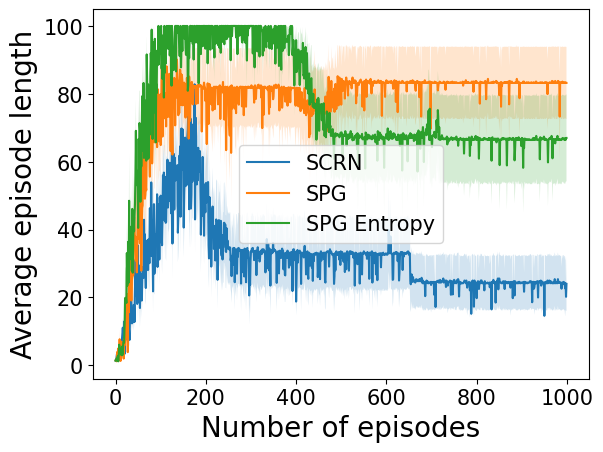

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
QOI_SCRN = average_stats["SCRN"]["steps"]
STD_SCRN = std_stats["SCRN"]["steps"]
QOI_SPG = average_stats["SPG"]["steps"]
STD_SPG = std_stats["SPG"]["steps"]
QOI_ESPG = average_stats["SPG Entropy"]["steps"]
STD_ESPG = std_stats["SPG Entropy"]["steps"]
plt.plot(QOI_SCRN, label="SCRN")
plt.fill_between(np.arange(0, num_episodes), QOI_SCRN-STD_SCRN, QOI_SCRN+STD_SCRN, alpha=0.2)
plt.plot(QOI_SPG, label="SPG")
plt.fill_between(np.arange(0, num_episodes), QOI_SPG-STD_SPG, QOI_SPG+STD_SPG, alpha=0.2)
plt.plot(QOI_ESPG, label="SPG Entropy")
plt.fill_between(np.arange(0, num_episodes), QOI_ESPG-STD_ESPG, QOI_ESPG+STD_ESPG, alpha=0.2)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel("Average episode length", fontsize=20)
plt.show()

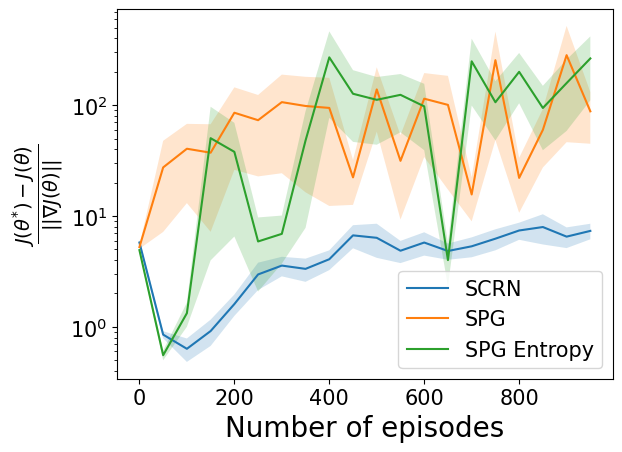

In [6]:
plt.figure()
QOI_SCRN = average_stats["SCRN"]["taus"]
STD_SCRN = std_stats["SCRN"]["taus"]
QOI_SPG = average_stats["SPG"]["taus"]
STD_SPG = std_stats["SPG"]["taus"]
QOI_ESPG = average_stats["SPG Entropy"]["taus"]
STD_ESPG = std_stats["SPG Entropy"]["taus"]
plt.semilogy(np.arange(0, num_episodes, step=test_freq), QOI_SCRN, label="SCRN")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SCRN-STD_SCRN, QOI_SCRN+STD_SCRN, alpha=0.2)
plt.semilogy(np.arange(0, num_episodes, step=test_freq), QOI_SPG, label="SPG")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SPG-STD_SPG, QOI_SPG+STD_SPG, alpha=0.2)
plt.semilogy(np.arange(0, num_episodes, step=test_freq), QOI_ESPG, label="SPG Entropy")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_ESPG-STD_ESPG, QOI_ESPG+STD_ESPG, alpha=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$", fontsize=20)
plt.show()

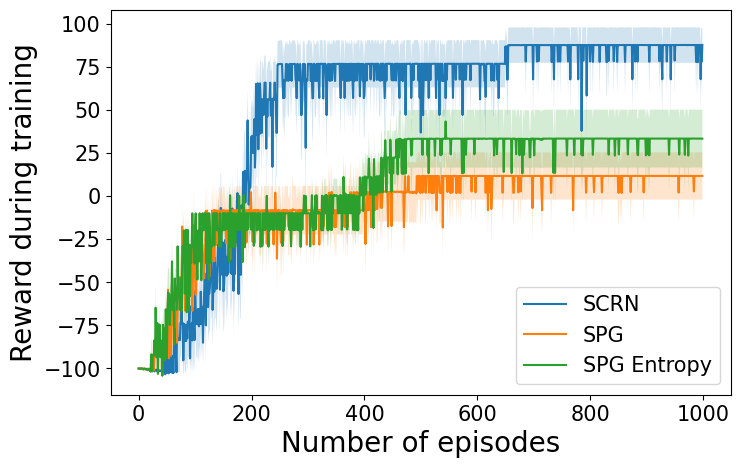

In [7]:
plt.figure(figsize=(8, 5))
QOI_SCRN = average_stats["SCRN"]["rewards"]
STD_SCRN = std_stats["SCRN"]["rewards"]
QOI_SPG = average_stats["SPG"]["rewards"]
STD_SPG = std_stats["SPG"]["rewards"]
QOI_ESPG = average_stats["SPG Entropy"]["rewards"]
STD_ESPG = std_stats["SPG Entropy"]["rewards"]
plt.plot(QOI_SCRN, label="SCRN")
plt.fill_between(np.arange(0, num_episodes), QOI_SCRN-STD_SCRN, QOI_SCRN+STD_SCRN, alpha=0.2)
plt.plot(QOI_SPG, label="SPG")
plt.fill_between(np.arange(0, num_episodes), QOI_SPG-STD_SPG, QOI_SPG+STD_SPG, alpha=0.2)
plt.plot(QOI_ESPG, label="SPG Entropy")
plt.fill_between(np.arange(0, num_episodes), QOI_ESPG-STD_ESPG, QOI_ESPG+STD_ESPG, alpha=0.2)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel("Reward during training", fontsize=20)
plt.show()

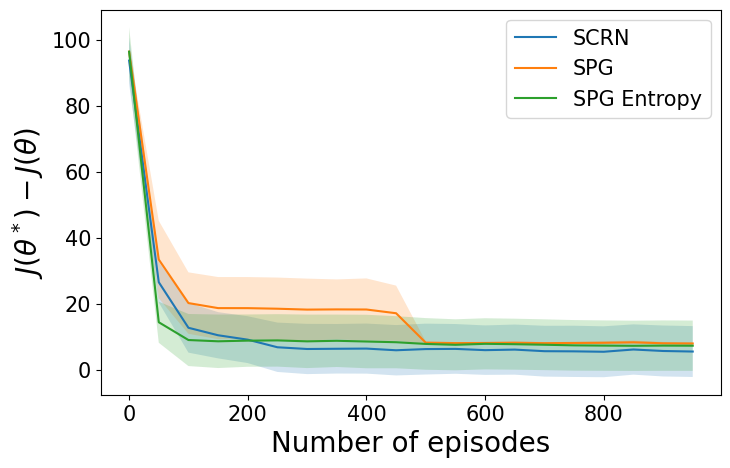

In [8]:
plt.figure(figsize=(8, 5))
QOI_SCRN = average_stats["SCRN"]["optimum"]-average_stats["SCRN"]["obj_estimates"]
STD_SCRN = average_stats["SCRN"]["optimum"]-std_stats["SCRN"]["obj_estimates"]
QOI_SPG = average_stats["SCRN"]["optimum"]-average_stats["SPG"]["obj_estimates"]
STD_SPG = std_stats["SPG"]["obj_estimates"]
QOI_ESPG = average_stats["SCRN"]["optimum"]-average_stats["SPG Entropy"]["obj_estimates"]
STD_ESPG = average_stats["SCRN"]["optimum"]-std_stats["SPG Entropy"]["obj_estimates"]
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_SCRN, label="SCRN")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SCRN-STD_SCRN, QOI_SCRN+STD_SCRN, alpha=0.2)
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_SPG, label="SPG")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SPG-STD_SPG, QOI_SPG+STD_SPG, alpha=0.2)
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_ESPG, label="SPG Entropy")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_ESPG-STD_ESPG, QOI_ESPG+STD_ESPG, alpha=0.2)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel(rf"$J(\theta^*) - J(\theta)$", fontsize=20)
plt.show()

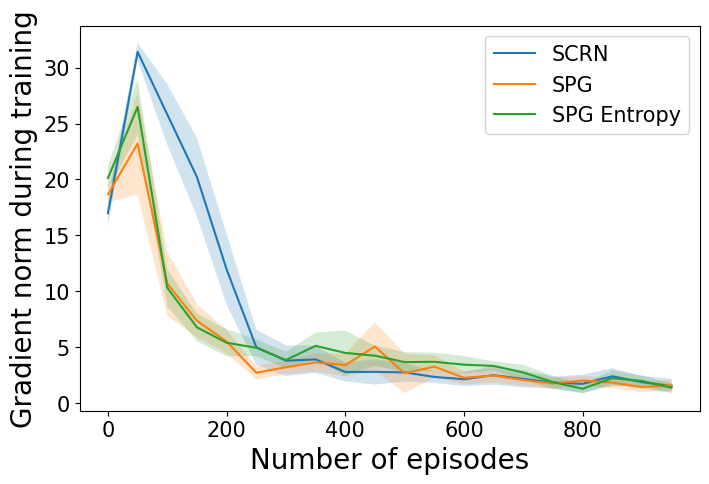

In [9]:
plt.figure(figsize=(8, 5))
QOI_SCRN = average_stats["SCRN"]["grad_estimates"]
STD_SCRN = std_stats["SCRN"]["grad_estimates"]
QOI_SPG = average_stats["SPG"]["grad_estimates"]
STD_SPG = std_stats["SPG"]["grad_estimates"]
QOI_ESPG = average_stats["SPG Entropy"]["grad_estimates"]
STD_ESPG = std_stats["SPG Entropy"]["grad_estimates"]
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_SCRN, label="SCRN")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SCRN-STD_SCRN, QOI_SCRN+STD_SCRN, alpha=0.2)
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_SPG, label="SPG")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_SPG-STD_SPG, QOI_SPG+STD_SPG, alpha=0.2)
plt.plot(np.arange(0, num_episodes, step=test_freq), QOI_ESPG, label="SPG Entropy")
plt.fill_between(np.arange(0, num_episodes, step=test_freq), QOI_ESPG-STD_ESPG, QOI_ESPG+STD_ESPG, alpha=0.2)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of episodes", fontsize=20)
plt.ylabel("Gradient norm during training", fontsize=20)
plt.show()